# Exploratory Data Analysis
### Part 2
***

## Breaking Down Categorical Data 


### Category Introduction 

In this section of the analysis the **ML_table** will be broken down and evaluated based on the 43 identified food product categories from the **Product Translation Table**. This portion of the analyis will specifically look to these identified columns:
- country_code 
- area 
- year_pc
- CO2_emissions_tonnes
- Population
- category_code_(x)
- food_product_categories_(x)
- production_tonnes_(x)
- total_kgs_CO2_(x)

This section will strongly look to the sum of total CO2 by kgs emissions from each food product category production and compare the interactions across a matrix based on Country and Population to track trends.

## Important Note about Notebook 

#### For run time in Jupyter some codes have been marked down. Noteably the px.scatter Matrix have all been marked down throughout this analysis for compatibility sake. To run the code make sure all data and dependencies are defined and change the code block type to 'Code'. Matrix will appear in output.

##### Thank you!

In [2]:
#Import Dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors, matplotlib.colorbar as colorbar 
import matplotlib.cm as cm, matplotlib.font_manager as fm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline
import plotly.express as px

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
#Load the data
ML_data = pd.read_csv('ML_Table.csv')

#View the data
ML_data.head()

country_code         area  year_pc  CO2_emissions_tonnes Continent  \
0             0  Afghanistan     2000            71679740.0      Asia   
1             0  Afghanistan     2001            72477702.0      Asia   
2             0  Afghanistan     2002            73529311.0      Asia   
3             0  Afghanistan     2003            74715262.0      Asia   
4             0  Afghanistan     2004            75604429.0      Asia   

   Population  category_code_1 food_product_categories_1  production_tonnes_1  \
0    19542982                1                    Apples             40540.06   
1    19688632                1                    Apples             39541.74   
2    21000256                1                    Apples             35630.08   
3    22645130                1                    Apples             28042.99   
4    23553551                1                    Apples             16691.83   

   total_kgs_CO2_1  ...  production_tonnes_41 total_kgs_CO2_41  \
0       58783.0870  ...                   0.0              0.0   
1       57335.5230  ...                   0.0              0.0   
2       51663.6160  ...                   0.0              0.0   
3       40662.3355  ...                   0.0              0.0   
4       24203.1535  ...                   0.0              0.0   

   category_code_42  food_product_categories_42  production_tonnes_42  \
0                42         Wheat & Rye (Bread)             1470000.0   
1                42         Wheat & Rye (Bread)             1600000.0   
2                42         Wheat & Rye (Bread)             2690000.0   
3                42         Wheat & Rye (Bread)             3480000.0   
4                42         Wheat & Rye (Bread)             2390000.0   

  total_kgs_CO2_42  category_code_43  food_product_categories_43  \
0       10518040.0                43                        Wine   
1       11434520.0                43                        Wine   
2       19231760.0                43                        Wine   
3       24916800.0                43                        Wine   
4       17112400.0                43                        Wine   

   production_tonnes_43 total_kgs_CO2_43  
0                   0.0              0.0  
1                   0.0              0.0  
2                   0.0              0.0  
3                   0.0              0.0  
4                   0.0              0.0  

[5 rows x 162 columns]

In [7]:
# Evaluate key alogrithmic notes on data 
ML_data.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_1  production_tonnes_1  total_kgs_CO2_1  category_code_2  \
count      4201.000000         4.201000e+03     4.201000e+03           4201.0   
mean          1.039514         3.648795e+05     5.290740e+05              2.0   
std           0.194839         2.407545e+06     3.490711e+06              0.0   
min           1.000000         0.000000e+00     0.000000e+00              2.0   
25%           1.000000         0.000000e+00     0.000000e+00              2.0   
50%           1.000000         0.000000e+00     0.000000e+00              2.0   
75%           1.000000         1.074000e+05     1.557300e+05              2.0   
max           2.000000         4.410000e+07     6.389584e+07              2.0   

       production_tonnes_2  total_kgs_CO2_2  ...  total_kgs_CO2_40  \
count         4.201000e+03     4.201000e+03  ...      4.201000e+03   
mean          6.603003e+05     2.172330e+06  ...      7.966060e+06   
std           2.290541e+06     7.535399e+06  ...      5.655650e+07   
min           0.000000e+00     0.000000e+00  ...      0.000000e+00   
25%           0.000000e+00     0.000000e+00  ...      0.000000e+00   
50%           3.950360e+03     1.299668e+04  ...      0.000000e+00   
75%           2.085000e+05     6.859650e+05  ...      1.006298e+05   
max           3.260000e+07     1.072441e+08  ...      7.502739e+08   

       category_code_41  production_tonnes_41  total_kgs_CO2_41  \
count            4201.0          4.201000e+03      4.201000e+03   
mean               41.0          7.548400e+05      5.667773e+06   
std                 0.0          3.689352e+06      2.770128e+07   
min                41.0          0.000000e+00      0.000000e+00   
25%                41.0          5.247600e+02      3.940948e+03   
50%                41.0          3.500000e+04      2.628500e+05   
75%                41.0          2.775000e+05      2.084025e+06   
max                41.0          6.470000e+07      4.862039e+08   

       category_code_42  production_tonnes_42  total_kgs_CO2_42  \
count       4201.000000          4.201000e+03      4.201000e+03   
mean          26.483694          3.440568e+06      2.463758e+07   
std           20.273799          1.257976e+07      9.010084e+07   
min            0.000000          0.000000e+00      0.000000e+00   
25%            0.000000          0.000000e+00      0.000000e+00   
50%           42.000000          8.393000e+03      6.009388e+04   
75%           42.000000          1.060121e+06      7.583550e+06   
max           42.000000          1.345267e+08      9.649467e+08   

       category_code_43  production_tonnes_43  total_kgs_CO2_43  
count            4201.0          4.201000e+03      4.201000e+03  
mean               43.0          1.375853e+05      6.287209e+05  
std                 0.0          6.034109e+05      2.757478e+06  
min                43.0          0.000000e+00      0.000000e+00  
25%                43.0          0.000000e+00      0.000000e+00  
50%                43.0          0.000000e+00      0.000000e+00  
75%                43.0          7.499000e+03      3.427043e+04  
max                43.0          5.910000e+06      2.701187e+07  

[8 rows x 121 columns]

In [8]:
#Documenting the size of the data 

ML_data.shape


(4201, 162)

In [37]:
#Sum total emissions
emiss_total = ML_data['CO2_emissions_tonnes'].sum()

print (emiss_total)

27630468397999.0


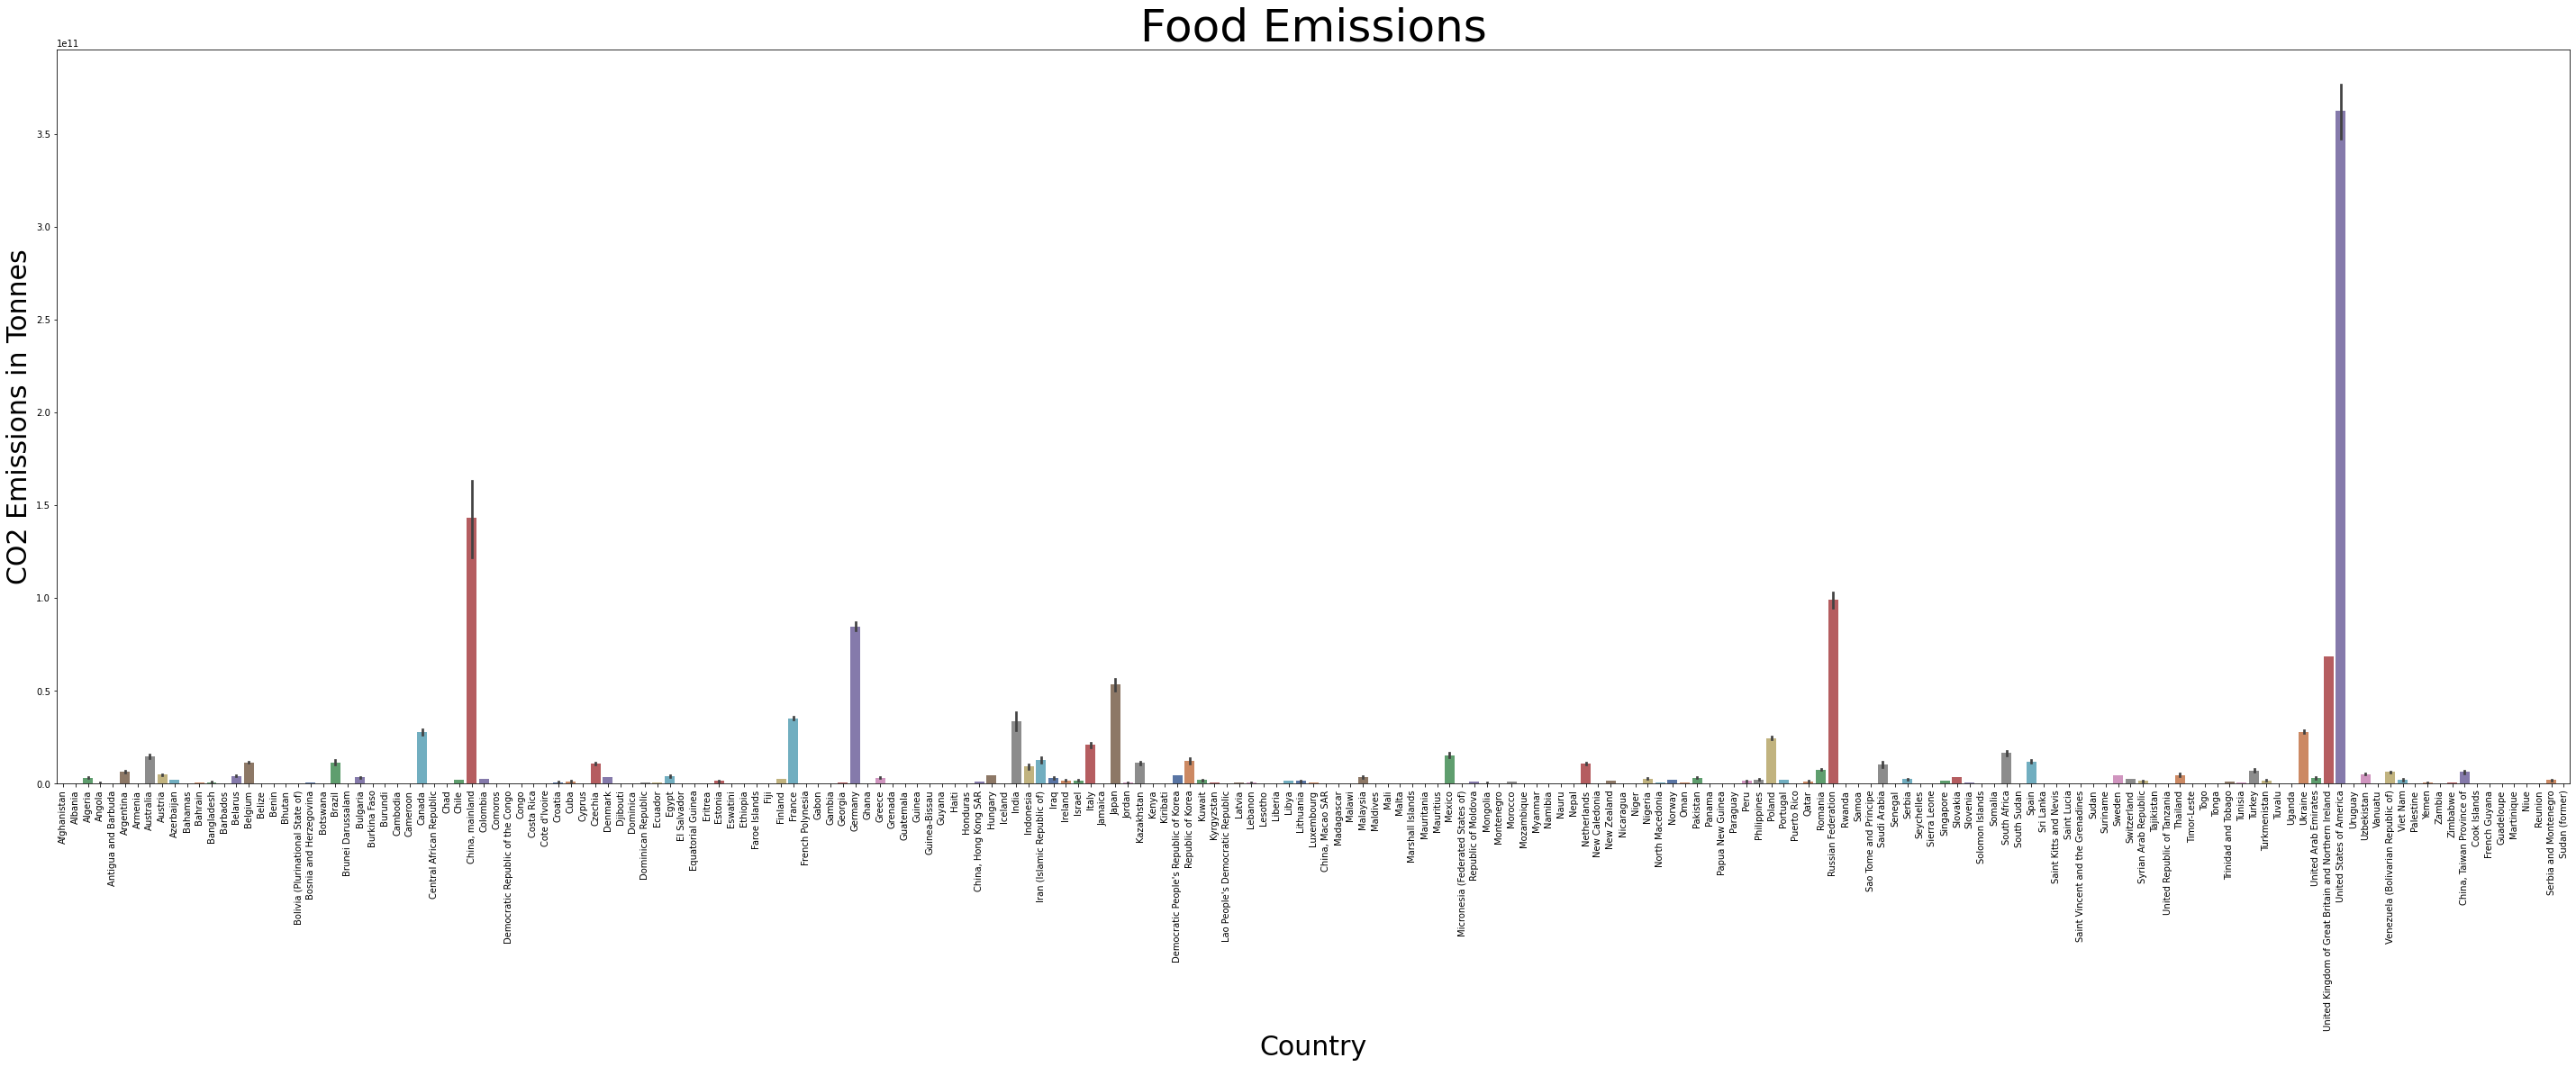

In [9]:
## Total emissons by country 

plt.rcParams['figure.figsize'] = (50, 15)
ax = sns.barplot(x = ML_data['area'], y = ML_data['CO2_emissions_tonnes'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country', fontsize = 30)
ax.set_ylabel(ylabel = 'CO2 Emissions in Tonnes', fontsize = 30)
ax.set_title(label = 'Food Emissions', fontsize = 50)
plt.xticks(rotation = 90)
plt.show()


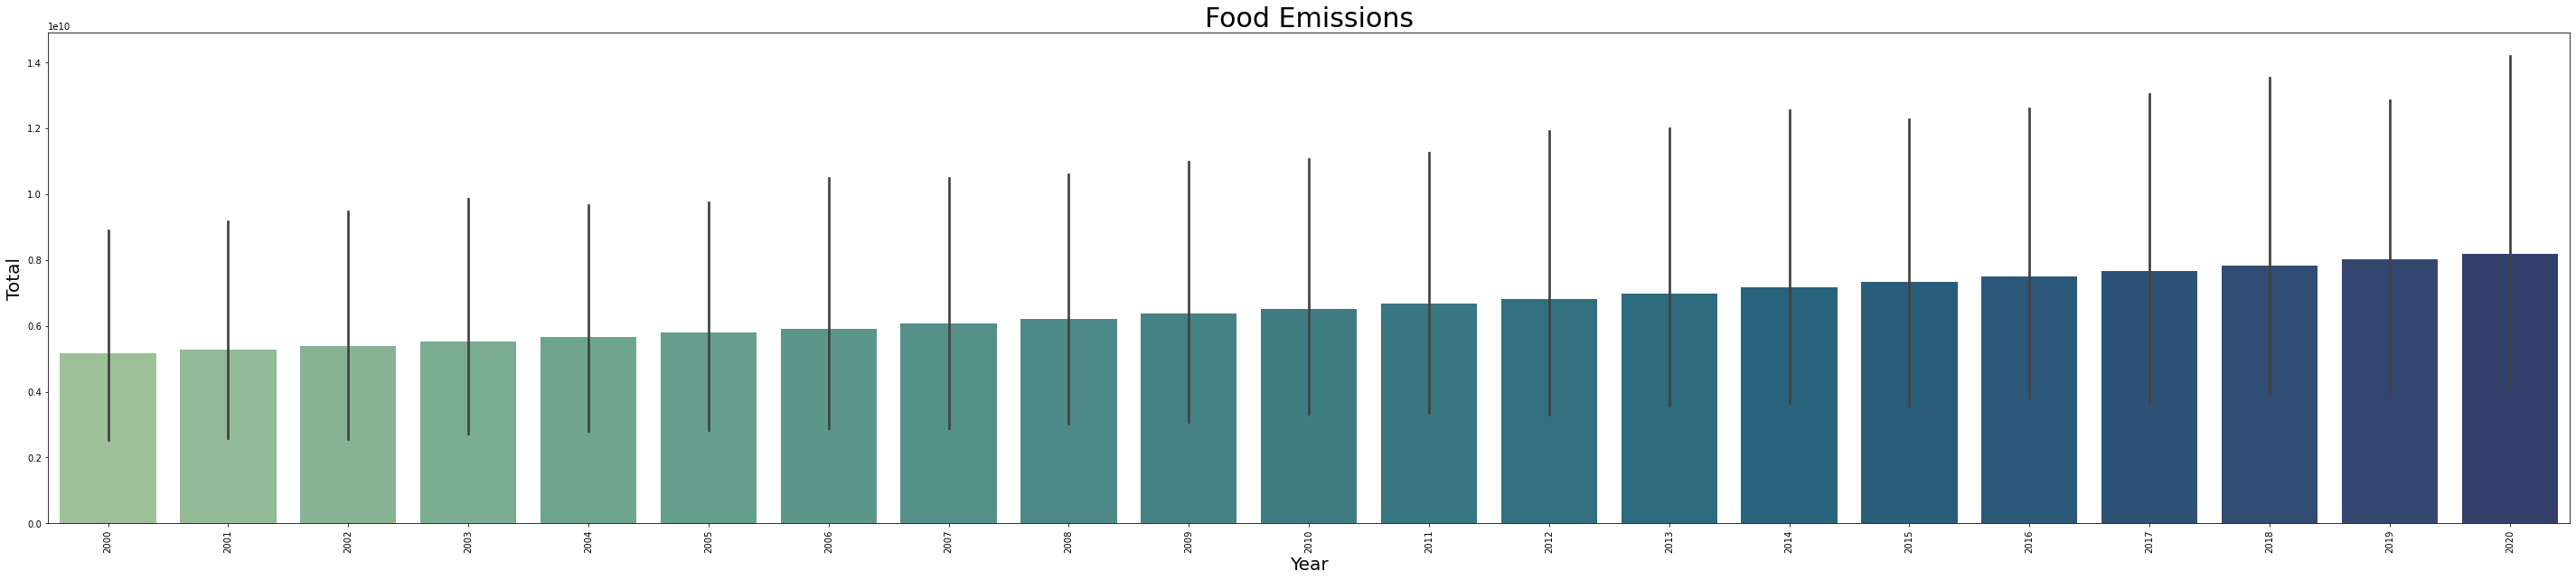

In [32]:
#CO2 Emissions by year 

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = ML_data['year_pc'], y = ML_data['CO2_emissions_tonnes'], palette = 'crest')
ax.set_xlabel(xlabel = 'Year', fontsize = 20)
ax.set_ylabel(ylabel = 'Total', fontsize = 20)
ax.set_title(label = 'Food Emissions', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Matrix comparing correlations between year_pc and CO_2_emissions_tonnes

fig = px.scatter_matrix(ML_data, dimensions=["year_pc", "CO2_emissions_tonnes"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

In [ ]:
# Interactive timeline showing the increase in overall CO2 producation by Country 

fig = px.bar(ML_data, x="area", y="CO2_emissions_tonnes", color="area", color_discrete_sequence =px.colors.sequential.haline,
  animation_frame="year_pc", animation_group="area", range_y=[0,4000000000])
fig.show()

# Analysis by Food Product Category 

## Apples

**Note** 
-*Apples* will be referred to as a guide for the code block to be used on all 43 food product categories. 

In [8]:
# Create new dataset according to .loc specifications 

apples= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_1', 'food_product_categories_1', 'production_tonnes_1', 'total_kgs_CO2_1']]
apples.head()


country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_1 food_product_categories_1  production_tonnes_1  \
0                1                    Apples             40540.06   
1                1                    Apples             39541.74   
2                1                    Apples             35630.08   
3                1                    Apples             28042.99   
4                1                    Apples             16691.83   

   total_kgs_CO2_1  
0       58783.0870  
1       57335.5230  
2       51663.6160  
3       40662.3355  
4       24203.1535

In [17]:
apples.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_1  production_tonnes_1  total_kgs_CO2_1  
count      4201.000000         4.201000e+03     4.201000e+03  
mean          1.039514         3.648795e+05     5.290740e+05  
std           0.194839         2.407545e+06     3.490711e+06  
min           1.000000         0.000000e+00     0.000000e+00  
25%           1.000000         0.000000e+00     0.000000e+00  
50%           1.000000         0.000000e+00     0.000000e+00  
75%           1.000000         1.074000e+05     1.557300e+05  
max           2.000000         4.410000e+07     6.389584e+07

In [18]:
# Get total sum of CO2 in kgs for apple 
apples_total = apples['total_kgs_CO2_1'].sum()

print (apples_total)


2222639991.137


In [19]:
#Get sum by year, by country
apples[["area", "year_pc", "total_kgs_CO2_1" ]]

area  year_pc  total_kgs_CO2_1
0        Afghanistan     2000       58783.0870
1        Afghanistan     2001       57335.5230
2        Afghanistan     2002       51663.6160
3        Afghanistan     2003       40662.3355
4        Afghanistan     2004       24203.1535
...              ...      ...              ...
4196  Sudan (former)     2007           0.0000
4197  Sudan (former)     2008           0.0000
4198  Sudan (former)     2009           0.0000
4199  Sudan (former)     2010           0.0000
4200  Sudan (former)     2011           0.0000

[4201 rows x 3 columns]

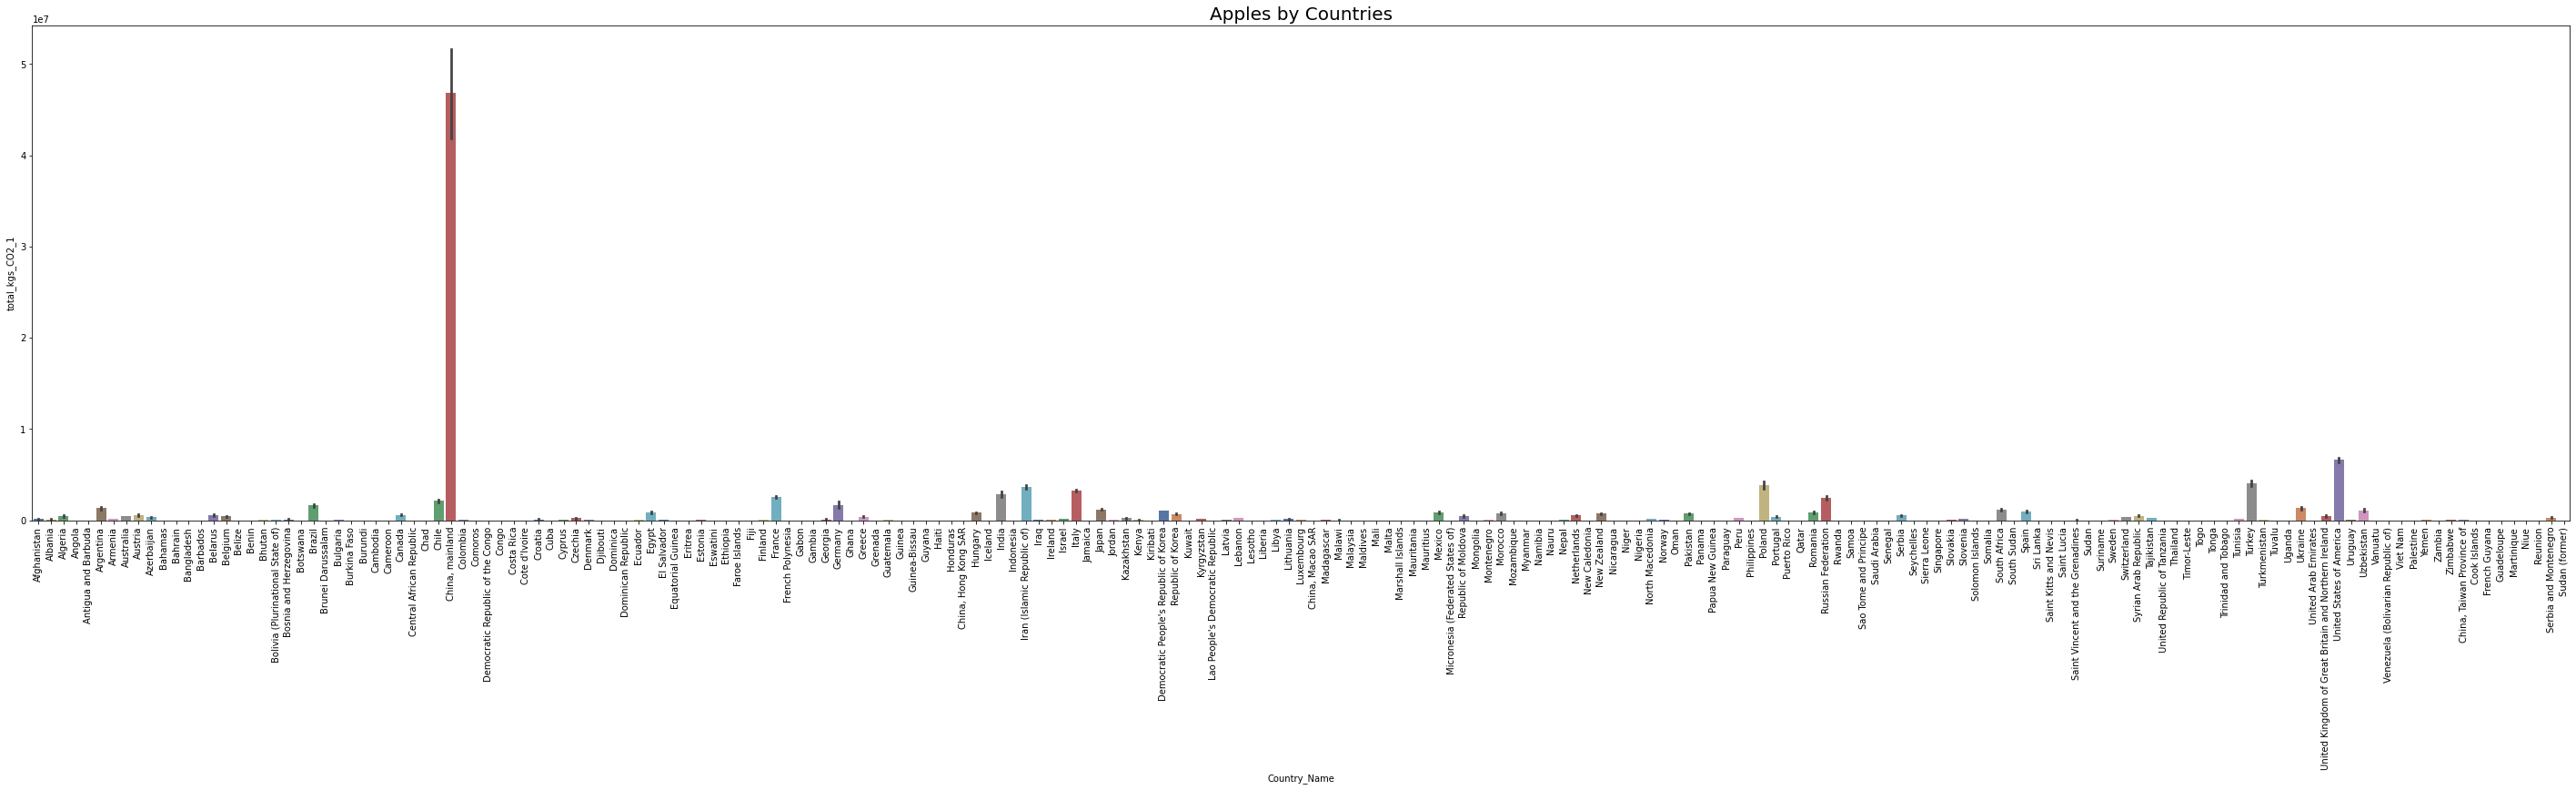

In [38]:
#Apples by country 

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = apples['area'], y = apples['total_kgs_CO2_1'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_1', fontsize = 10)
ax.set_title(label = 'Apples by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

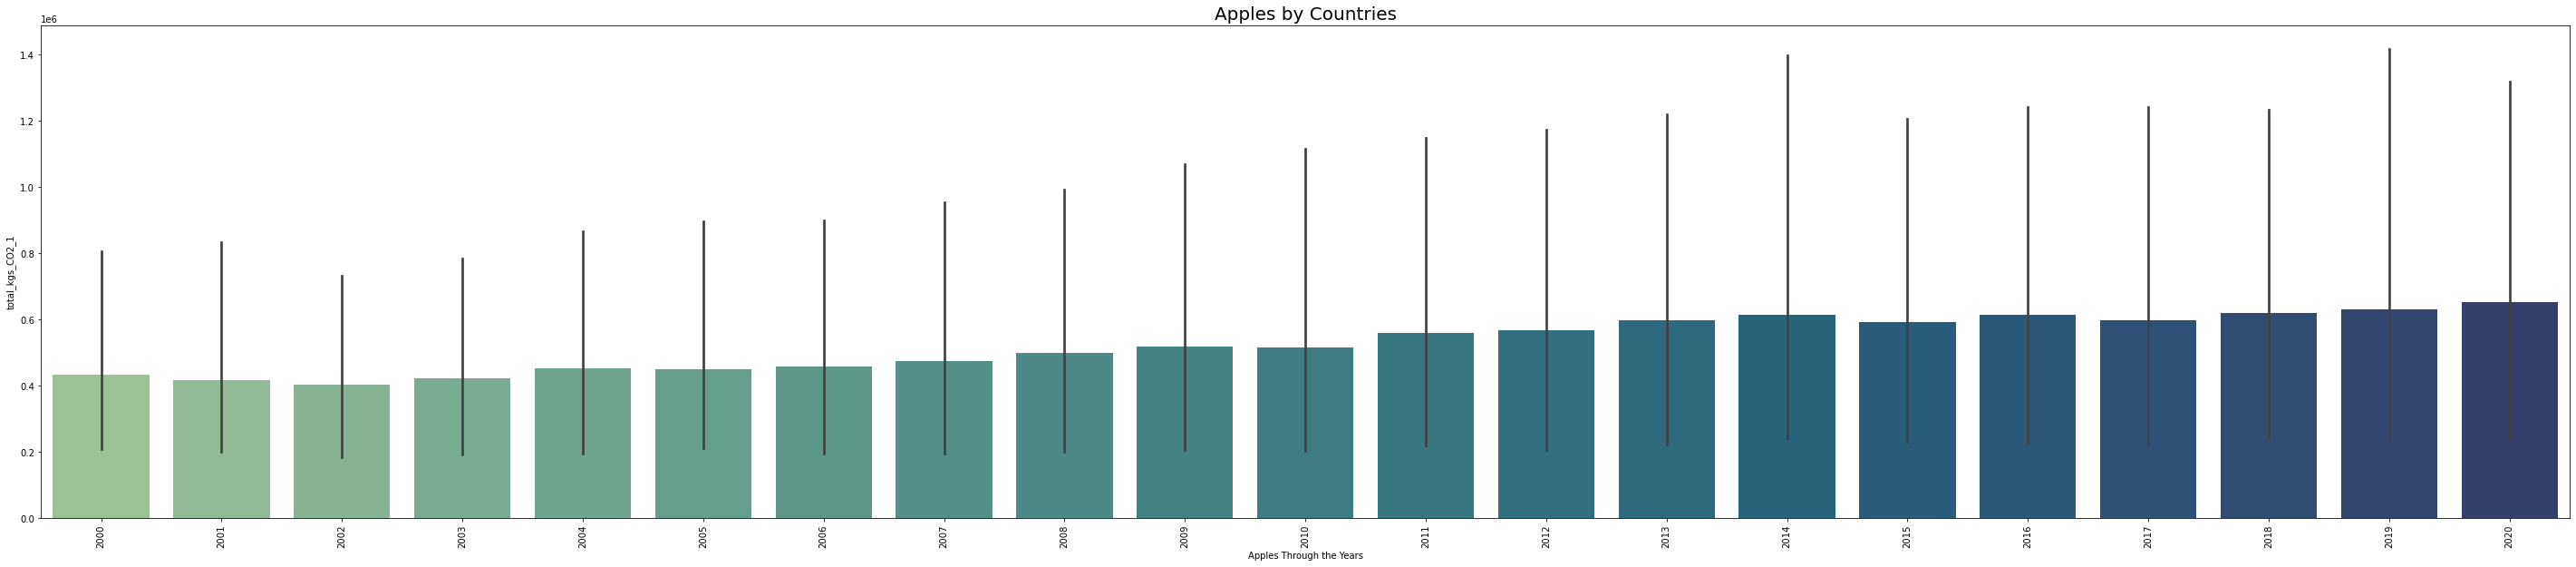

In [52]:
# Total emisions of apples by year 

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = apples['year_pc'], y = apples['total_kgs_CO2_1'], palette = 'crest')
ax.set_xlabel(xlabel = 'Apples Through the Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_1', fontsize = 10)
ax.set_title(label = 'Apples by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Matrix comparing correlations apple production by country between year_pc, total_kgs_CO2_(x), and population data

import plotly.express as px

fig = px.scatter_matrix(apples, dimensions=["year_pc", "total_kgs_CO2_1", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_matrix(apples, dimensions=["year_pc", "total_kgs_CO2_1", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Bananas

In [10]:
bananas= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_2', 'food_product_categories_2', 'production_tonnes_2', 'total_kgs_CO2_2']]
bananas.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_2 food_product_categories_2  production_tonnes_2  \
0                2                   Bananas                  0.0   
1                2                   Bananas                  0.0   
2                2                   Bananas                  0.0   
3                2                   Bananas                  0.0   
4                2                   Bananas                  0.0   

   total_kgs_CO2_2  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [24]:
bananas.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_2  production_tonnes_2  total_kgs_CO2_2  
count           4201.0         4.201000e+03     4.201000e+03  
mean               2.0         6.603003e+05     2.172330e+06  
std                0.0         2.290541e+06     7.535399e+06  
min                2.0         0.000000e+00     0.000000e+00  
25%                2.0         0.000000e+00     0.000000e+00  
50%                2.0         3.950360e+03     1.299668e+04  
75%                2.0         2.085000e+05     6.859650e+05  
max                2.0         3.260000e+07     1.072441e+08

In [25]:
bananas_total = bananas['total_kgs_CO2_2'].sum()

print (bananas_total)

9125957613.7002


In [26]:
bananas[["area", "year_pc", "total_kgs_CO2_2" ]]

area  year_pc  total_kgs_CO2_2
0        Afghanistan     2000              0.0
1        Afghanistan     2001              0.0
2        Afghanistan     2002              0.0
3        Afghanistan     2003              0.0
4        Afghanistan     2004              0.0
...              ...      ...              ...
4196  Sudan (former)     2007              0.0
4197  Sudan (former)     2008              0.0
4198  Sudan (former)     2009              0.0
4199  Sudan (former)     2010              0.0
4200  Sudan (former)     2011              0.0

[4201 rows x 3 columns]

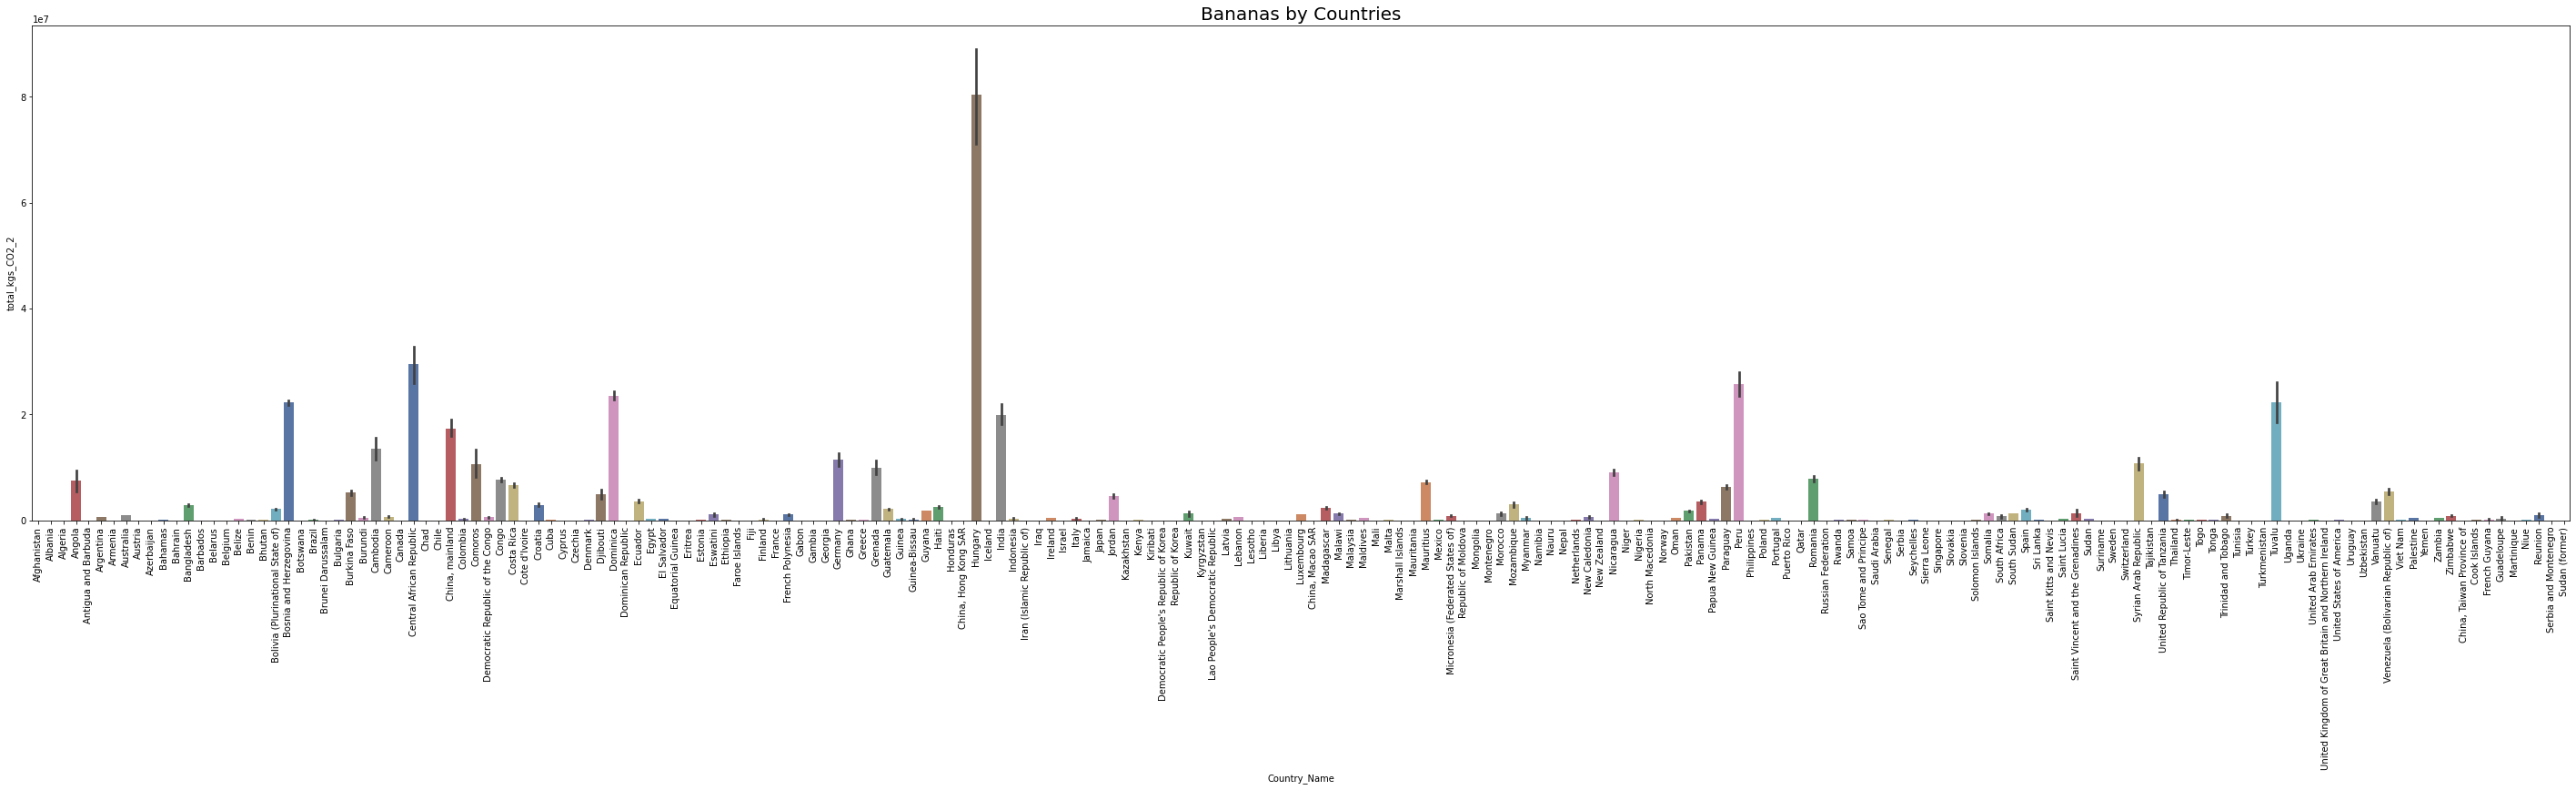

In [27]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = bananas['area'], y = bananas['total_kgs_CO2_2'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_2', fontsize = 10)
ax.set_title(label = 'Bananas by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

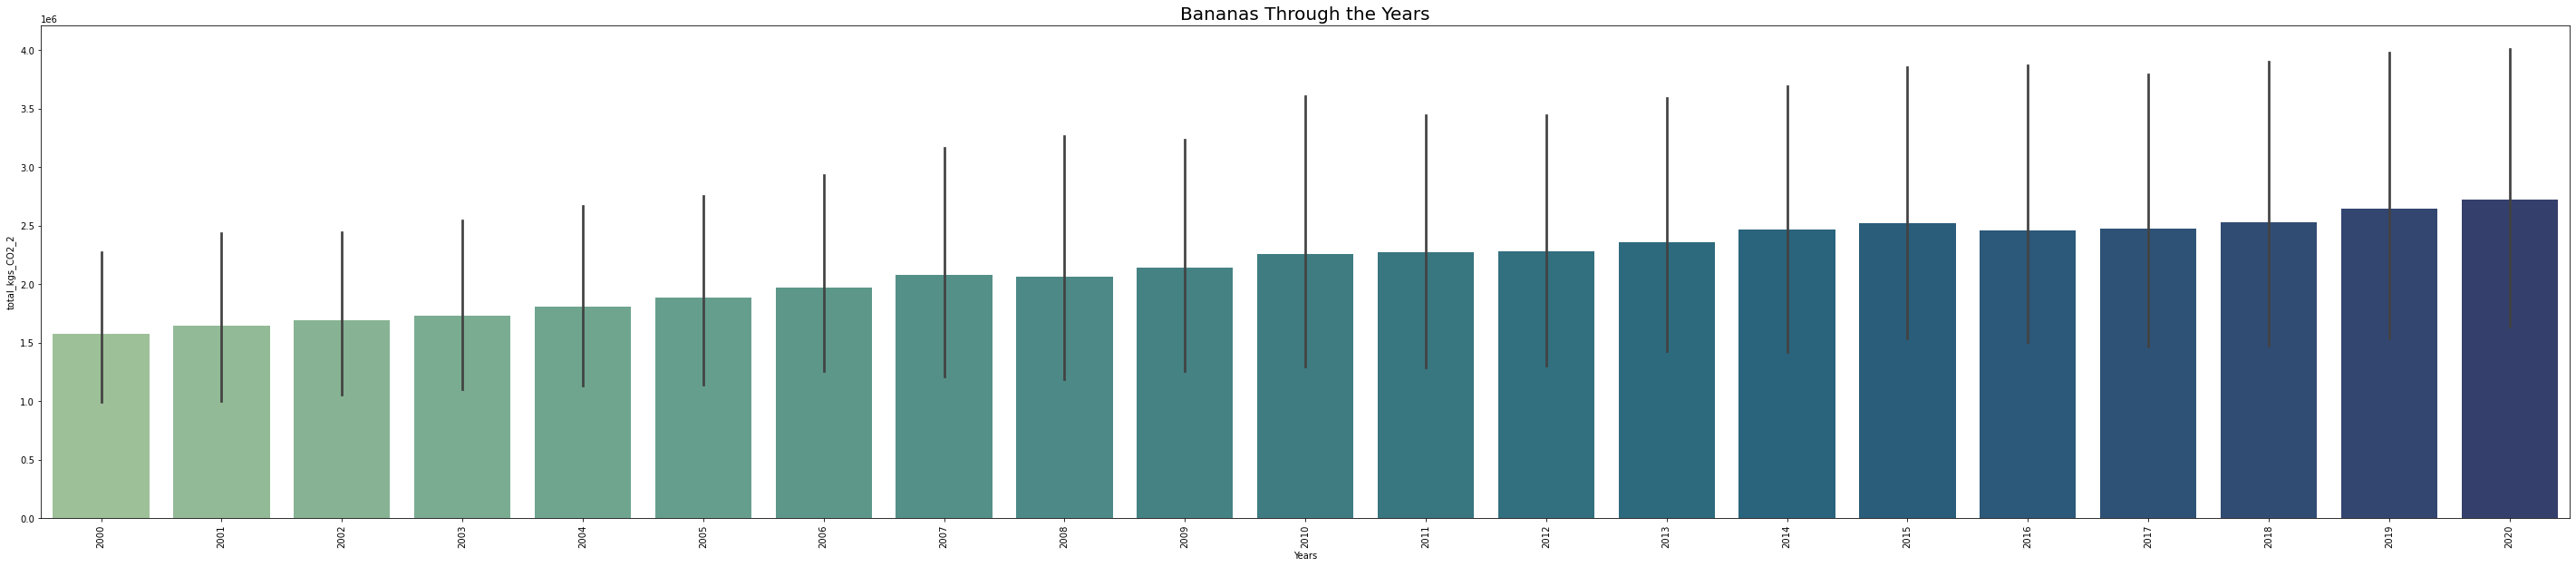

In [28]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = bananas['year_pc'], y = bananas['total_kgs_CO2_2'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_2', fontsize = 10)
ax.set_title(label = 'Bananas Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


fig = px.scatter_matrix(bananas, dimensions=["year_pc", "total_kgs_CO2_2", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Barley (Beer)


In [12]:
barley= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_3', 'food_product_categories_3', 'production_tonnes_3', 'total_kgs_CO2_3']]
barley.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_3 food_product_categories_3  production_tonnes_3  \
0                3    Barley (includes Beer)              74000.0   
1                3    Barley (includes Beer)              87000.0   
2                3    Barley (includes Beer)             345000.0   
3                3    Barley (includes Beer)             240000.0   
4                3    Barley (includes Beer)             290000.0   

   total_kgs_CO2_3  
0         172420.0  
1         202710.0  
2         803850.0  
3         559200.0  
4         675700.0

In [33]:
barley.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_3  production_tonnes_3  total_kgs_CO2_3  
count           4201.0         4.201000e+03     4.201000e+03  
mean               3.0         1.574573e+06     3.668804e+06  
std                0.0         4.716891e+06     1.099068e+07  
min                3.0         0.000000e+00     0.000000e+00  
25%                3.0         8.645000e+03     2.014285e+04  
50%                3.0         1.051540e+05     2.450088e+05  
75%                3.0         7.848000e+05     1.828584e+06  
max                3.0         5.240000e+07     1.219732e+08

In [35]:
barley_total = barley['total_kgs_CO2_3'].sum()

print (barley_total)

15412647475.457699


In [36]:
barley[["area", "year_pc", "total_kgs_CO2_3" ]]

area  year_pc  total_kgs_CO2_3
0        Afghanistan     2000         172420.0
1        Afghanistan     2001         202710.0
2        Afghanistan     2002         803850.0
3        Afghanistan     2003         559200.0
4        Afghanistan     2004         675700.0
...              ...      ...              ...
4196  Sudan (former)     2007              0.0
4197  Sudan (former)     2008              0.0
4198  Sudan (former)     2009              0.0
4199  Sudan (former)     2010              0.0
4200  Sudan (former)     2011              0.0

[4201 rows x 3 columns]

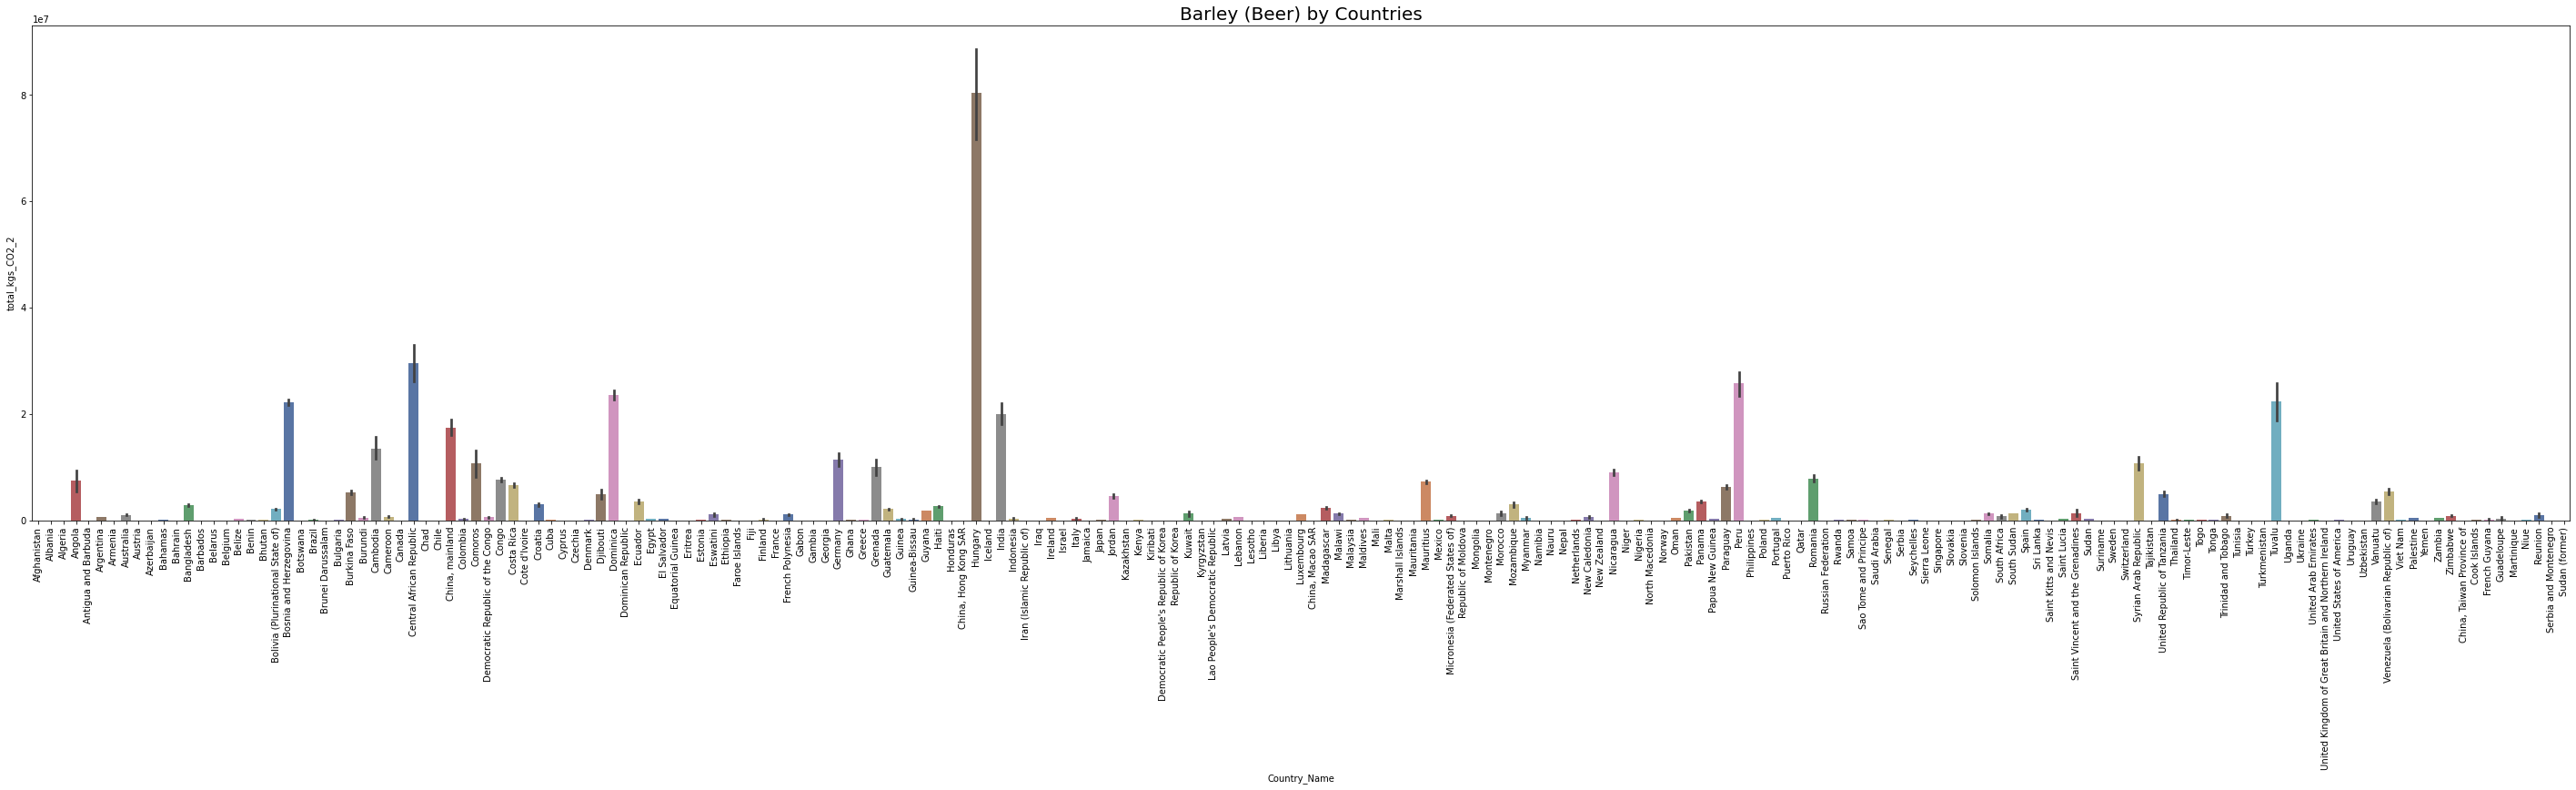

In [53]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = bananas['area'], y = bananas['total_kgs_CO2_2'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_2', fontsize = 10)
ax.set_title(label = 'Barley (Beer) by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

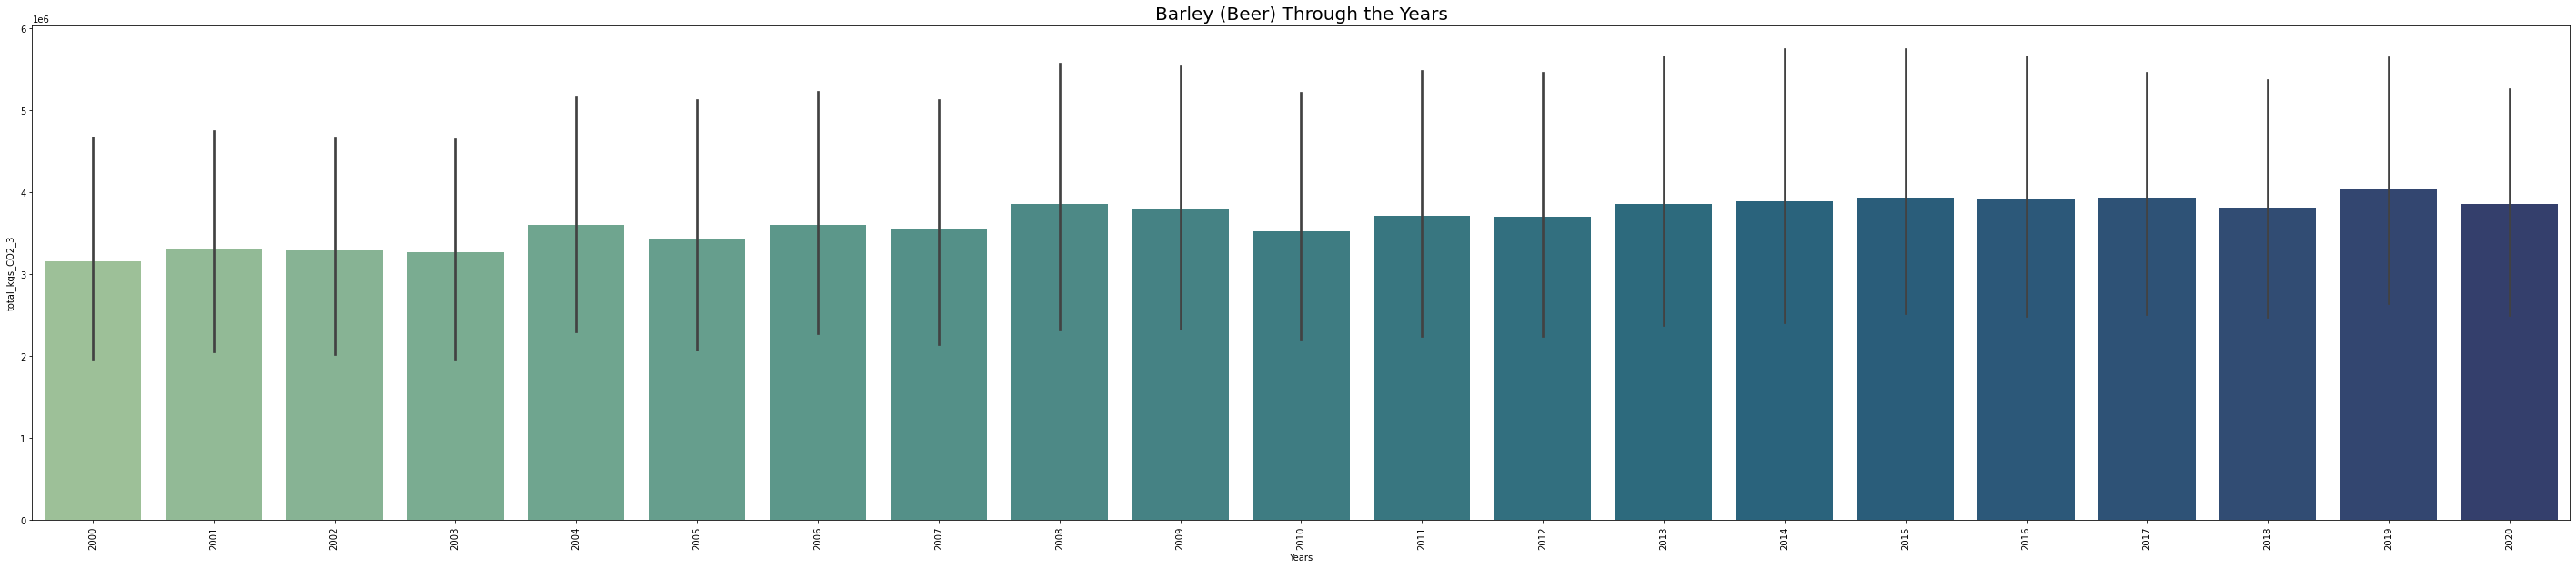

In [54]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = barley['year_pc'], y = barley['total_kgs_CO2_3'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_3', fontsize = 10)
ax.set_title(label = 'Barley (Beer) Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(barley, dimensions=["year_pc", "total_kgs_CO2_3", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Beef (beef herd)


In [56]:
beef= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_4', 'food_product_categories_4', 'production_tonnes_4', 'total_kgs_CO2_4']]
beef.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_4 food_product_categories_4  production_tonnes_4  \
0                4          Beef (beef herd)             151200.0   
1                4          Beef (beef herd)             129600.0   
2                4          Beef (beef herd)             180000.0   
3                4          Beef (beef herd)             164400.0   
4                4          Beef (beef herd)             179160.0   

   total_kgs_CO2_4  
0       45573192.0  
1       39062736.0  
2       54253800.0  
3       49551804.0  
4       54000615.6

In [41]:
beef.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_4  production_tonnes_4  total_kgs_CO2_4  
count           4201.0         4.201000e+03     4.201000e+03  
mean               4.0         3.801729e+05     1.145941e+08  
std                0.0         1.360786e+06     4.102447e+08  
min                4.0         0.000000e+00     0.000000e+00  
25%                4.0         3.848620e+03     1.160013e+06  
50%                4.0         4.808318e+04     1.449275e+07  
75%                4.0         2.182033e+05     6.576865e+07  
max                4.0         1.400833e+07     4.218787e+09

In [42]:
beef_total = beef['total_kgs_CO2_4'].sum()

print (beef_total)

481409782341.468


In [43]:
beef[["area", "year_pc", "total_kgs_CO2_4" ]]

area  year_pc  total_kgs_CO2_4
0        Afghanistan     2000       45573192.0
1        Afghanistan     2001       39062736.0
2        Afghanistan     2002       54253800.0
3        Afghanistan     2003       49551804.0
4        Afghanistan     2004       54000615.6
...              ...      ...              ...
4196  Sudan (former)     2007      119358360.0
4197  Sudan (former)     2008      119358360.0
4198  Sudan (former)     2009      119720052.0
4199  Sudan (former)     2010      120383154.0
4200  Sudan (former)     2011      121106538.0

[4201 rows x 3 columns]

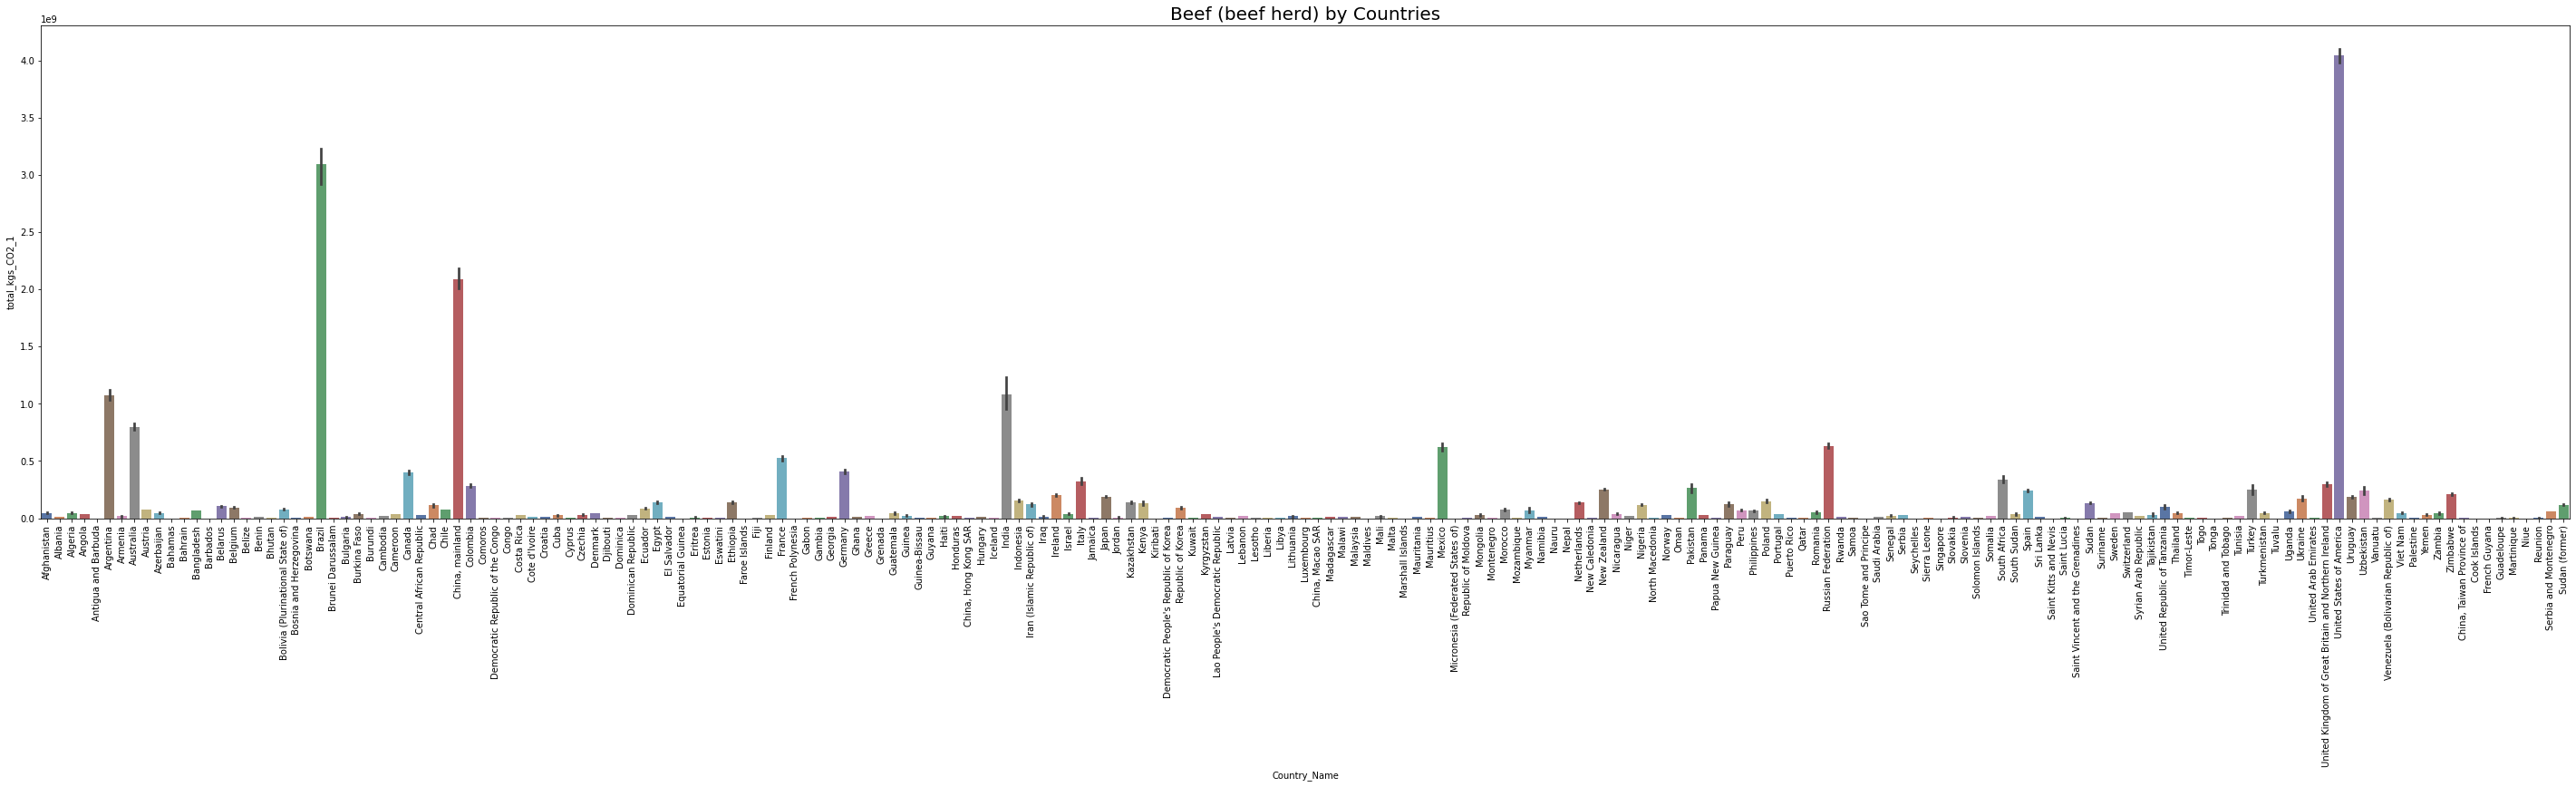

In [57]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = beef['area'], y = beef['total_kgs_CO2_4'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_1', fontsize = 10)
ax.set_title(label = 'Beef (beef herd) by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

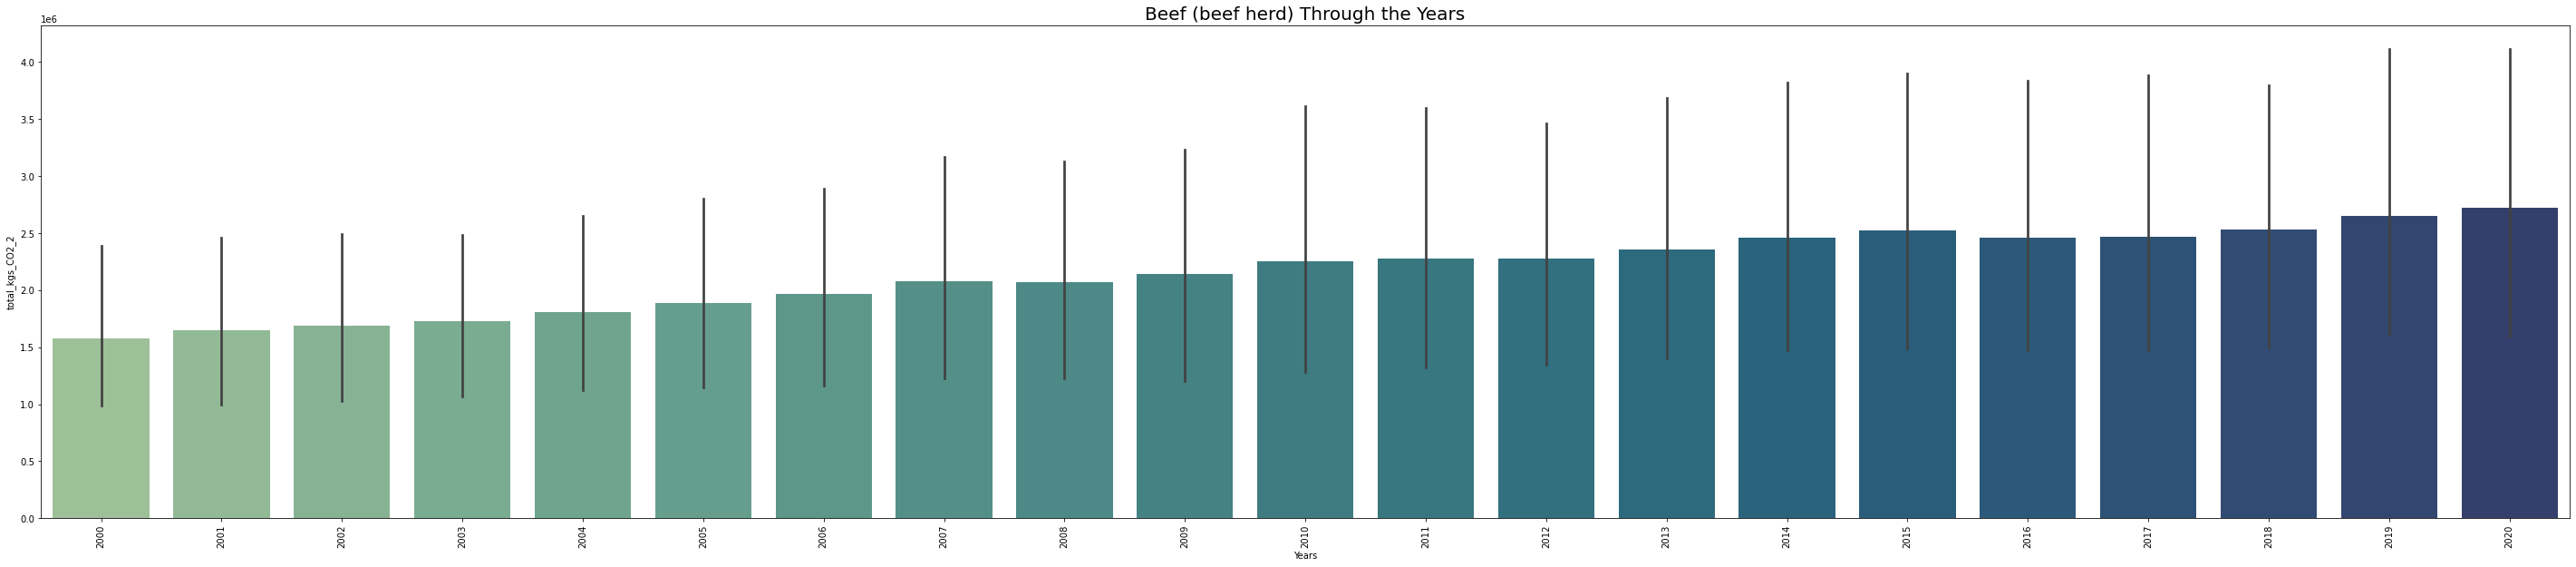

In [58]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = bananas['year_pc'], y = bananas['total_kgs_CO2_2'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_2', fontsize = 10)
ax.set_title(label = 'Beef (beef herd) Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(beef, dimensions=["year_pc", "total_kgs_CO2_4", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Beet Sugar


In [60]:
beet_sugar= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_6', 'food_product_categories_6', 'production_tonnes_6', 'total_kgs_CO2_6']]
beet_sugar.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_6 food_product_categories_6  production_tonnes_6  \
0                6                Beet Sugar               1000.0   
1                6                Beet Sugar               1000.0   
2                6                Beet Sugar               1000.0   
3                6                Beet Sugar               1000.0   
4                6                Beet Sugar               5000.0   

   total_kgs_CO2_6  
0           5410.0  
1           5410.0  
2           5410.0  
3           5410.0  
4          27050.0

In [48]:
beet_sugar.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_6  production_tonnes_6  total_kgs_CO2_6  
count           4201.0         4.201000e+03     4.201000e+03  
mean               6.0         1.277011e+06     6.909582e+06  
std                0.0         4.868815e+06     2.634392e+07  
min                6.0         0.000000e+00     0.000000e+00  
25%                6.0         0.000000e+00     0.000000e+00  
50%                6.0         0.000000e+00     0.000000e+00  
75%                6.0         4.675000e+03     2.529175e+04  
max                6.0         5.440000e+07     2.940341e+08

In [49]:
beet_sugar[["area", "year_pc", "total_kgs_CO2_6" ]]

area  year_pc  total_kgs_CO2_6
0        Afghanistan     2000           5410.0
1        Afghanistan     2001           5410.0
2        Afghanistan     2002           5410.0
3        Afghanistan     2003           5410.0
4        Afghanistan     2004          27050.0
...              ...      ...              ...
4196  Sudan (former)     2007              0.0
4197  Sudan (former)     2008              0.0
4198  Sudan (former)     2009              0.0
4199  Sudan (former)     2010              0.0
4200  Sudan (former)     2011              0.0

[4201 rows x 3 columns]

In [50]:
beet_sugar_total = beet_sugar['total_kgs_CO2_6'].sum()

print (beet_sugar_total)

29027152028.005104


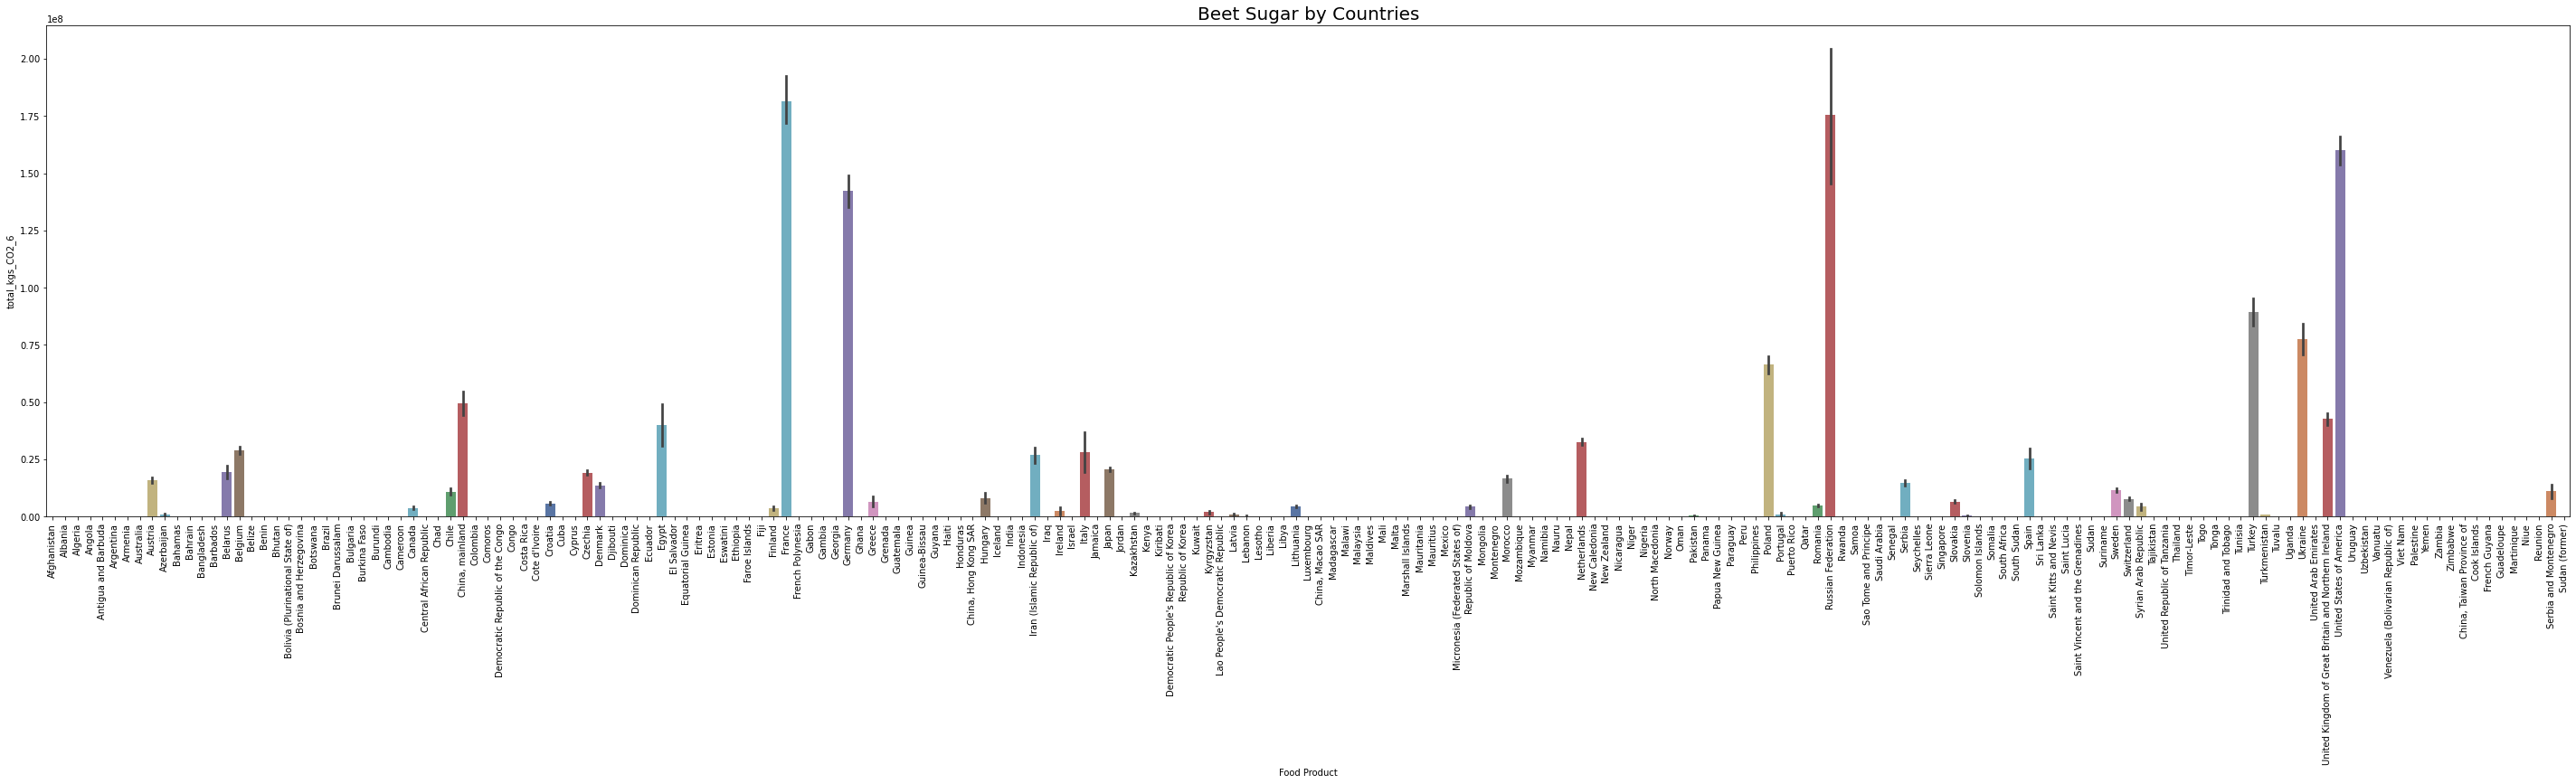

In [61]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = beet_sugar['area'], y = beet_sugar['total_kgs_CO2_6'], palette = 'deep')
ax.set_xlabel(xlabel = 'Food Product', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_6', fontsize = 10)
ax.set_title(label = 'Beet Sugar by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

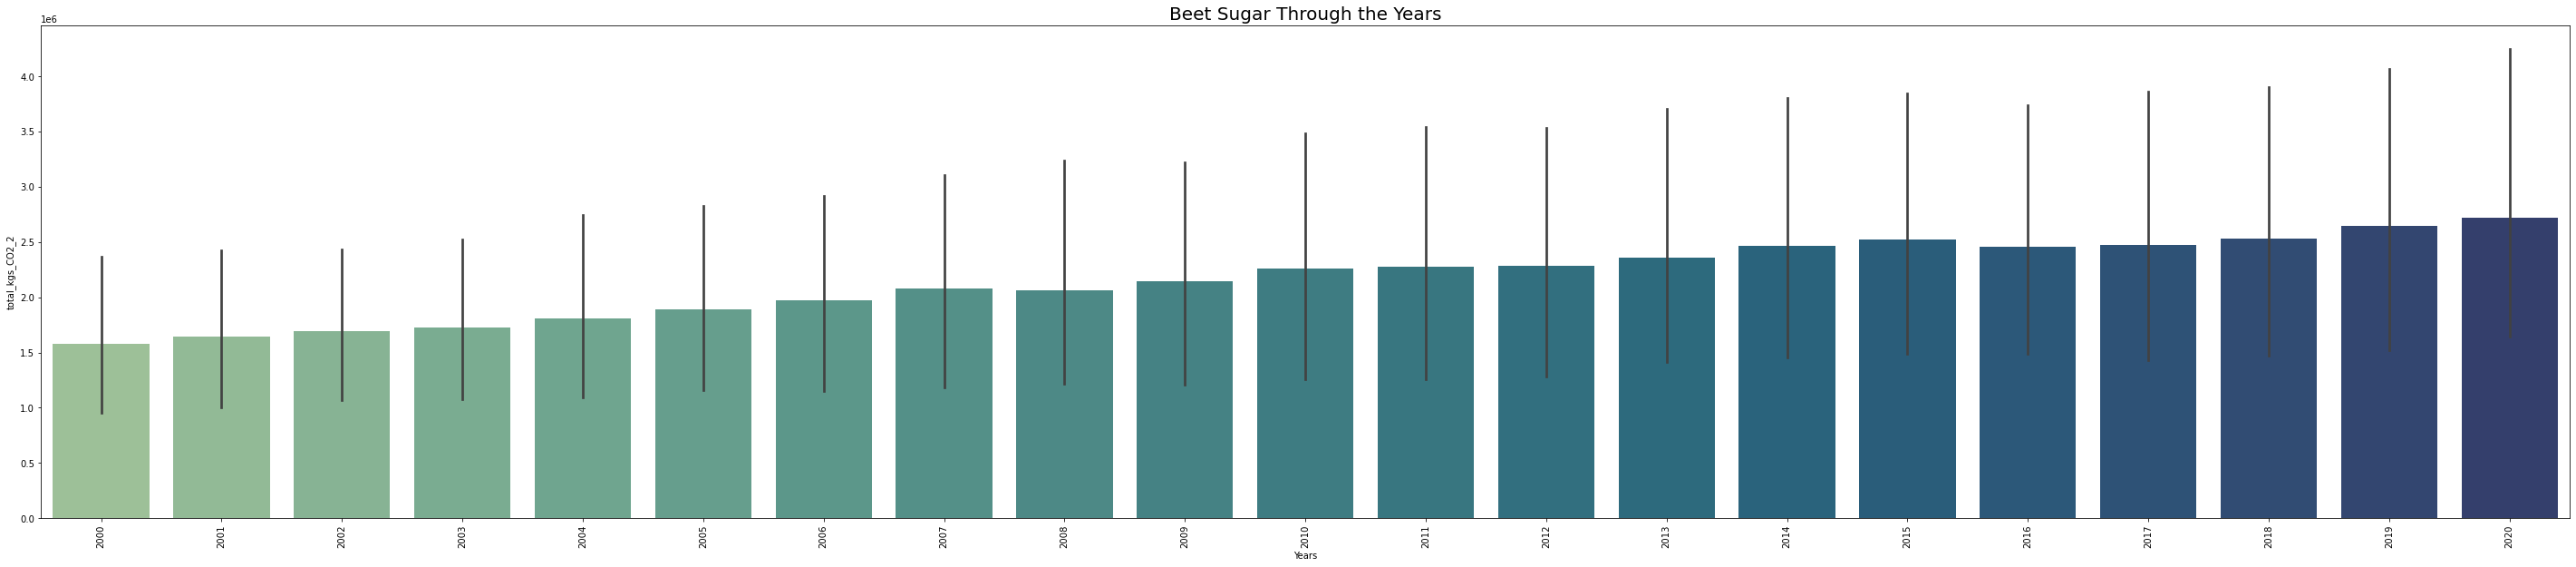

In [62]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = bananas['year_pc'], y = bananas['total_kgs_CO2_2'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_2', fontsize = 10)
ax.set_title(label = 'Beet Sugar Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


fig = px.scatter_matrix(beet_sugar, dimensions=["year_pc", "total_kgs_CO2_6", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Berries & Grapes


In [64]:
berries_grape= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_7', 'food_product_categories_7', 'production_tonnes_7', 'total_kgs_CO2_']]
berries_grape.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_7 food_product_categories_7  production_tonnes_7  \
0                7          Berries & Grapes            400206.33   
1                7          Berries & Grapes            431388.75   
2                7          Berries & Grapes            427571.16   
3                7          Berries & Grapes            423116.27   
4                7          Berries & Grapes            403583.59   

   total_kgs_CO2_  
0     2449262.740  
1     2640099.150  
2     2616735.499  
3     2589471.572  
4     2469931.571

In [55]:
berries_grape.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_7  production_tonnes_7  total_kgs_CO2_  
count      4201.000000         4.201000e+03    4.201000e+03  
mean          3.909069         4.298799e+05    2.630851e+06  
std           3.476426         1.523274e+06    9.322225e+06  
min           0.000000         0.000000e+00    0.000000e+00  
25%           0.000000         0.000000e+00    0.000000e+00  
50%           7.000000         6.920000e+02    4.235040e+03  
75%           7.000000         1.316650e+05    8.057898e+05  
max           7.000000         1.997369e+07    1.223238e+08

In [56]:
berries_grape_total = berries_grape['total_kgs_CO2_'].sum()

print (berries_grape_total)

11052205071.392801


In [57]:
berries_grape[["area", "year_pc", "total_kgs_CO2_" ]]

area  year_pc  total_kgs_CO2_
0        Afghanistan     2000     2449262.740
1        Afghanistan     2001     2640099.150
2        Afghanistan     2002     2616735.499
3        Afghanistan     2003     2589471.572
4        Afghanistan     2004     2469931.571
...              ...      ...             ...
4196  Sudan (former)     2007           0.000
4197  Sudan (former)     2008           0.000
4198  Sudan (former)     2009           0.000
4199  Sudan (former)     2010           0.000
4200  Sudan (former)     2011           0.000

[4201 rows x 3 columns]

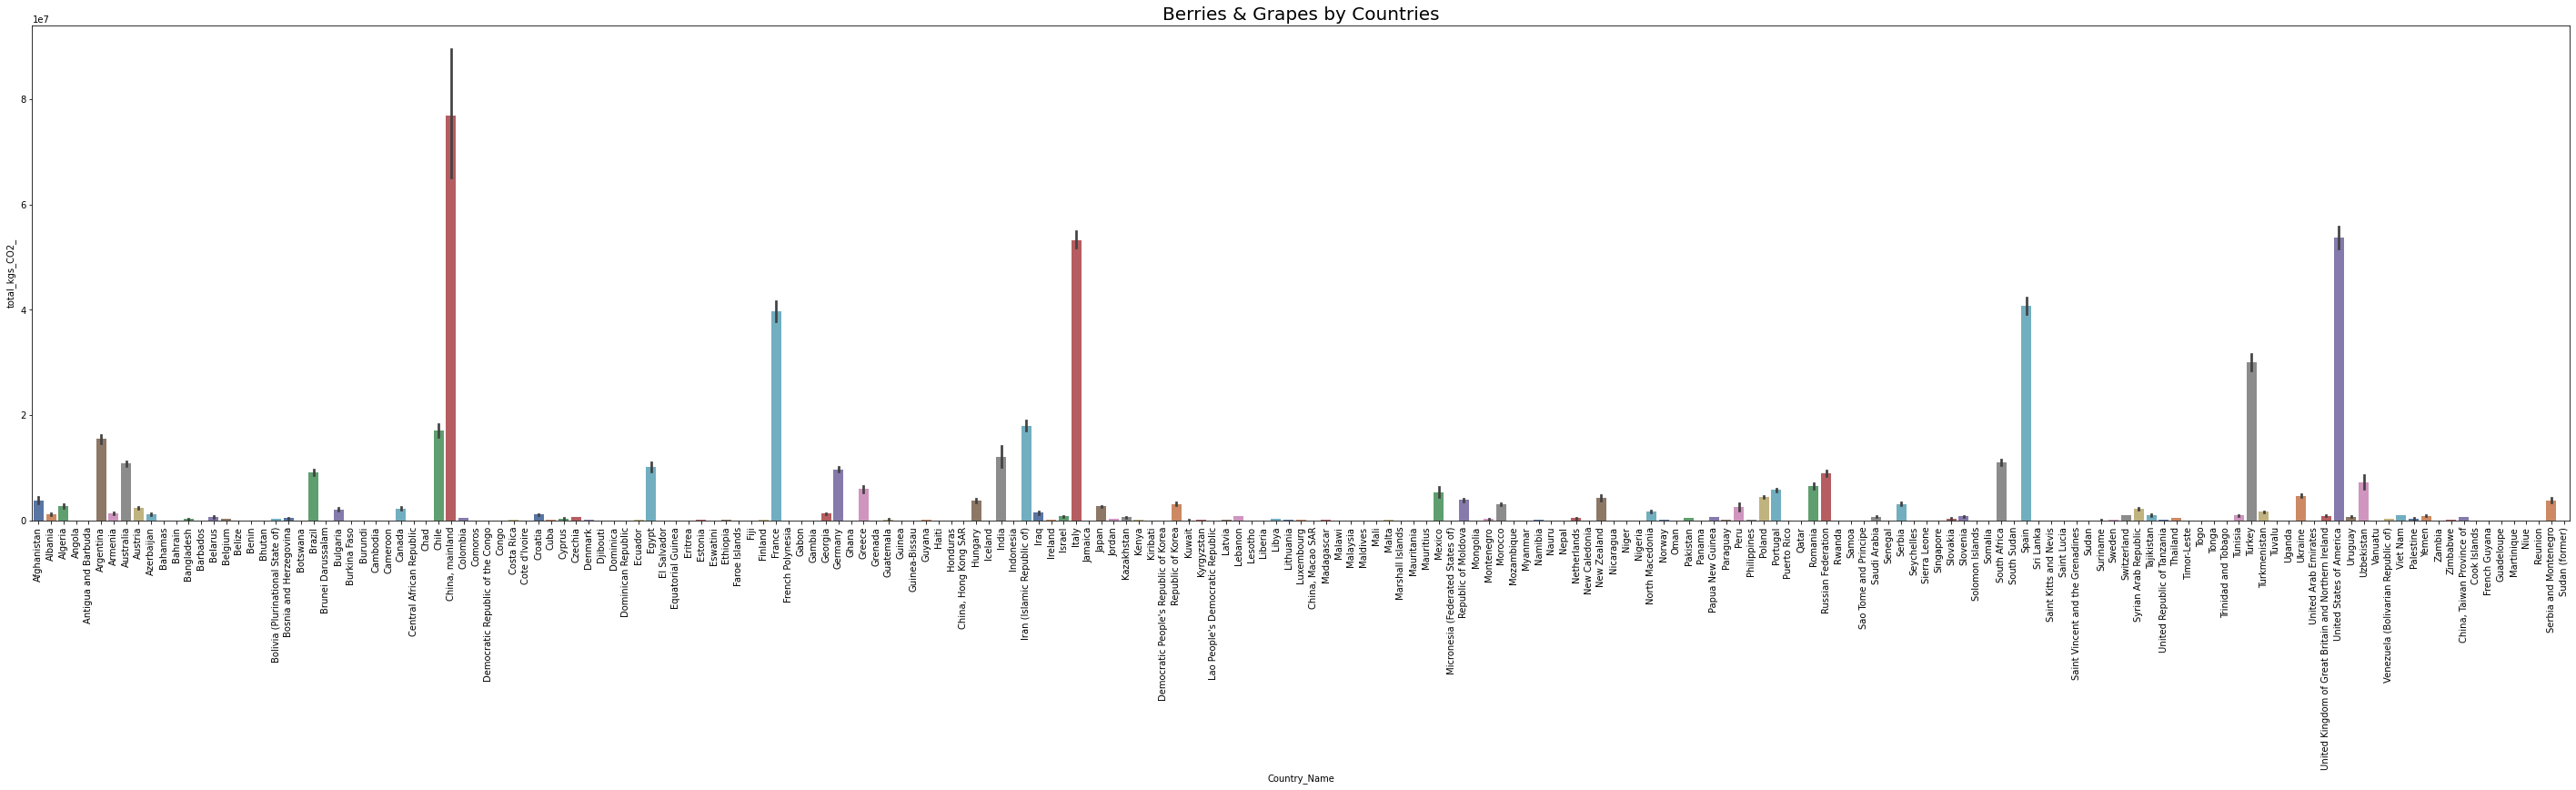

In [65]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = berries_grape['area'], y = berries_grape['total_kgs_CO2_'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_', fontsize = 10)
ax.set_title(label = 'Berries & Grapes by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

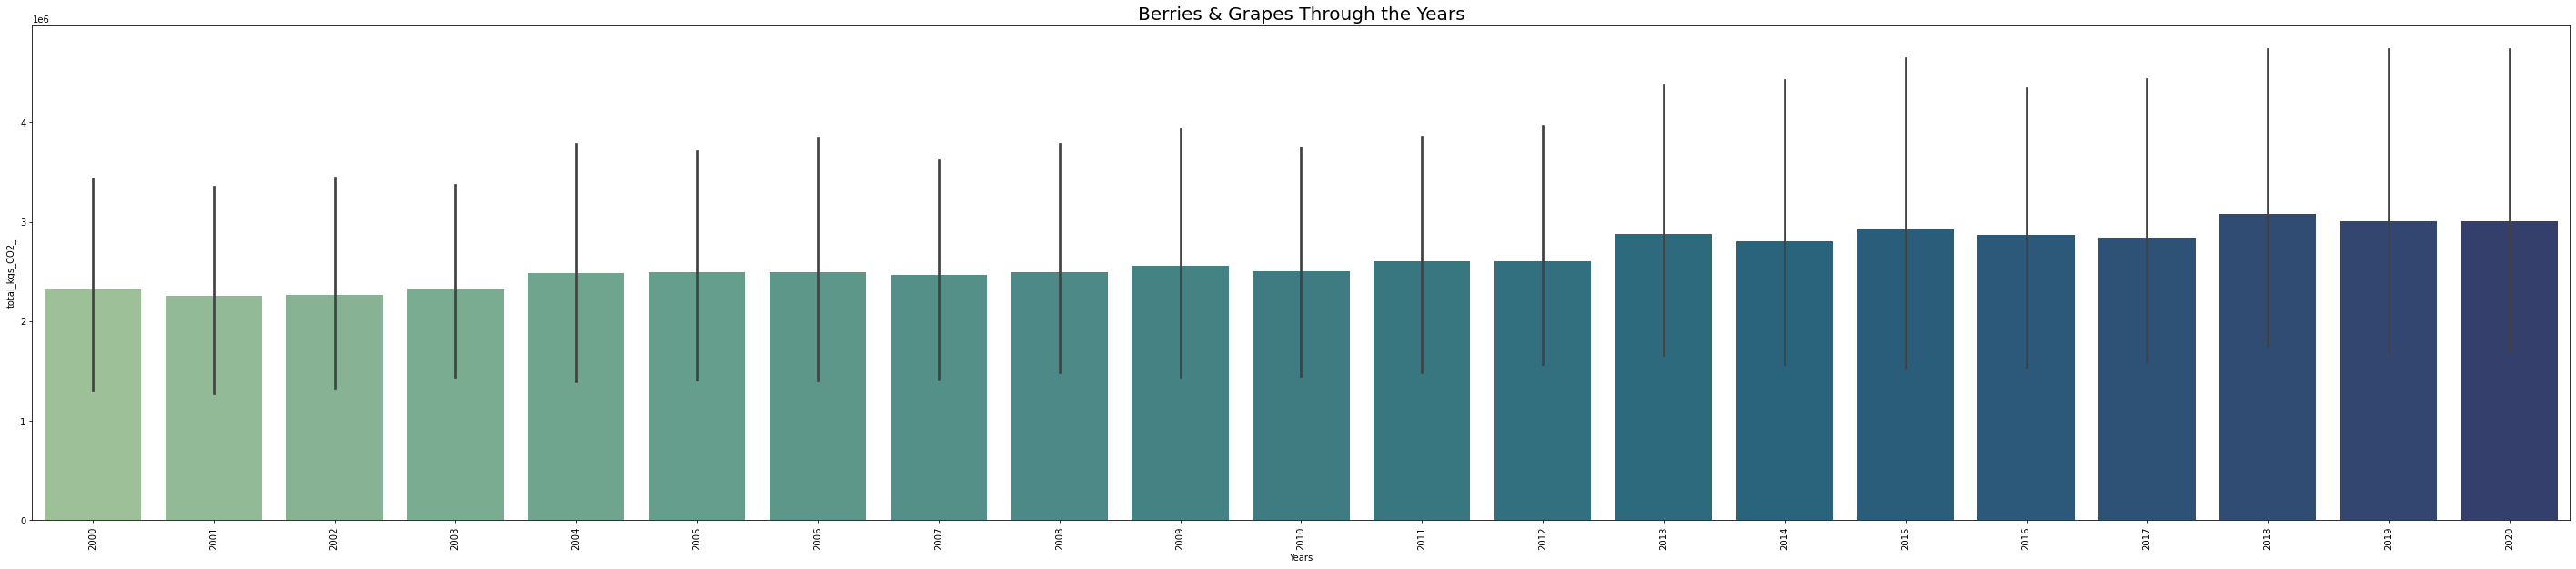

In [66]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = berries_grape['year_pc'], y = berries_grape['total_kgs_CO2_'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_', fontsize = 10)
ax.set_title(label = 'Berries & Grapes Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(berries_grape, dimensions=["year_pc", "total_kgs_CO2_", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Brassicas


In [16]:
brassicas= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_8', 'food_product_categories_8', 'production_tonnes_8', 'total_kgs_CO2_8']]
brassicas.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_8 food_product_categories_8  production_tonnes_8  \
0                8                 Brassicas                  0.0   
1                8                 Brassicas                  0.0   
2                8                 Brassicas                  0.0   
3                8                 Brassicas                  0.0   
4                8                 Brassicas                  0.0   

   total_kgs_CO2_8  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [62]:
brassicas.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_8  production_tonnes_8  total_kgs_CO2_8  
count           4201.0         4.201000e+03     4.201000e+03  
mean               8.0         6.696694e+05     3.354768e+06  
std                0.0         5.229672e+06     2.619649e+07  
min                8.0         0.000000e+00     0.000000e+00  
25%                8.0         0.000000e+00     0.000000e+00  
50%                8.0         1.833700e+04     9.186837e+04  
75%                8.0         1.422700e+05     7.127727e+05  
max                8.0         8.704000e+07     4.359865e+08

In [63]:
brassicas_total = brassicas['total_kgs_CO2_8'].sum()

print (brassicas_total)

14093382346.602


In [64]:
brassicas[["area", "year_pc", "total_kgs_CO2_8" ]]

area  year_pc  total_kgs_CO2_8
0        Afghanistan     2000              0.0
1        Afghanistan     2001              0.0
2        Afghanistan     2002              0.0
3        Afghanistan     2003              0.0
4        Afghanistan     2004              0.0
...              ...      ...              ...
4196  Sudan (former)     2007          40080.0
4197  Sudan (former)     2008          20541.0
4198  Sudan (former)     2009          16032.0
4199  Sudan (former)     2010          16533.0
4200  Sudan (former)     2011              0.0

[4201 rows x 3 columns]

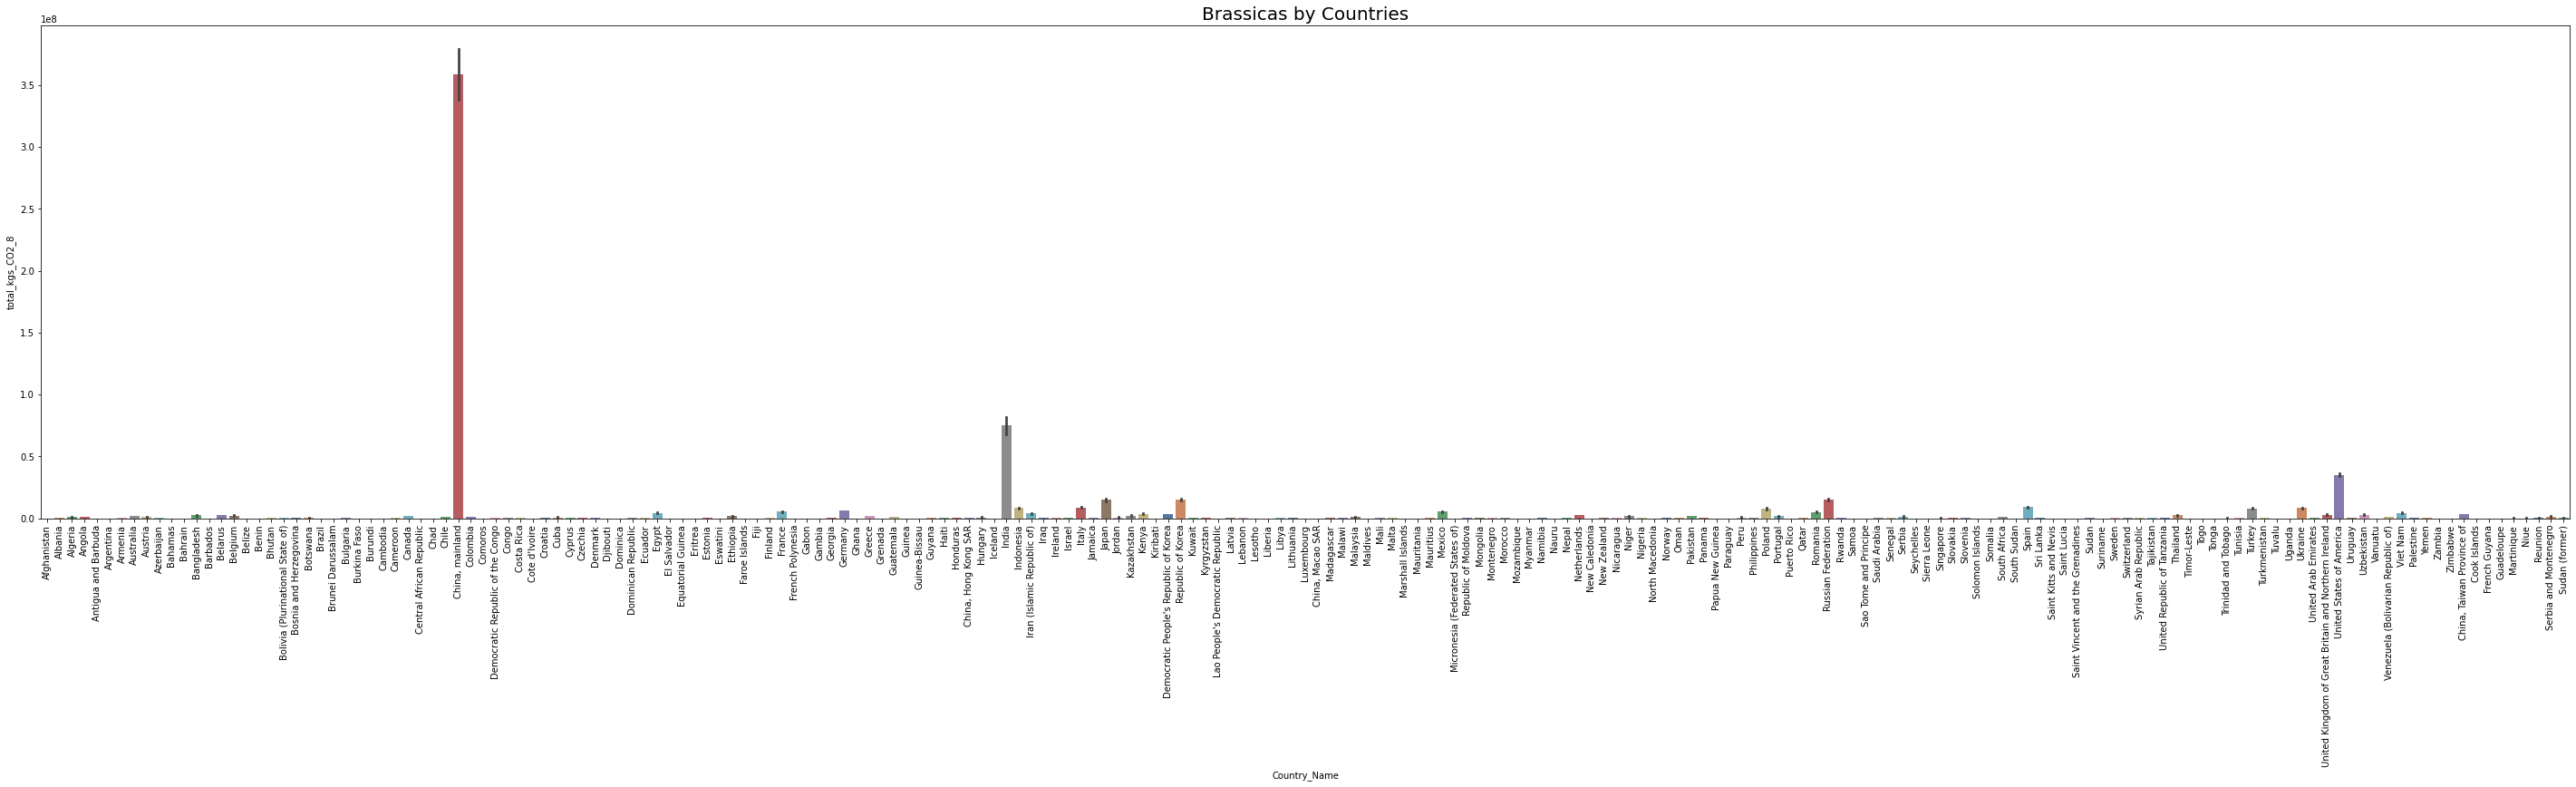

In [68]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = brassicas['area'], y = brassicas['total_kgs_CO2_8'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_8', fontsize = 10)
ax.set_title(label = 'Brassicas by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

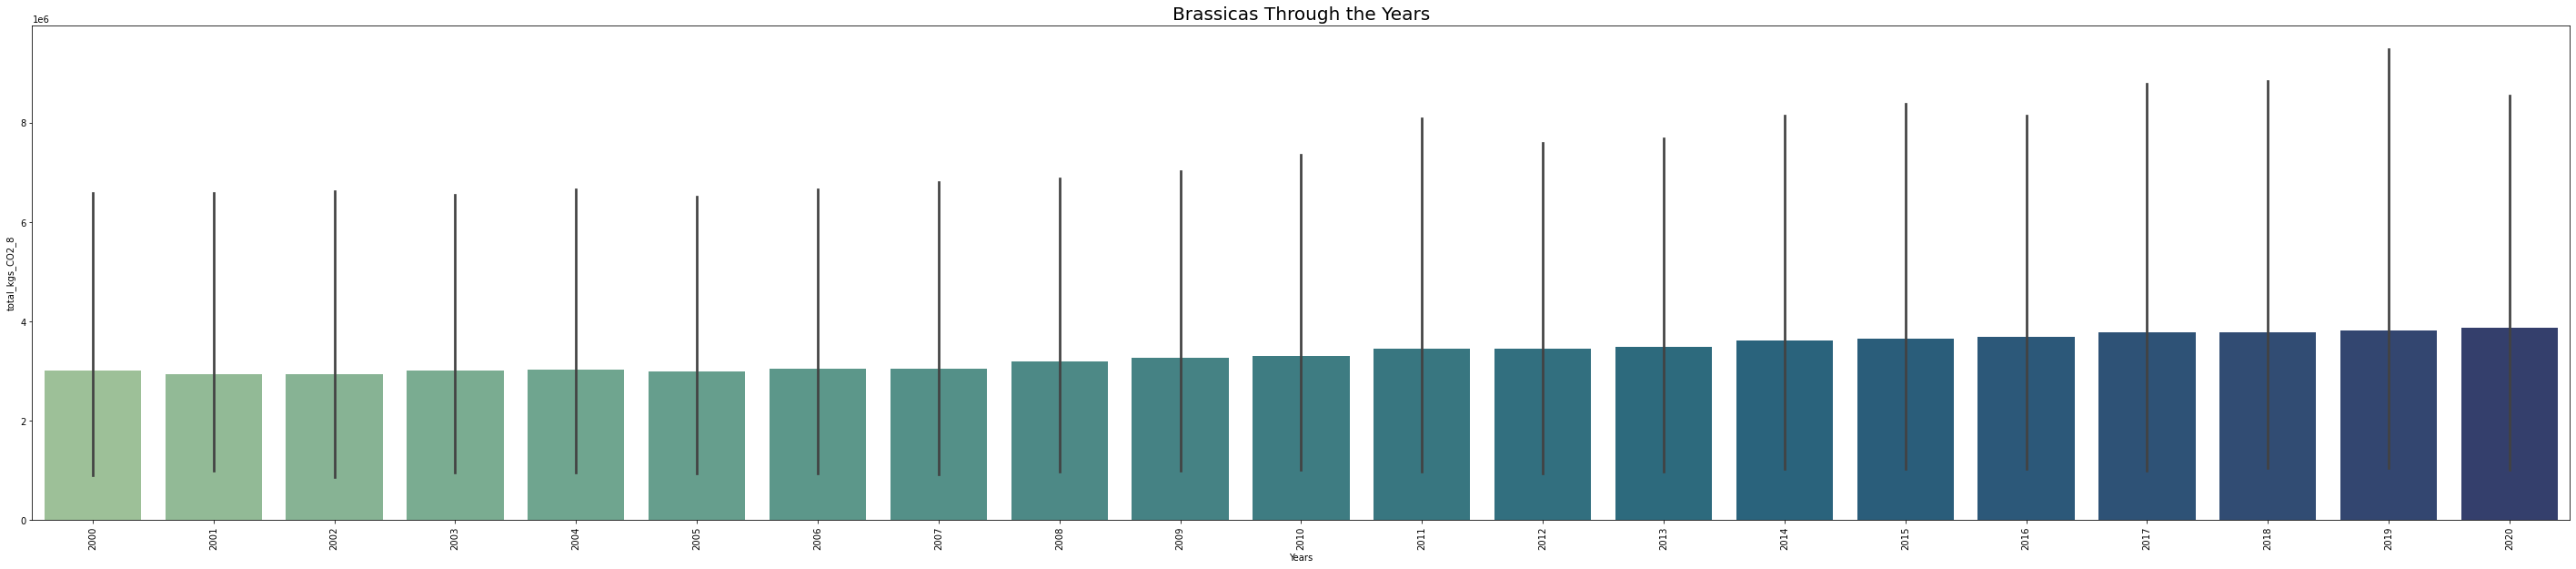

In [69]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = brassicas['year_pc'], y = brassicas['total_kgs_CO2_8'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_8', fontsize = 10)
ax.set_title(label = 'Brassicas Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(brassicas, dimensions=["year_pc", "total_kgs_CO2_8", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()


## Cane Sugar


In [25]:
cane_sugar= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_9', 'food_product_categories_9', 'production_tonnes_9', 'total_kgs_CO2_9']]
cane_sugar.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_9 food_product_categories_9  production_tonnes_9  \
0                9                Cane Sugar              38500.0   
1                9                Cane Sugar              38500.0   
2                9                Cane Sugar              38500.0   
3                9                Cane Sugar              60500.0   
4                9                Cane Sugar              60750.0   

   total_kgs_CO2_9  
0         651420.0  
1         651420.0  
2         651420.0  
3        1023660.0  
4        1027890.0

In [69]:
cane_sugar.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_9  production_tonnes_9  total_kgs_CO2_9  
count           4201.0         4.201000e+03     4.201000e+03  
mean               9.0         8.538173e+06     1.444834e+08  
std                0.0         5.251693e+07     8.886886e+08  
min                9.0         0.000000e+00     0.000000e+00  
25%                9.0         0.000000e+00     0.000000e+00  
50%                9.0         6.500000e+04     1.099800e+06  
75%                9.0         1.509144e+06     2.551553e+07  
max                9.0         7.850000e+08     1.327533e+10

In [70]:
cane_sugar_total = cane_sugar['total_kgs_CO2_9'].sum()

print (cane_sugar_total)


606974822137.575


In [71]:
cane_sugar[["area", "year_pc", "total_kgs_CO2_9" ]]

area  year_pc  total_kgs_CO2_9
0        Afghanistan     2000         651420.0
1        Afghanistan     2001         651420.0
2        Afghanistan     2002         651420.0
3        Afghanistan     2003        1023660.0
4        Afghanistan     2004        1027890.0
...              ...      ...              ...
4196  Sudan (former)     2007      130825440.0
4197  Sudan (former)     2008      130341528.0
4198  Sudan (former)     2009      131750964.0
4199  Sudan (former)     2010      118372320.0
4200  Sudan (former)     2011      108206784.0

[4201 rows x 3 columns]

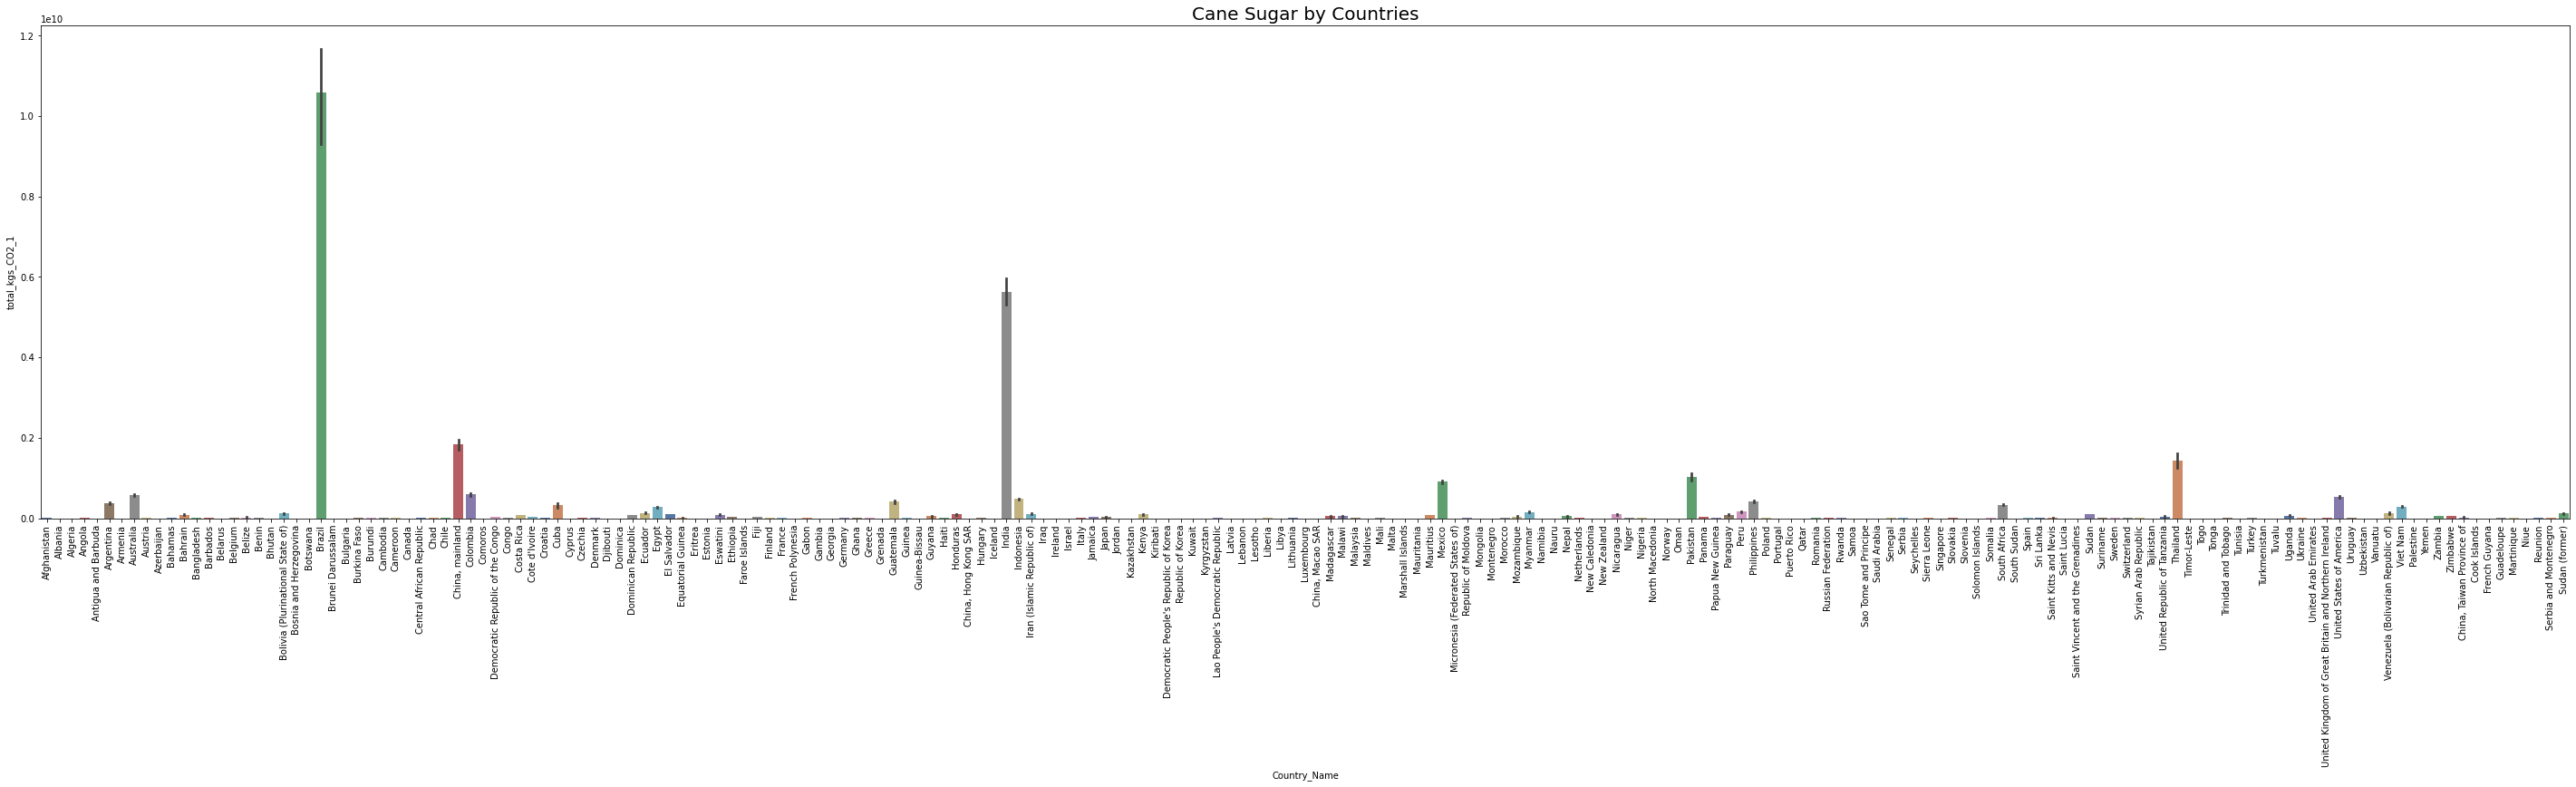

In [26]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = cane_sugar['area'], y = cane_sugar['total_kgs_CO2_9'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_1', fontsize = 10)
ax.set_title(label = 'Cane Sugar by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

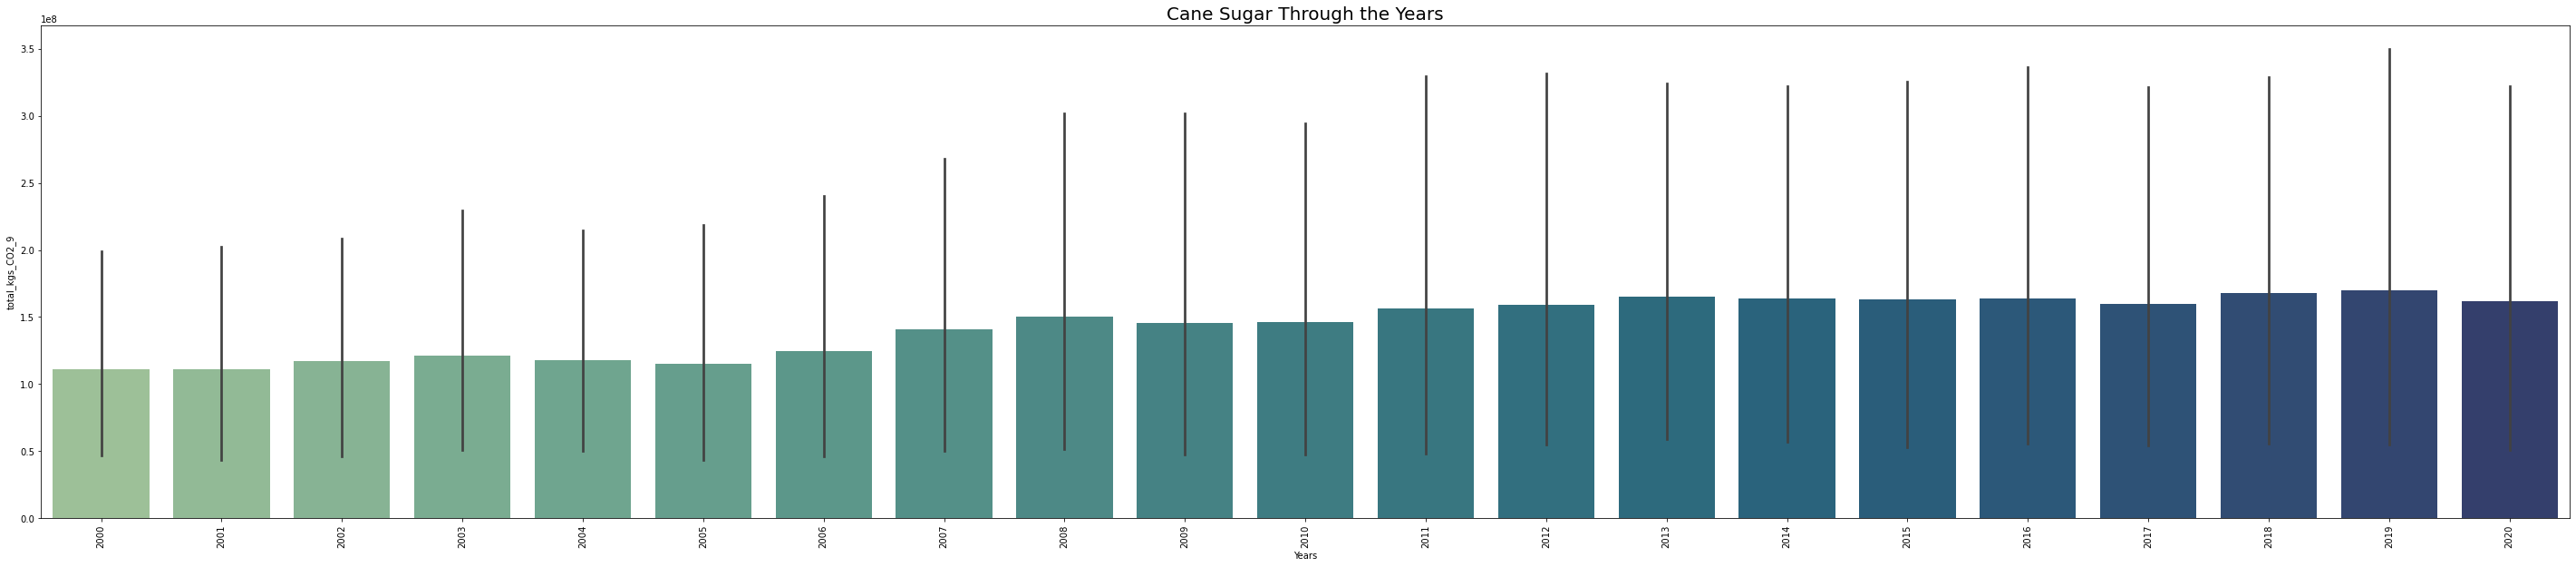

In [27]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = cane_sugar['year_pc'], y = cane_sugar['total_kgs_CO2_9'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_9', fontsize = 10)
ax.set_title(label = 'Cane Sugar Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(cane_sugar, dimensions=["year_pc", "total_kgs_CO2_9", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Cassava


In [18]:
cassava= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_10', 'food_product_categories_10', 'production_tonnes_10', 'total_kgs_CO2_10']]
cassava.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_10 food_product_categories_10  production_tonnes_10  \
0                10                    Cassava                   0.0   
1                10                    Cassava                   0.0   
2                10                    Cassava                   0.0   
3                10                    Cassava                   0.0   
4                10                    Cassava                   0.0   

   total_kgs_CO2_10  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [76]:
cassava.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_10  production_tonnes_10  total_kgs_CO2_10  
count            4201.0          4.201000e+03      4.201000e+03  
mean               10.0          1.232218e+06      8.502347e+05  
std                 0.0          5.041501e+06      3.478491e+06  
min                10.0          0.000000e+00      0.000000e+00  
25%                10.0          0.000000e+00      0.000000e+00  
50%                10.0          0.000000e+00      0.000000e+00  
75%                10.0          9.612500e+04      6.632625e+04  
max                10.0          6.540000e+07      4.509209e+07

In [77]:
cassava_total = cassava['total_kgs_CO2_10'].sum()

print (cassava_total)

3571835877.0674


In [78]:
cassava[["area", "year_pc", "total_kgs_CO2_10" ]]


area  year_pc  total_kgs_CO2_10
0        Afghanistan     2000              0.00
1        Afghanistan     2001              0.00
2        Afghanistan     2002              0.00
3        Afghanistan     2003              0.00
4        Afghanistan     2004              0.00
...              ...      ...               ...
4196  Sudan (former)     2007           6900.00
4197  Sudan (former)     2008           7165.65
4198  Sudan (former)     2009           7265.70
4199  Sudan (former)     2010           7236.72
4200  Sudan (former)     2011           7267.08

[4201 rows x 3 columns]

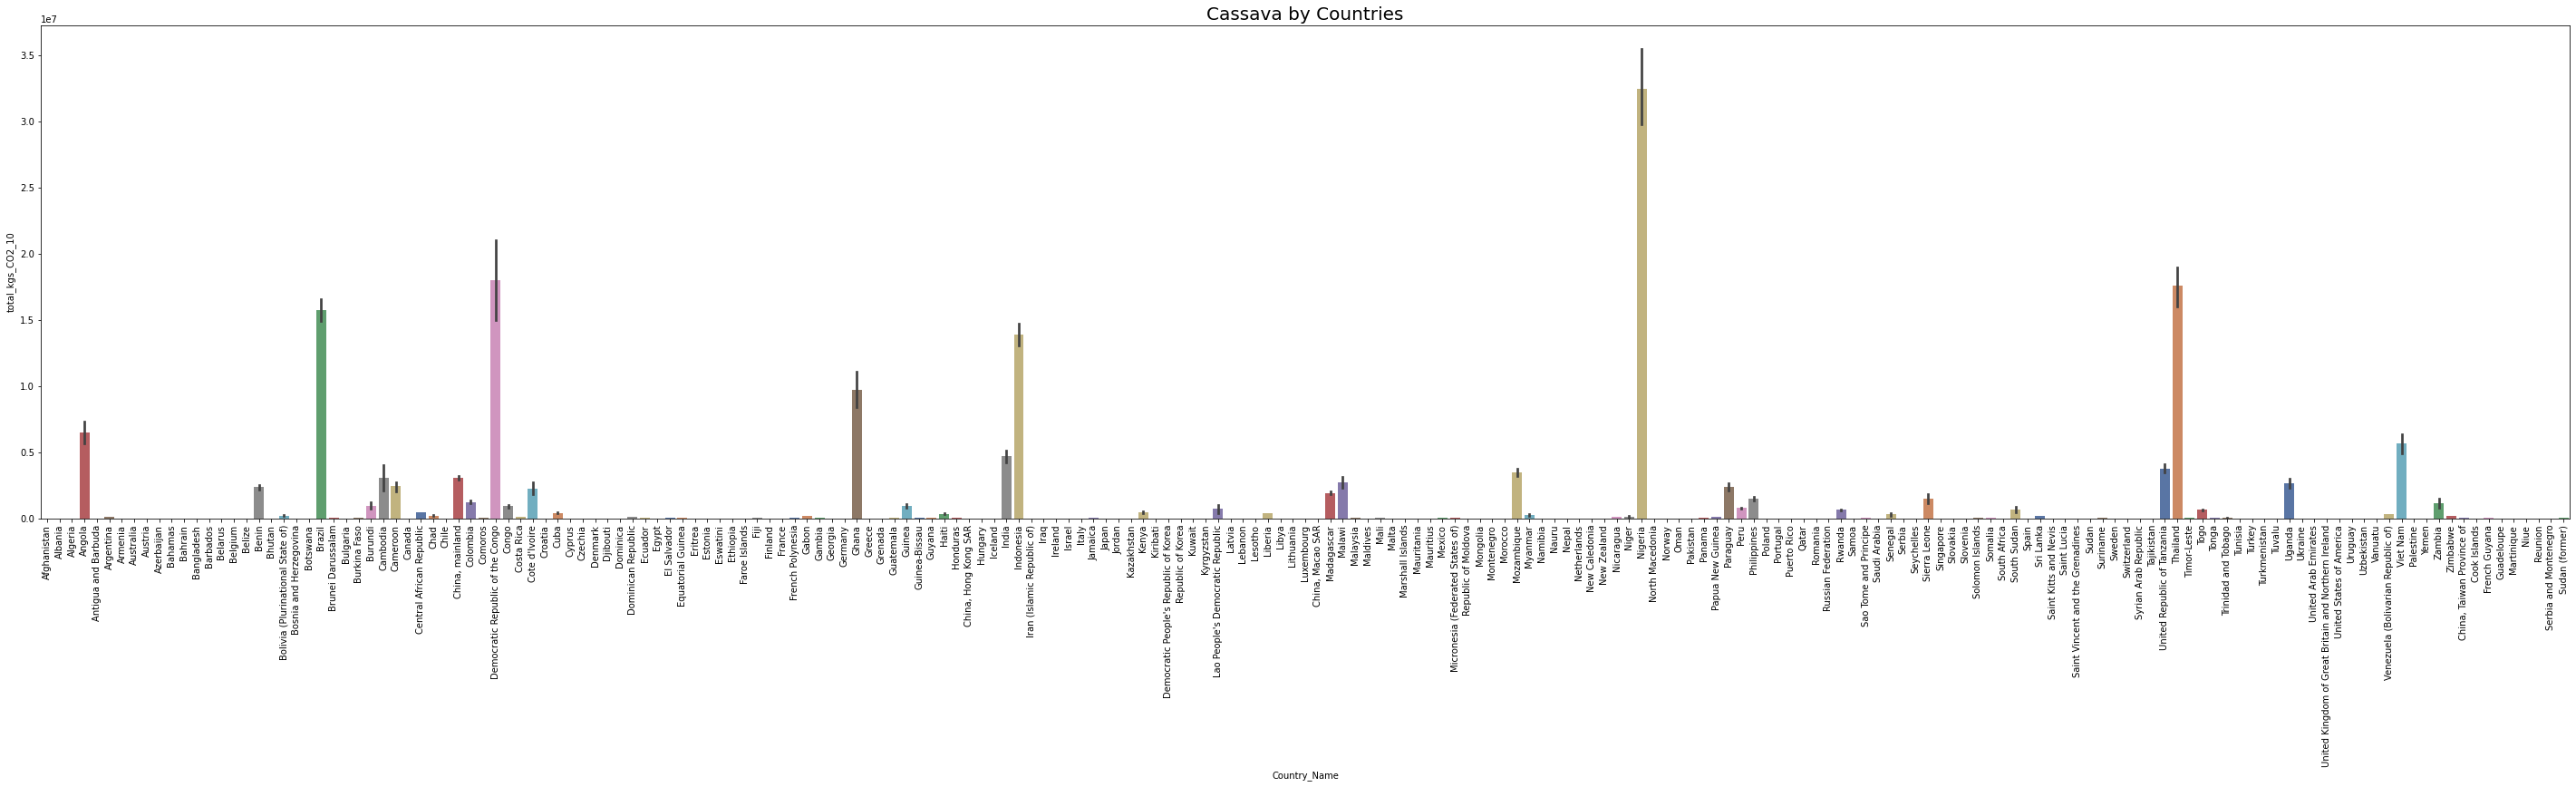

In [72]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = cassava['area'], y = cassava['total_kgs_CO2_10'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_10', fontsize = 10)
ax.set_title(label = 'Cassava by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

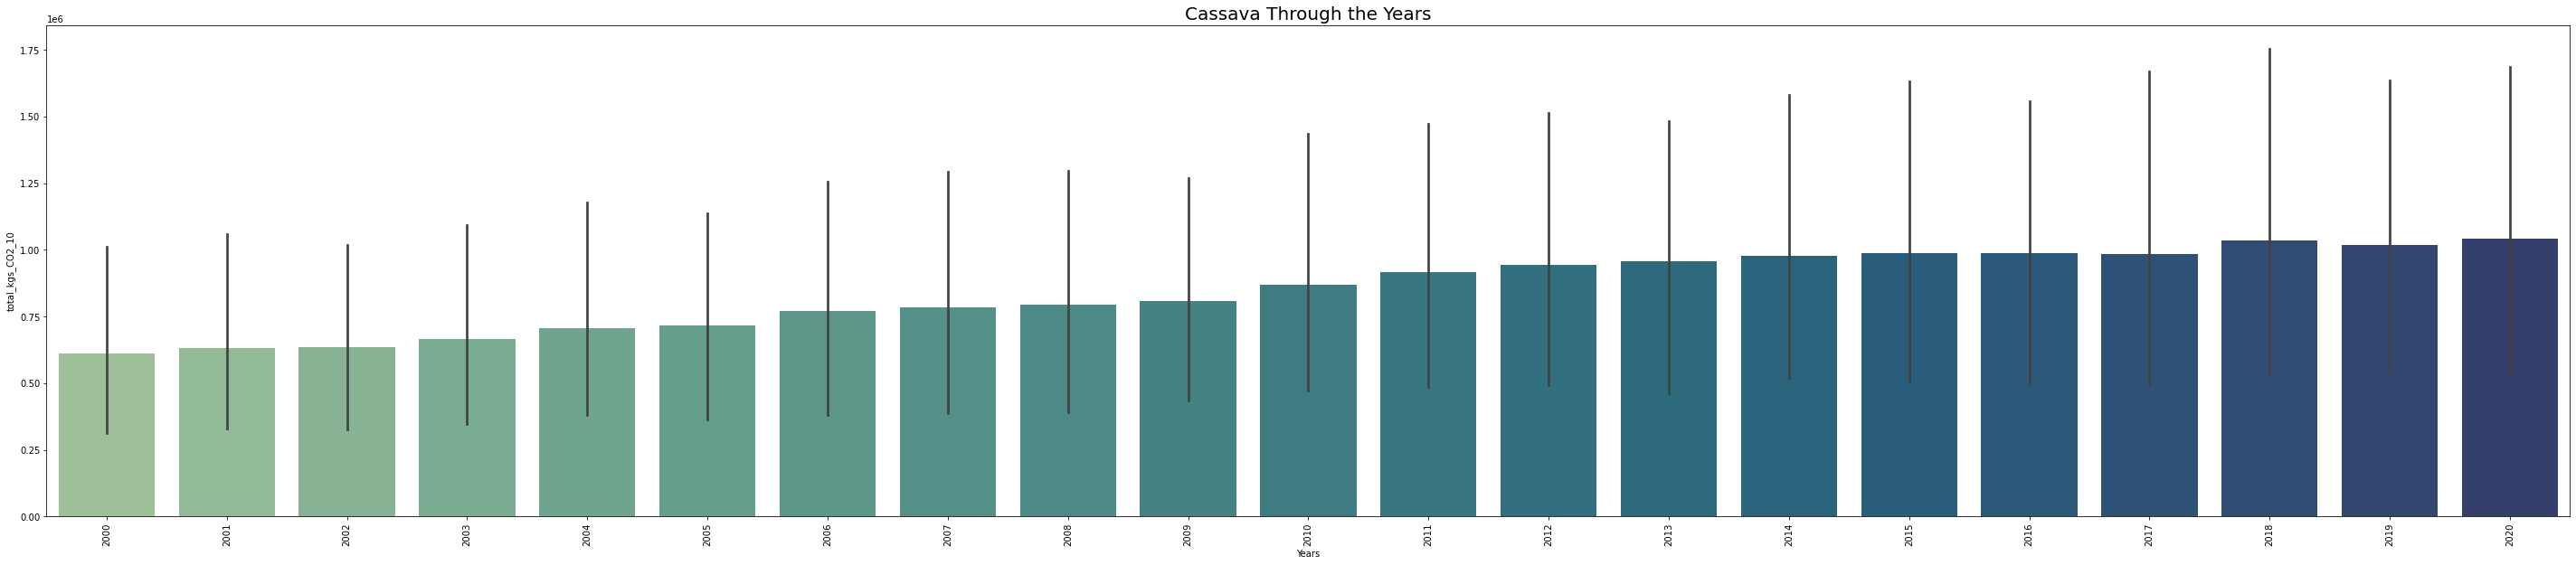

In [30]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = cassava['year_pc'], y = cassava['total_kgs_CO2_10'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_10', fontsize = 10)
ax.set_title(label = 'Cassava Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(cassava, dimensions=["year_pc", "total_kgs_CO2_10", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Cheese


In [20]:
cheese= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_11', 'food_product_categories_11', 'production_tonnes_11', 'total_kgs_CO2_11']]
cheese.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_11 food_product_categories_11  production_tonnes_11  \
0                11                     Cheese               23463.0   
1                11                     Cheese               21330.0   
2                11                     Cheese               19026.0   
3                11                     Cheese               17190.0   
4                11                     Cheese               19530.0   

   total_kgs_CO2_11  
0        2308055.31  
1        2098232.10  
2        1871587.62  
3        1690980.30  
4        1921166.10

In [83]:
cheese.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_11  production_tonnes_11  total_kgs_CO2_11  
count            4201.0          4.201000e+03      4.201000e+03  
mean               11.0          1.029674e+05      1.012855e+07  
std                 0.0          4.348623e+05      4.277151e+07  
min                11.0          0.000000e+00      0.000000e+00  
25%                11.0          0.000000e+00      0.000000e+00  
50%                11.0          1.000000e+03      9.837000e+04  
75%                11.0          4.632343e+04      4.556836e+06  
max                11.0          6.224540e+06      6.118615e+08

In [84]:
cheese_total = cheese['total_kgs_CO2_11'].sum()

print (cheese_total)

42550018058.9881


In [85]:
cheese[["area", "year_pc", "total_kgs_CO2_11" ]]

area  year_pc  total_kgs_CO2_11
0        Afghanistan     2000        2308055.31
1        Afghanistan     2001        2098232.10
2        Afghanistan     2002        1871587.62
3        Afghanistan     2003        1690980.30
4        Afghanistan     2004        1921166.10
...              ...      ...               ...
4196  Sudan (former)     2007       15154390.35
4197  Sudan (former)     2008       15178982.85
4198  Sudan (former)     2009       15284927.34
4199  Sudan (former)     2010       15320143.80
4200  Sudan (former)     2011       15401299.05

[4201 rows x 3 columns]

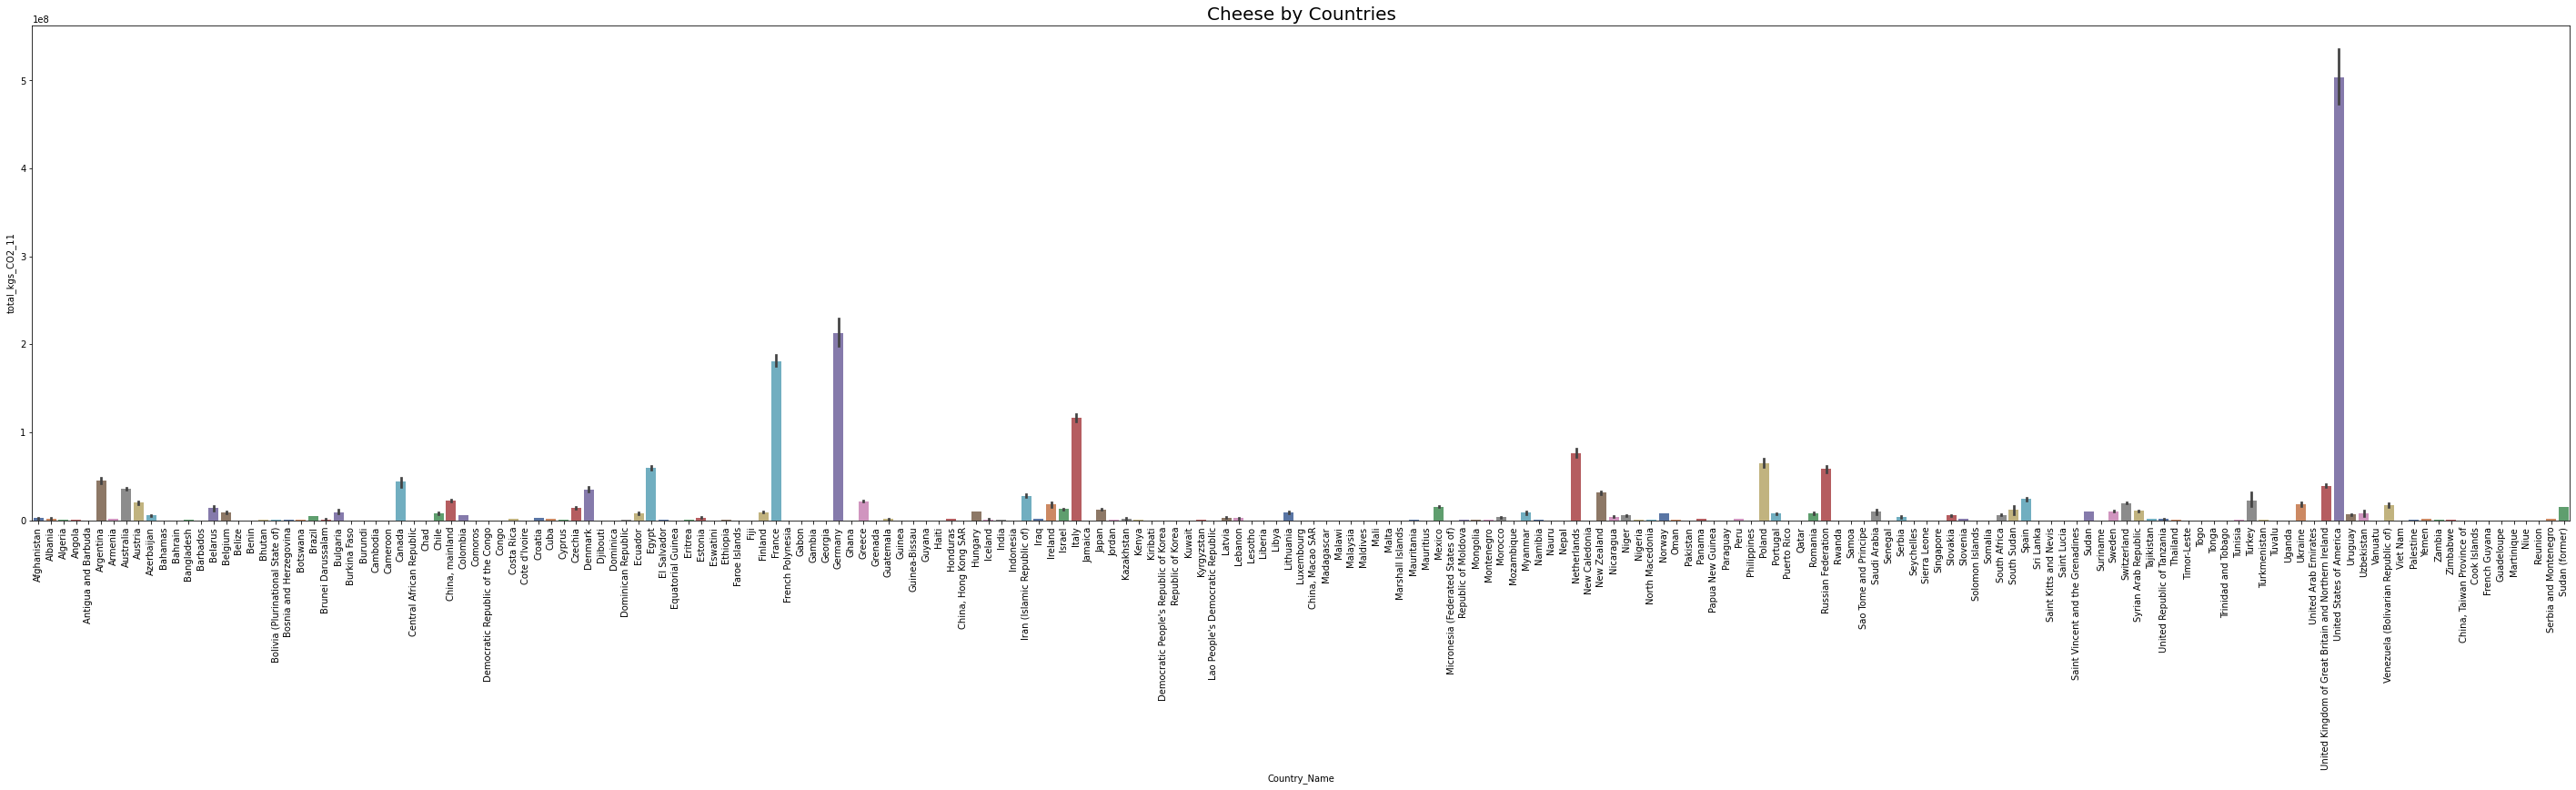

In [74]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = cheese['area'], y = cheese['total_kgs_CO2_11'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_11', fontsize = 10)
ax.set_title(label = 'Cheese by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

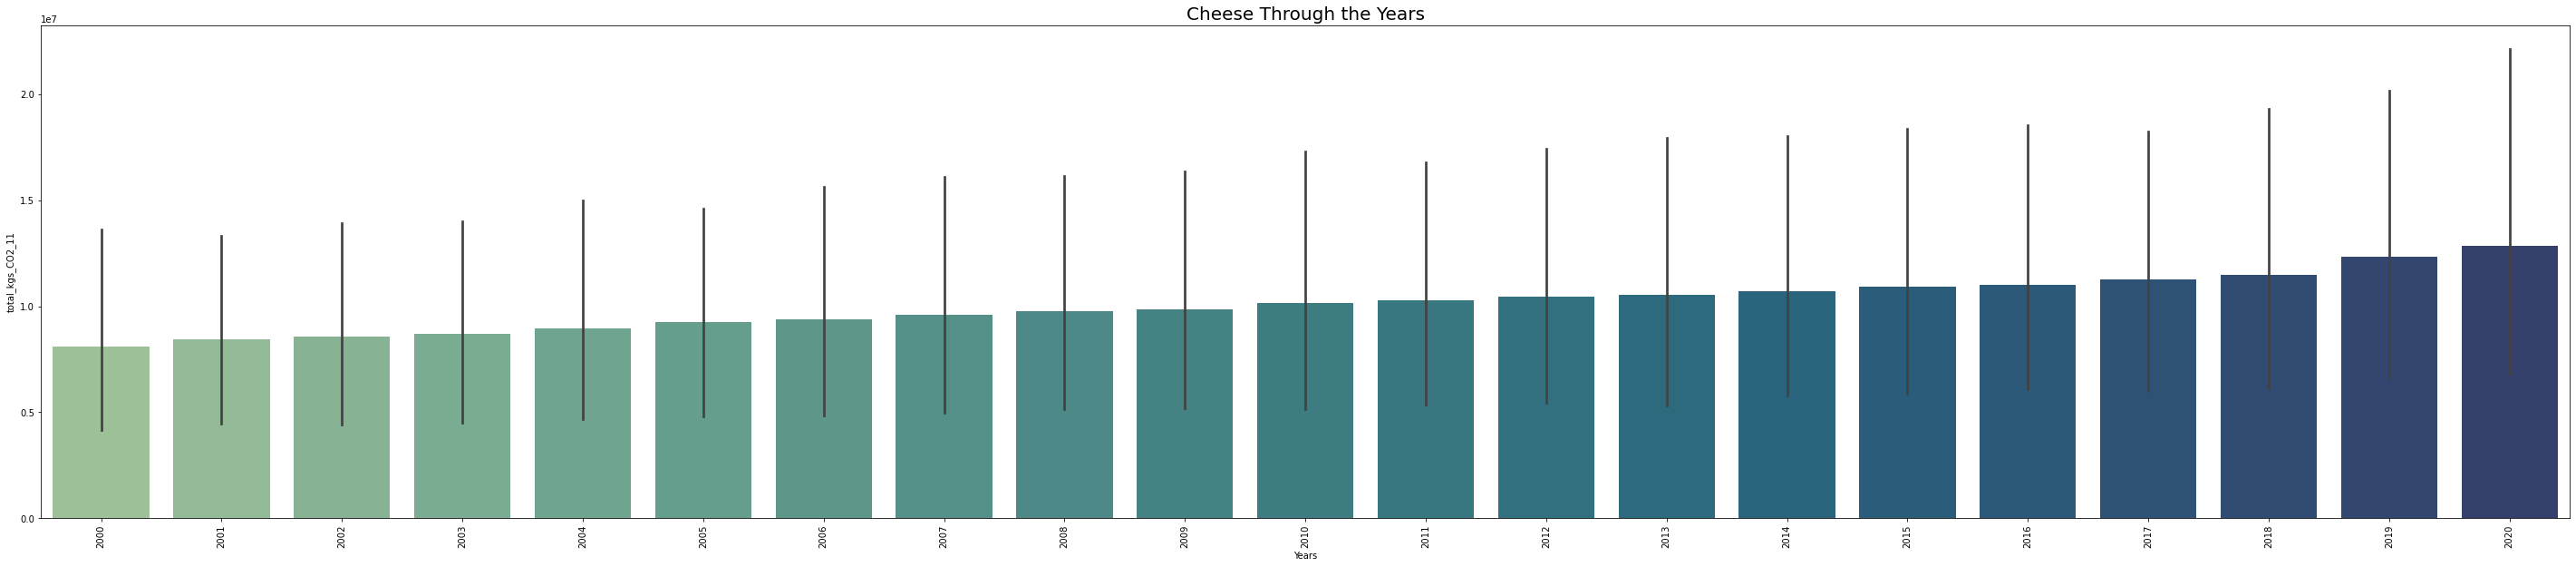

In [75]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = cheese['year_pc'], y = cheese['total_kgs_CO2_11'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_11', fontsize = 10)
ax.set_title(label = 'Cheese Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(cheese, dimensions=["year_pc", "total_kgs_CO2_11", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()


## Citrus Fruit


In [22]:
citrus_fruit= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_12', 'food_product_categories_12', 'production_tonnes_12', 'total_kgs_CO2_12']]
citrus_fruit.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_12 food_product_categories_12  production_tonnes_12  \
0                12               Citrus Fruit              11241.38   
1                12               Citrus Fruit              17760.40   
2                12               Citrus Fruit              17720.66   
3                12               Citrus Fruit              21065.06   
4                12               Citrus Fruit              16931.49   

   total_kgs_CO2_12  
0        39859.7920  
1        39783.2960  
2        39694.2784  
3        47185.7344  
4        37926.5376

In [90]:
citrus_fruit.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_12  production_tonnes_12  total_kgs_CO2_12  
count            4201.0          4.201000e+03      4.201000e+03  
mean               12.0          6.482943e+05      1.452243e+06  
std                 0.0          2.790661e+06      6.252070e+06  
min                12.0          0.000000e+00      0.000000e+00  
25%                12.0          0.000000e+00      0.000000e+00  
50%                12.0          8.709000e+03      1.950816e+04  
75%                12.0          1.765686e+05      3.955137e+05  
max                12.0          4.423000e+07      9.907835e+07

In [91]:
citrus_fruit_total = citrus_fruit['total_kgs_CO2_12'].sum()

print (citrus_fruit_total)

6100874720.59


In [92]:
citrus_fruit[["area", "year_pc", "total_kgs_CO2_12" ]]

area  year_pc  total_kgs_CO2_12
0        Afghanistan     2000      3.985979e+04
1        Afghanistan     2001      3.978330e+04
2        Afghanistan     2002      3.969428e+04
3        Afghanistan     2003      4.718573e+04
4        Afghanistan     2004      3.792654e+04
...              ...      ...               ...
4196  Sudan (former)     2007      1.141504e+06
4197  Sudan (former)     2008      1.192800e+06
4198  Sudan (former)     2009      1.172864e+06
4199  Sudan (former)     2010      1.242080e+06
4200  Sudan (former)     2011      1.251132e+06

[4201 rows x 3 columns]

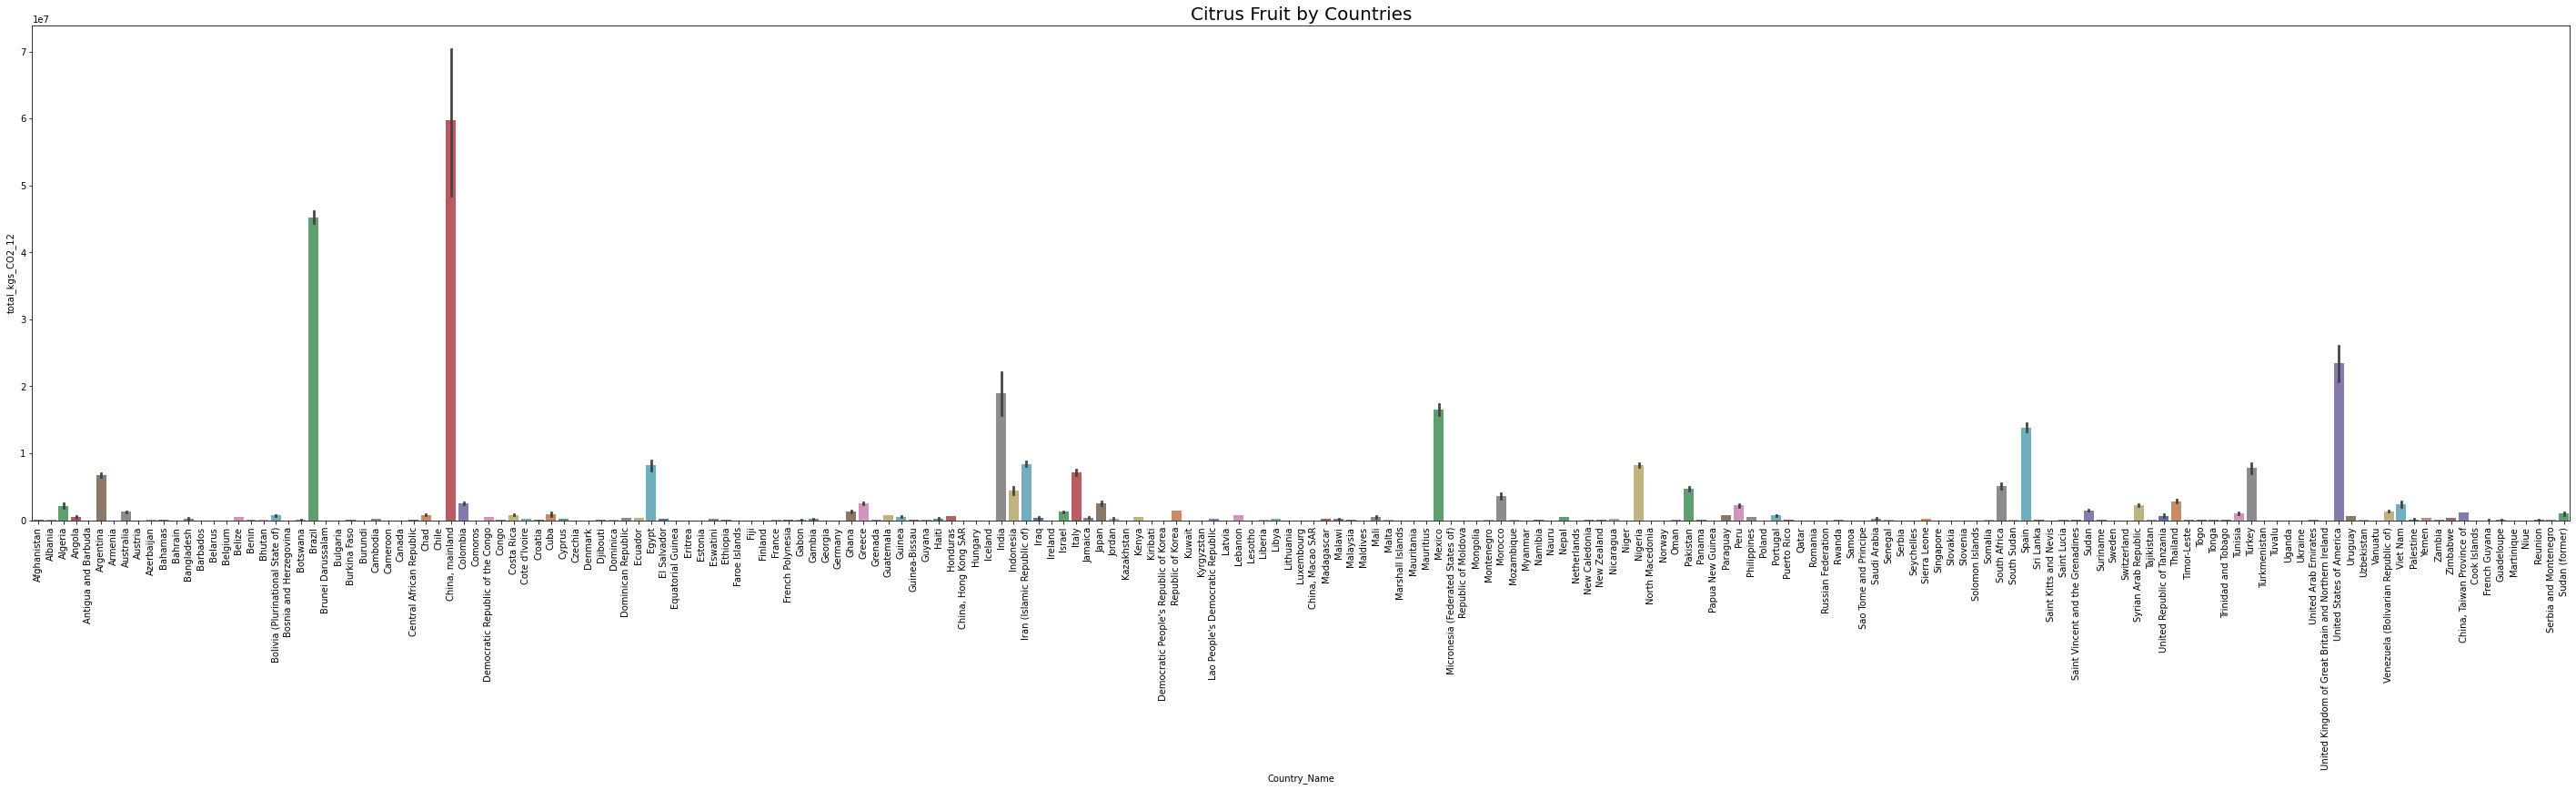

In [77]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = citrus_fruit['area'], y = citrus_fruit['total_kgs_CO2_12'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_12', fontsize = 10)
ax.set_title(label = 'Citrus Fruit by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

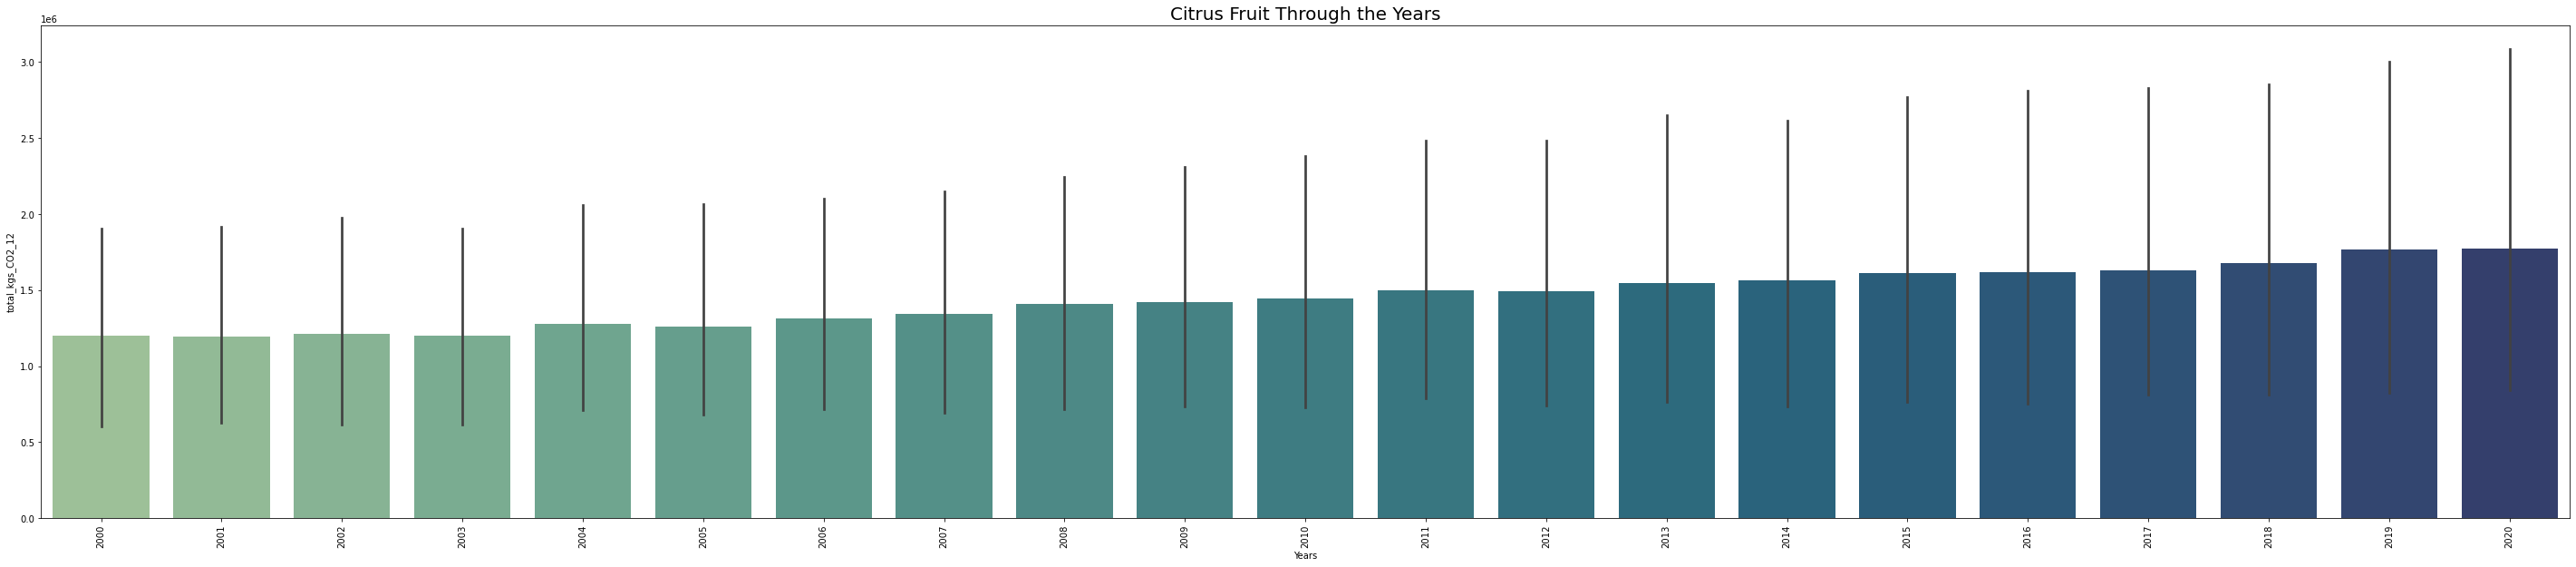

In [78]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = citrus_fruit['year_pc'], y = citrus_fruit['total_kgs_CO2_12'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_12', fontsize = 10)
ax.set_title(label = 'Citrus Fruit Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(citrus_fruit, dimensions=["year_pc", "total_kgs_CO2_12", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Coffee


In [81]:
coffee= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_13', 'food_product_categories_13', 'production_tonnes_13', 'total_kgs_CO2_13']]
coffee.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_13 food_product_categories_13  production_tonnes_13  \
0                13                     Coffee                   0.0   
1                13                     Coffee                   0.0   
2                13                     Coffee                   0.0   
3                13                     Coffee                   0.0   
4                13                     Coffee                   0.0   

   total_kgs_CO2_13  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [97]:
coffee.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_13  production_tonnes_13  total_kgs_CO2_13  
count            4201.0          4.201000e+03      4.201000e+03  
mean               13.0          4.282339e+04      4.732683e+06  
std                 0.0          2.249391e+05      2.486205e+07  
min                13.0          0.000000e+00      0.000000e+00  
25%                13.0          0.000000e+00      0.000000e+00  
50%                13.0          0.000000e+00      0.000000e+00  
75%                13.0          3.000000e+03      3.315600e+05  
max                13.0          3.700000e+06      4.089495e+08

In [98]:
coffee_total = coffee['total_kgs_CO2_13'].sum()

print (coffee_total)

19882002318.7234


In [99]:
coffee[["area", "year_pc", "total_kgs_CO2_13" ]]

area  year_pc  total_kgs_CO2_13
0        Afghanistan     2000               0.0
1        Afghanistan     2001               0.0
2        Afghanistan     2002               0.0
3        Afghanistan     2003               0.0
4        Afghanistan     2004               0.0
...              ...      ...               ...
4196  Sudan (former)     2007               0.0
4197  Sudan (former)     2008               0.0
4198  Sudan (former)     2009               0.0
4199  Sudan (former)     2010               0.0
4200  Sudan (former)     2011               0.0

[4201 rows x 3 columns]

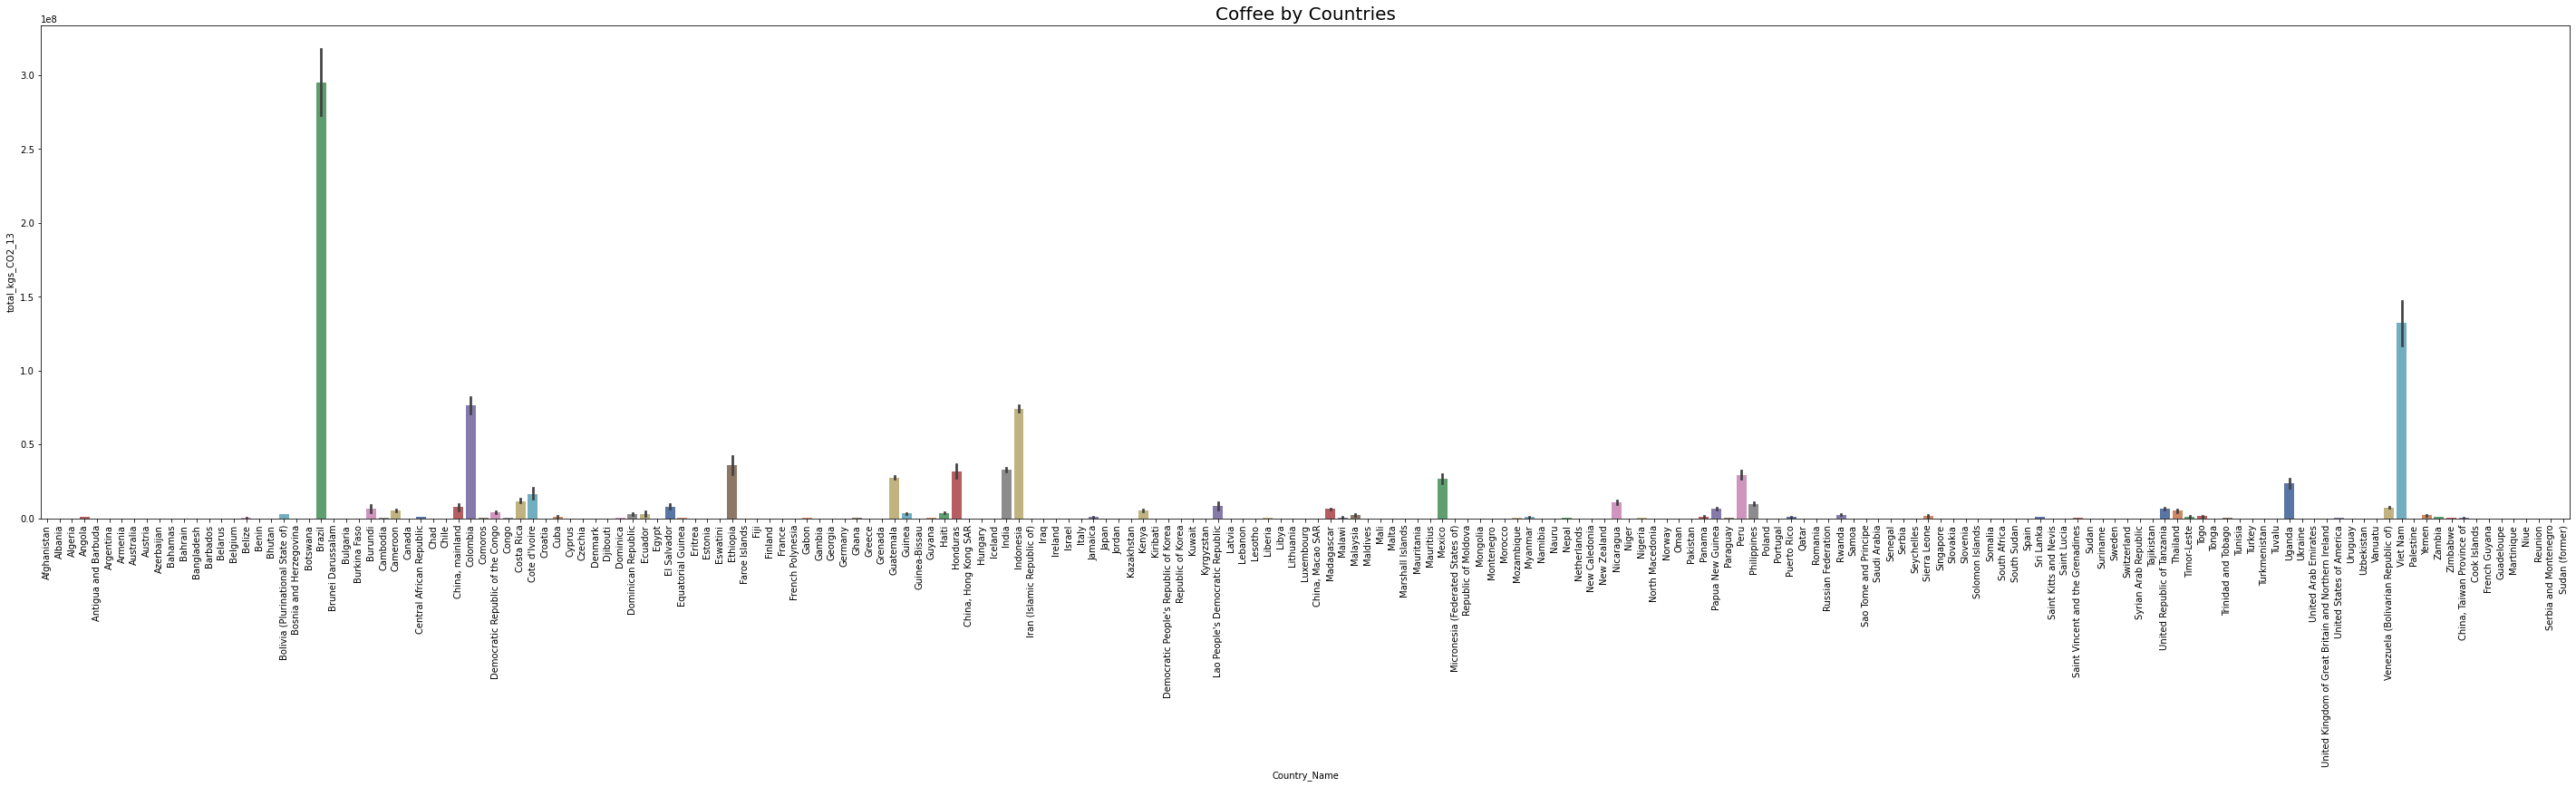

In [82]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = coffee['area'], y = coffee['total_kgs_CO2_13'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_13', fontsize = 10)
ax.set_title(label = 'Coffee by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

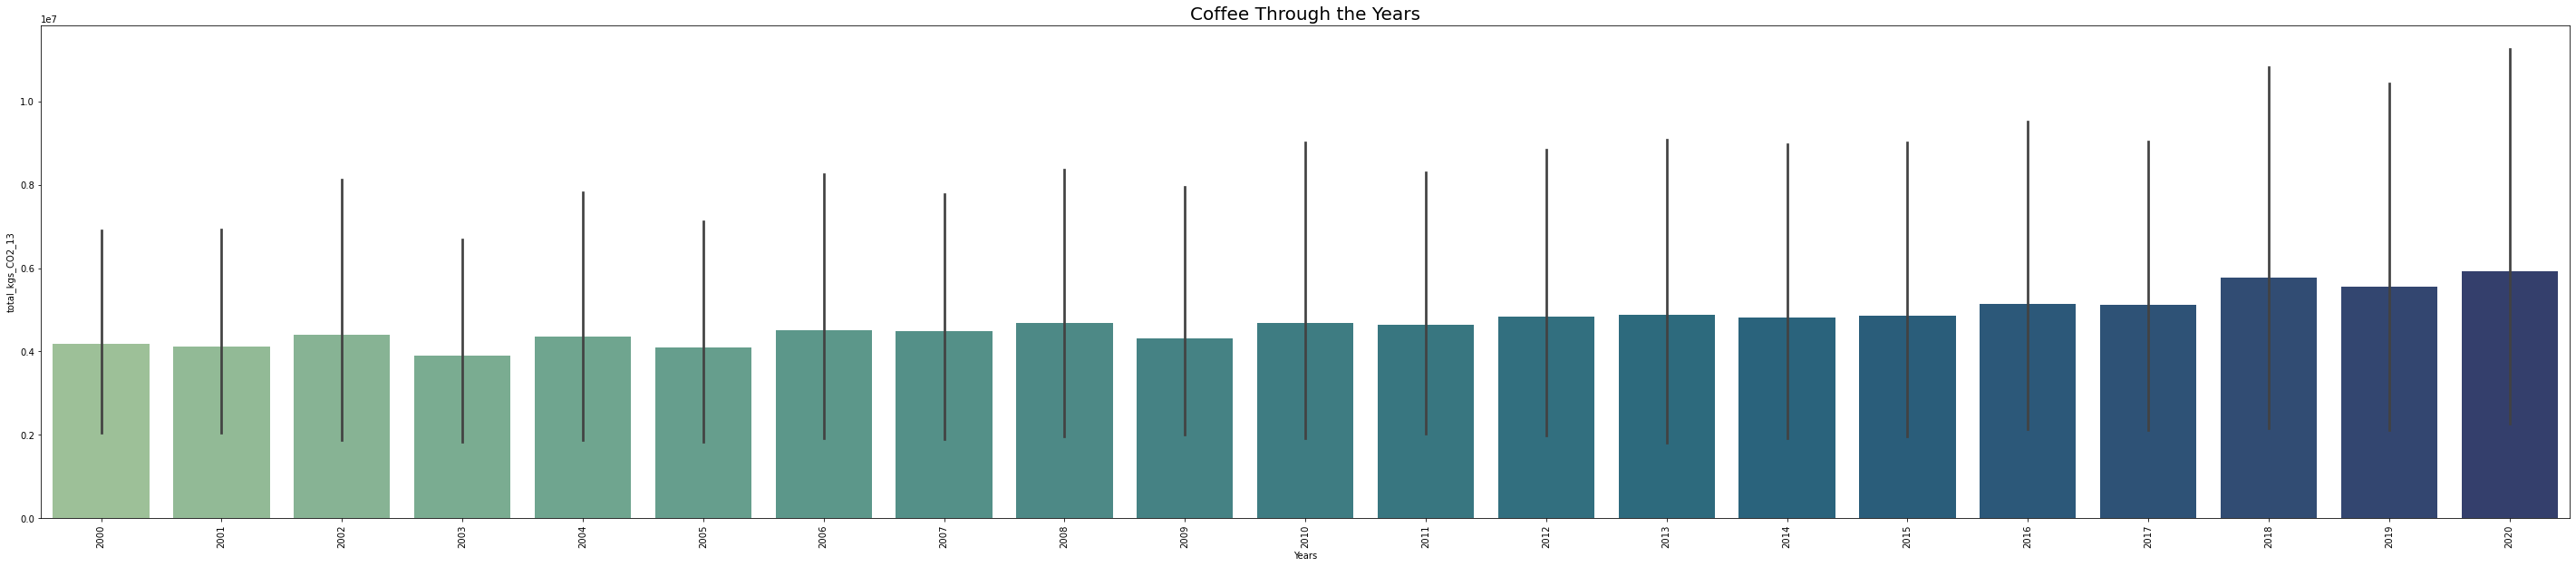

In [83]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = coffee['year_pc'], y = coffee['total_kgs_CO2_13'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_13', fontsize = 10)
ax.set_title(label = 'Coffee Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(coffee, dimensions=["year_pc", "total_kgs_CO2_13", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Dark Chocolate


In [85]:
dark_chocolate= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_14', 'food_product_categories_14', 'production_tonnes_14', 'total_kgs_CO2_14']]
dark_chocolate.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_14 food_product_categories_14  production_tonnes_14  \
0                14             Dark Chocolate                   0.0   
1                14             Dark Chocolate                   0.0   
2                14             Dark Chocolate                   0.0   
3                14             Dark Chocolate                   0.0   
4                14             Dark Chocolate                   0.0   

   total_kgs_CO2_14  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [104]:
dark_chocolate.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_14  production_tonnes_14  total_kgs_CO2_14  
count       4201.000000          4.201000e+03      4.201000e+03  
mean          46.791954          2.201171e+04      1.916825e+06  
std           62.056499          1.368884e+05      1.192049e+07  
min           14.000000          0.000000e+00      0.000000e+00  
25%           14.000000          0.000000e+00      0.000000e+00  
50%           14.000000          0.000000e+00      0.000000e+00  
75%           47.000000          1.083100e+02      9.431635e+03  
max          270.000000          2.240000e+06      1.946275e+08

In [105]:
dark_chocolate_total = dark_chocolate['total_kgs_CO2_14'].sum()

print (dark_chocolate_total)

8052581641.185401


In [106]:
dark_chocolate[["area", "year_pc", "total_kgs_CO2_14" ]]

area  year_pc  total_kgs_CO2_14
0        Afghanistan     2000               0.0
1        Afghanistan     2001               0.0
2        Afghanistan     2002               0.0
3        Afghanistan     2003               0.0
4        Afghanistan     2004               0.0
...              ...      ...               ...
4196  Sudan (former)     2007               0.0
4197  Sudan (former)     2008               0.0
4198  Sudan (former)     2009               0.0
4199  Sudan (former)     2010               0.0
4200  Sudan (former)     2011               0.0

[4201 rows x 3 columns]

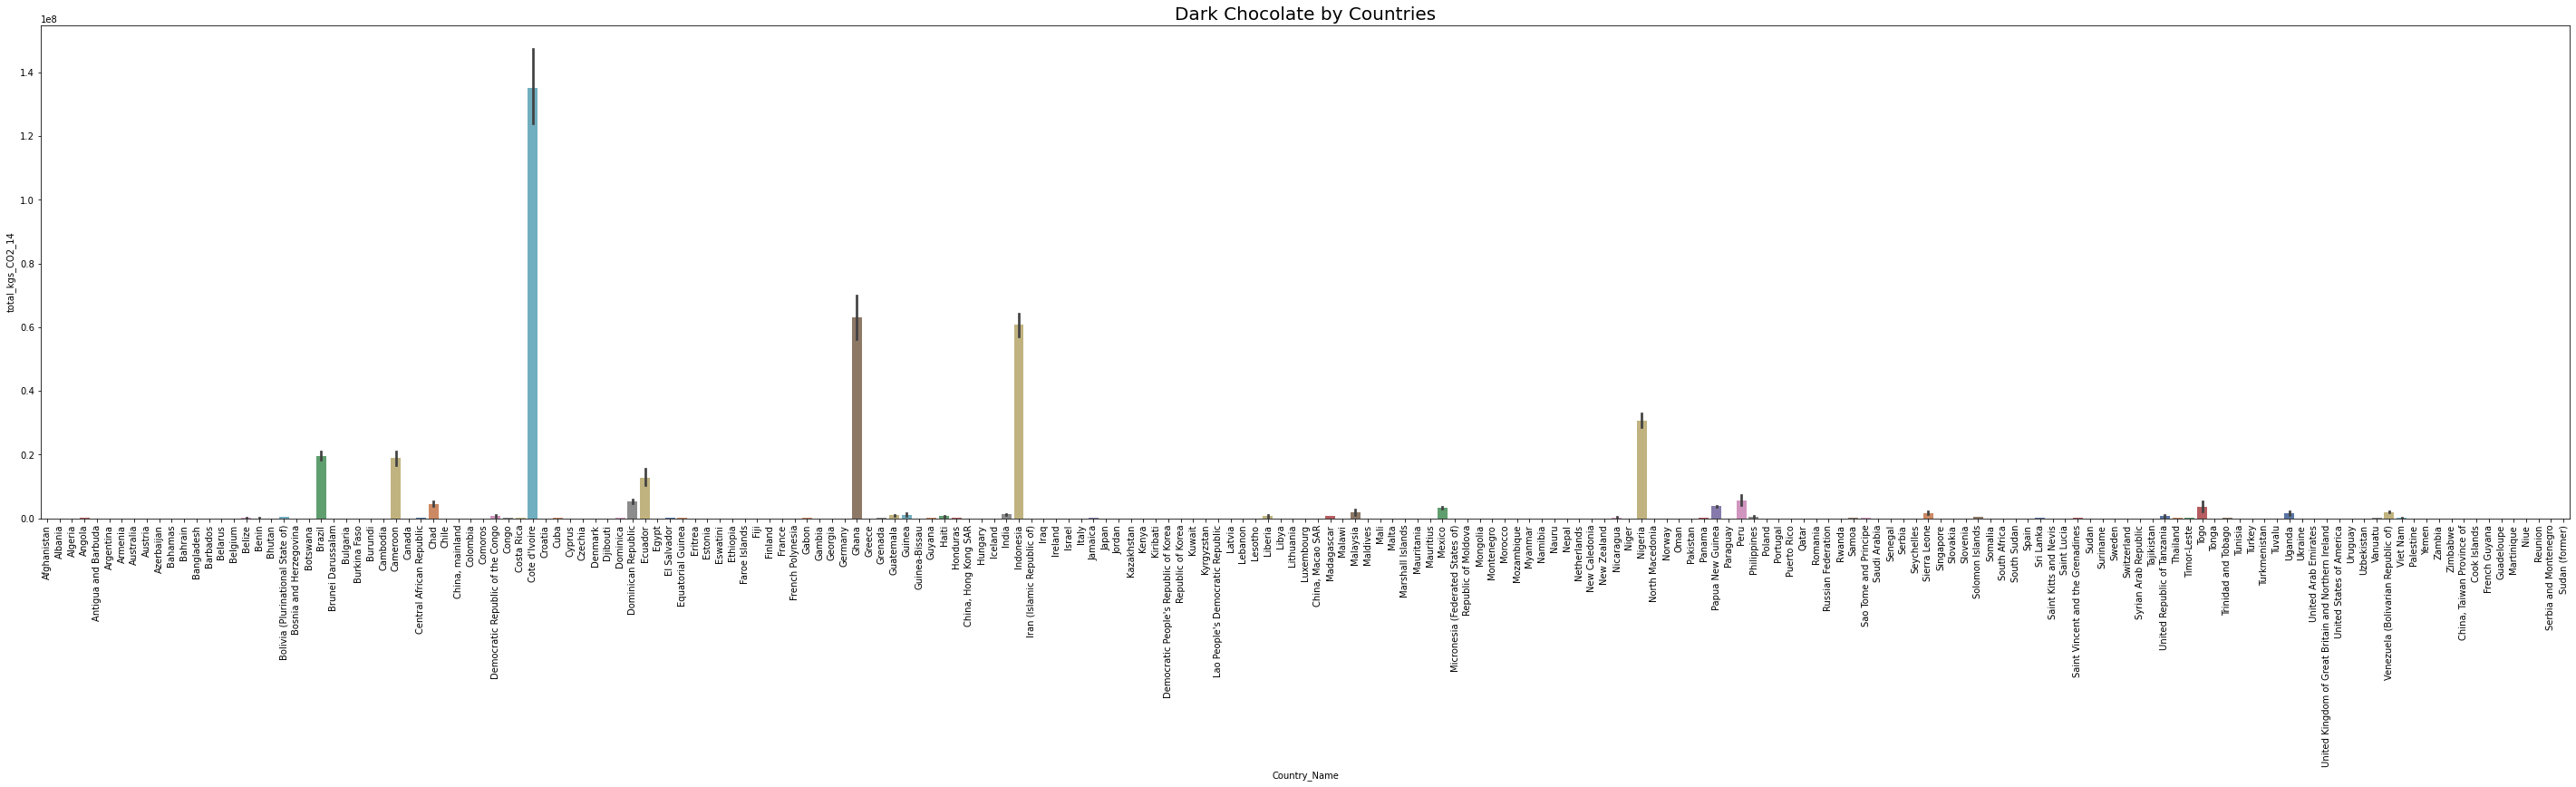

In [86]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = dark_chocolate['area'], y = dark_chocolate['total_kgs_CO2_14'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_14', fontsize = 10)
ax.set_title(label = 'Dark Chocolate by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

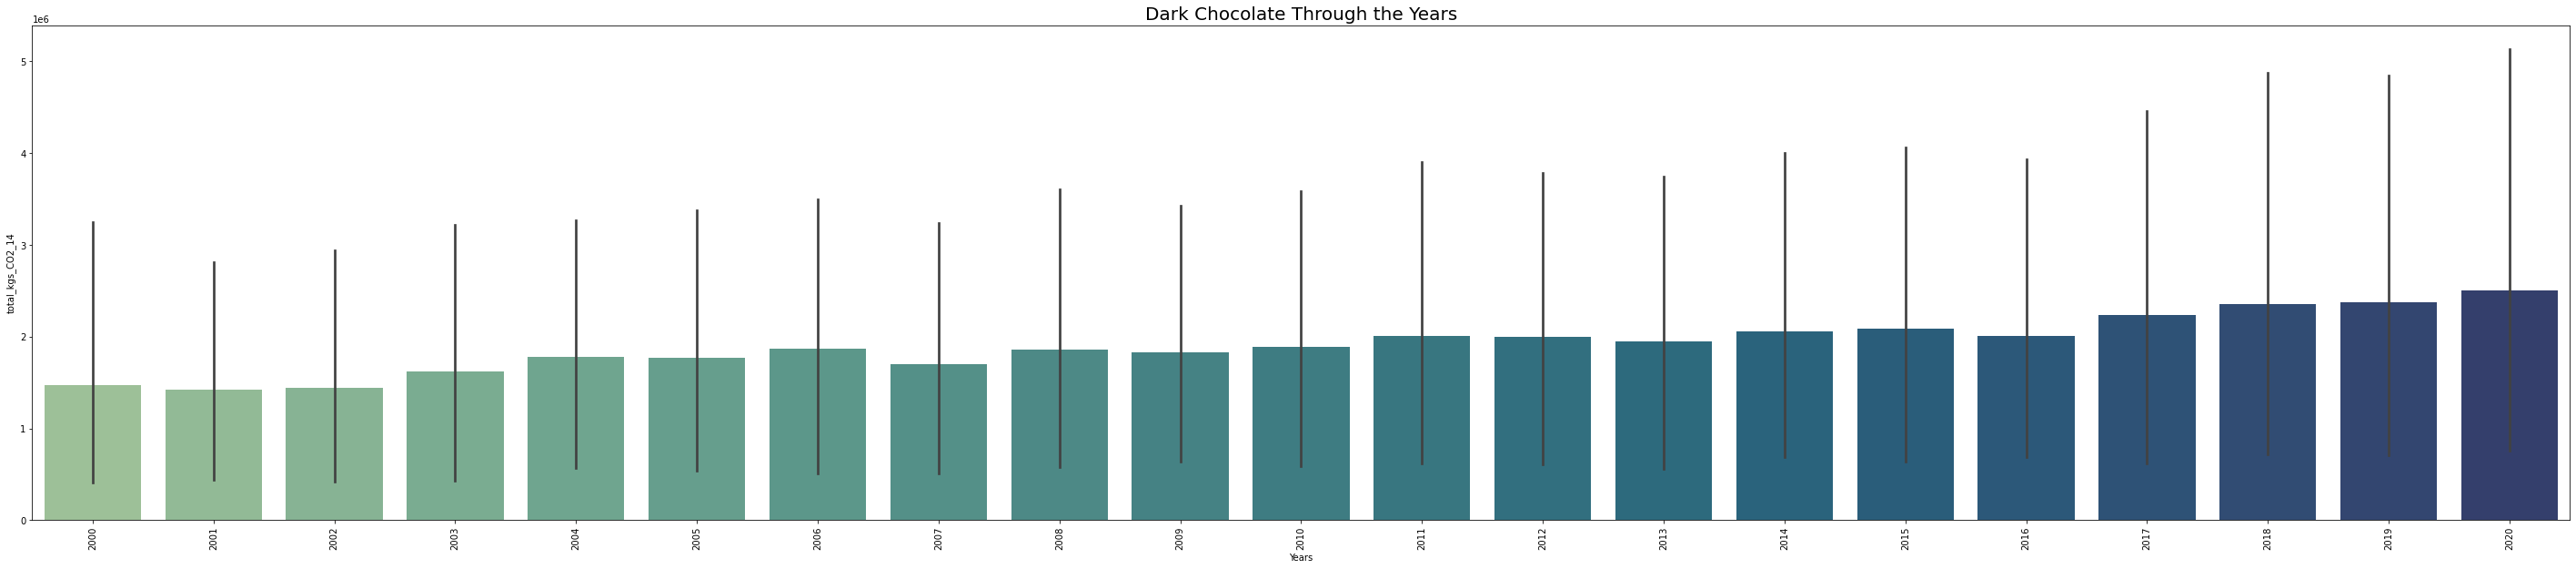

In [87]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = dark_chocolate['year_pc'], y = dark_chocolate['total_kgs_CO2_14'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_14', fontsize = 10)
ax.set_title(label = 'Dark Chocolate Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(dark_chocolate, dimensions=["year_pc", "total_kgs_CO2_14", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Eggs


In [89]:
eggs= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_15', 'food_product_categories_15', 'production_tonnes_15', 'total_kgs_CO2_15']]
eggs.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_15 food_product_categories_15  production_tonnes_15  \
0                15                       Eggs               15010.0   
1                15                       Eggs               13100.0   
2                15                       Eggs               16730.0   
3                15                       Eggs               16371.0   
4                15                       Eggs               17400.0   

   total_kgs_CO2_15  
0         326617.60  
1         285056.00  
2         364044.80  
3         356232.96  
4         378624.00

In [111]:
eggs.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_15  production_tonnes_15  total_kgs_CO2_15  
count            4201.0          4.201000e+03      4.201000e+03  
mean               15.0          3.533023e+05      7.688093e+06  
std                 0.0          2.035881e+06      4.430101e+07  
min                15.0          0.000000e+00      0.000000e+00  
25%                15.0          2.789000e+03      6.068864e+04  
50%                15.0          2.850000e+04      6.201600e+05  
75%                15.0          1.232980e+05      2.682964e+06  
max                15.0          3.466000e+07      7.546368e+08

In [112]:
eggs_total = eggs['total_kgs_CO2_15'].sum()

print (eggs_total)

32297678012.174


In [113]:
eggs[["area", "year_pc", "total_kgs_CO2_15" ]]

area  year_pc  total_kgs_CO2_15
0        Afghanistan     2000         326617.60
1        Afghanistan     2001         285056.00
2        Afghanistan     2002         364044.80
3        Afghanistan     2003         356232.96
4        Afghanistan     2004         378624.00
...              ...      ...               ...
4196  Sudan (former)     2007         674560.00
4197  Sudan (former)     2008         696320.00
4198  Sudan (former)     2009         696320.00
4199  Sudan (former)     2010         761600.00
4200  Sudan (former)     2011         826880.00

[4201 rows x 3 columns]

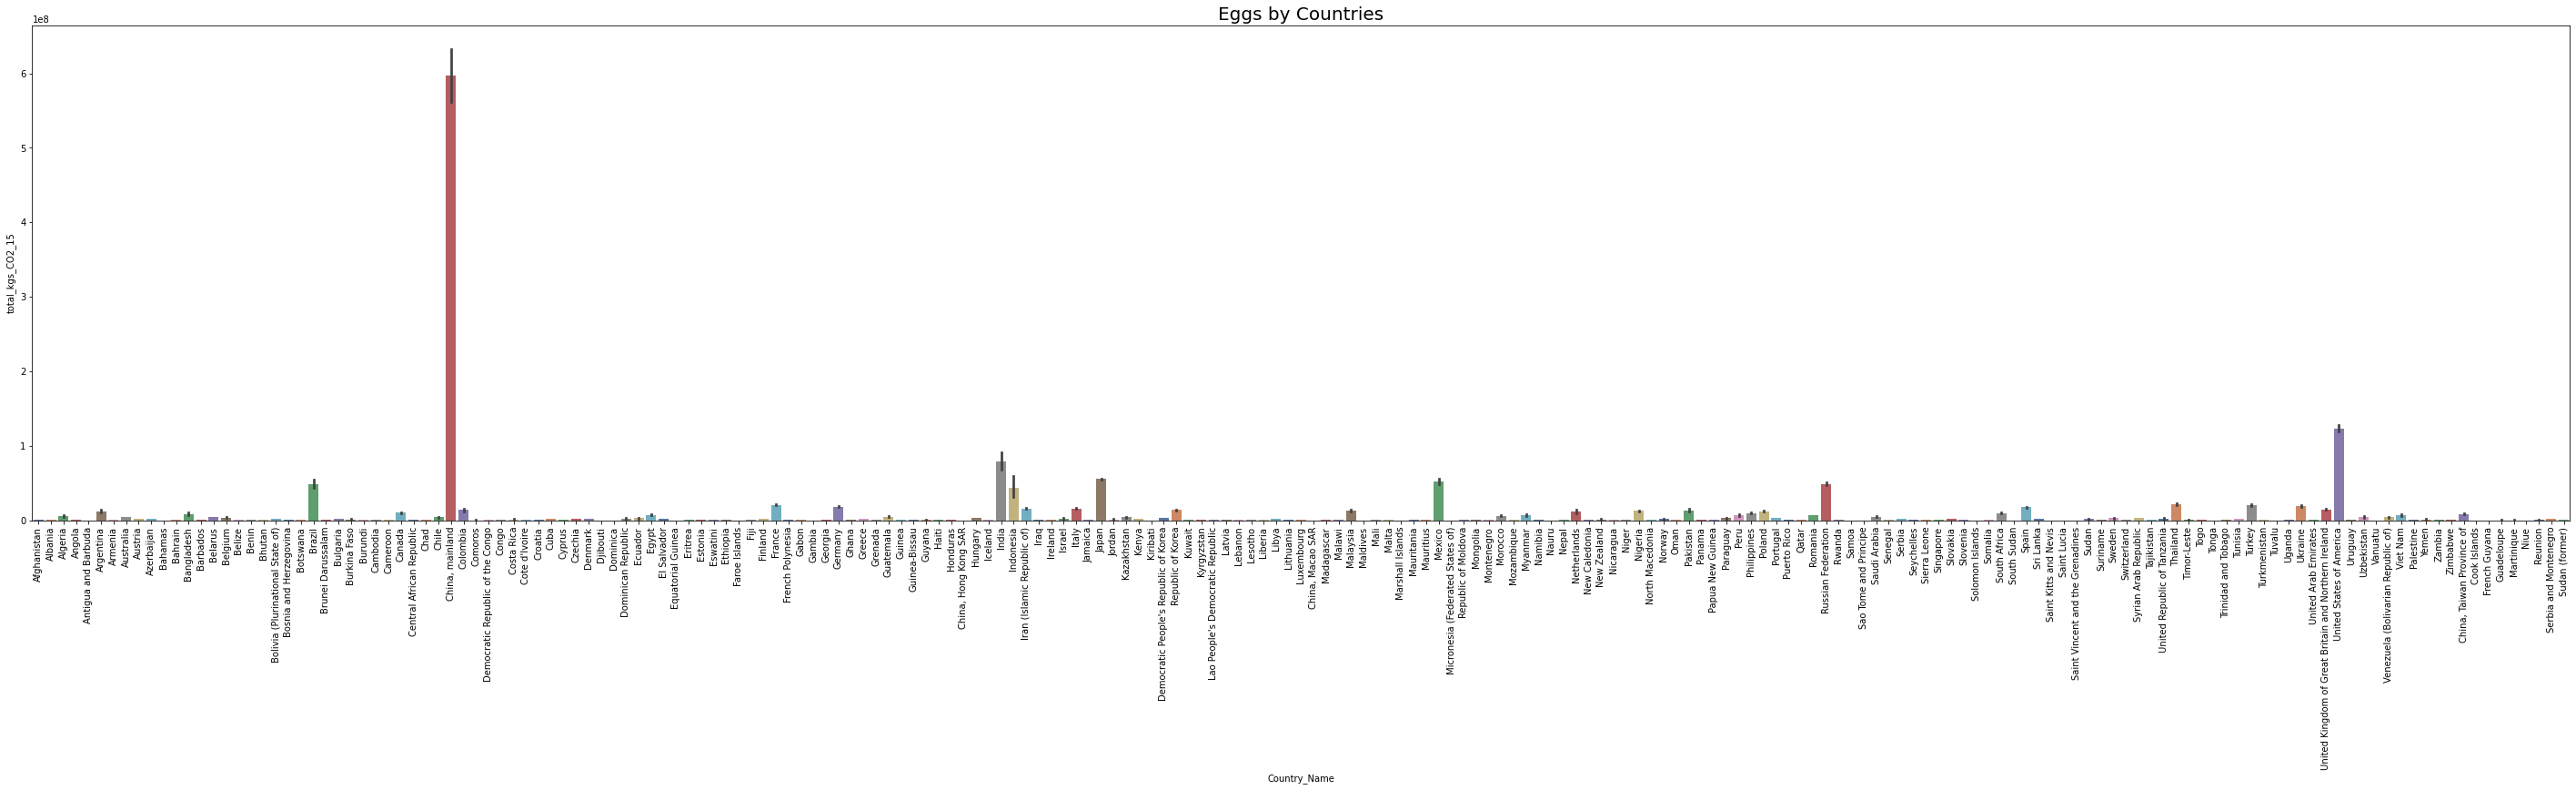

In [92]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = eggs['area'], y = eggs['total_kgs_CO2_15'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_15', fontsize = 10)
ax.set_title(label = 'Eggs by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

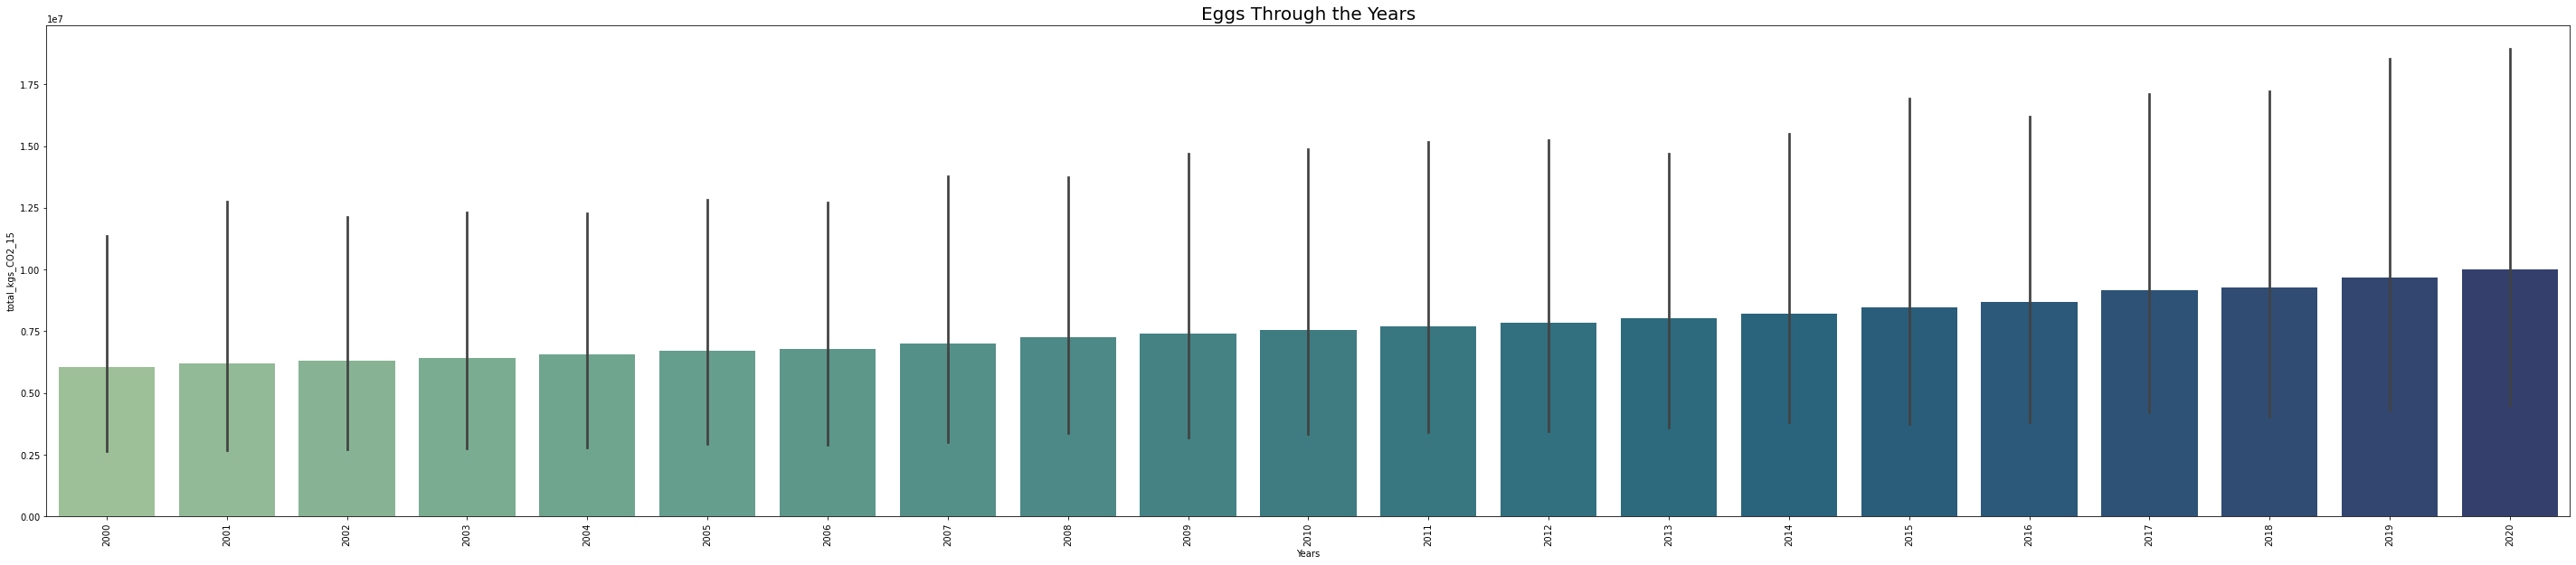

In [91]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = eggs['year_pc'], y = eggs['total_kgs_CO2_15'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_15', fontsize = 10)
ax.set_title(label = 'Eggs Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(eggs, dimensions=["year_pc", "total_kgs_CO2_15", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Groundnuts


In [94]:
groundnuts= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_17', 'food_product_categories_17', 'production_tonnes_17', 'total_kgs_CO2_17']]
groundnuts.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_17 food_product_categories_17  production_tonnes_17  \
0                17                 Groundnuts                   0.0   
1                17                 Groundnuts                   0.0   
2                17                 Groundnuts                   0.0   
3                17                 Groundnuts                   0.0   
4                17                 Groundnuts                   0.0   

   total_kgs_CO2_17  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [118]:
groundnuts.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_17  production_tonnes_17  total_kgs_CO2_17  
count            4201.0          4.201000e+03      4.201000e+03  
mean               17.0          2.339391e+05      3.308610e+06  
std                 0.0          1.418019e+06      2.005955e+07  
min                17.0          0.000000e+00      0.000000e+00  
25%                17.0          0.000000e+00      0.000000e+00  
50%                17.0          1.088040e+03      1.538489e+04  
75%                17.0          2.898000e+04      4.097772e+05  
max                17.0          1.990000e+07      2.812828e+08

In [119]:
groundnuts_total = groundnuts['total_kgs_CO2_17'].sum()

print (groundnuts_total)

13899472531.765799


In [120]:
groundnuts[["area", "year_pc", "total_kgs_CO2_17" ]]

area  year_pc  total_kgs_CO2_17
0        Afghanistan     2000      0.000000e+00
1        Afghanistan     2001      0.000000e+00
2        Afghanistan     2002      0.000000e+00
3        Afghanistan     2003      0.000000e+00
4        Afghanistan     2004      0.000000e+00
...              ...      ...               ...
4196  Sudan (former)     2007      8.452557e+06
4197  Sudan (former)     2008      1.073215e+07
4198  Sudan (former)     2009      1.429054e+07
4199  Sudan (former)     2010      1.142614e+07
4200  Sudan (former)     2011      1.816699e+07

[4201 rows x 3 columns]

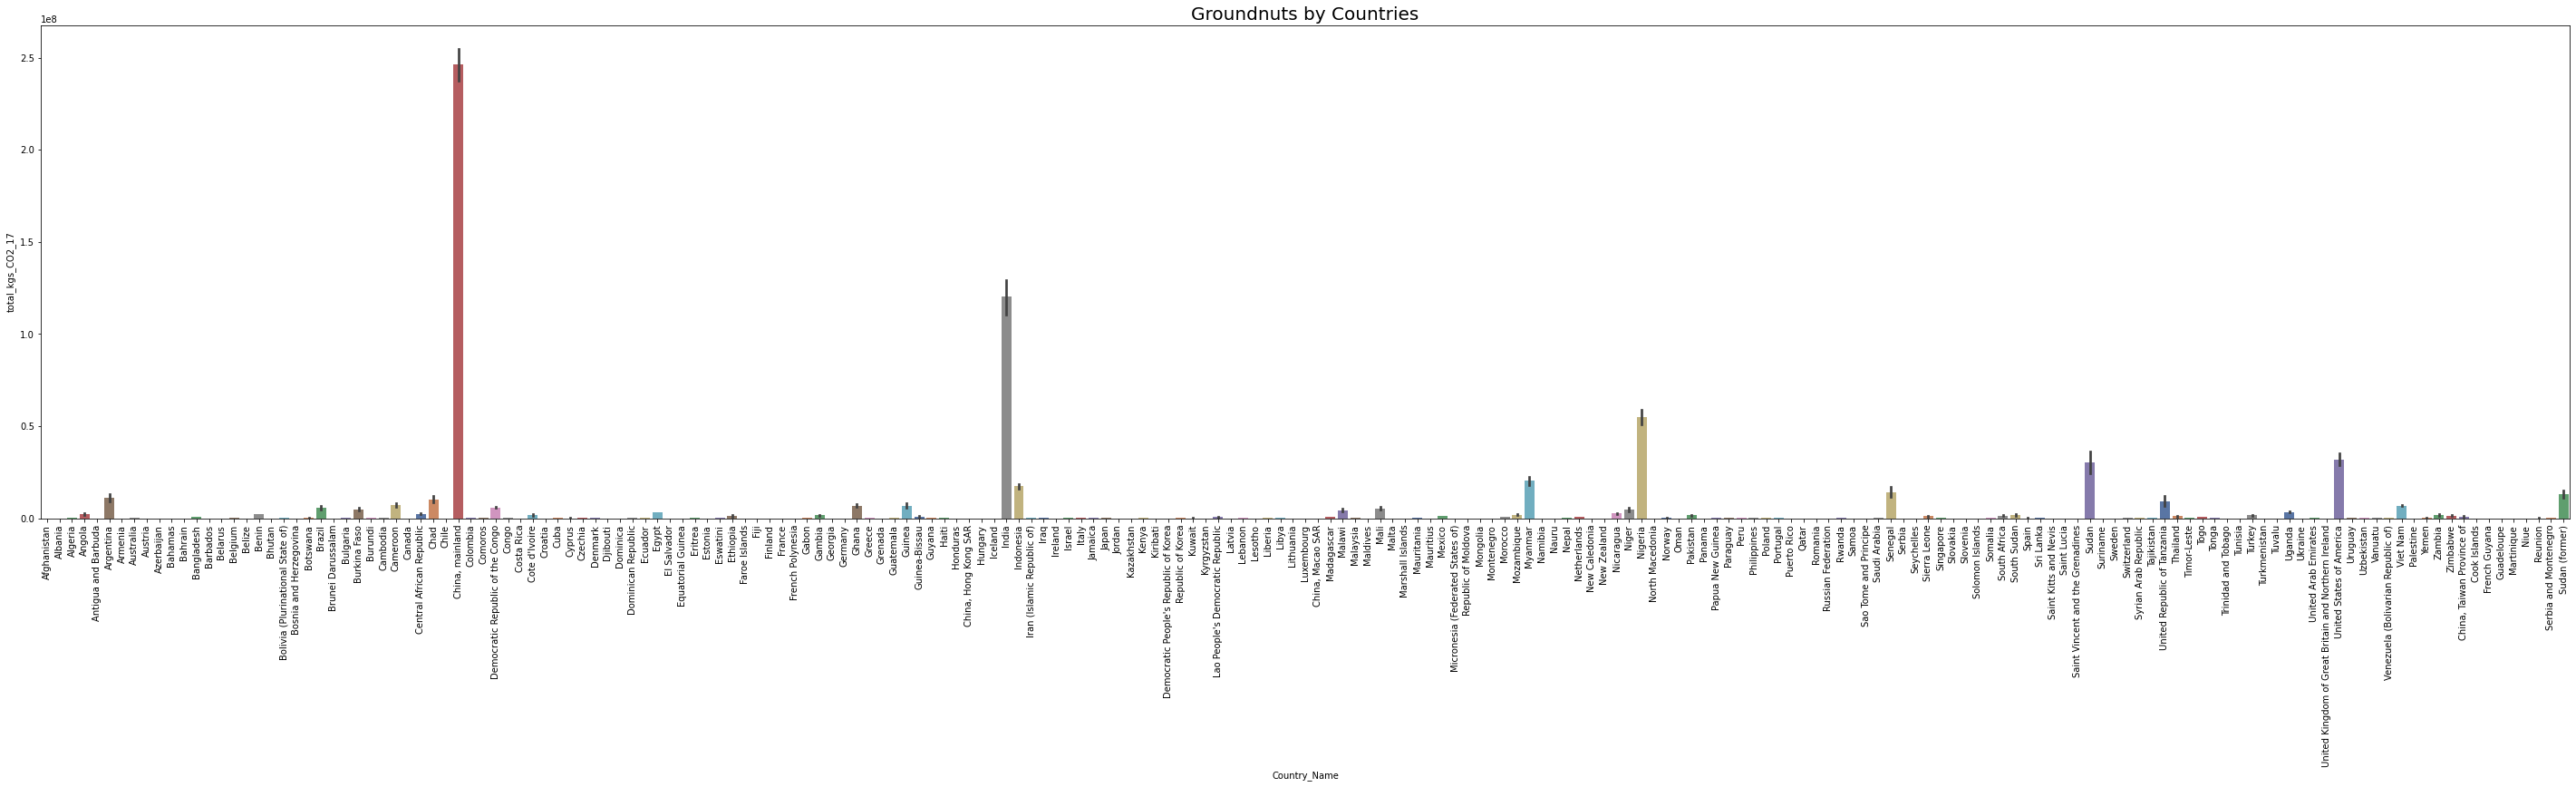

In [95]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = groundnuts['area'], y = groundnuts['total_kgs_CO2_17'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_17', fontsize = 10)
ax.set_title(label = 'Groundnuts by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

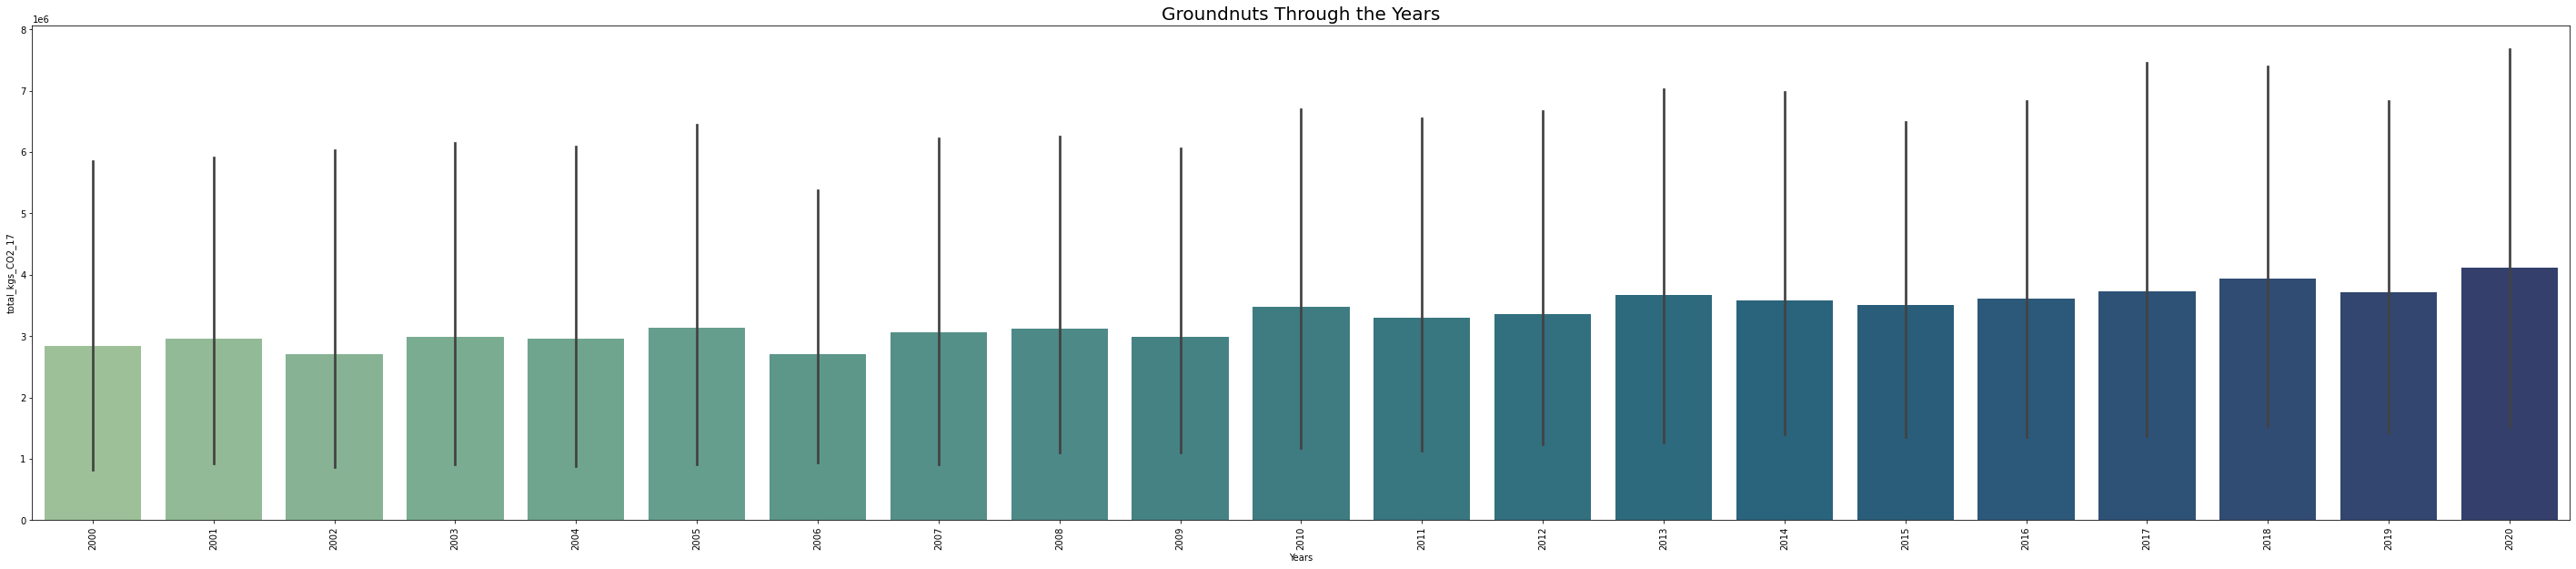

In [96]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = groundnuts['year_pc'], y = groundnuts['total_kgs_CO2_17'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_17', fontsize = 10)
ax.set_title(label = 'Groundnuts Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(groundnuts, dimensions=["year_pc", "total_kgs_CO2_17", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Lamb & Mutton


In [98]:
lamb_mutton= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_18', 'food_product_categories_18', 'production_tonnes_18', 'total_kgs_CO2_18']]
lamb_mutton.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_18 food_product_categories_18  production_tonnes_18  \
0                18              Lamb & Mutton             153266.67   
1                18              Lamb & Mutton             143183.33   
2                18              Lamb & Mutton              90750.00   
3                18              Lamb & Mutton              92766.67   
4                18              Lamb & Mutton             102850.00   

   total_kgs_CO2_18  
0      1.488679e+07  
1      1.390740e+07  
2      8.814548e+06  
3      9.010427e+06  
4      9.989820e+06

In [125]:
lamb_mutton.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_18  production_tonnes_18  total_kgs_CO2_18  
count            4201.0          4.201000e+03      4.201000e+03  
mean               18.0          5.272579e+04      5.120785e+06  
std                 0.0          2.004987e+05      1.946988e+07  
min                18.0          0.000000e+00      0.000000e+00  
25%                18.0          1.129100e+02      1.096695e+04  
50%                18.0          3.045000e+03      2.957608e+05  
75%                18.0          3.014834e+04      2.928308e+06  
max                18.0          3.119766e+06      3.031005e+08

In [126]:
lamb_mutton_total = lamb_mutton['total_kgs_CO2_18'].sum()

print (lamb_mutton_total)

21512418902.4056


In [127]:
lamb_mutton[["area", "year_pc", "total_kgs_CO2_18" ]]

area  year_pc  total_kgs_CO2_18
0        Afghanistan     2000      1.488679e+07
1        Afghanistan     2001      1.390740e+07
2        Afghanistan     2002      8.814548e+06
3        Afghanistan     2003      9.010427e+06
4        Afghanistan     2004      9.989820e+06
...              ...      ...               ...
4196  Sudan (former)     2007      4.033760e+07
4197  Sudan (former)     2008      4.373754e+07
4198  Sudan (former)     2009      4.123314e+07
4199  Sudan (former)     2010      4.257771e+07
4200  Sudan (former)     2011      4.329210e+07

[4201 rows x 3 columns]

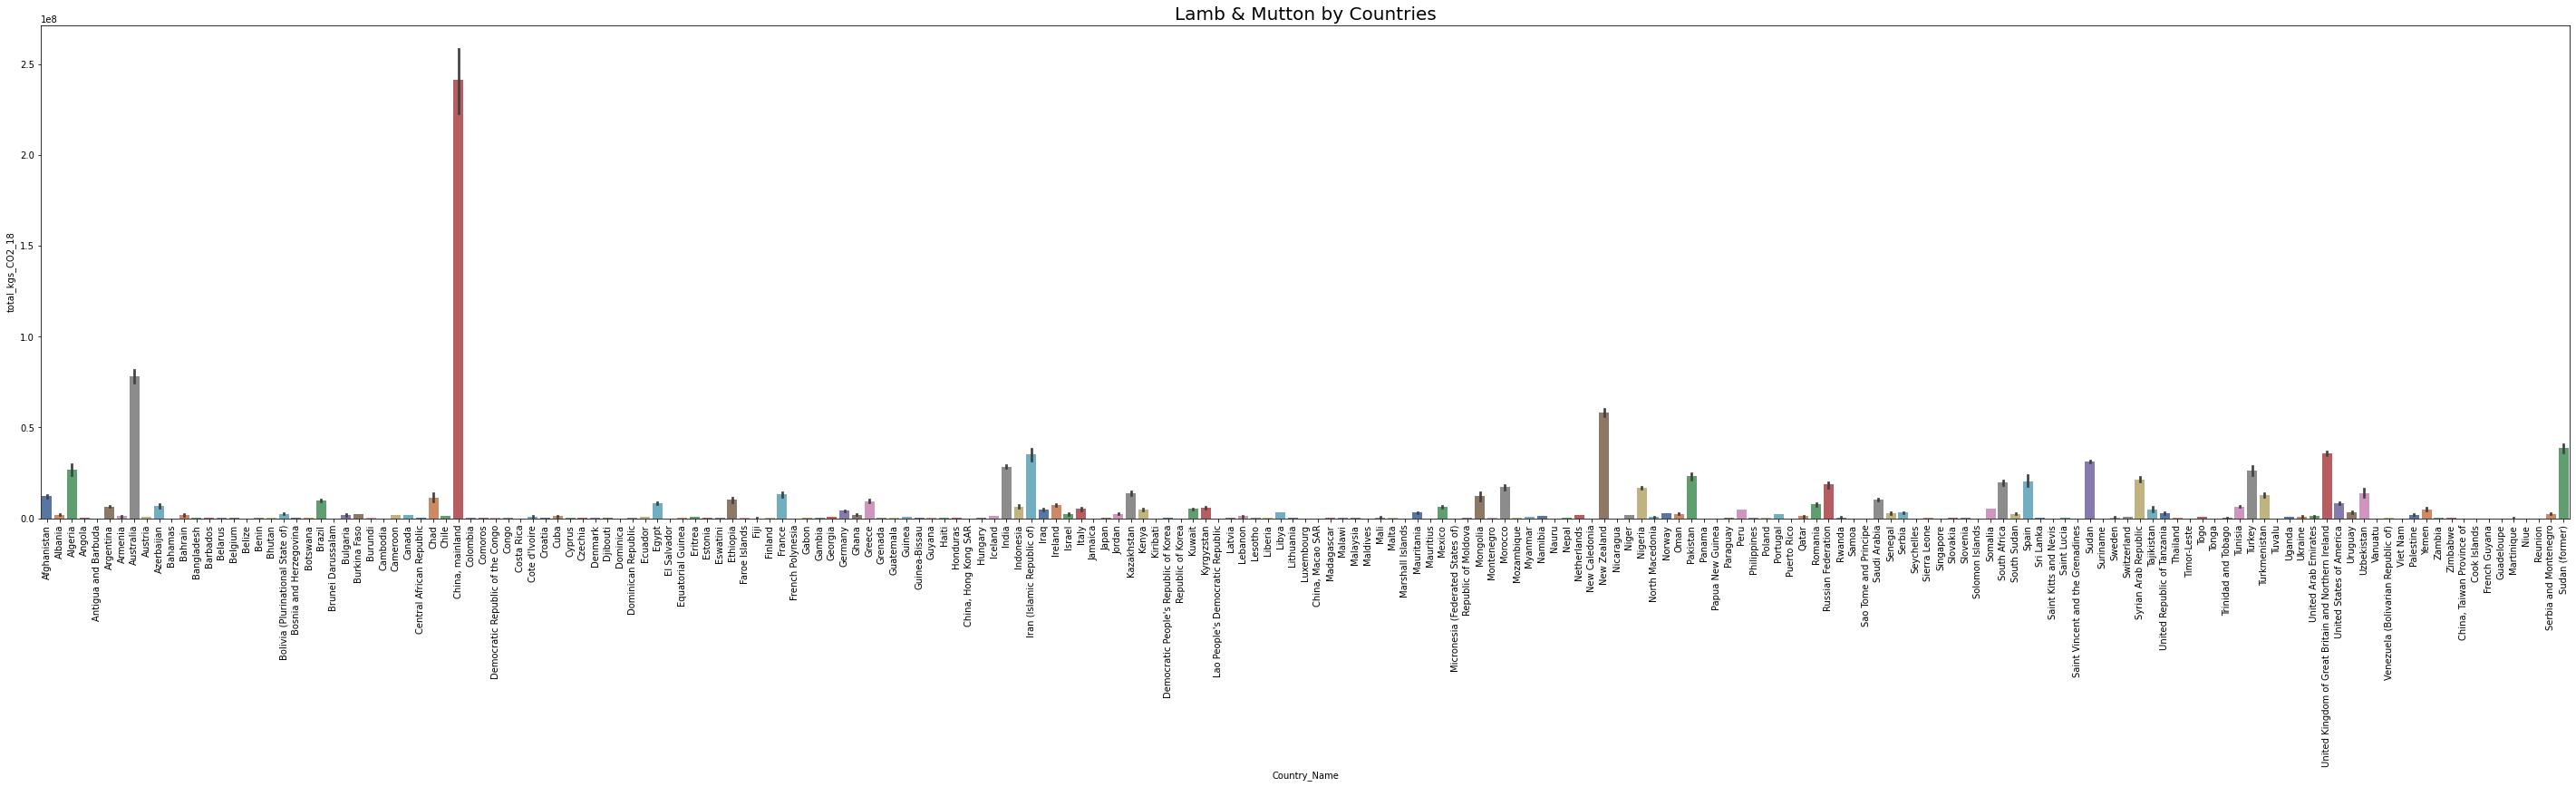

In [99]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = lamb_mutton['area'], y = lamb_mutton['total_kgs_CO2_18'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_18', fontsize = 10)
ax.set_title(label = 'Lamb & Mutton by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

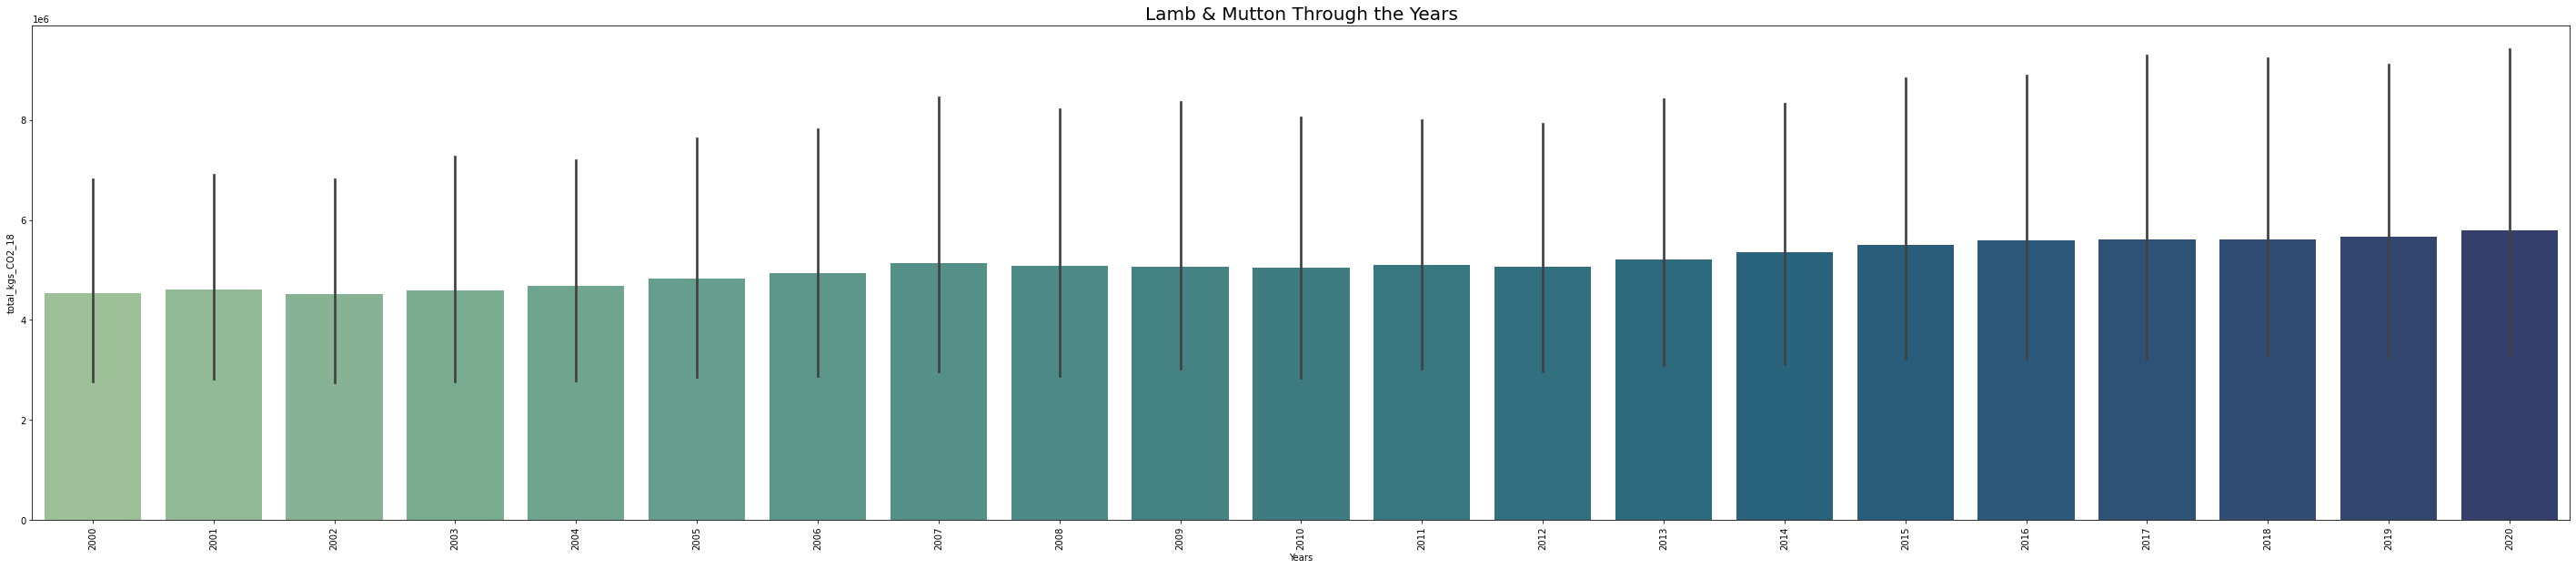

In [100]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = lamb_mutton['year_pc'], y = lamb_mutton['total_kgs_CO2_18'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_18', fontsize = 10)
ax.set_title(label = 'Lamb & Mutton Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(lamb_mutton, dimensions=["year_pc", "total_kgs_CO2_18", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Maize (Meal)


In [102]:
maize= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_19', 'food_product_categories_19', 'production_tonnes_19', 'total_kgs_CO2_19']]
maize.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_19 food_product_categories_19  production_tonnes_19  \
0                19               Maize (Meal)              115000.0   
1                19               Maize (Meal)              160000.0   
2                19               Maize (Meal)              298000.0   
3                19               Maize (Meal)              210000.0   
4                19               Maize (Meal)              400000.0   

   total_kgs_CO2_19  
0          463450.0  
1          644800.0  
2         1200940.0  
3          846300.0  
4         1612000.0

In [132]:
maize.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_19  production_tonnes_19  total_kgs_CO2_19  
count            4201.0          4.201000e+03      4.201000e+03  
mean               19.0          4.461404e+06      1.798030e+07  
std                 0.0          2.715049e+07      1.094290e+08  
min                19.0          0.000000e+00      0.000000e+00  
25%                19.0          1.500000e+03      6.045000e+03  
50%                19.0          1.310000e+05      5.279300e+05  
75%                19.0          1.250000e+06      5.035441e+06  
max                19.0          4.168300e+08      1.680889e+09

In [134]:
maize_total = maize['total_kgs_CO2_19'].sum()

print (maize_total)

75535236409.263


In [133]:
maize[["area", "year_pc", "total_kgs_CO2_19" ]]

area  year_pc  total_kgs_CO2_19
0        Afghanistan     2000          463450.0
1        Afghanistan     2001          644800.0
2        Afghanistan     2002         1200940.0
3        Afghanistan     2003          846300.0
4        Afghanistan     2004         1612000.0
...              ...      ...               ...
4196  Sudan (former)     2007          282100.0
4197  Sudan (former)     2008          249860.0
4198  Sudan (former)     2009          265980.0
4199  Sudan (former)     2010          141050.0
4200  Sudan (former)     2011          169260.0

[4201 rows x 3 columns]

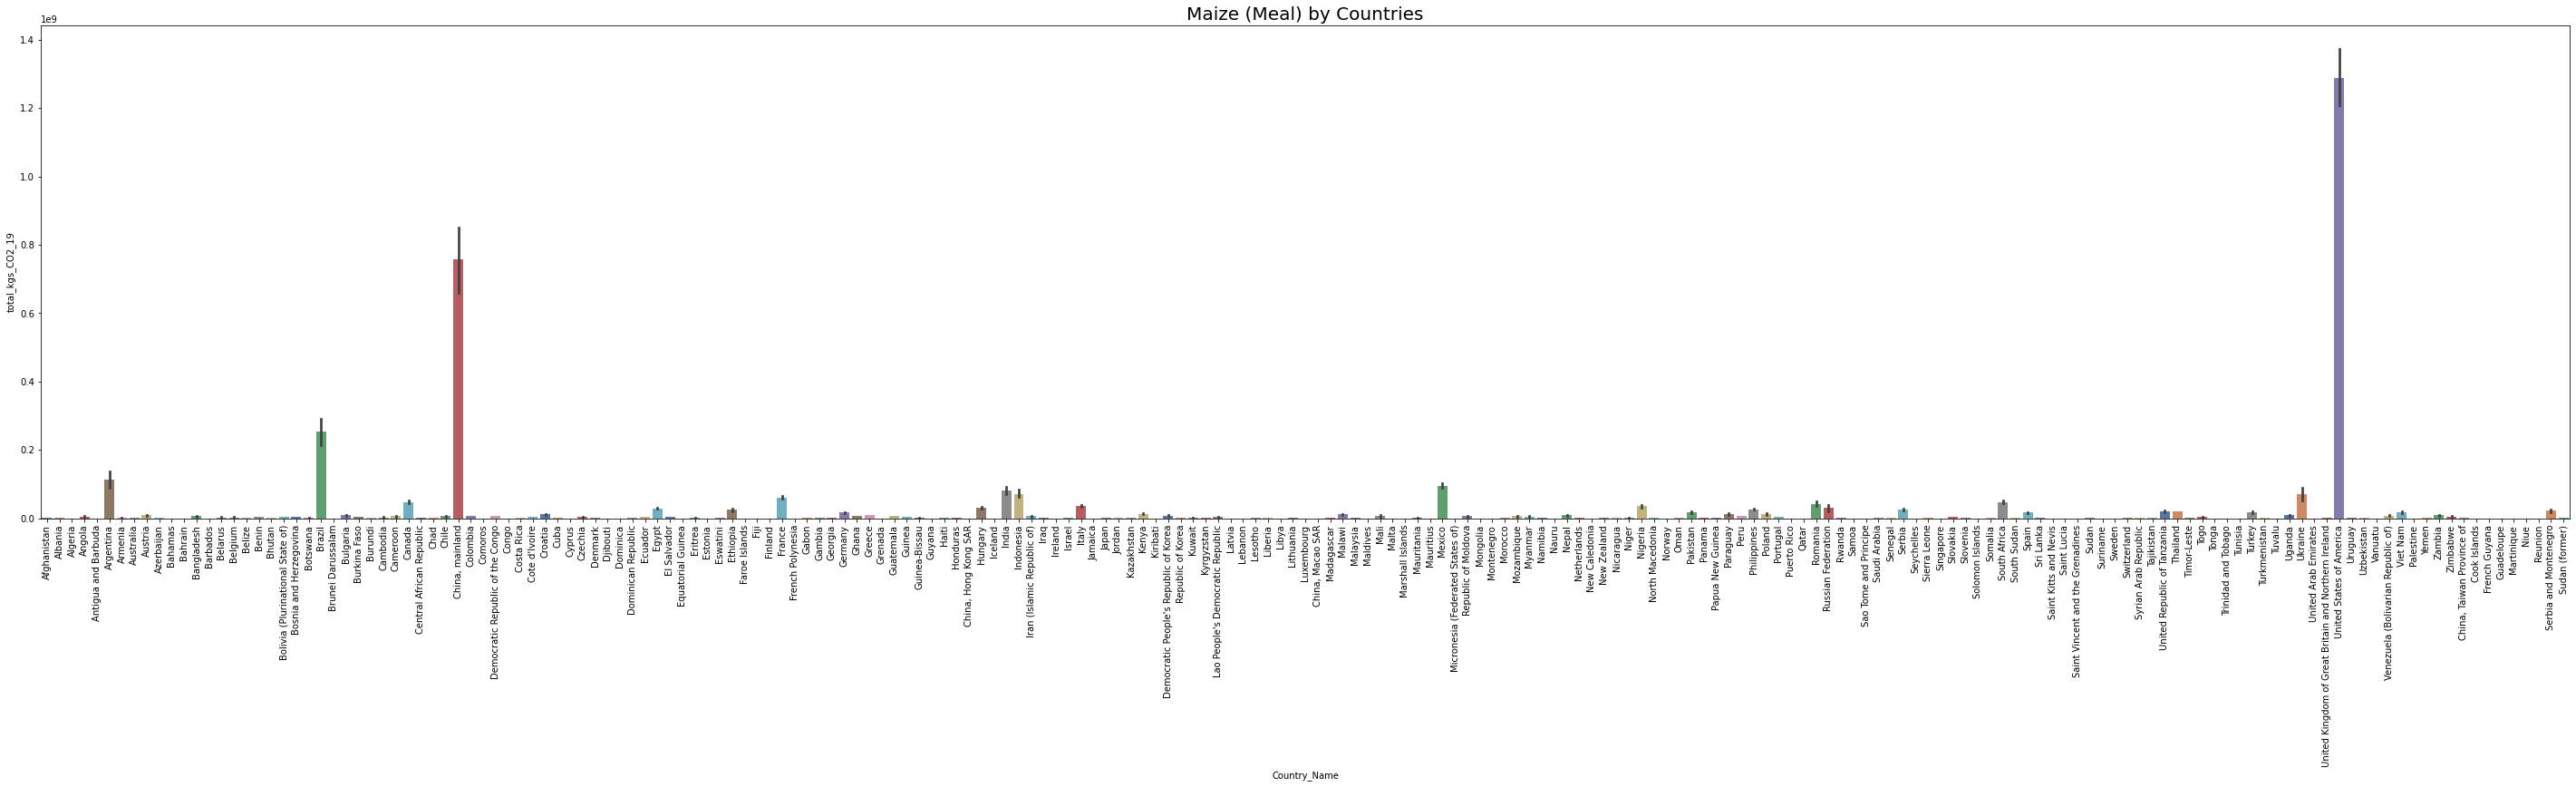

In [103]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = maize['area'], y = maize['total_kgs_CO2_19'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_19', fontsize = 10)
ax.set_title(label = 'Maize (Meal) by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

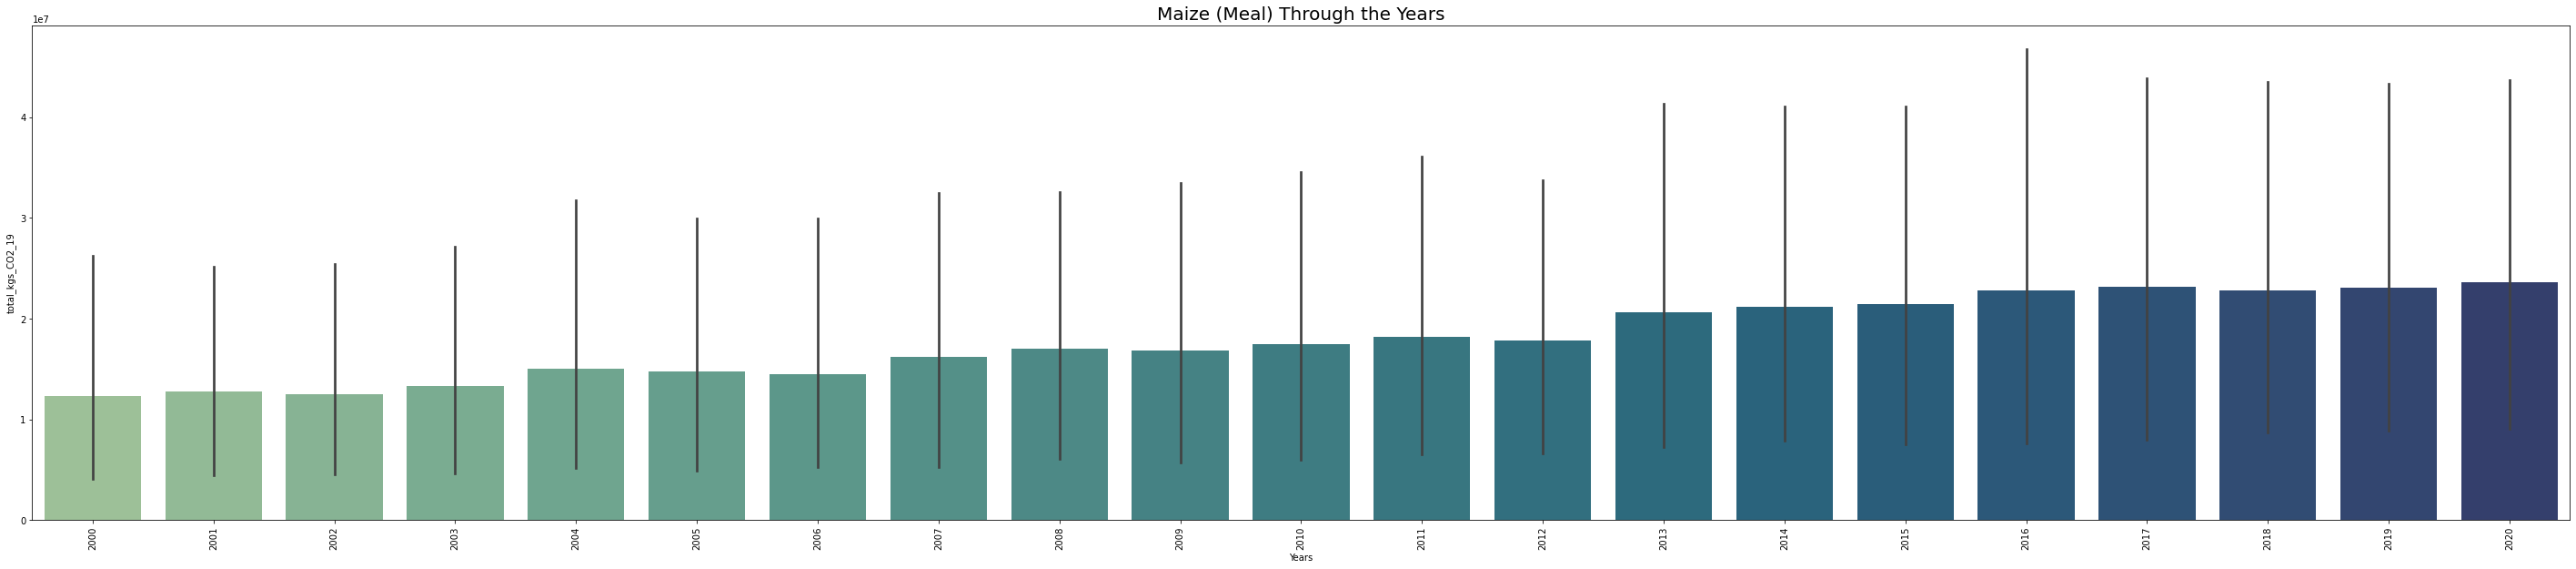

In [104]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = maize['year_pc'], y = maize['total_kgs_CO2_19'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_19', fontsize = 10)
ax.set_title(label = 'Maize (Meal) Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(maize, dimensions=["year_pc", "total_kgs_CO2_19", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Milk


In [106]:
milk= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_20', 'food_product_categories_20', 'production_tonnes_20', 'total_kgs_CO2_20']]
milk.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_20 food_product_categories_20  production_tonnes_20  \
0                20                       Milk            2179166.56   
1                20                       Milk            1427790.31   
2                20                       Milk            2499810.76   
3                20                       Milk            2324884.60   
4                20                       Milk            2398497.40   

   total_kgs_CO2_20  
0       23208123.86  
1       15205966.80  
2       26622984.59  
3       24760020.99  
4       25528022.31

In [139]:
milk.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_20  production_tonnes_20  total_kgs_CO2_20  
count            4201.0          4.201000e+03      4.201000e+03  
mean               20.0          3.927644e+06      4.182933e+07  
std                 0.0          1.119766e+07      1.192639e+08  
min                20.0          0.000000e+00      0.000000e+00  
25%                20.0          2.428017e+04      2.585838e+05  
50%                20.0          4.344062e+05      4.626425e+06  
75%                20.0          2.479639e+06      2.637688e+07  
max                20.0          1.239609e+08      1.323439e+09

In [140]:
milk_total = milk['total_kgs_CO2_20'].sum()

print (milk_total)

175724995855.2035


In [141]:
milk[["area", "year_pc", "total_kgs_CO2_20" ]]

area  year_pc  total_kgs_CO2_20
0        Afghanistan     2000       23208123.86
1        Afghanistan     2001       15205966.80
2        Afghanistan     2002       26622984.59
3        Afghanistan     2003       24760020.99
4        Afghanistan     2004       25528022.31
...              ...      ...               ...
4196  Sudan (former)     2007       81877839.00
4197  Sudan (former)     2008       82538139.00
4198  Sudan (former)     2009       83021744.85
4199  Sudan (former)     2010       83531464.50
4200  Sudan (former)     2011       82466464.50

[4201 rows x 3 columns]

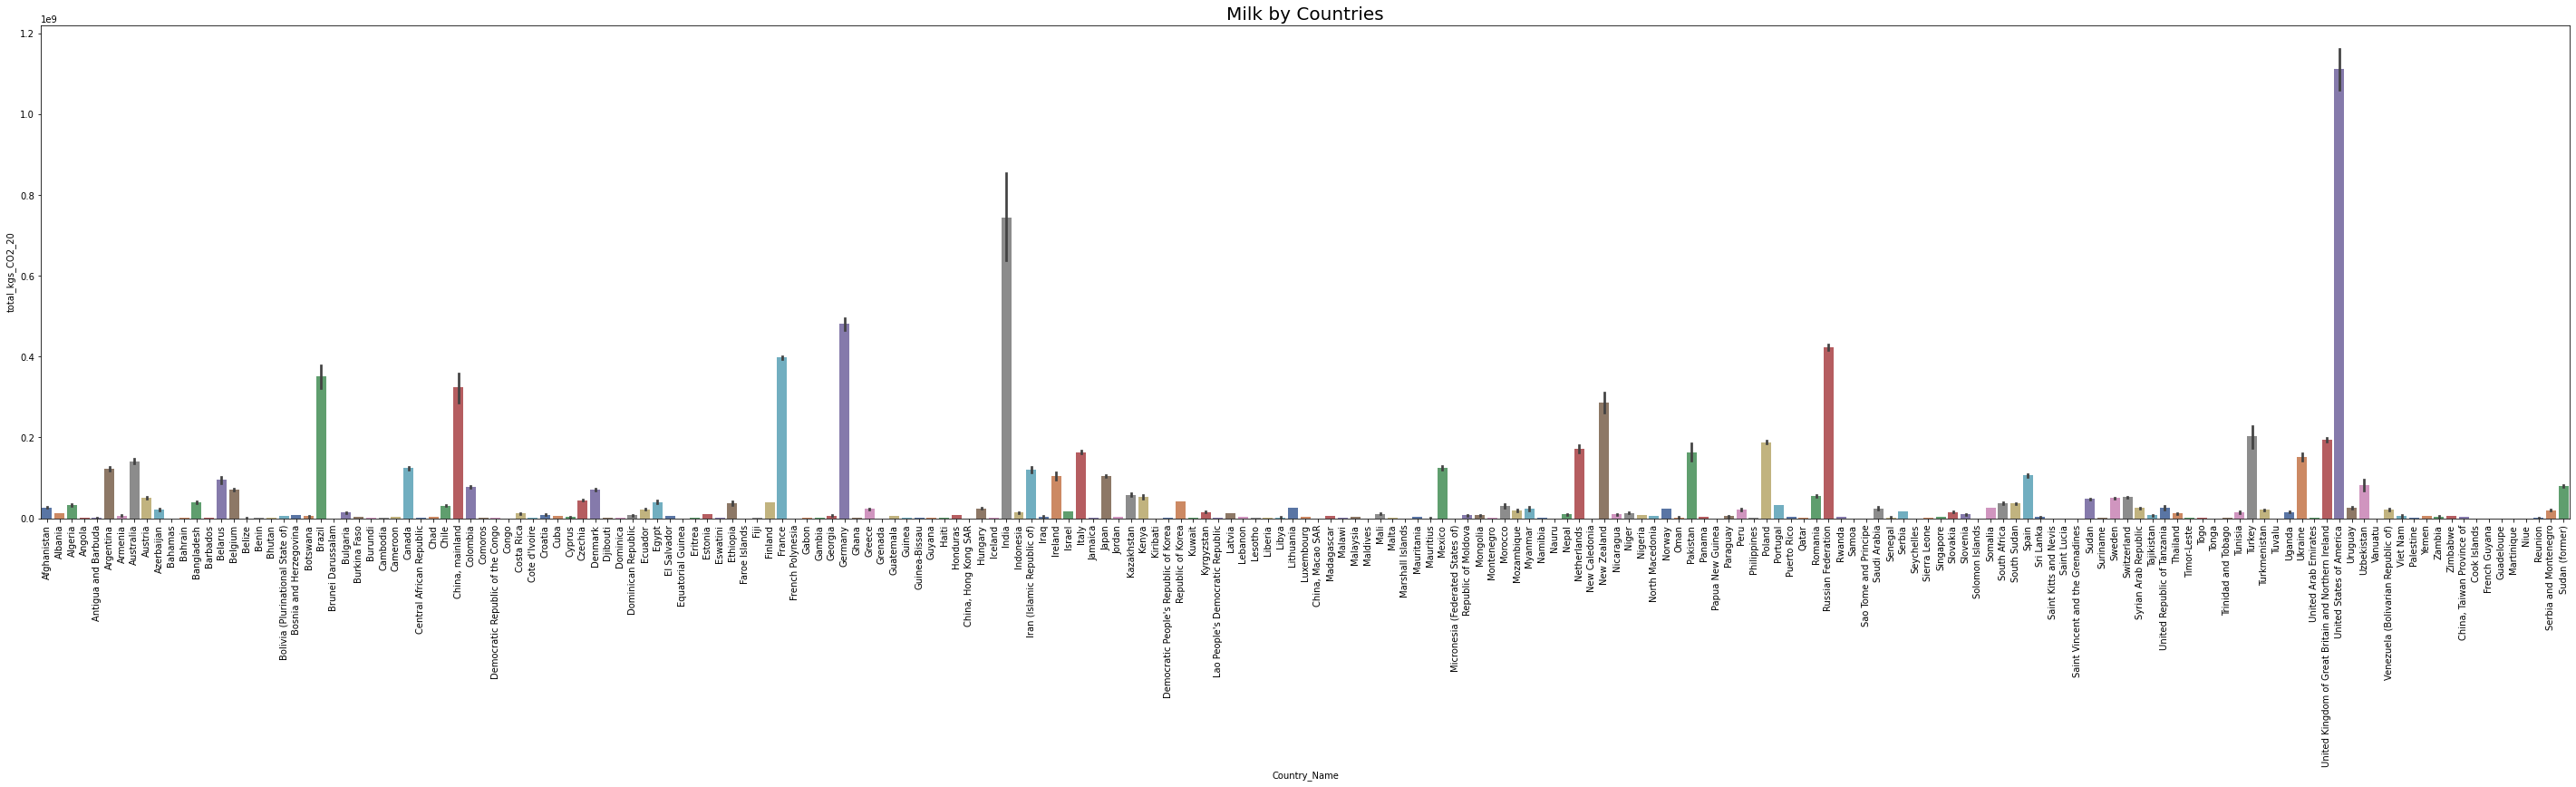

In [107]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = milk['area'], y = milk['total_kgs_CO2_20'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_20', fontsize = 10)
ax.set_title(label = 'Milk by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

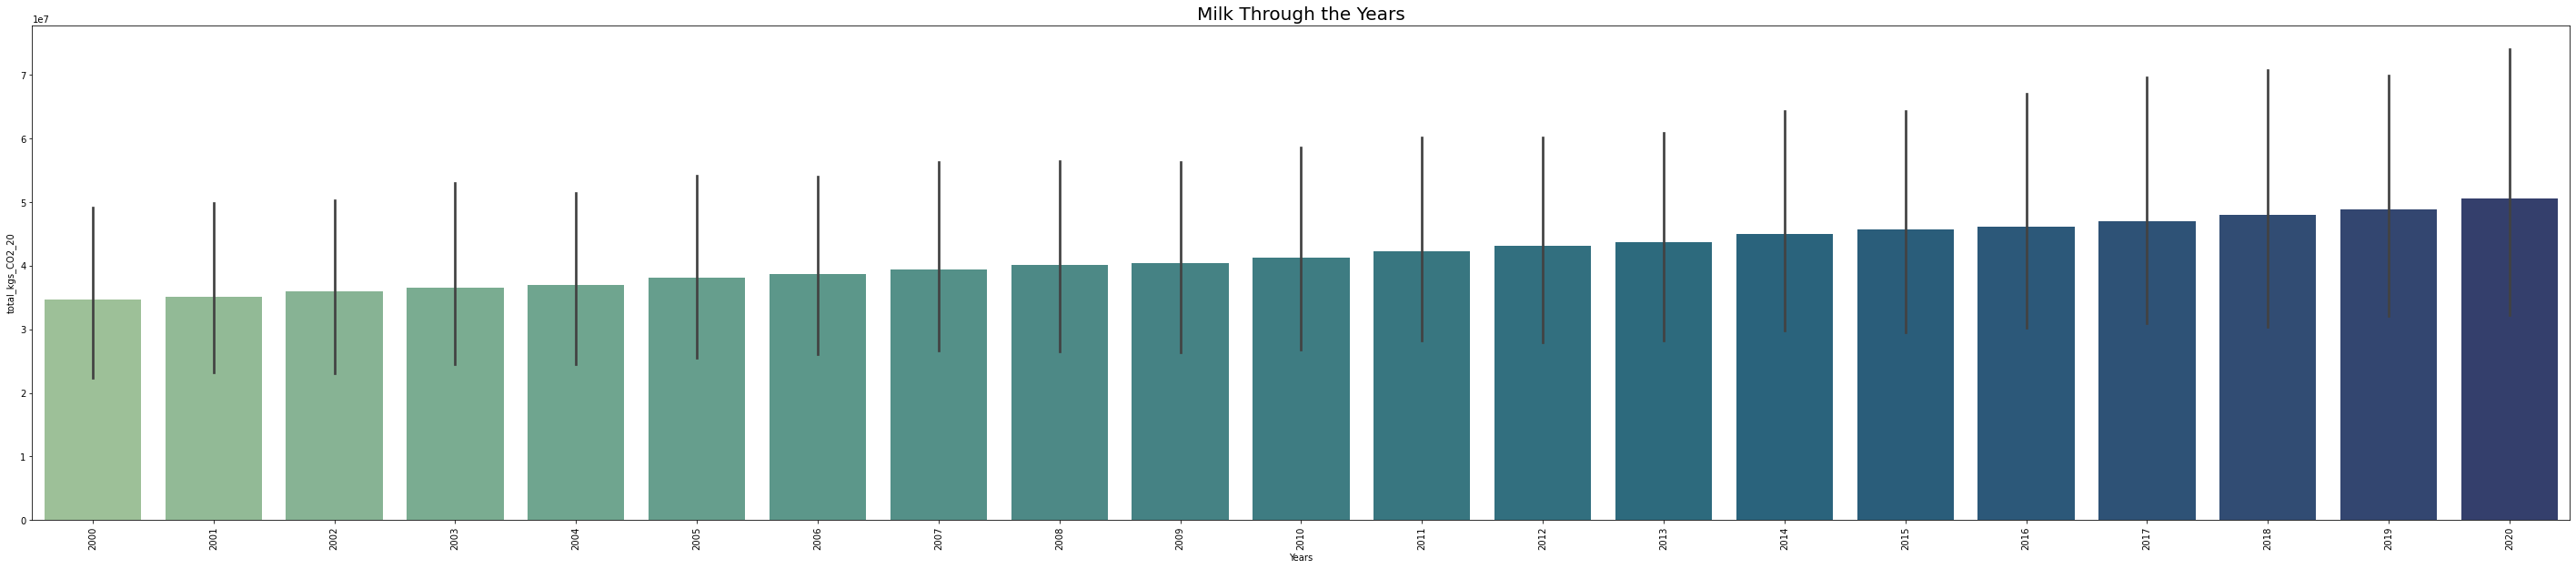

In [108]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = milk['year_pc'], y = milk['total_kgs_CO2_20'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_20', fontsize = 10)
ax.set_title(label = 'Milk Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(milk, dimensions=["year_pc", "total_kgs_CO2_20", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Nuts


In [110]:
nuts= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_21', 'food_product_categories_21', 'production_tonnes_21', 'total_kgs_CO2_21']]
nuts.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_21 food_product_categories_21  production_tonnes_21  \
0                21                       Nuts              20800.00   
1                21                       Nuts              23800.00   
2                21                       Nuts              20573.99   
3                21                       Nuts              20900.00   
4                21                       Nuts              21945.00   

   total_kgs_CO2_21  
0       398320.0000  
1       455770.0000  
2       393991.9085  
3       400235.0000  
4       420246.7500

In [146]:
nuts.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_21  production_tonnes_21  total_kgs_CO2_21  
count            4201.0          4.201000e+03      4.201000e+03  
mean               21.0          8.190014e+04      1.568479e+06  
std                 0.0          3.198606e+05      6.125974e+06  
min                21.0          0.000000e+00      0.000000e+00  
25%                21.0          0.000000e+00      0.000000e+00  
50%                21.0          1.330540e+03      2.547984e+04  
75%                21.0          3.010000e+04      5.764150e+05  
max                21.0          4.058151e+06      7.770657e+07

In [147]:
nuts_total = nuts['total_kgs_CO2_21'].sum()

print (nuts_total)

6589181061.9470005


In [149]:
nuts[["area", "year_pc", "total_kgs_CO2_21" ]]

area  year_pc  total_kgs_CO2_21
0        Afghanistan     2000       398320.0000
1        Afghanistan     2001       455770.0000
2        Afghanistan     2002       393991.9085
3        Afghanistan     2003       400235.0000
4        Afghanistan     2004       420246.7500
...              ...      ...               ...
4196  Sudan (former)     2007            0.0000
4197  Sudan (former)     2008            0.0000
4198  Sudan (former)     2009            0.0000
4199  Sudan (former)     2010            0.0000
4200  Sudan (former)     2011            0.0000

[4201 rows x 3 columns]

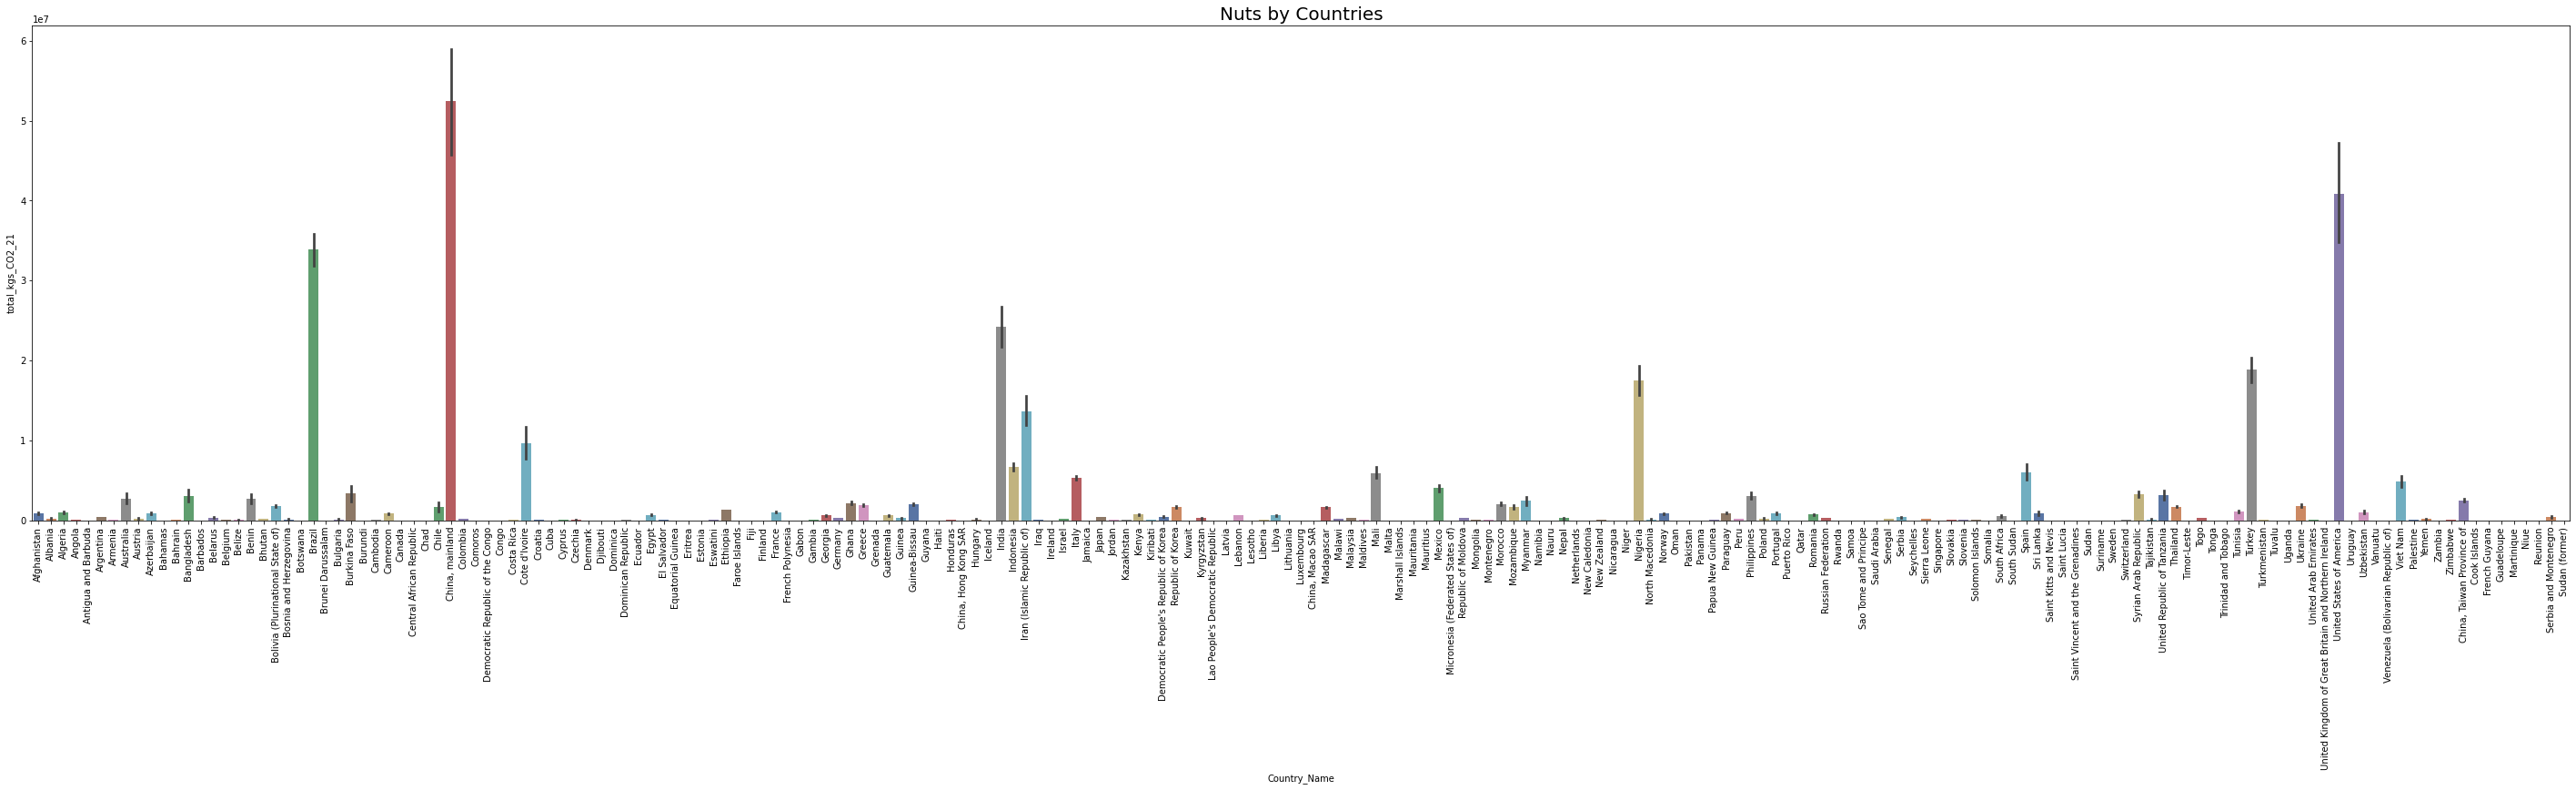

In [111]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = nuts['area'], y = nuts['total_kgs_CO2_21'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_21', fontsize = 10)
ax.set_title(label = 'Nuts by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

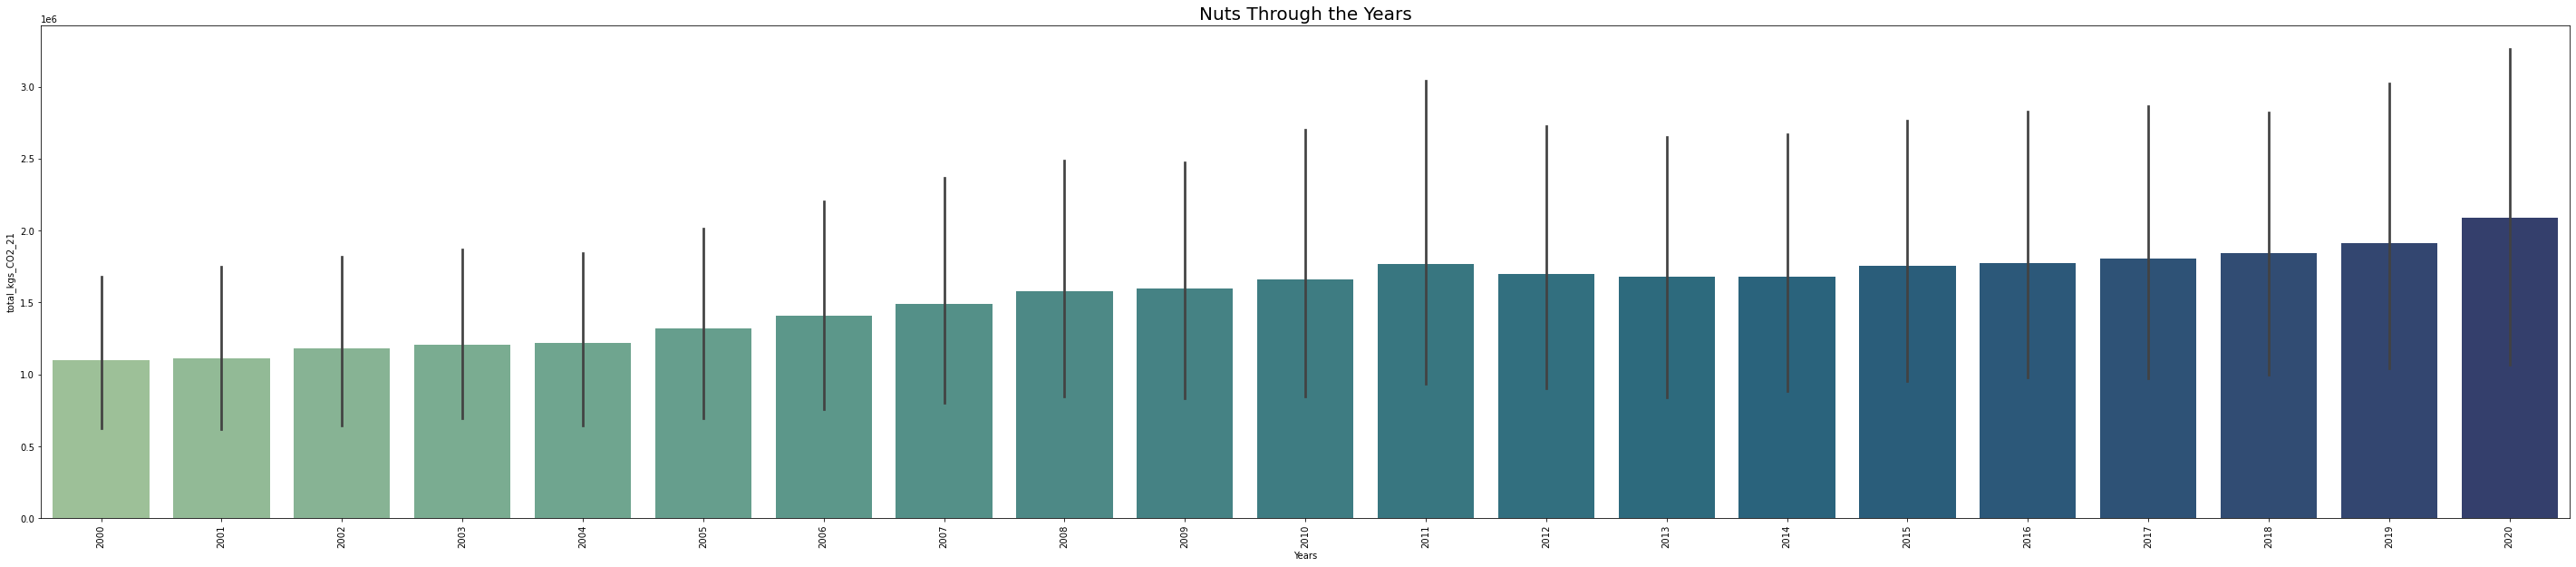

In [112]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = nuts['year_pc'], y = nuts['total_kgs_CO2_21'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_21', fontsize = 10)
ax.set_title(label = 'Nuts Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(nuts, dimensions=["year_pc", "total_kgs_CO2_21", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Oatmeal


In [114]:
oatmeal= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_22', 'food_product_categories_22', 'production_tonnes_22', 'total_kgs_CO2_22']]
oatmeal.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_22 food_product_categories_22  production_tonnes_22  \
0                22                    Oatmeal                   0.0   
1                22                    Oatmeal                   0.0   
2                22                    Oatmeal                   0.0   
3                22                    Oatmeal                   0.0   
4                22                    Oatmeal                   0.0   

   total_kgs_CO2_22  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [153]:
oatmeal.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_22  production_tonnes_22  total_kgs_CO2_22  
count            4201.0          4.201000e+03      4.201000e+03  
mean               22.0          1.203760e+05      1.351760e+06  
std                 0.0          4.914610e+05      5.518772e+06  
min                22.0          0.000000e+00      0.000000e+00  
25%                22.0          0.000000e+00      0.000000e+00  
50%                22.0          0.000000e+00      0.000000e+00  
75%                22.0          8.905000e+03      1.000031e+05  
max                22.0          7.720000e+06      8.668117e+07

In [154]:
oatmeal_total = oatmeal['total_kgs_CO2_22'].sum()

print (oatmeal_total)

5678743099.041699


In [155]:
oatmeal[["area", "year_pc", "total_kgs_CO2_22" ]]

area  year_pc  total_kgs_CO2_22
0        Afghanistan     2000               0.0
1        Afghanistan     2001               0.0
2        Afghanistan     2002               0.0
3        Afghanistan     2003               0.0
4        Afghanistan     2004               0.0
...              ...      ...               ...
4196  Sudan (former)     2007               0.0
4197  Sudan (former)     2008               0.0
4198  Sudan (former)     2009               0.0
4199  Sudan (former)     2010               0.0
4200  Sudan (former)     2011               0.0

[4201 rows x 3 columns]

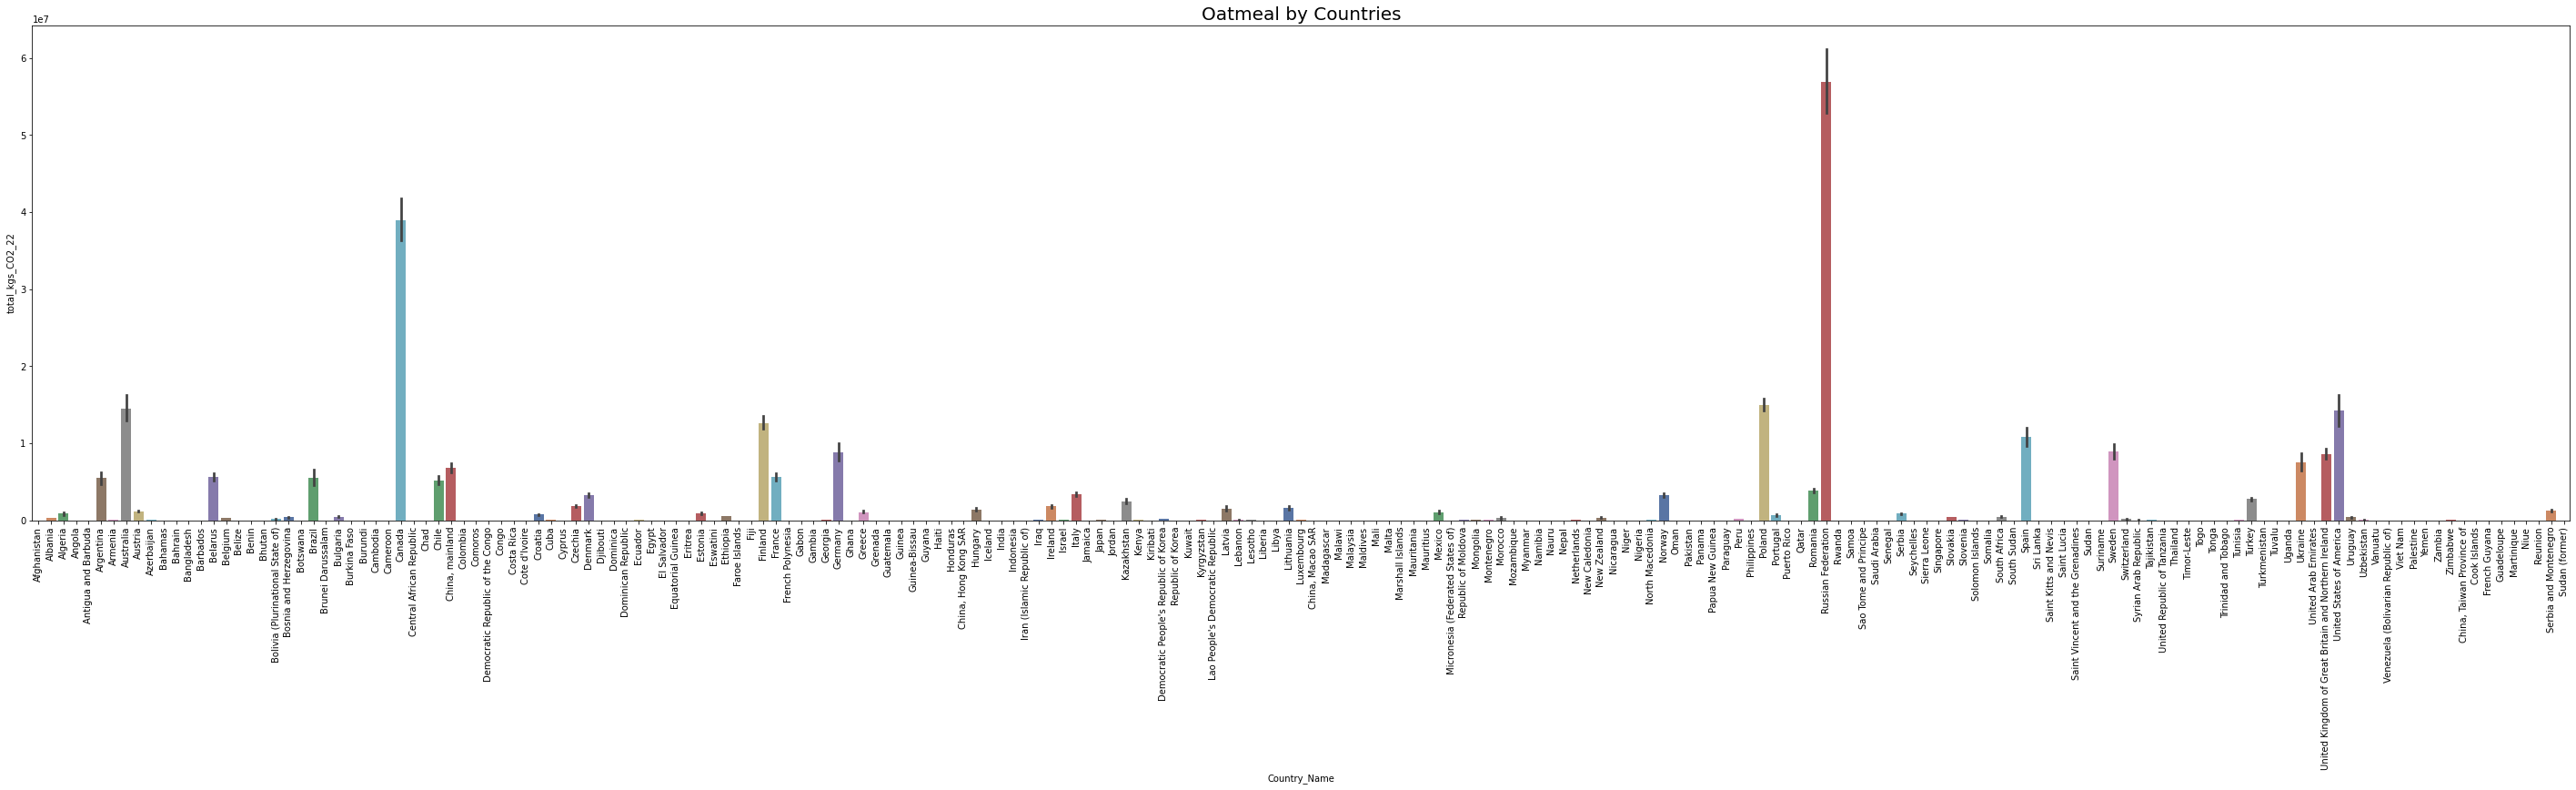

In [115]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = oatmeal['area'], y = oatmeal['total_kgs_CO2_22'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_22', fontsize = 10)
ax.set_title(label = 'Oatmeal by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

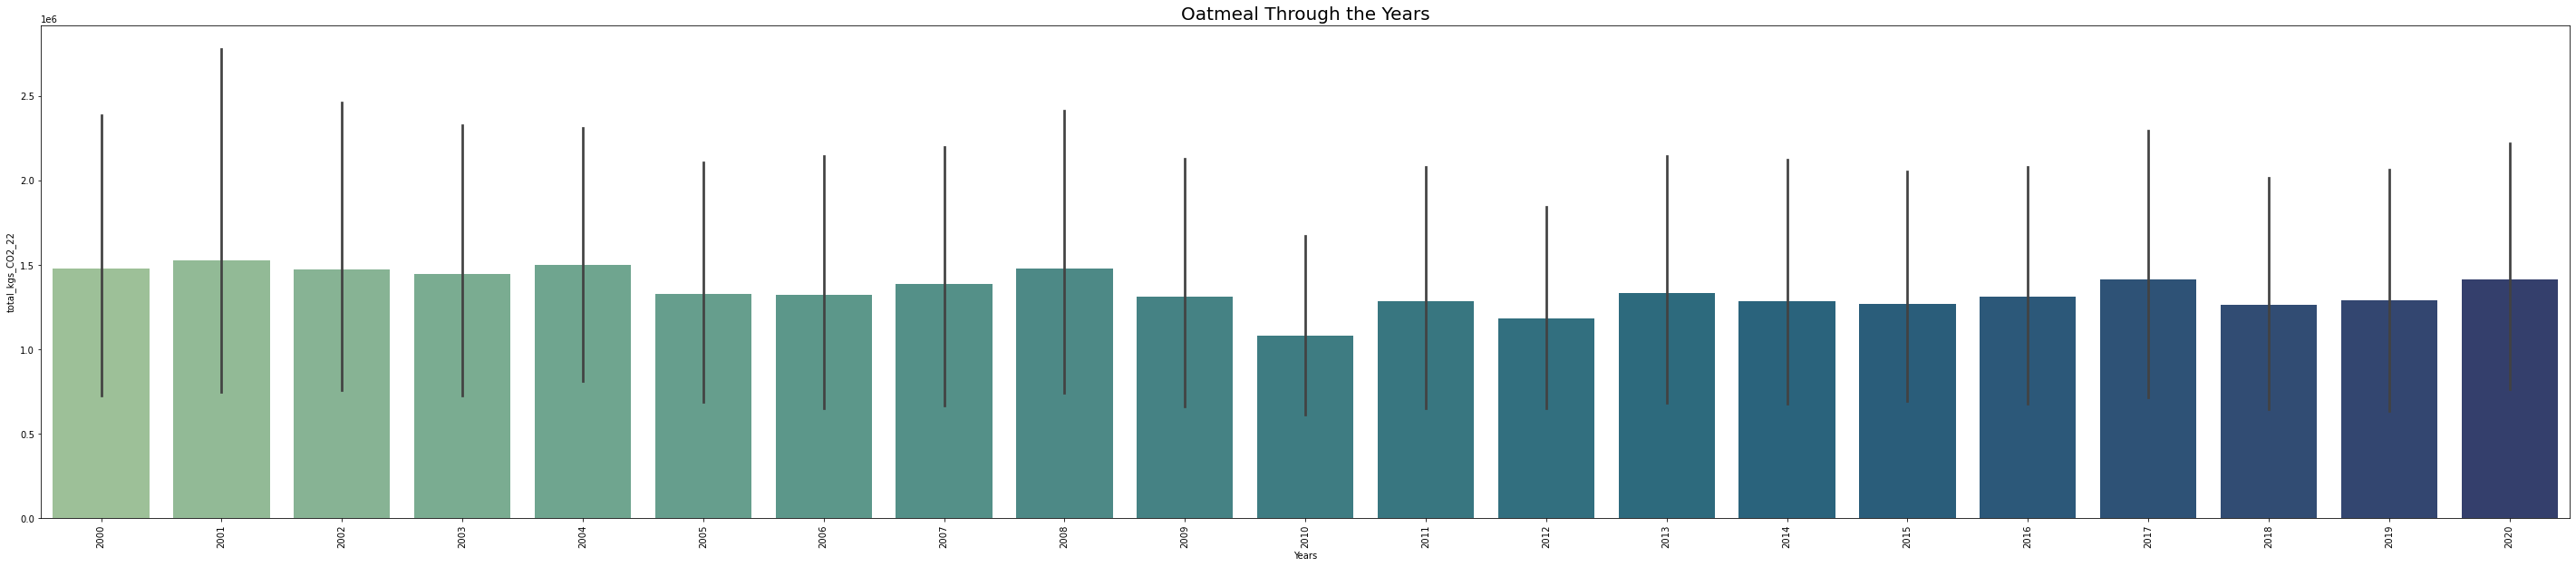

In [116]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = oatmeal['year_pc'], y = oatmeal['total_kgs_CO2_22'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_22', fontsize = 10)
ax.set_title(label = 'Oatmeal Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(oatmeal, dimensions=["year_pc", "total_kgs_CO2_22", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Olive Oil


In [118]:
olive_oil= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_23', 'food_product_categories_23', 'production_tonnes_23', 'total_kgs_CO2_23']]
olive_oil.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_23 food_product_categories_23  production_tonnes_23  \
0                23                  Olive Oil                 89.76   
1                23                  Olive Oil                 73.44   
2                23                  Olive Oil                 89.76   
3                23                  Olive Oil                195.84   
4                23                  Olive Oil                208.08   

   total_kgs_CO2_23  
0         3344.4576  
1         2736.3744  
2         3344.4576  
3         7296.9984  
4         7753.0608

In [160]:
olive_oil.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_23  production_tonnes_23  total_kgs_CO2_23  
count            4201.0          4.201000e+03      4.201000e+03  
mean               23.0          1.477292e+04      5.504049e+05  
std                 0.0          1.008544e+05      3.757096e+06  
min                23.0          0.000000e+00      0.000000e+00  
25%                23.0          0.000000e+00      0.000000e+00  
50%                23.0          0.000000e+00      0.000000e+00  
75%                23.0          0.000000e+00      0.000000e+00  
max                23.0          1.790000e+06      6.670691e+07

In [161]:
olive_oil_total = olive_oil['total_kgs_CO2_23'].sum()

print (olive_oil_total)

2312250808.4784


In [162]:
olive_oil[["area", "year_pc", "total_kgs_CO2_23" ]]

area  year_pc  total_kgs_CO2_23
0        Afghanistan     2000         3344.4576
1        Afghanistan     2001         2736.3744
2        Afghanistan     2002         3344.4576
3        Afghanistan     2003         7296.9984
4        Afghanistan     2004         7753.0608
...              ...      ...               ...
4196  Sudan (former)     2007            0.0000
4197  Sudan (former)     2008            0.0000
4198  Sudan (former)     2009            0.0000
4199  Sudan (former)     2010            0.0000
4200  Sudan (former)     2011            0.0000

[4201 rows x 3 columns]

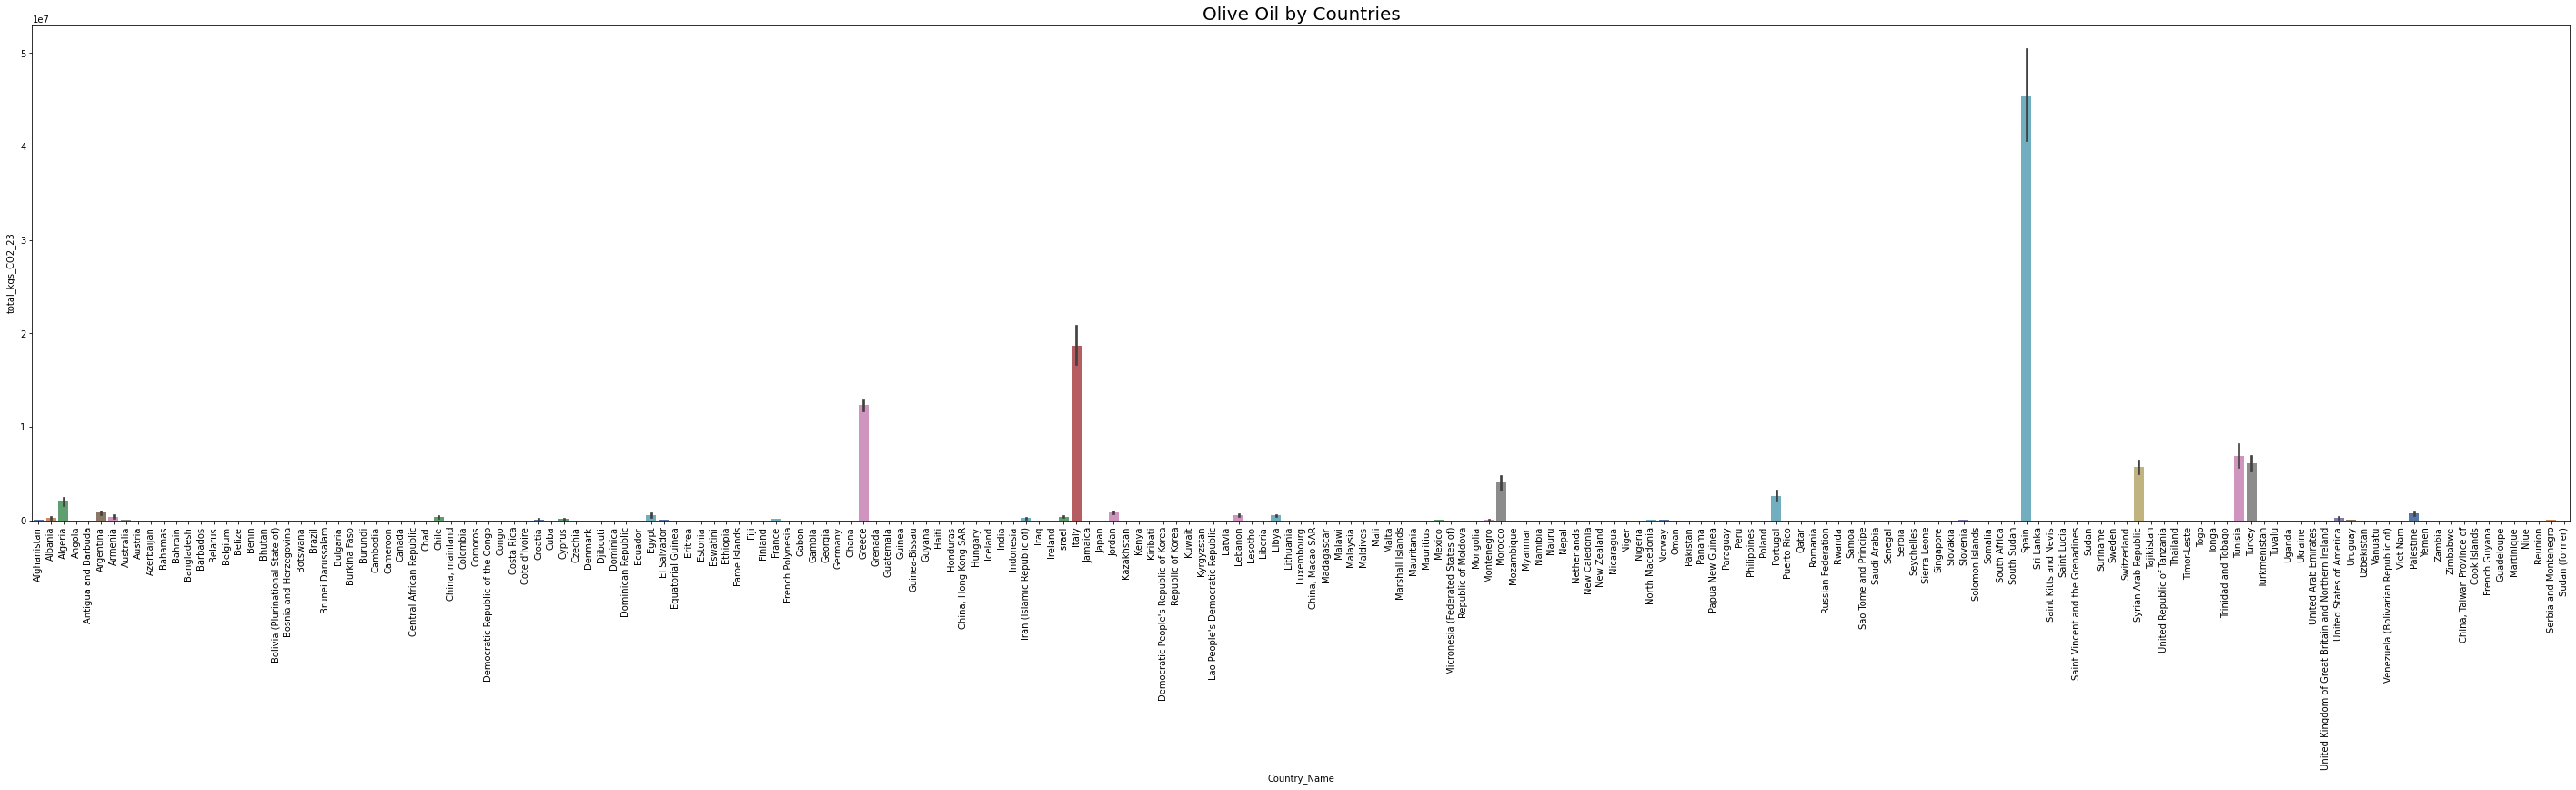

In [119]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = olive_oil['area'], y = olive_oil['total_kgs_CO2_23'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_23', fontsize = 10)
ax.set_title(label = 'Olive Oil by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

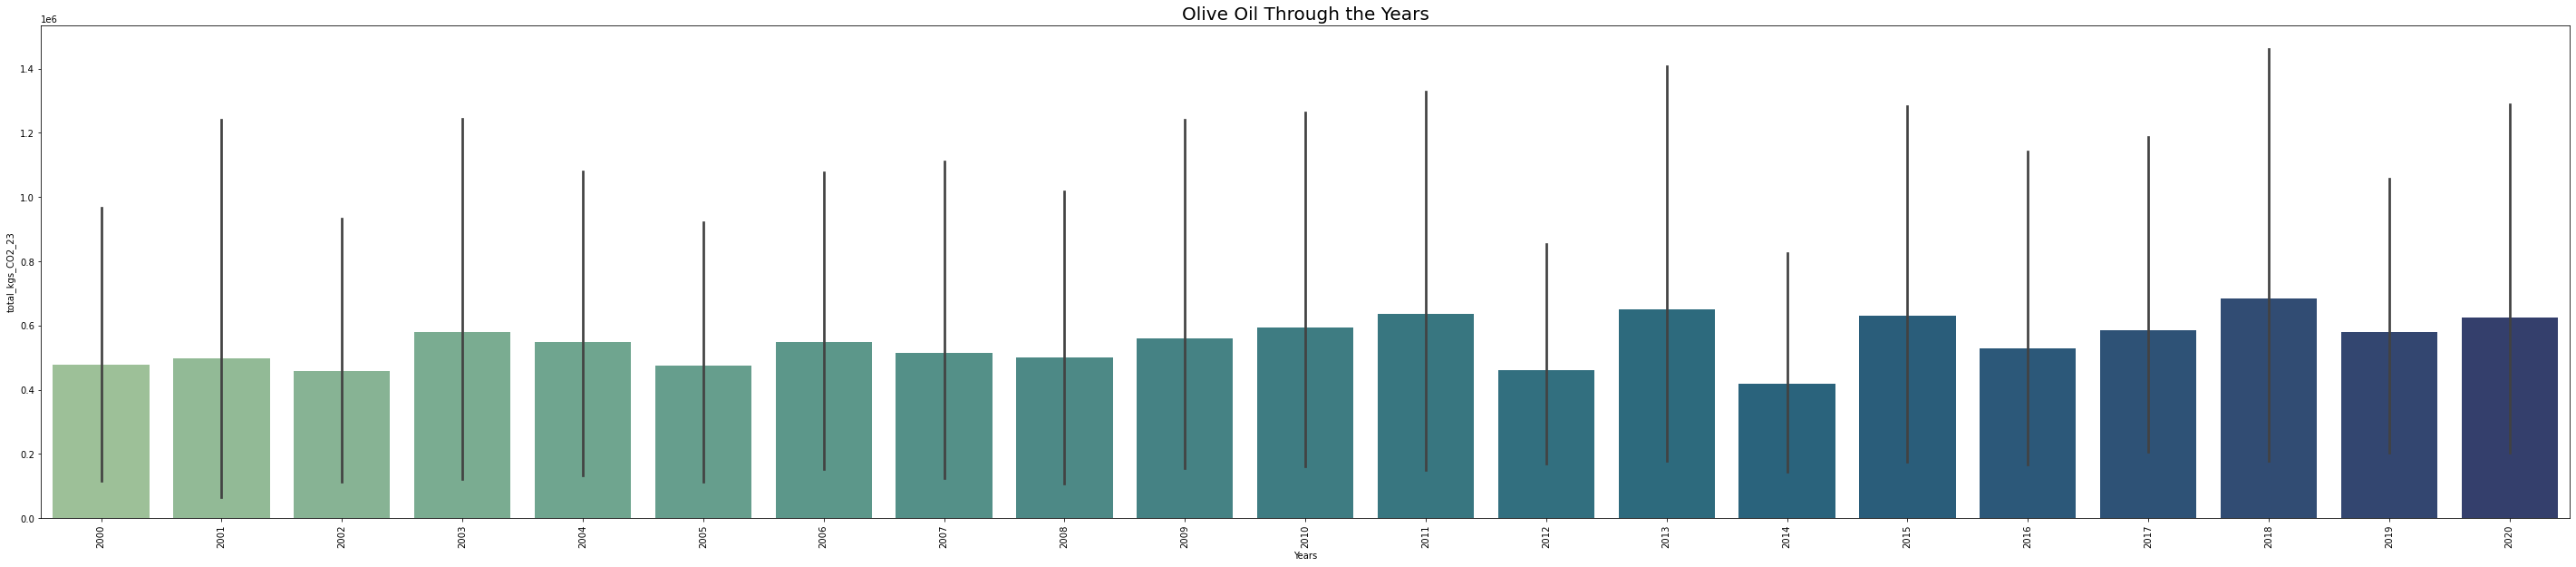

In [120]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = olive_oil['year_pc'], y = olive_oil['total_kgs_CO2_23'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_23', fontsize = 10)
ax.set_title(label = 'Olive Oil Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(olive_oil, dimensions=["year_pc", "total_kgs_CO2_23", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Onions & Leeks


In [122]:
onions_leeks= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_24', 'food_product_categories_24', 'production_tonnes_24', 'total_kgs_CO2_24']]
onions_leeks.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_24 food_product_categories_24  production_tonnes_24  \
0                24             Onions & Leeks             577909.56   
1                24             Onions & Leeks             551094.94   
2                24             Onions & Leeks             524280.28   
3                24             Onions & Leeks             497465.66   
4                24             Onions & Leeks             470651.00   

   total_kgs_CO2_24  
0       1872426.974  
1       1785547.606  
2       1698668.107  
3       1611788.738  
4       1524909.240

In [167]:
onions_leeks.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_24  production_tonnes_24  total_kgs_CO2_24  
count            4201.0          4.201000e+03      4.201000e+03  
mean               24.0          5.255307e+05      1.702534e+06  
std                 0.0          3.003297e+06      9.728426e+06  
min                24.0          0.000000e+00      0.000000e+00  
25%                24.0          8.200000e+01      2.656800e+02  
50%                24.0          2.795000e+04      9.055800e+04  
75%                24.0          2.387000e+05      7.733880e+05  
max                24.0          4.613219e+07      1.494278e+08

In [168]:
onions_leeks_total = onions_leeks['total_kgs_CO2_24'].sum()

print (onions_leeks_total)

7152346188.4284


In [169]:
onions_leeks[["area", "year_pc", "total_kgs_CO2_24" ]]

area  year_pc  total_kgs_CO2_24
0        Afghanistan     2000       1872426.974
1        Afghanistan     2001       1785547.606
2        Afghanistan     2002       1698668.107
3        Afghanistan     2003       1611788.738
4        Afghanistan     2004       1524909.240
...              ...      ...               ...
4196  Sudan (former)     2007       3099672.360
4197  Sudan (former)     2008       3165308.280
4198  Sudan (former)     2009       3402012.960
4199  Sudan (former)     2010       3706997.400
4200  Sudan (former)     2011       3716017.560

[4201 rows x 3 columns]

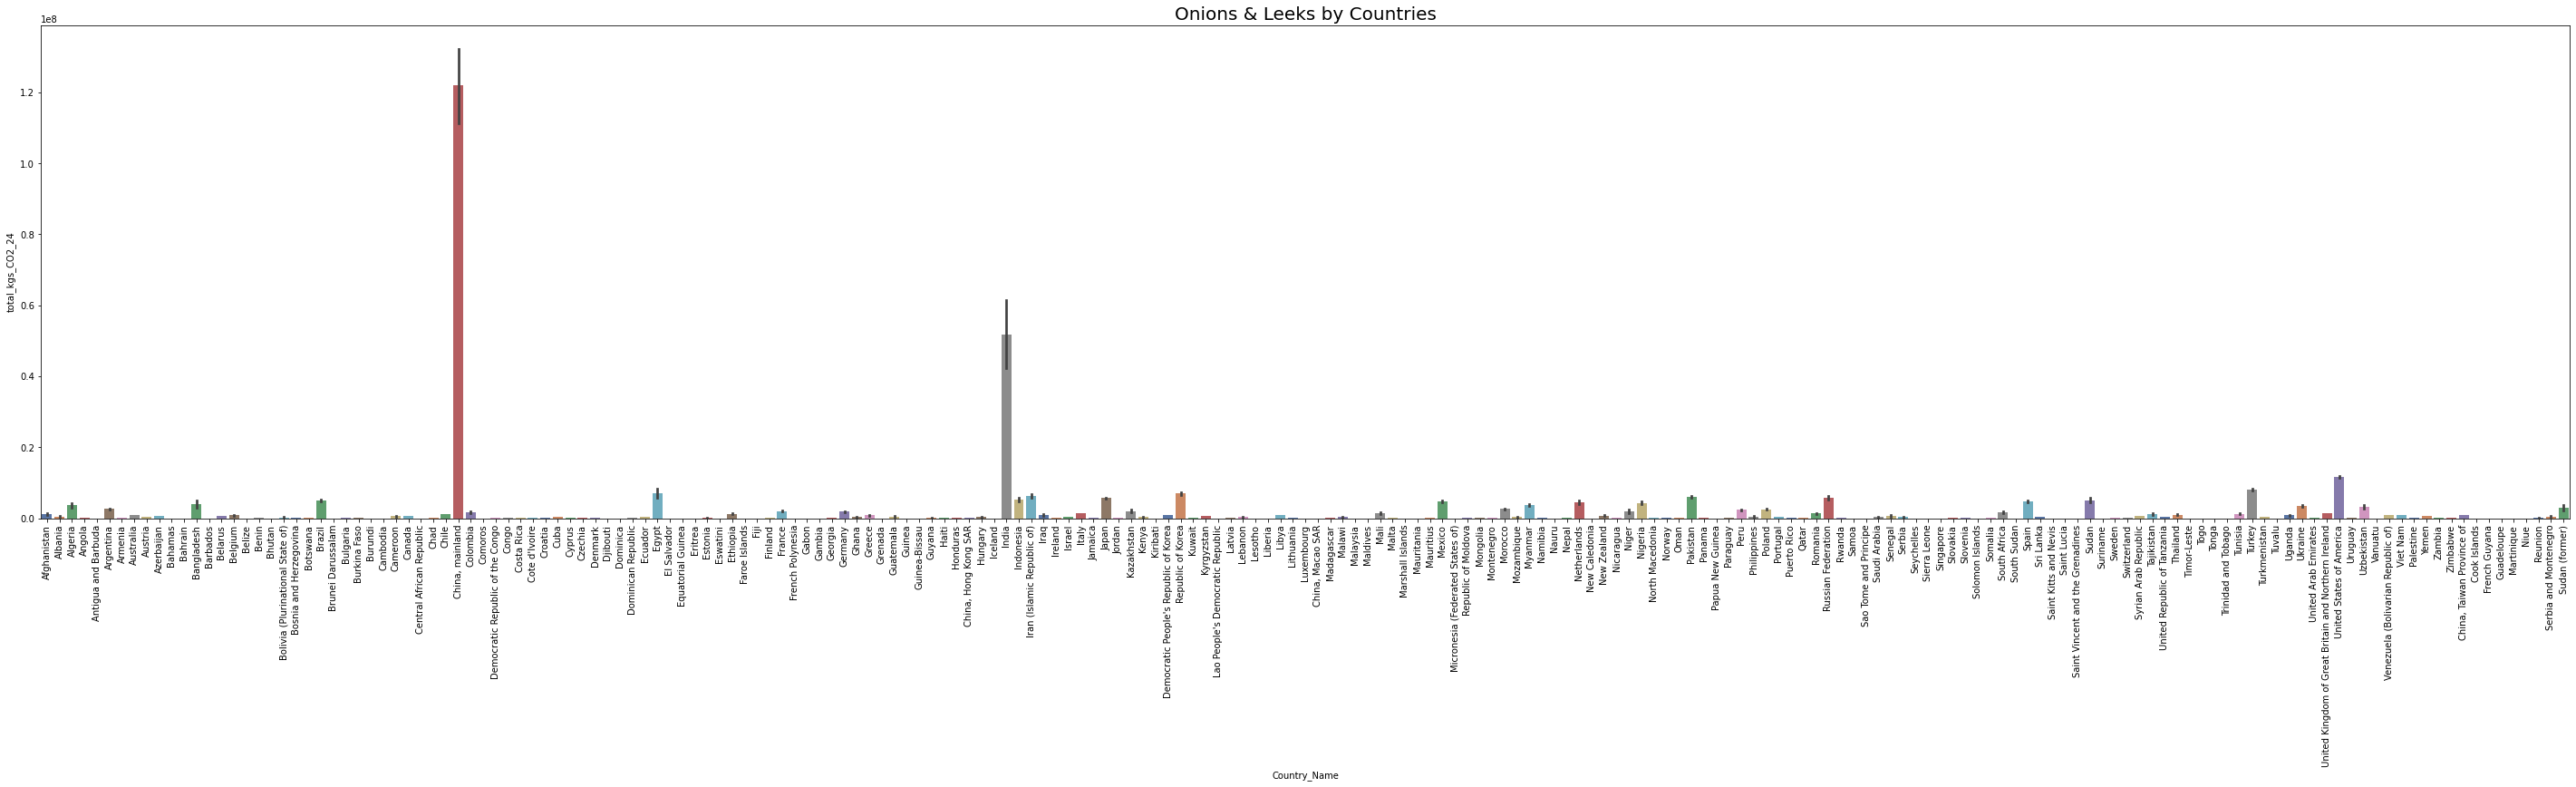

In [123]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = onions_leeks['area'], y = onions_leeks['total_kgs_CO2_24'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_24', fontsize = 10)
ax.set_title(label = 'Onions & Leeks by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

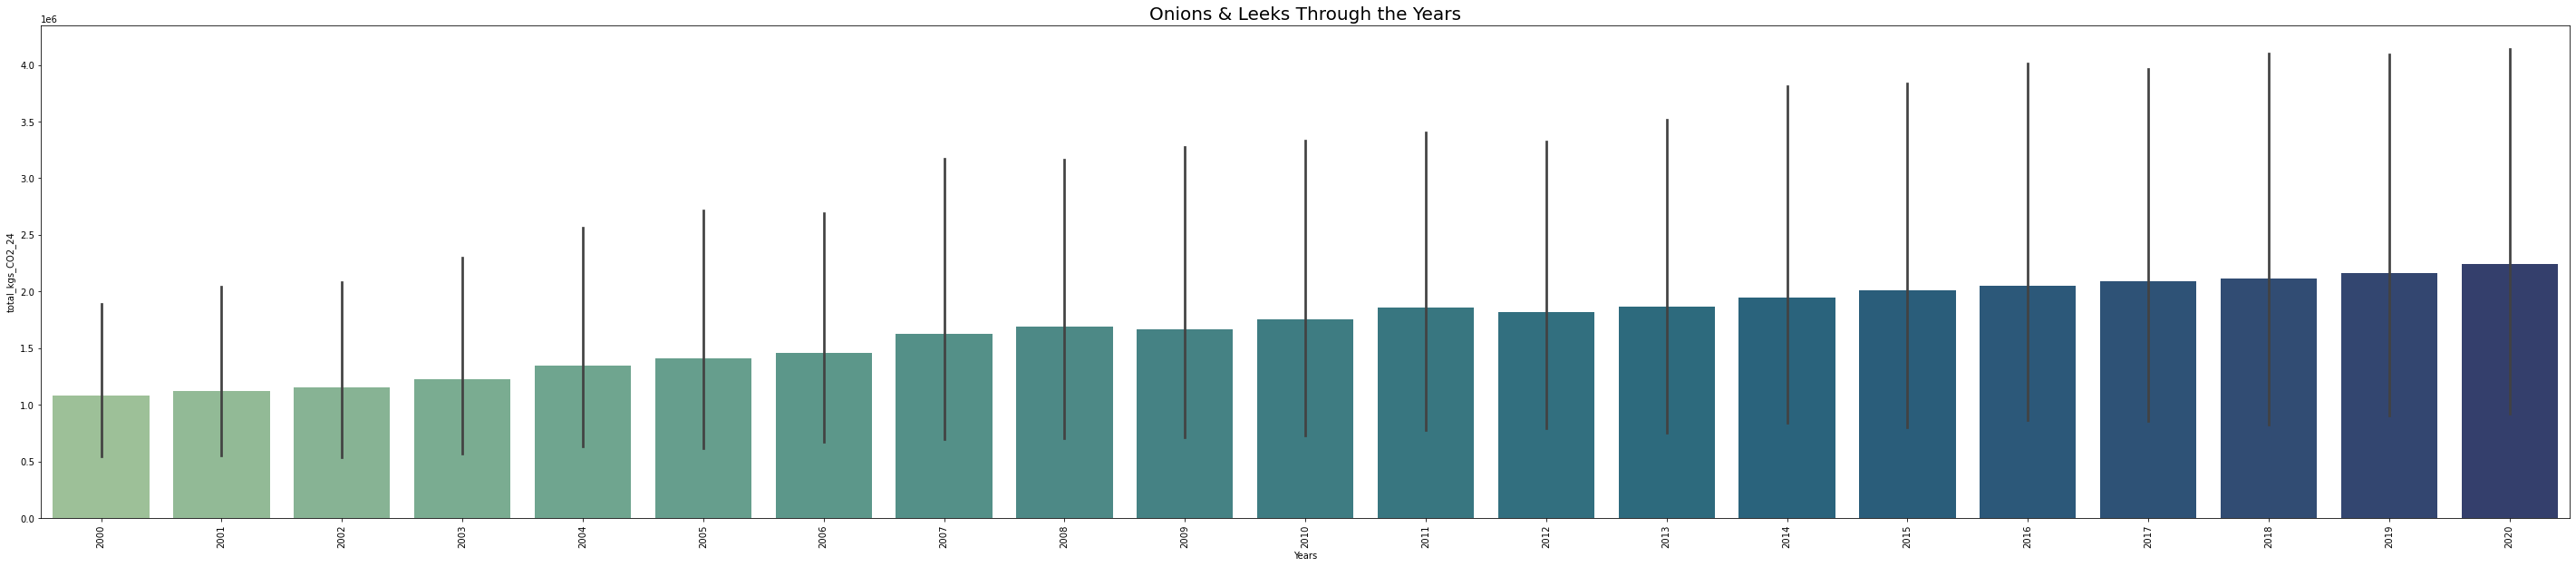

In [124]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = onions_leeks['year_pc'], y = onions_leeks['total_kgs_CO2_24'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_24', fontsize = 10)
ax.set_title(label = 'Onions & Leeks Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(onions_leeks, dimensions=["year_pc", "total_kgs_CO2_24", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()


## Other Fruit


In [126]:
other_fruit= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_25', 'food_product_categories_25', 'production_tonnes_25', 'total_kgs_CO2_25']]
other_fruit.head()



country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_25 food_product_categories_25  production_tonnes_25  \
0                25                Other Fruit             399191.07   
1                25                Other Fruit             407096.55   
2                25                Other Fruit             437947.33   
3                25                Other Fruit             499929.02   
4                25                Other Fruit             366498.99   

   total_kgs_CO2_25  
0      9.700343e+05  
1      9.892446e+05  
2      1.064212e+06  
3      1.214828e+06  
4      8.905925e+05

In [174]:
other_fruit.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_25  production_tonnes_25  total_kgs_CO2_25  
count            4201.0          4.201000e+03      4.201000e+03  
mean               25.0          2.783560e+06      6.763950e+06  
std                 0.0          1.640421e+07      3.985964e+07  
min                25.0          0.000000e+00      0.000000e+00  
25%                25.0          2.947140e+04      7.161550e+04  
50%                25.0          2.688150e+05      6.532204e+05  
75%                25.0          1.203652e+06      2.924874e+06  
max                25.0          2.879467e+08      6.995039e+08

In [175]:
other_fruit_total = other_fruit['total_kgs_CO2_25'].sum()

print (other_fruit_total)

28415351849.7783


In [176]:
other_fruit[["area", "year_pc", "total_kgs_CO2_25" ]]

area  year_pc  total_kgs_CO2_25
0        Afghanistan     2000      9.700343e+05
1        Afghanistan     2001      9.892446e+05
2        Afghanistan     2002      1.064212e+06
3        Afghanistan     2003      1.214828e+06
4        Afghanistan     2004      8.905925e+05
...              ...      ...               ...
4196  Sudan (former)     2007      5.060076e+06
4197  Sudan (former)     2008      5.610943e+06
4198  Sudan (former)     2009      5.609988e+06
4199  Sudan (former)     2010      5.210302e+06
4200  Sudan (former)     2011      5.256090e+06

[4201 rows x 3 columns]

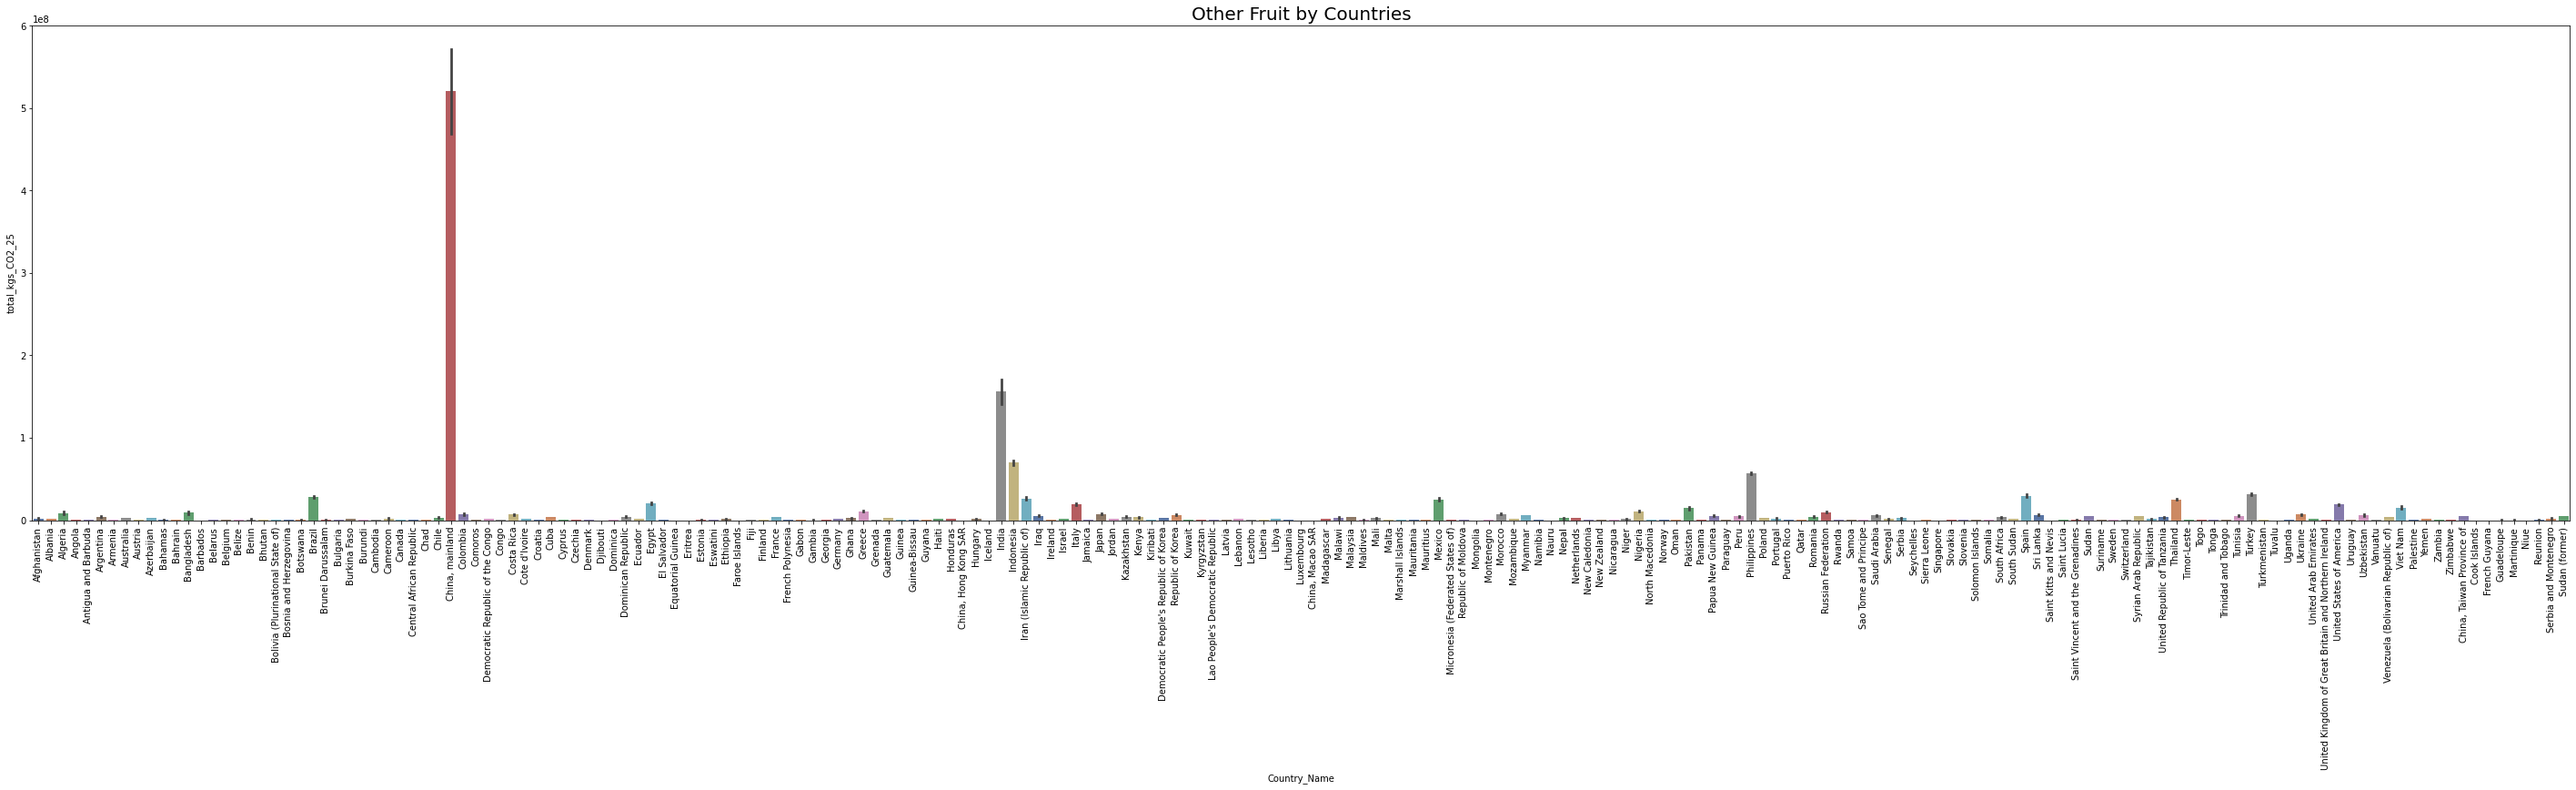

In [127]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = other_fruit['area'], y = other_fruit['total_kgs_CO2_25'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_25', fontsize = 10)
ax.set_title(label = 'Other Fruit by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

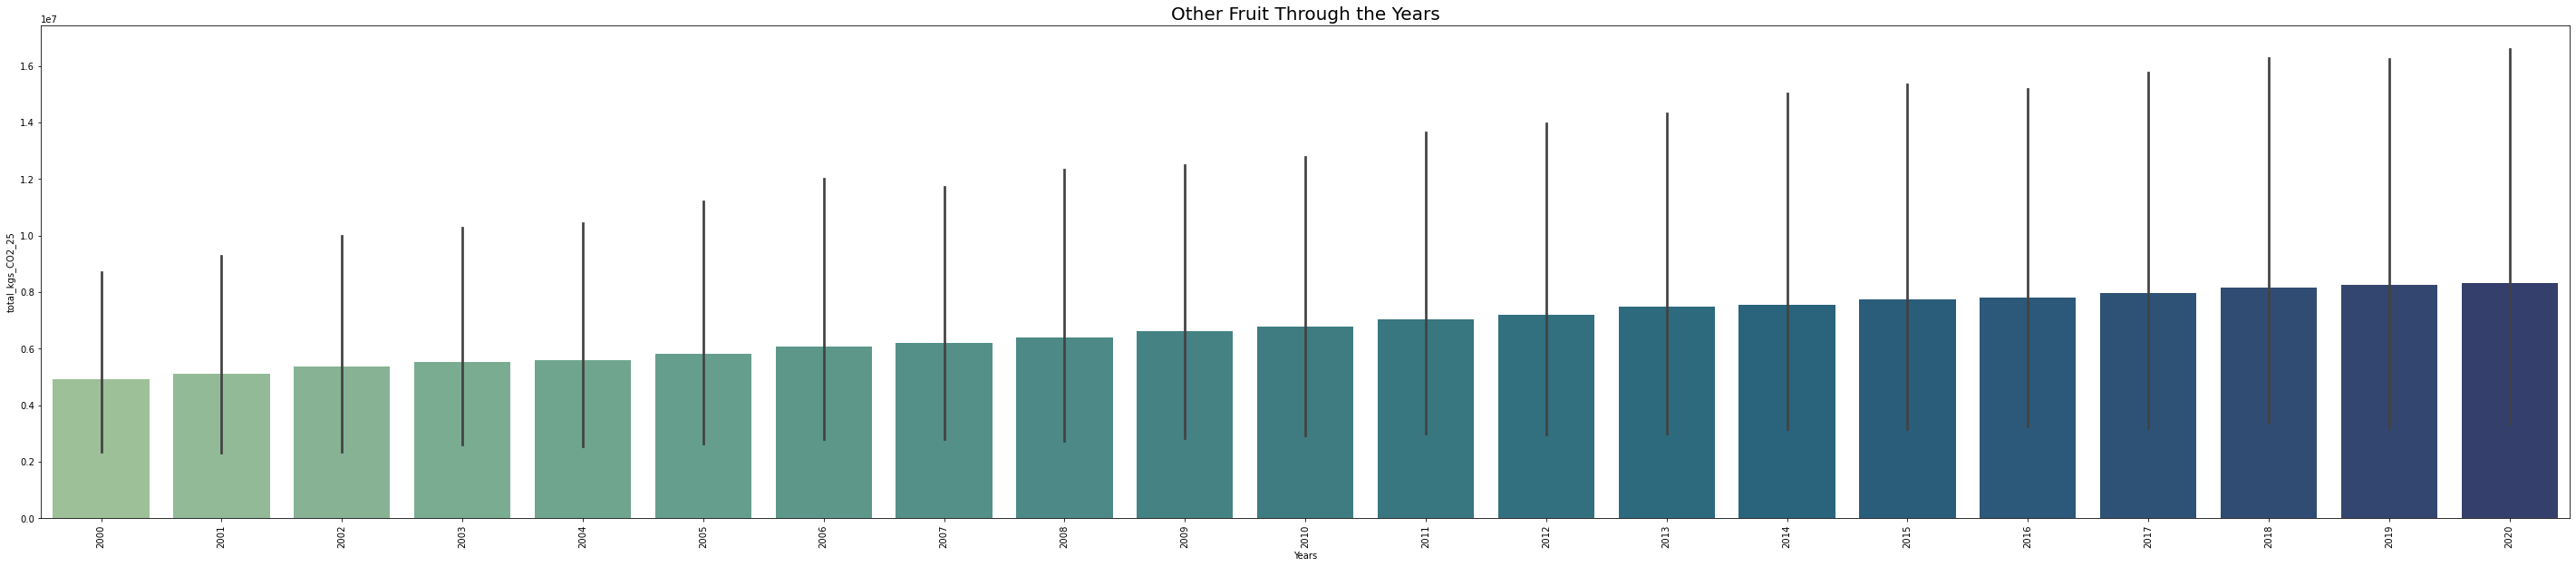

In [128]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = other_fruit['year_pc'], y = other_fruit['total_kgs_CO2_25'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_25', fontsize = 10)
ax.set_title(label = 'Other Fruit Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(other_fruit, dimensions=["year_pc", "total_kgs_CO2_25", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Other Pulses


In [130]:
other_pulses= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_26', 'food_product_categories_26', 'production_tonnes_26', 'total_kgs_CO2_26']]
other_pulses.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_26 food_product_categories_26  production_tonnes_26  \
0                26               Other Pulses             155278.67   
1                26               Other Pulses             153417.15   
2                26               Other Pulses             151912.37   
3                26               Other Pulses             133823.77   
4                26               Other Pulses             132061.14   

   total_kgs_CO2_26  
0       2652159.684  
1       2620364.922  
2       2594663.280  
3       2285709.992  
4       2255604.271

In [181]:
other_pulses.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_26  production_tonnes_26  total_kgs_CO2_26  
count            4201.0          4.201000e+03      4.201000e+03  
mean               26.0          1.276786e+06      2.180729e+07  
std                 0.0          4.398492e+06      7.512366e+07  
min                26.0          0.000000e+00      0.000000e+00  
25%                26.0          3.610500e+03      6.166734e+04  
50%                26.0          1.145051e+05      1.955748e+06  
75%                26.0          5.326872e+05      9.098298e+06  
max                26.0          5.723714e+07      9.772382e+08

In [182]:
other_pulses_total = other_pulses['total_kgs_CO2_26'].sum()

print (other_pulses_total)

91612426528.5826


In [183]:
other_pulses[["area", "year_pc", "total_kgs_CO2_26" ]]

area  year_pc  total_kgs_CO2_26
0        Afghanistan     2000      2.652160e+06
1        Afghanistan     2001      2.620365e+06
2        Afghanistan     2002      2.594663e+06
3        Afghanistan     2003      2.285710e+06
4        Afghanistan     2004      2.255604e+06
...              ...      ...               ...
4196  Sudan (former)     2007      1.133769e+08
4197  Sudan (former)     2008      9.322008e+07
4198  Sudan (former)     2009      9.670440e+07
4199  Sudan (former)     2010      6.502626e+07
4200  Sudan (former)     2011      1.044919e+08

[4201 rows x 3 columns]

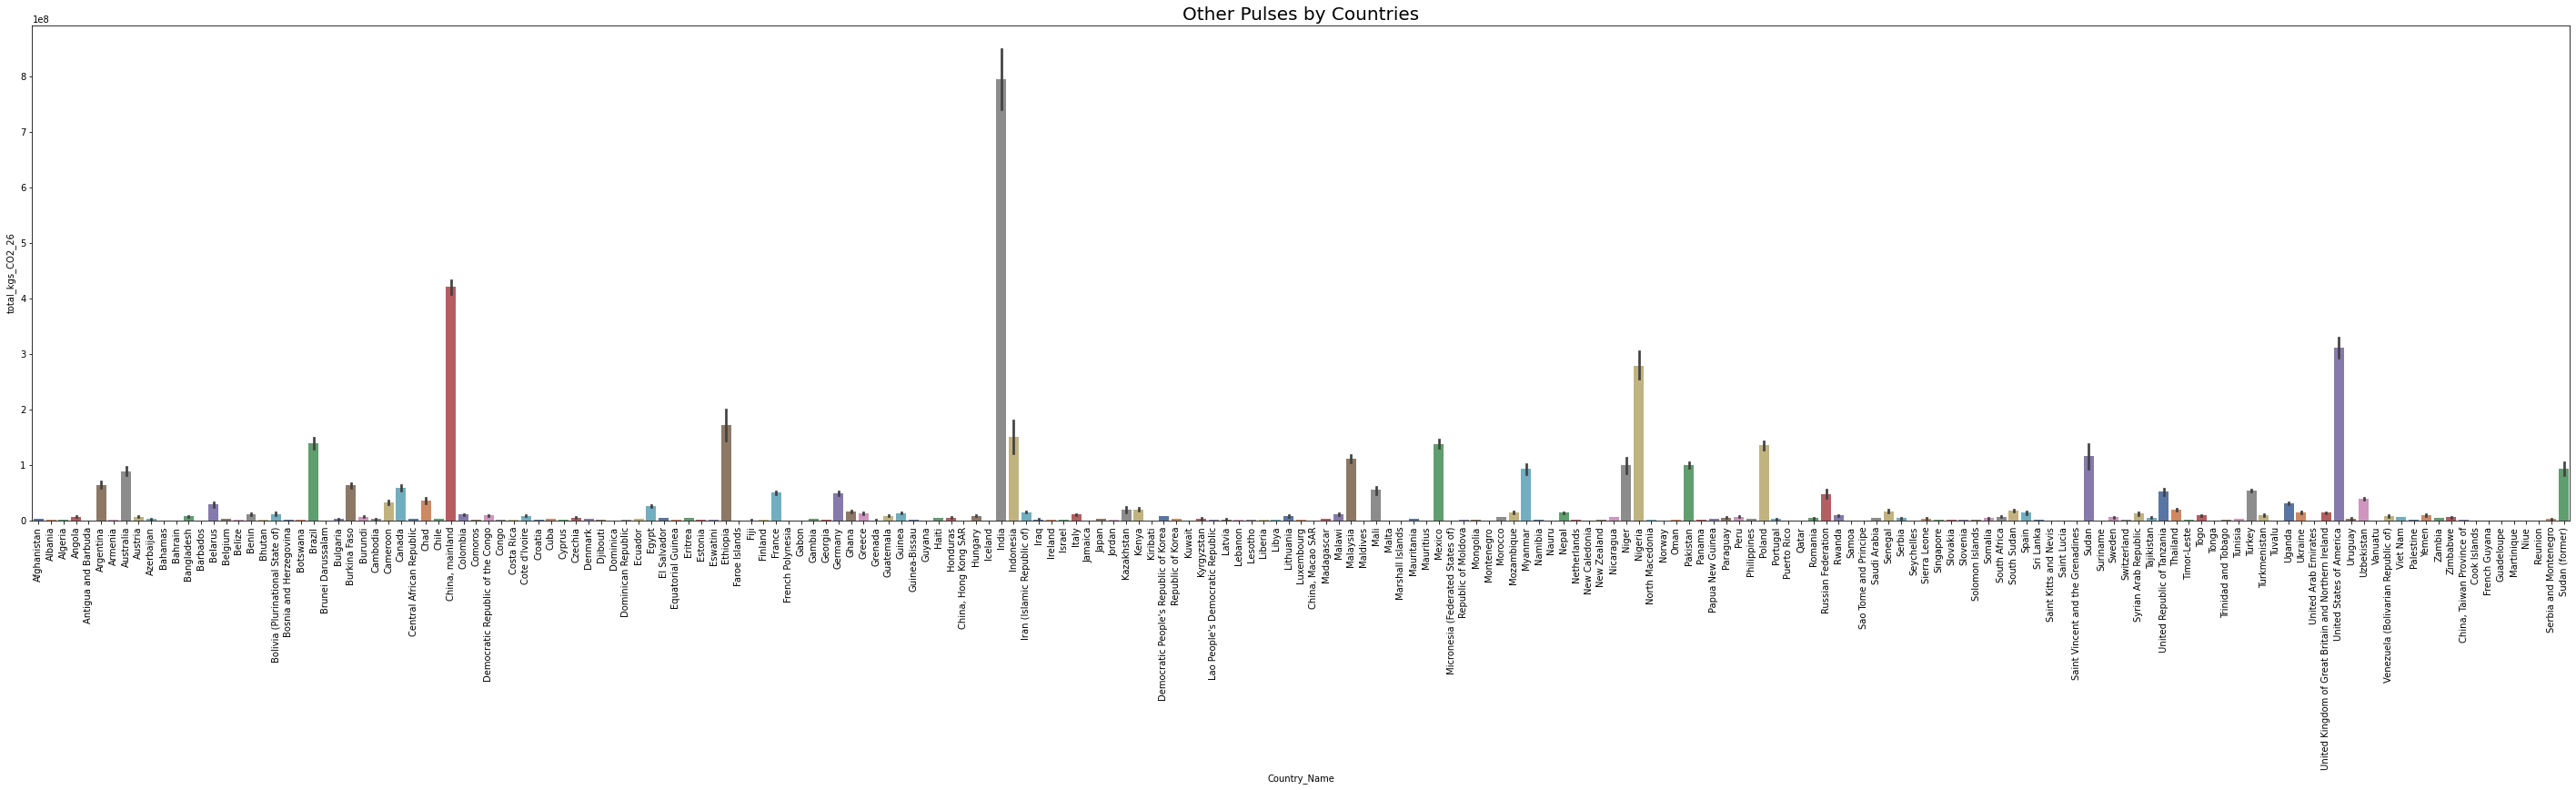

In [131]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = other_pulses['area'], y = other_pulses['total_kgs_CO2_26'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_26', fontsize = 10)
ax.set_title(label = 'Other Pulses by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

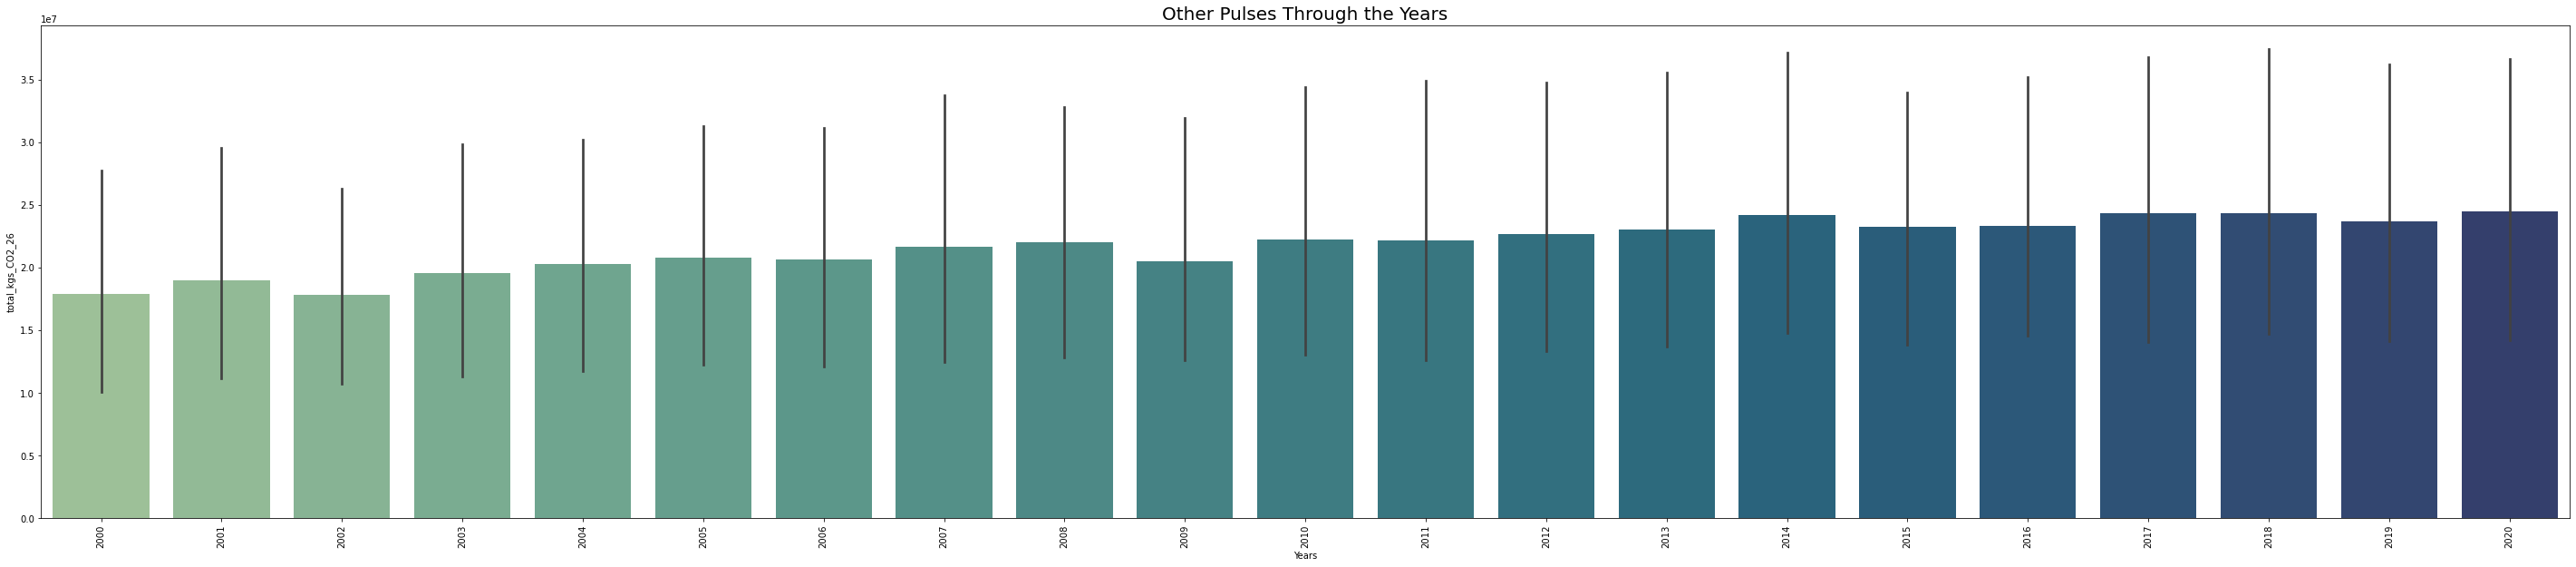

In [142]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = other_pulses['year_pc'], y = other_pulses['total_kgs_CO2_26'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_26', fontsize = 10)
ax.set_title(label = 'Other Pulses Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(other_pulses, dimensions=["year_pc", "total_kgs_CO2_26", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Other Vegetables


In [134]:
other_veg= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_27', 'food_product_categories_27', 'production_tonnes_27', 'total_kgs_CO2_27']]
other_veg.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_27 food_product_categories_27  production_tonnes_27  \
0                27           Other Vegetables             530784.25   
1                27           Other Vegetables             542677.50   
2                27           Other Vegetables             558793.20   
3                27           Other Vegetables             567850.90   
4                27           Other Vegetables             600000.00   

   total_kgs_CO2_27  
0       1204880.248  
1       1231877.925  
2       1268460.564  
3       1289021.543  
4       1362000.000

In [188]:
other_veg.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_27  production_tonnes_27  total_kgs_CO2_27  
count       4201.000000          4.201000e+03      4.201000e+03  
mean          26.900024          1.765145e+06      4.005730e+06  
std            0.700002          1.417984e+07      3.217313e+07  
min           22.000000          0.000000e+00      0.000000e+00  
25%           27.000000          1.315338e+04      2.985817e+04  
50%           27.000000          1.030000e+05      2.338100e+05  
75%           27.000000          4.947000e+05      1.122969e+06  
max           27.000000          2.264435e+08      5.130542e+08

In [189]:
other_veg_total = other_veg['total_kgs_CO2_27'].sum()

print (other_veg_total)

16828072252.361403


In [190]:
other_veg[["area", "year_pc", "total_kgs_CO2_27" ]]

area  year_pc  total_kgs_CO2_27
0        Afghanistan     2000       1204880.248
1        Afghanistan     2001       1231877.925
2        Afghanistan     2002       1268460.564
3        Afghanistan     2003       1289021.543
4        Afghanistan     2004       1362000.000
...              ...      ...               ...
4196  Sudan (former)     2007       1604776.500
4197  Sudan (former)     2008       1700842.900
4198  Sudan (former)     2009       1690696.000
4199  Sudan (former)     2010       1803969.000
4200  Sudan (former)     2011       1887357.450

[4201 rows x 3 columns]

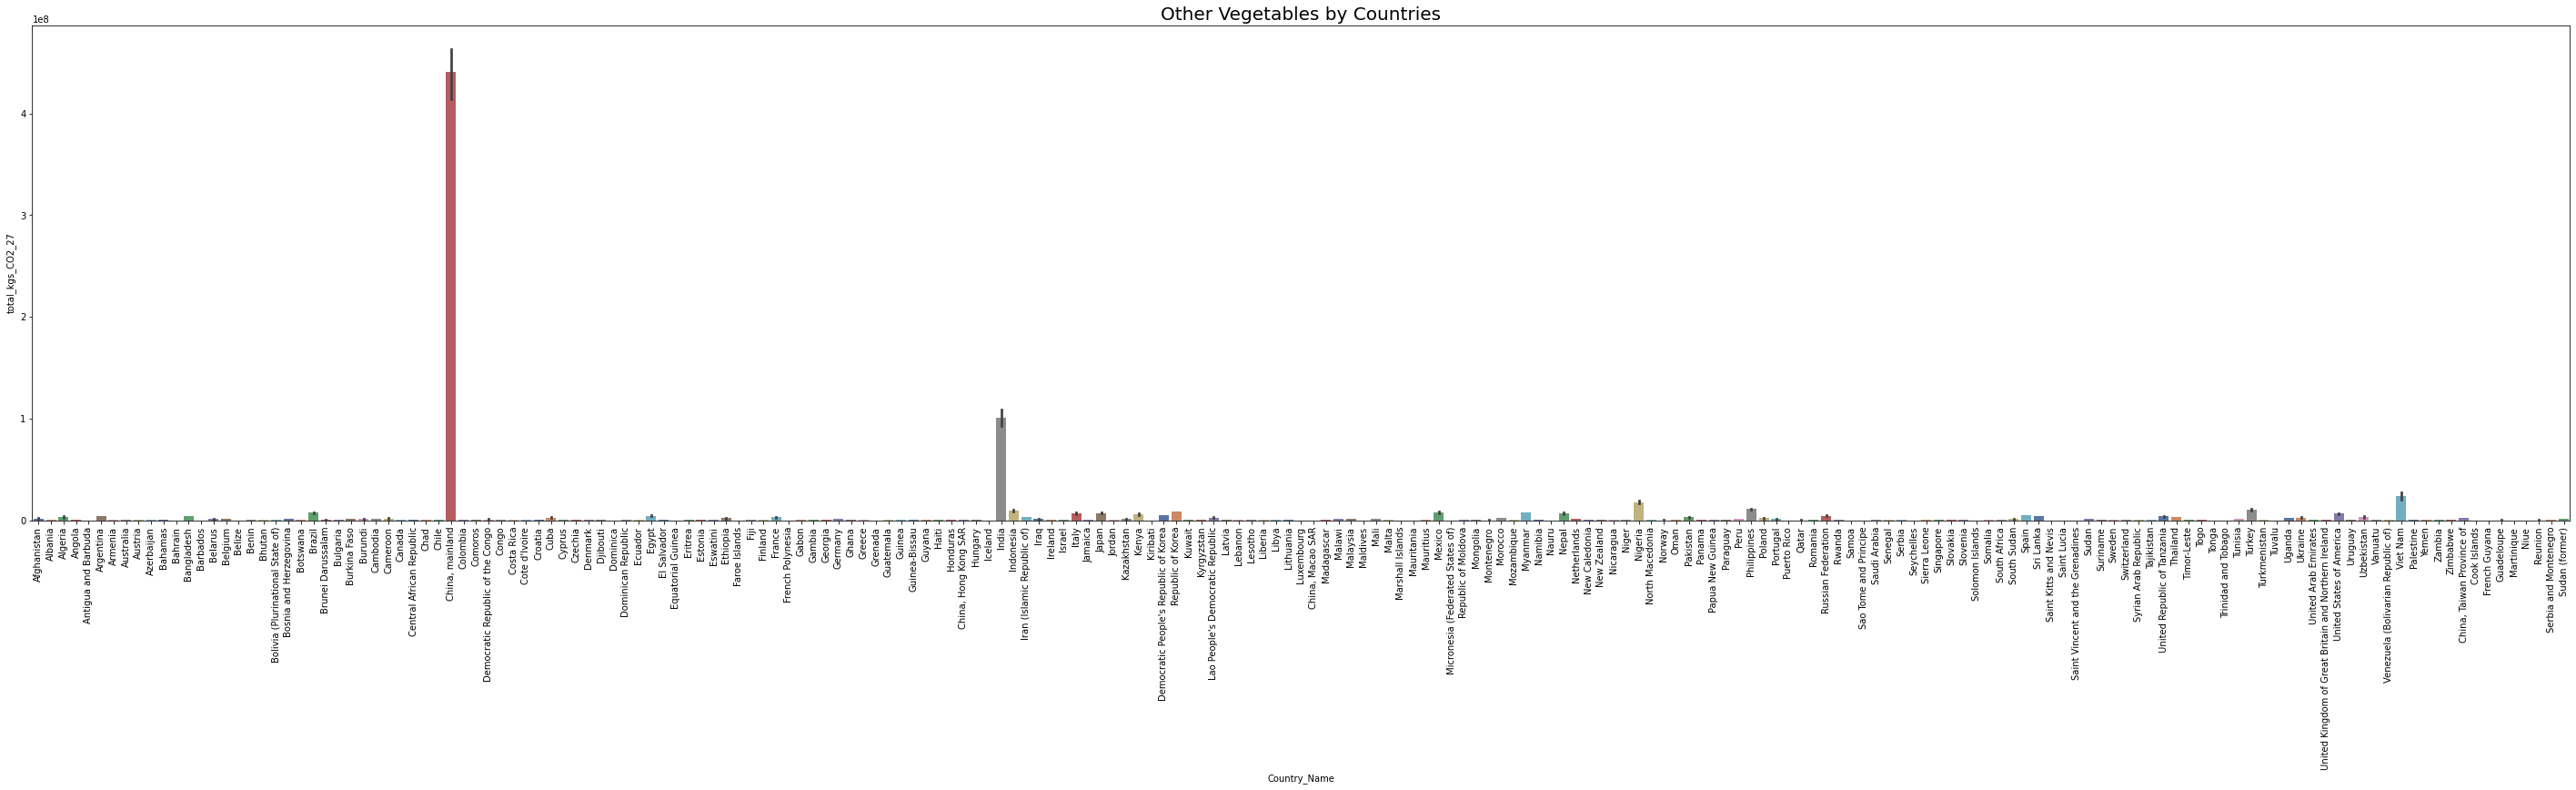

In [135]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = other_veg['area'], y = other_veg['total_kgs_CO2_27'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_27', fontsize = 10)
ax.set_title(label = 'Other Vegetables by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

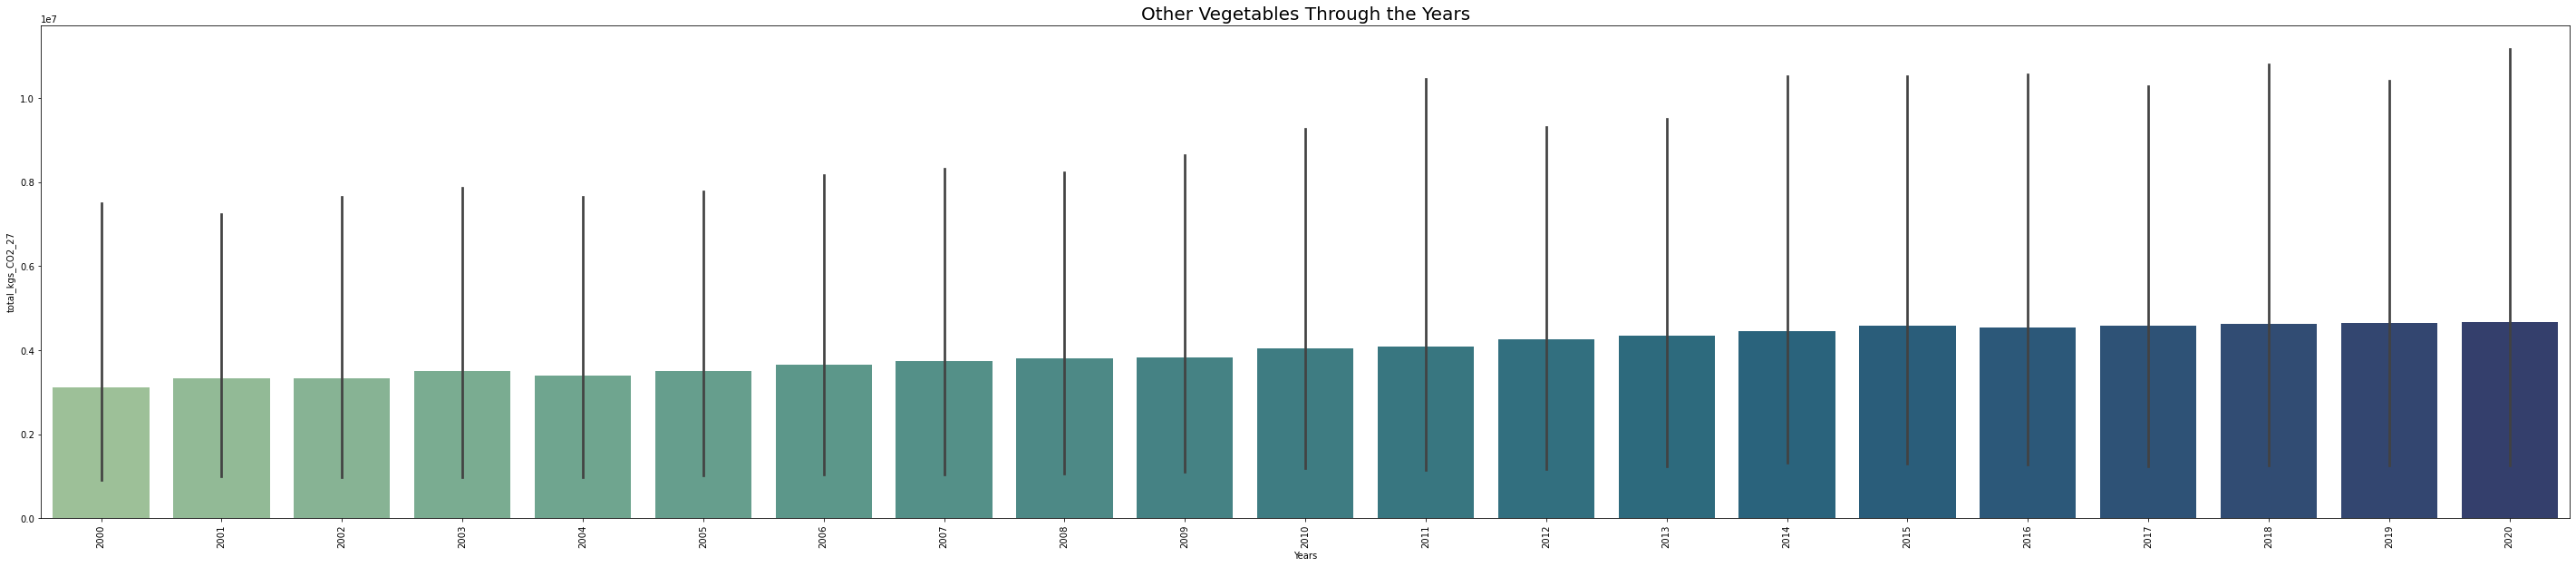

In [136]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = other_veg['year_pc'], y = other_veg['total_kgs_CO2_27'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_27', fontsize = 10)
ax.set_title(label = 'Other Vegetables Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(other_veg, dimensions=["year_pc", "total_kgs_CO2_27", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Palm Oil


In [138]:
palm_oil= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_28', 'food_product_categories_28', 'production_tonnes_28', 'total_kgs_CO2_28']]
palm_oil.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_28 food_product_categories_28  production_tonnes_28  \
0                28                   Palm Oil                   0.0   
1                28                   Palm Oil                   0.0   
2                28                   Palm Oil                   0.0   
3                28                   Palm Oil                   0.0   
4                28                   Palm Oil                   0.0   

   total_kgs_CO2_28  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [195]:
palm_oil.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_28  production_tonnes_28  total_kgs_CO2_28  
count            4201.0          4.201000e+03      4.201000e+03  
mean               28.0          1.560777e+06      1.665737e+07  
std                 0.0          1.460957e+07      1.559549e+08  
min                28.0          0.000000e+00      0.000000e+00  
25%                28.0          0.000000e+00      0.000000e+00  
50%                28.0          0.000000e+00      0.000000e+00  
75%                28.0          0.000000e+00      0.000000e+00  
max                28.0          2.951000e+08      3.152653e+09

In [196]:
palm_oil_total = palm_oil['total_kgs_CO2_28'].sum()

print (palm_oil_total)

69977610347.3471


In [197]:
palm_oil[["area", "year_pc", "total_kgs_CO2_28" ]]

area  year_pc  total_kgs_CO2_28
0        Afghanistan     2000               0.0
1        Afghanistan     2001               0.0
2        Afghanistan     2002               0.0
3        Afghanistan     2003               0.0
4        Afghanistan     2004               0.0
...              ...      ...               ...
4196  Sudan (former)     2007               0.0
4197  Sudan (former)     2008               0.0
4198  Sudan (former)     2009               0.0
4199  Sudan (former)     2010               0.0
4200  Sudan (former)     2011               0.0

[4201 rows x 3 columns]

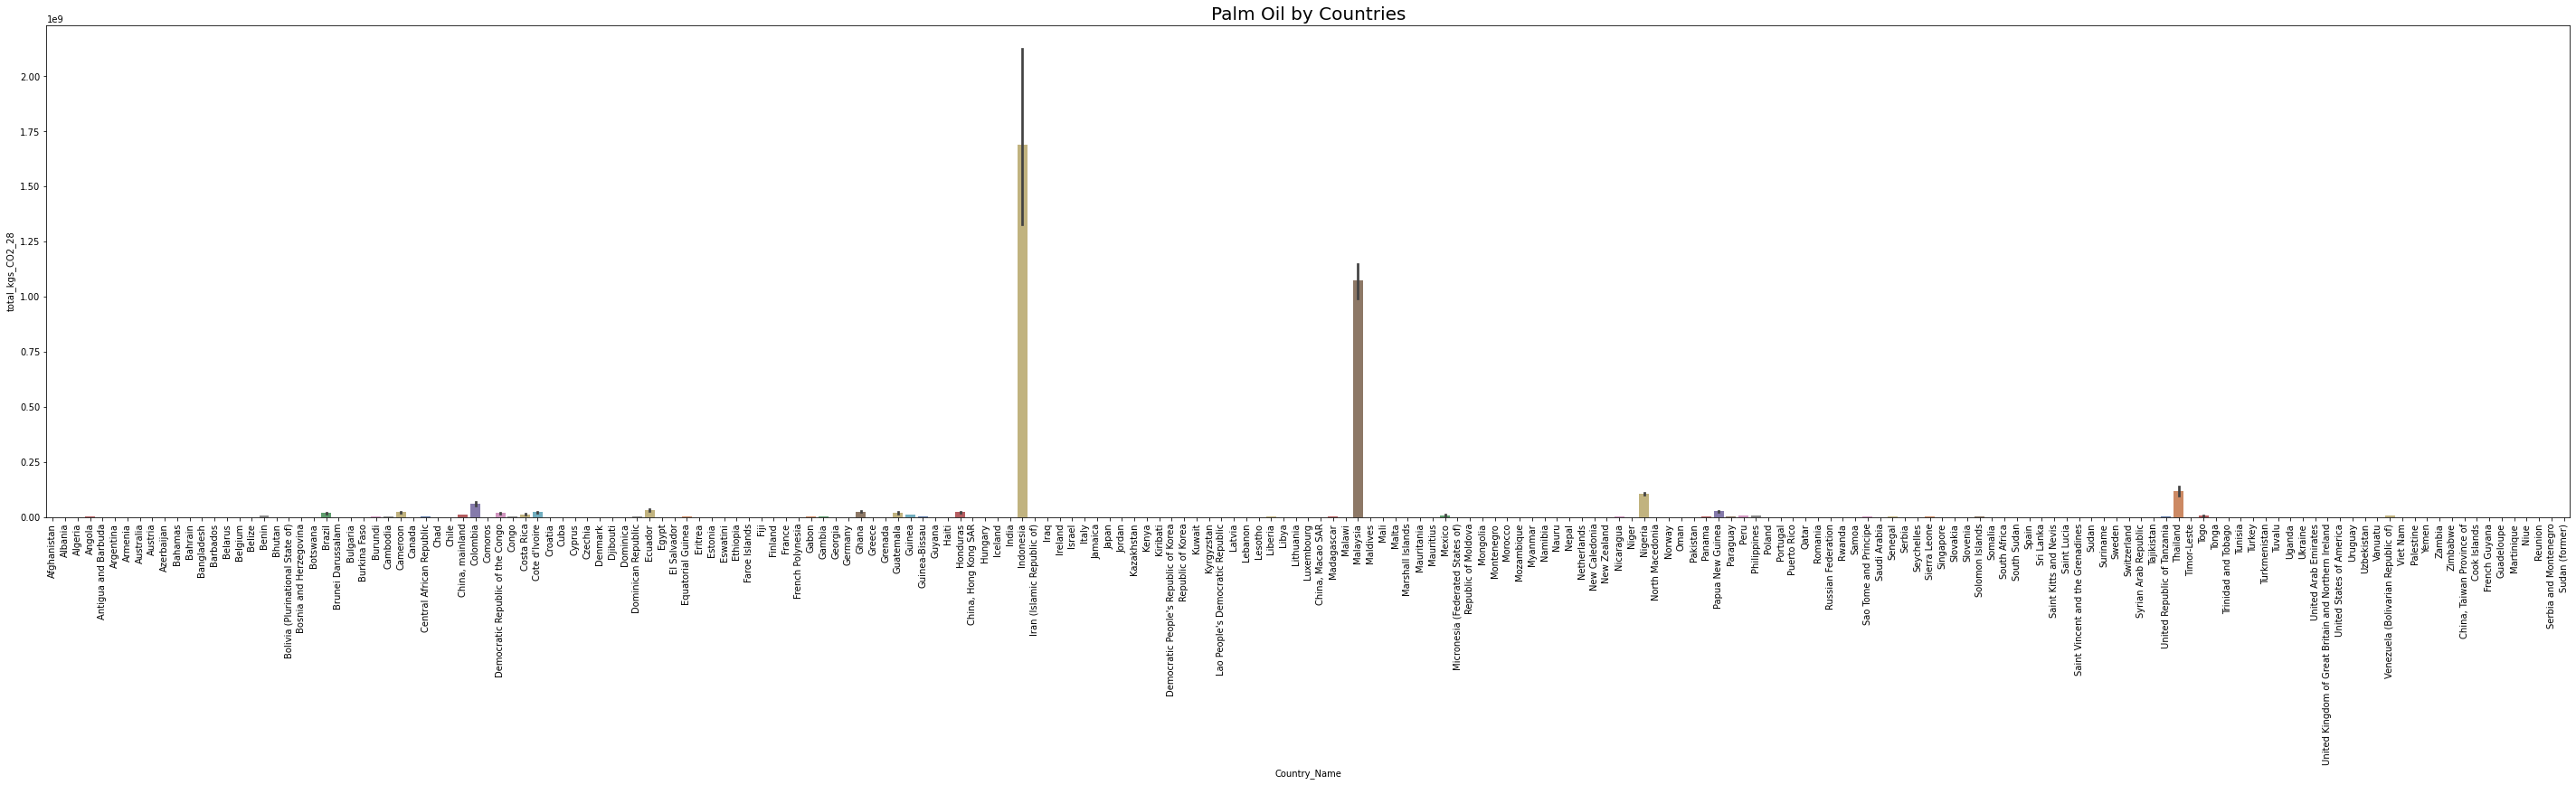

In [139]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = palm_oil['area'], y = palm_oil['total_kgs_CO2_28'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_28', fontsize = 10)
ax.set_title(label = 'Palm Oil by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

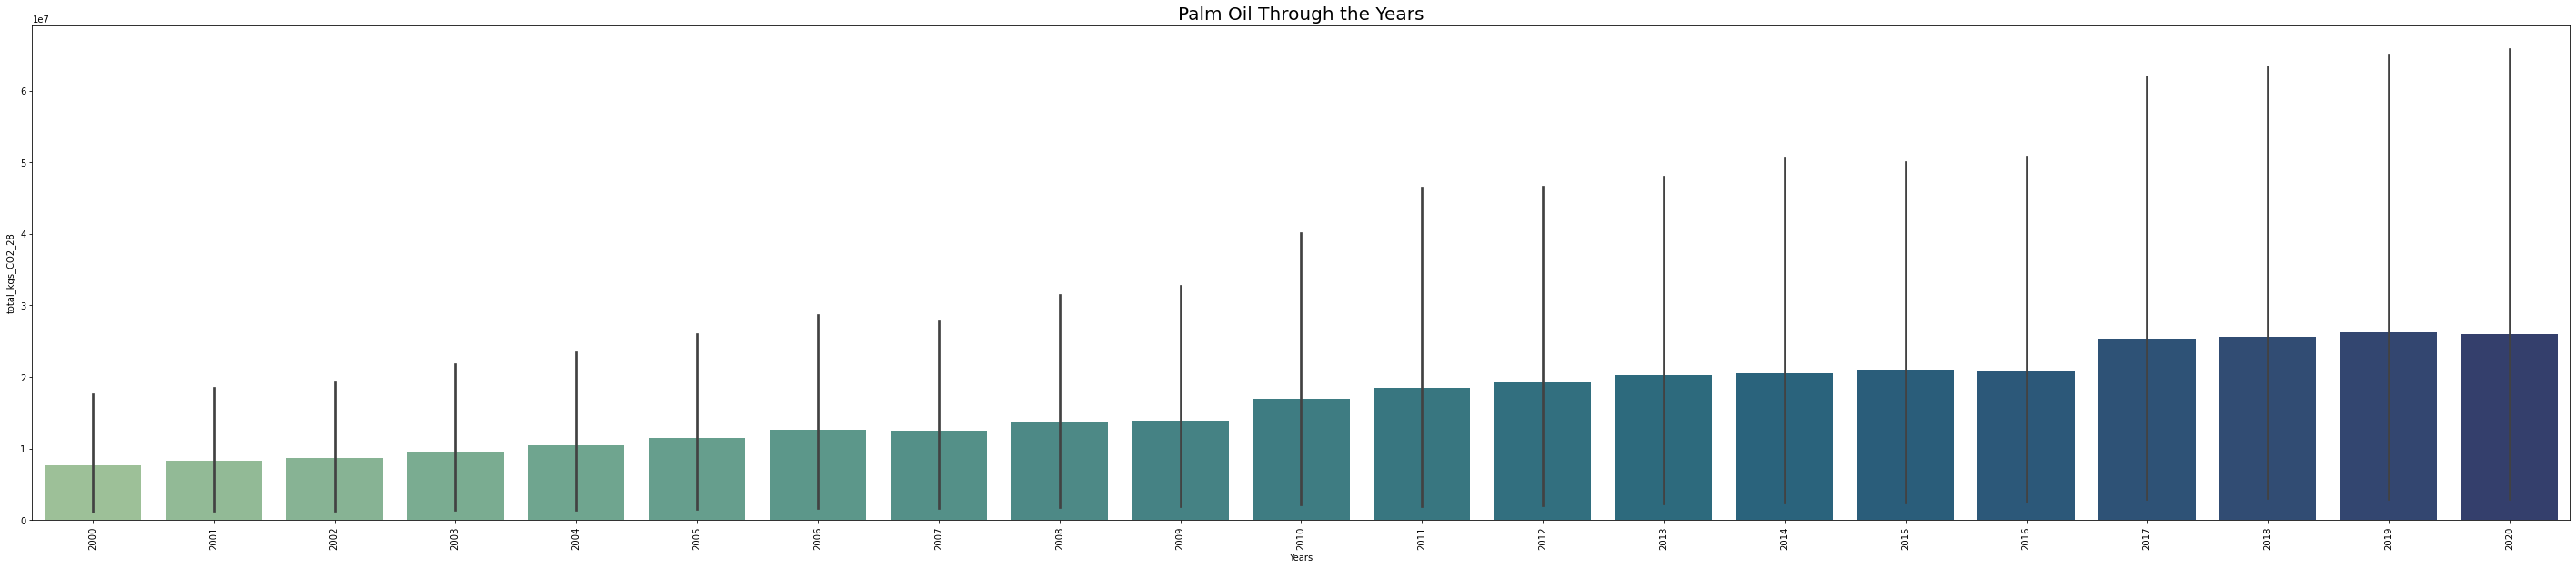

In [140]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = palm_oil['year_pc'], y = palm_oil['total_kgs_CO2_28'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_28', fontsize = 10)
ax.set_title(label = 'Palm Oil Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(palm_oil, dimensions=["year_pc", "total_kgs_CO2_28", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Peas


In [143]:
peas= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_29', 'food_product_categories_29', 'production_tonnes_29', 'total_kgs_CO2_29']]
peas.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_29 food_product_categories_29  production_tonnes_29  \
0                29                       Peas                   0.0   
1                29                       Peas                   0.0   
2                29                       Peas                   0.0   
3                29                       Peas                   0.0   
4                29                       Peas                   0.0   

   total_kgs_CO2_29  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [202]:
peas.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_29  production_tonnes_29  total_kgs_CO2_29  
count            4201.0          4.201000e+03      4.201000e+03  
mean               29.0          1.375274e+05      1.034349e+06  
std                 0.0          8.738435e+05      6.572782e+06  
min                29.0          0.000000e+00      0.000000e+00  
25%                29.0          0.000000e+00      0.000000e+00  
50%                29.0          6.220000e+02      4.677440e+03  
75%                29.0          1.902000e+04      1.430304e+05  
max                29.0          1.312000e+07      9.879808e+07

In [203]:
peas_total = peas['total_kgs_CO2_29'].sum()

print (peas_total)

4345301177.1634


In [204]:
peas[["area", "year_pc", "total_kgs_CO2_29" ]]


area  year_pc  total_kgs_CO2_29
0        Afghanistan     2000               0.0
1        Afghanistan     2001               0.0
2        Afghanistan     2002               0.0
3        Afghanistan     2003               0.0
4        Afghanistan     2004               0.0
...              ...      ...               ...
4196  Sudan (former)     2007             526.4
4197  Sudan (former)     2008             601.6
4198  Sudan (former)     2009             451.2
4199  Sudan (former)     2010            1203.2
4200  Sudan (former)     2011            1203.2

[4201 rows x 3 columns]

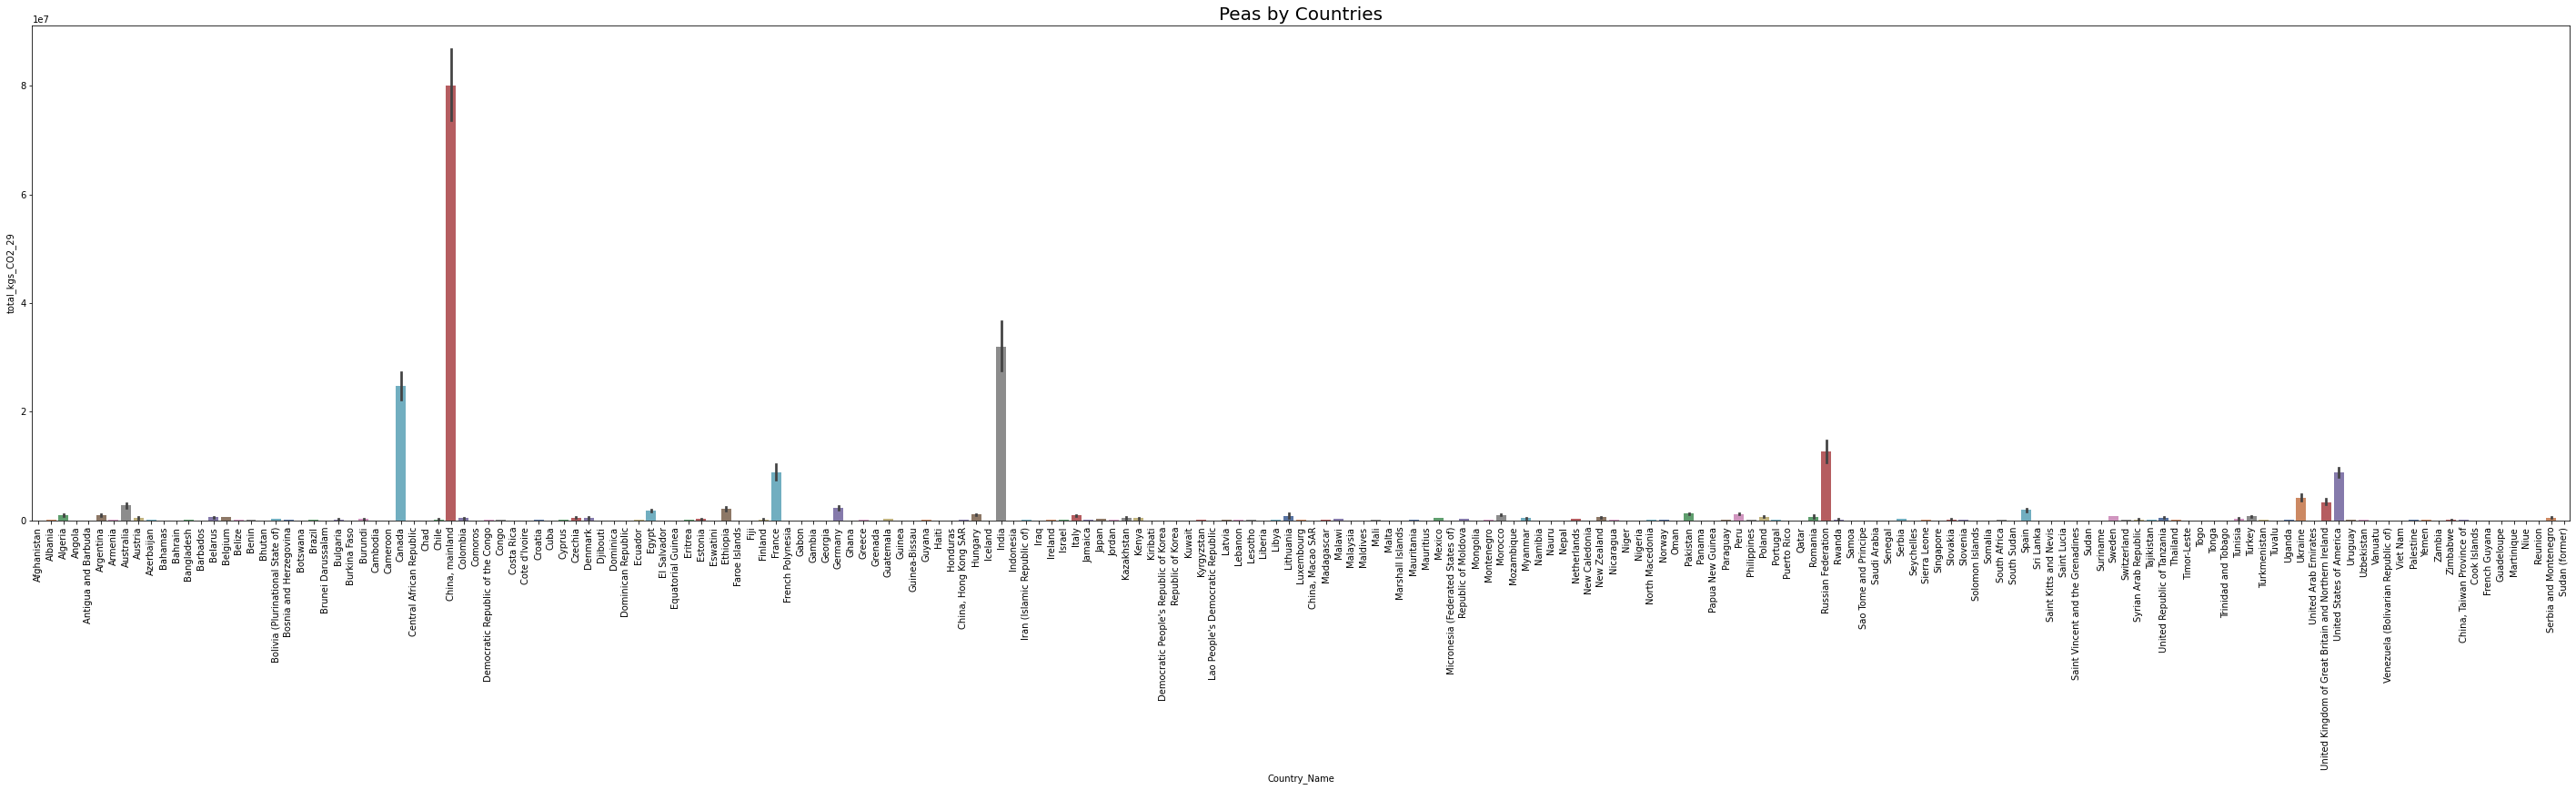

In [144]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = peas['area'], y = peas['total_kgs_CO2_29'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_29', fontsize = 10)
ax.set_title(label = 'Peas by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

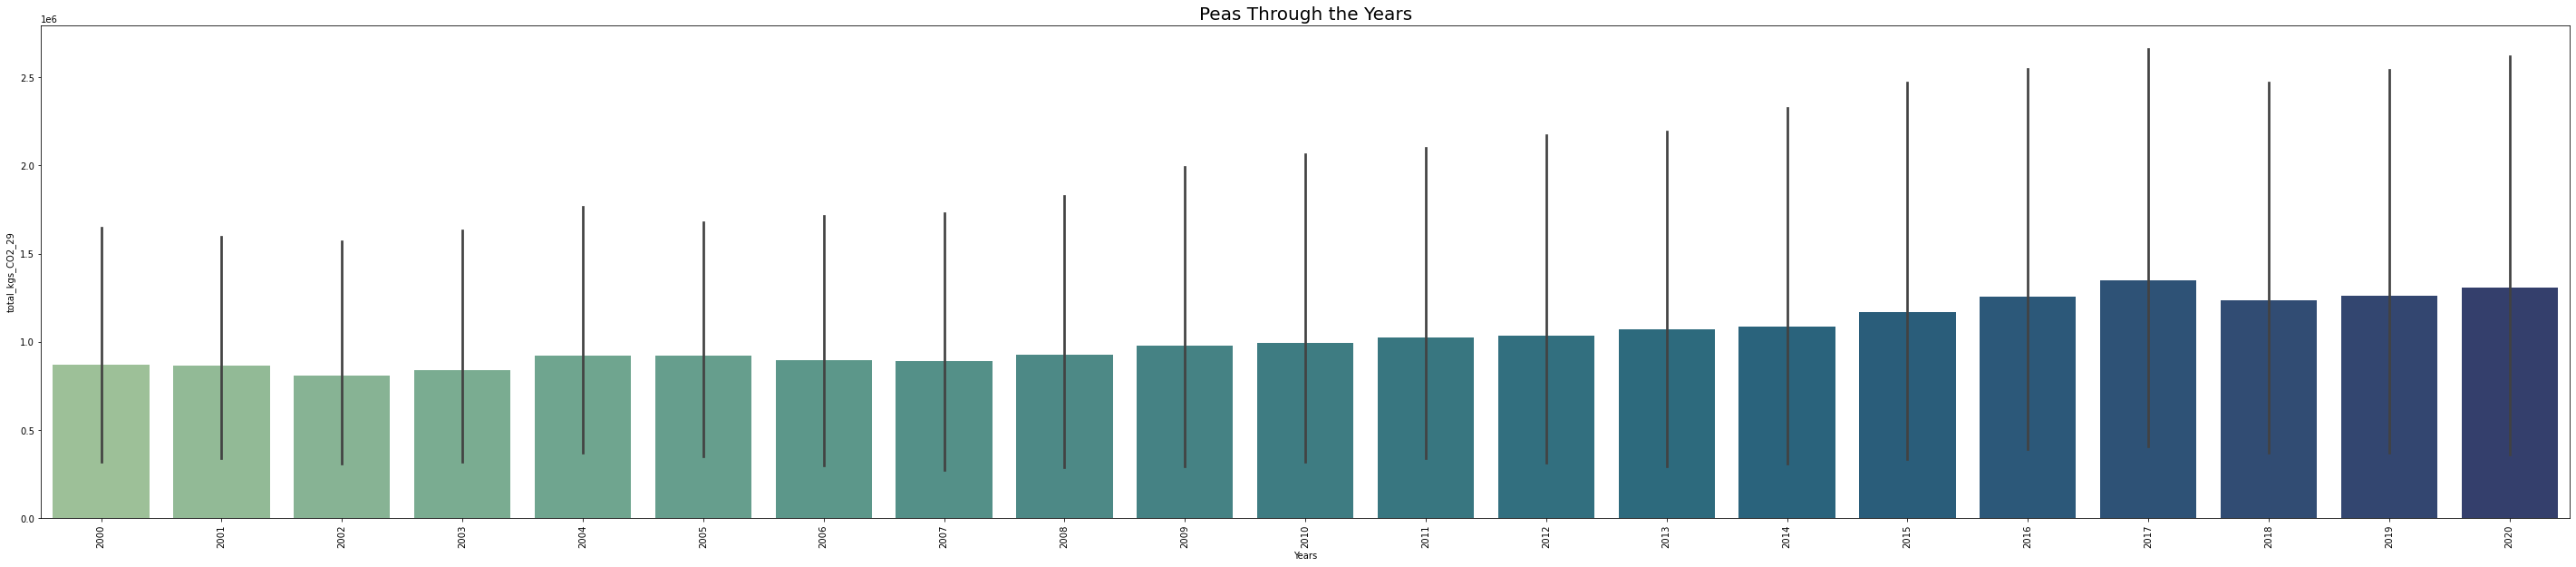

In [145]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = peas['year_pc'], y = peas['total_kgs_CO2_29'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_29', fontsize = 10)
ax.set_title(label = 'Peas Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(peas, dimensions=["year_pc", "total_kgs_CO2_29", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Pig Meat


In [147]:
pig= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_30', 'food_product_categories_30', 'production_tonnes_30', 'total_kgs_CO2_30']]
pig.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_30 food_product_categories_30  production_tonnes_30  \
0                30                   Pig Meat                   0.0   
1                30                   Pig Meat                   0.0   
2                30                   Pig Meat                   0.0   
3                30                   Pig Meat                   0.0   
4                30                   Pig Meat                   0.0   

   total_kgs_CO2_30  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [209]:
pig.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_30  production_tonnes_30  total_kgs_CO2_30  
count            4201.0          4.201000e+03      4.201000e+03  
mean               30.0          6.367098e+05      4.863454e+07  
std                 0.0          4.081675e+06      3.117627e+08  
min                30.0          0.000000e+00      0.000000e+00  
25%                30.0          5.778400e+02      4.413542e+04  
50%                30.0          1.231386e+04      9.405326e+05  
75%                30.0          1.428810e+05      1.091325e+07  
max                30.0          6.505000e+07      4.968888e+09

In [210]:
pig_total = pig['total_kgs_CO2_30'].sum()

print (pig_total)

204313698717.88937


In [211]:
pig[["area", "year_pc", "total_kgs_CO2_30" ]]

area  year_pc  total_kgs_CO2_30
0        Afghanistan     2000               0.0
1        Afghanistan     2001               0.0
2        Afghanistan     2002               0.0
3        Afghanistan     2003               0.0
4        Afghanistan     2004               0.0
...              ...      ...               ...
4196  Sudan (former)     2007               0.0
4197  Sudan (former)     2008               0.0
4198  Sudan (former)     2009               0.0
4199  Sudan (former)     2010               0.0
4200  Sudan (former)     2011               0.0

[4201 rows x 3 columns]

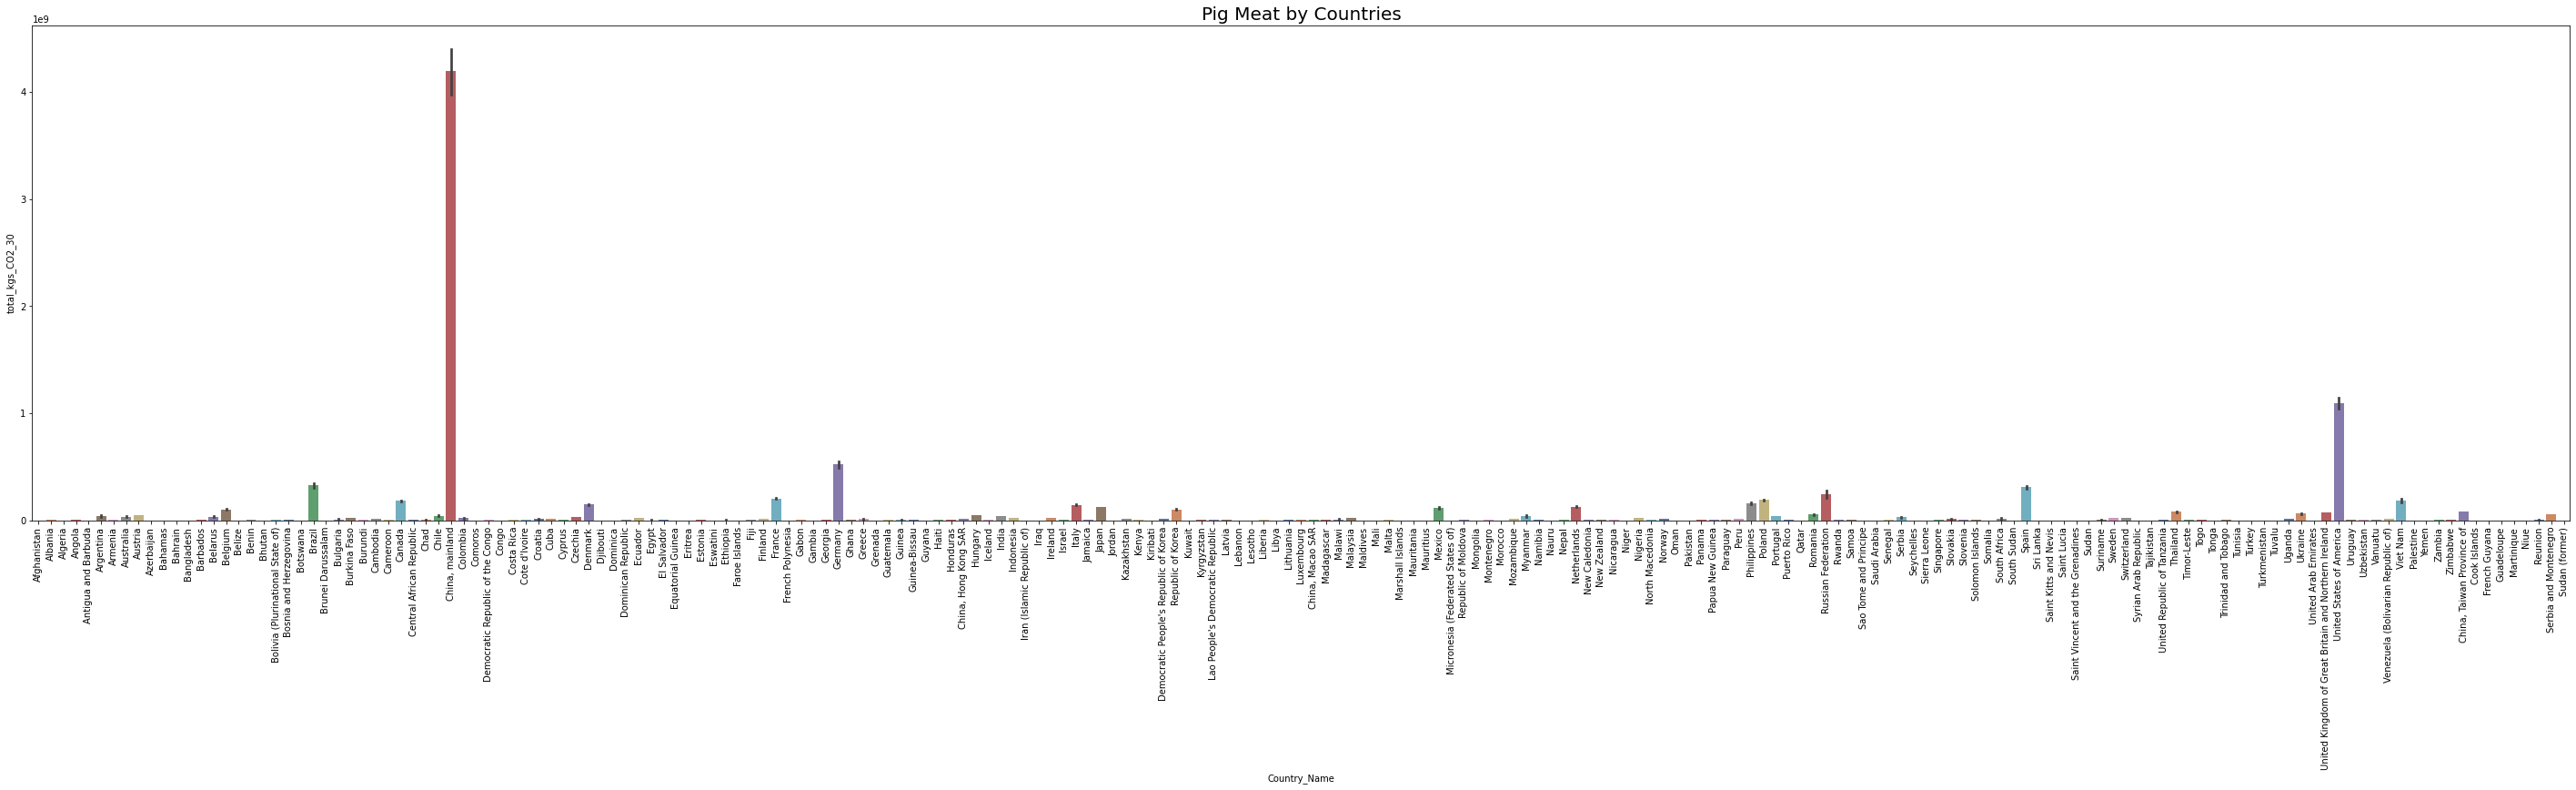

In [149]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = pig['area'], y = pig['total_kgs_CO2_30'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_30', fontsize = 10)
ax.set_title(label = 'Pig Meat by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

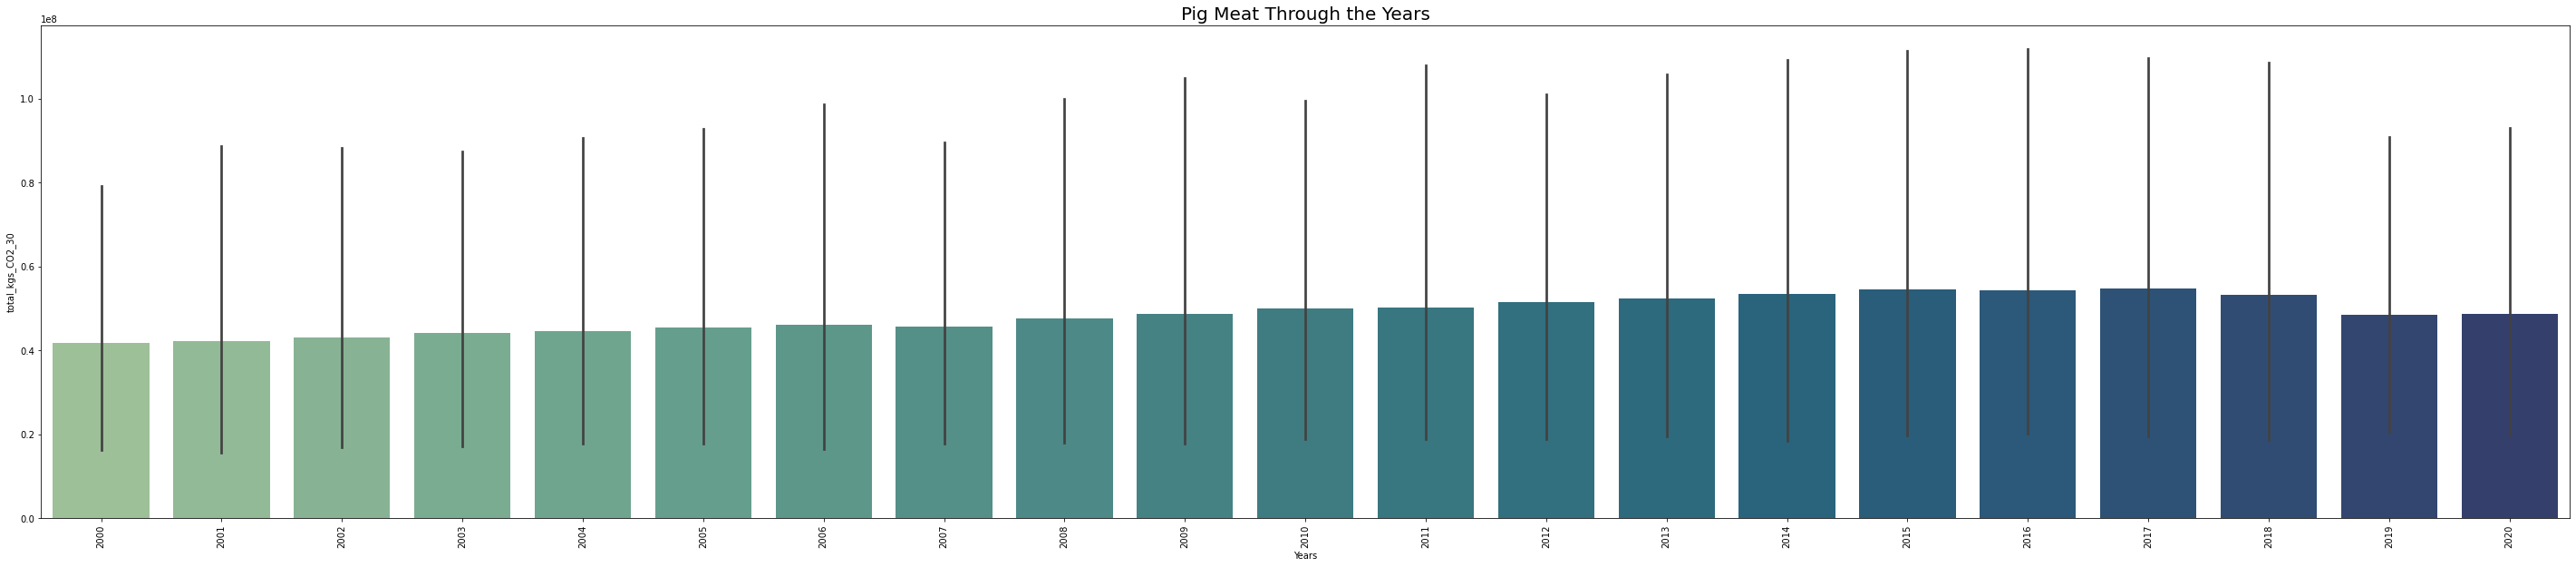

In [148]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = pig['year_pc'], y = pig['total_kgs_CO2_30'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_30', fontsize = 10)
ax.set_title(label = 'Pig Meat Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(pig, dimensions=["year_pc", "total_kgs_CO2_30", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Potatoes


In [151]:
potatoes= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_31', 'food_product_categories_31', 'production_tonnes_31', 'total_kgs_CO2_31']]
potatoes.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_31 food_product_categories_31  production_tonnes_31  \
0                31                   Potatoes              235000.0   
1                31                   Potatoes              235000.0   
2                31                   Potatoes              230000.0   
3                31                   Potatoes              350000.0   
4                31                   Potatoes              300000.0   

   total_kgs_CO2_31  
0          817800.0  
1          817800.0  
2          800400.0  
3         1218000.0  
4         1044000.0

In [216]:
potatoes.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_31  production_tonnes_31  total_kgs_CO2_31  
count            4201.0          4.201000e+03      4.201000e+03  
mean               31.0          1.705027e+06      5.933107e+06  
std                 0.0          6.814807e+06      2.371280e+07  
min                31.0          0.000000e+00      0.000000e+00  
25%                31.0          1.134000e+02      3.946320e+02  
50%                31.0          1.144780e+05      3.983834e+05  
75%                31.0          7.361980e+05      2.561969e+06  
max                31.0          9.280000e+07      3.229440e+08

In [217]:
potatoes_total = potatoes['total_kgs_CO2_31'].sum()

print (potatoes_total)

24924980968.929398


In [218]:
potatoes[["area", "year_pc", "total_kgs_CO2_31" ]]

area  year_pc  total_kgs_CO2_31
0        Afghanistan     2000          817800.0
1        Afghanistan     2001          817800.0
2        Afghanistan     2002          800400.0
3        Afghanistan     2003         1218000.0
4        Afghanistan     2004         1044000.0
...              ...      ...               ...
4196  Sudan (former)     2007          918372.0
4197  Sudan (former)     2008          988320.0
4198  Sudan (former)     2009         1047480.0
4199  Sudan (former)     2010         1096200.0
4200  Sudan (former)     2011         1169280.0

[4201 rows x 3 columns]

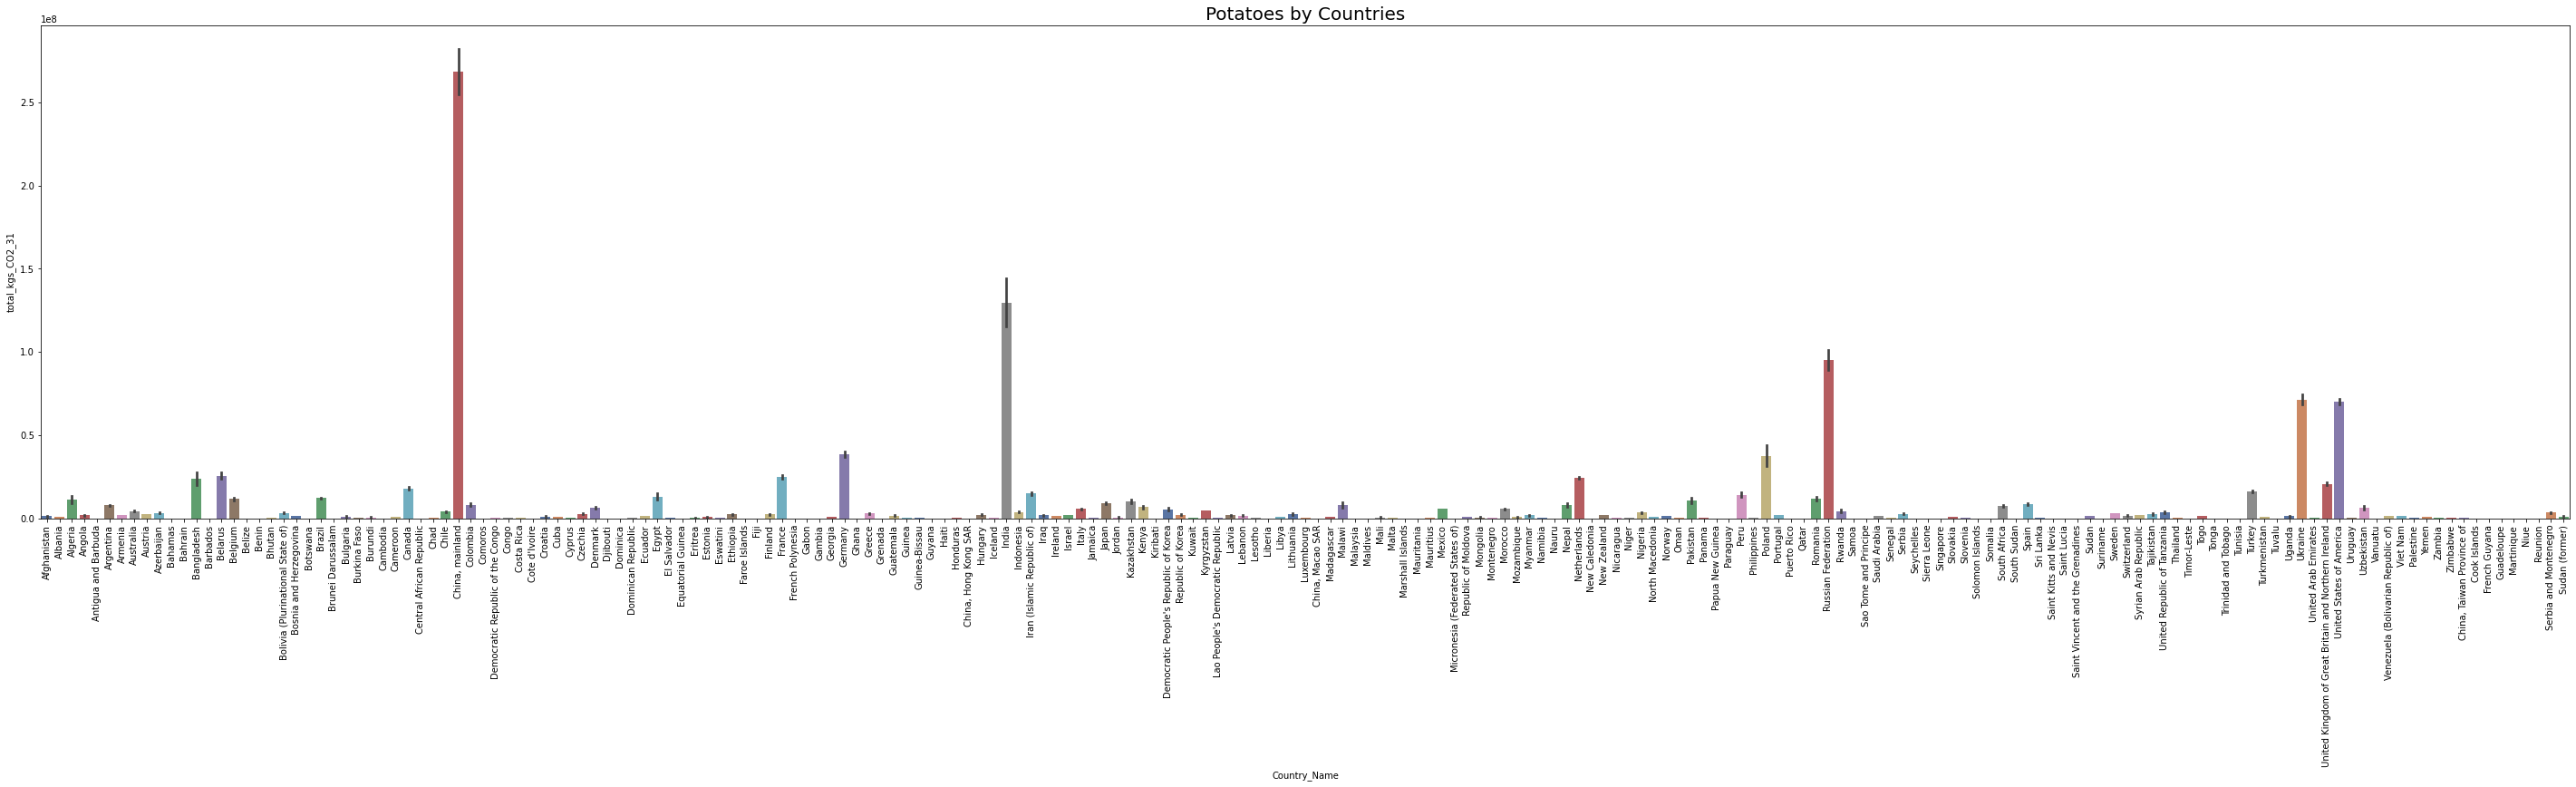

In [153]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = potatoes['area'], y = potatoes['total_kgs_CO2_31'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_31', fontsize = 10)
ax.set_title(label = 'Potatoes by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

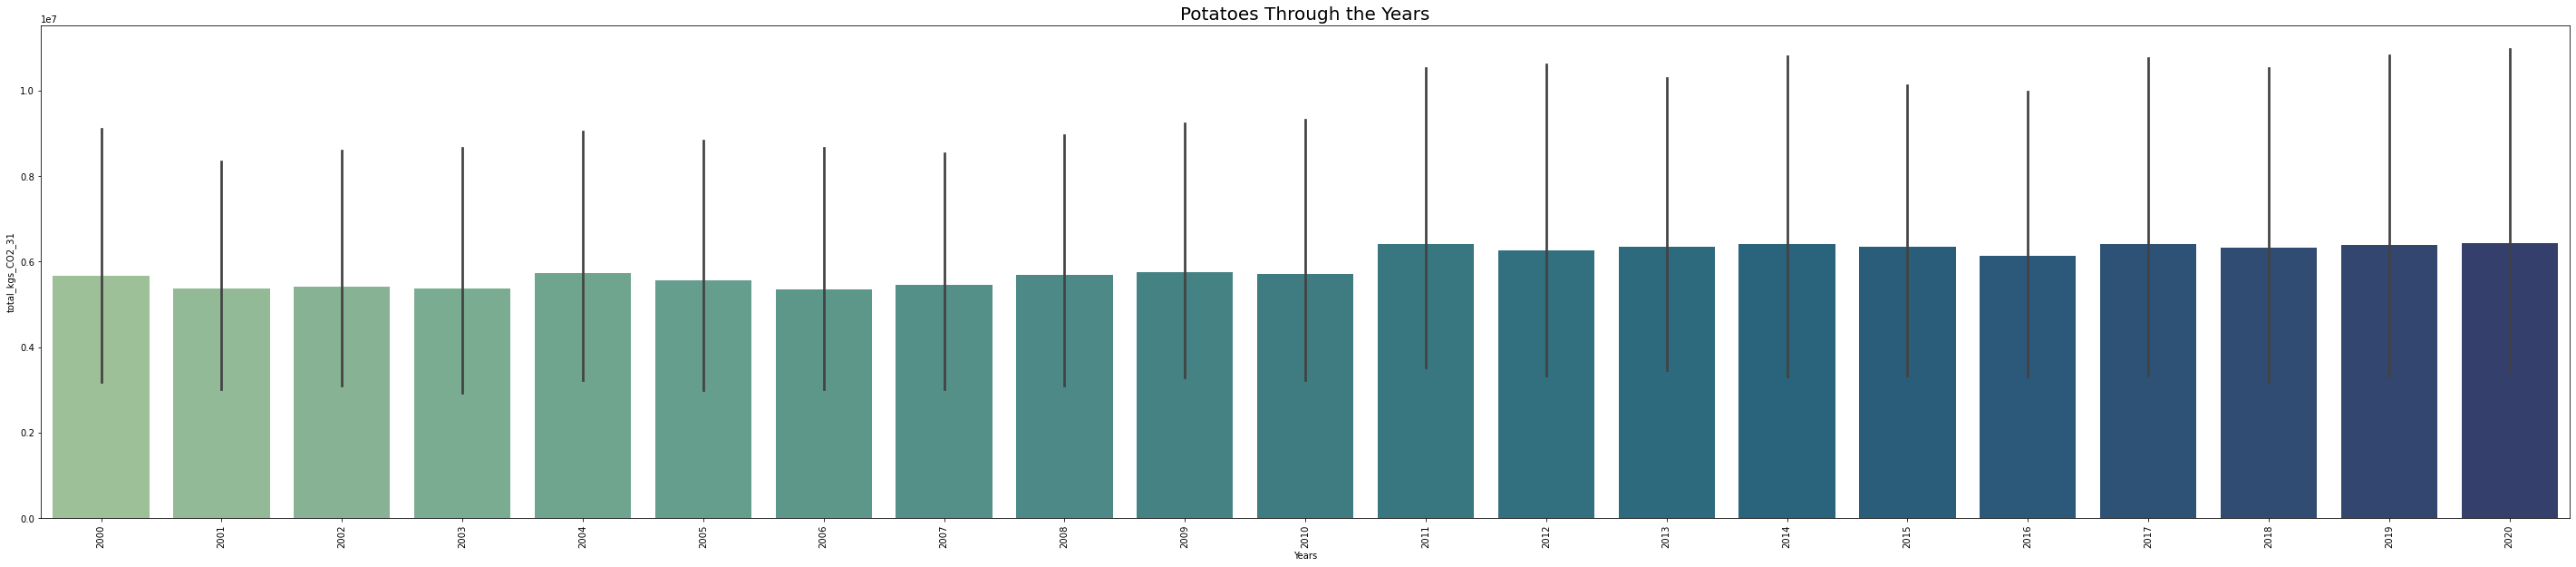

In [152]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = potatoes['year_pc'], y = potatoes['total_kgs_CO2_31'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_31', fontsize = 10)
ax.set_title(label = 'Potatoes Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(potatoes, dimensions=["year_pc", "total_kgs_CO2_31", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Poultry Meat


In [155]:
poultry= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_32', 'food_product_categories_32', 'production_tonnes_32', 'total_kgs_CO2_32']]
poultry.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_32 food_product_categories_32  production_tonnes_32  \
0                32               Poultry Meat               13200.0   
1                32               Poultry Meat               13120.0   
2                32               Poultry Meat               24000.0   
3                32               Poultry Meat               28400.0   
4                32               Poultry Meat               30800.0   

   total_kgs_CO2_32  
0          642840.0  
1          638944.0  
2         1168800.0  
3         1383080.0  
4         1499960.0

In [223]:
poultry.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_32  production_tonnes_32  total_kgs_CO2_32  
count            4201.0          4.201000e+03      4.201000e+03  
mean               32.0          5.010734e+05      2.440255e+07  
std                 0.0          2.027901e+06      9.875770e+07  
min                32.0          0.000000e+00      0.000000e+00  
25%                32.0          5.500000e+03      2.678500e+05  
50%                32.0          4.256000e+04      2.072672e+06  
75%                32.0          2.005332e+05      9.765966e+06  
max                32.0          2.362000e+07      1.149807e+09

In [224]:
poultry_total = poultry['total_kgs_CO2_32'].sum()

print (poultry_total)

102515104419.75


In [225]:
poultry[["area", "year_pc", "total_kgs_CO2_32" ]]

area  year_pc  total_kgs_CO2_32
0        Afghanistan     2000          642840.0
1        Afghanistan     2001          638944.0
2        Afghanistan     2002         1168800.0
3        Afghanistan     2003         1383080.0
4        Afghanistan     2004         1499960.0
...              ...      ...               ...
4196  Sudan (former)     2007         1314900.0
4197  Sudan (former)     2008         1314900.0
4198  Sudan (former)     2009         1363600.0
4199  Sudan (former)     2010         1850600.0
4200  Sudan (former)     2011         1948000.0

[4201 rows x 3 columns]

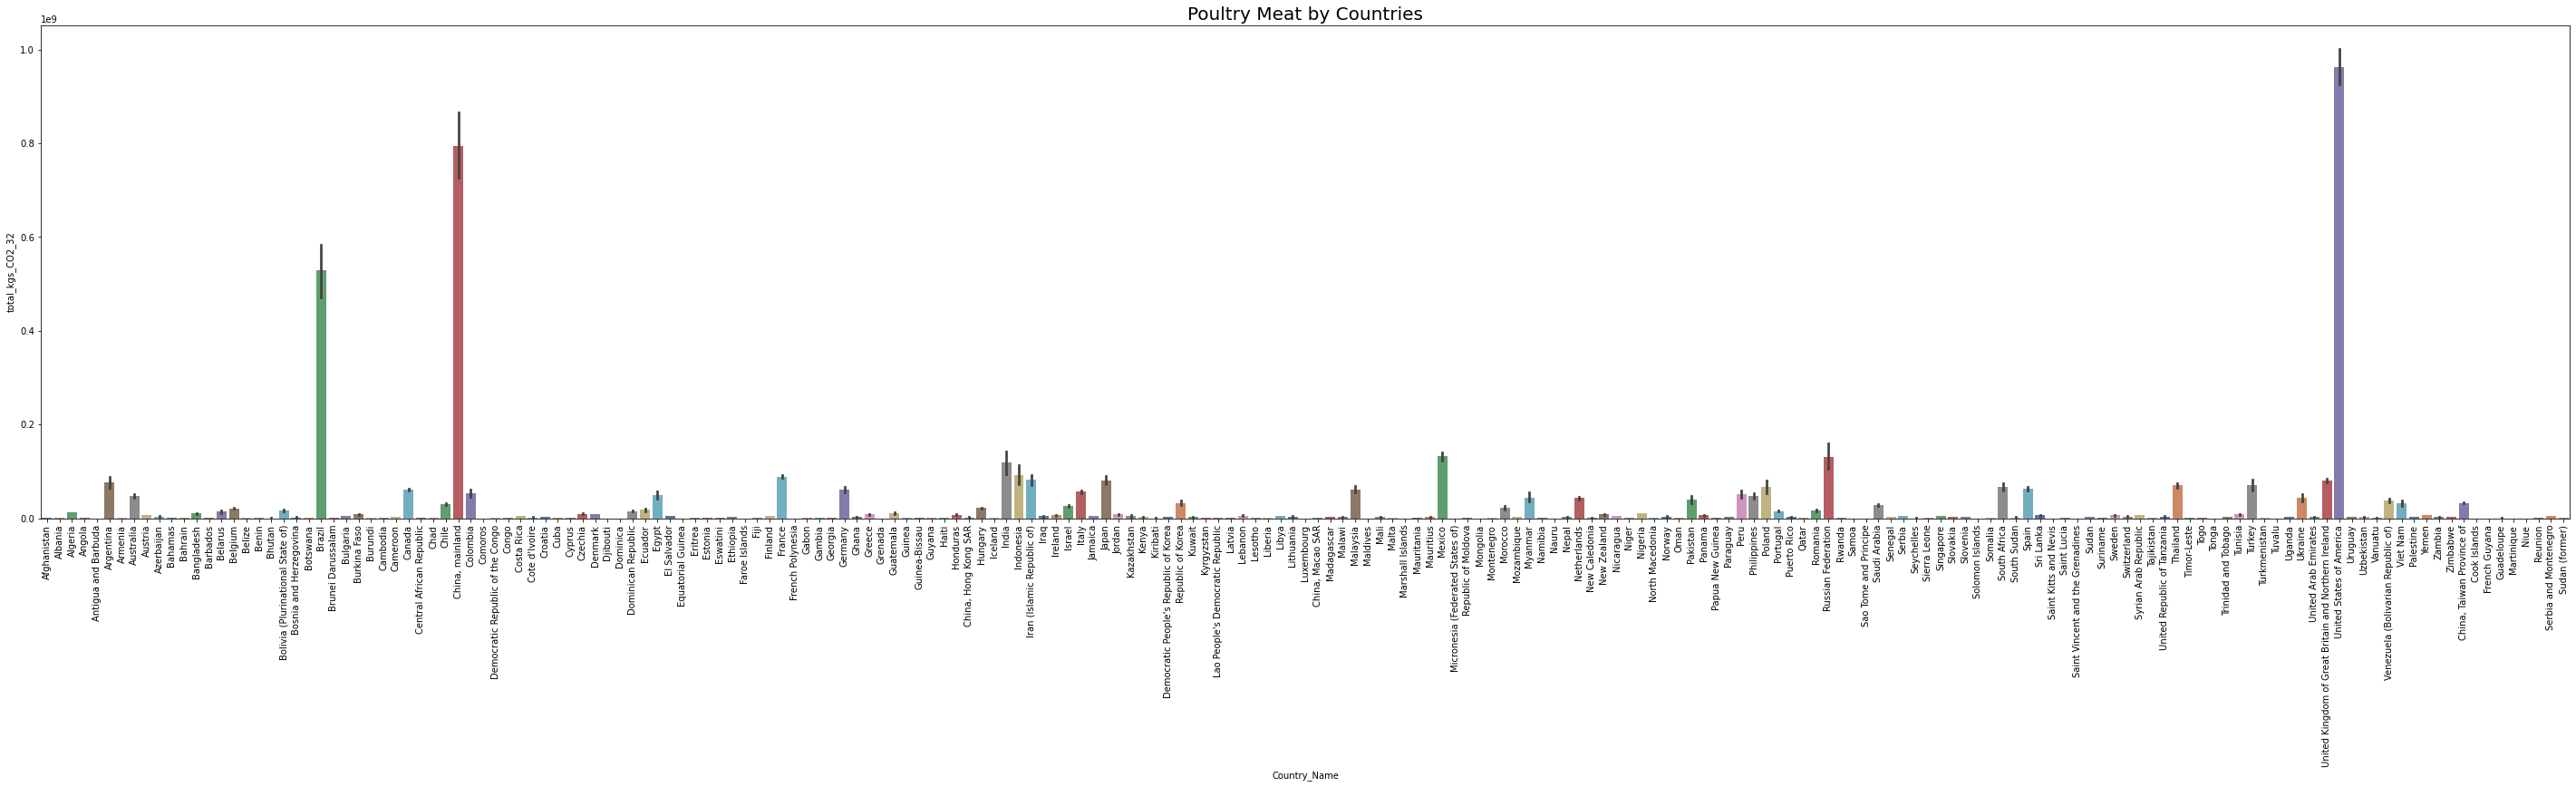

In [157]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = poultry['area'], y = poultry['total_kgs_CO2_32'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_32', fontsize = 10)
ax.set_title(label = 'Poultry Meat by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

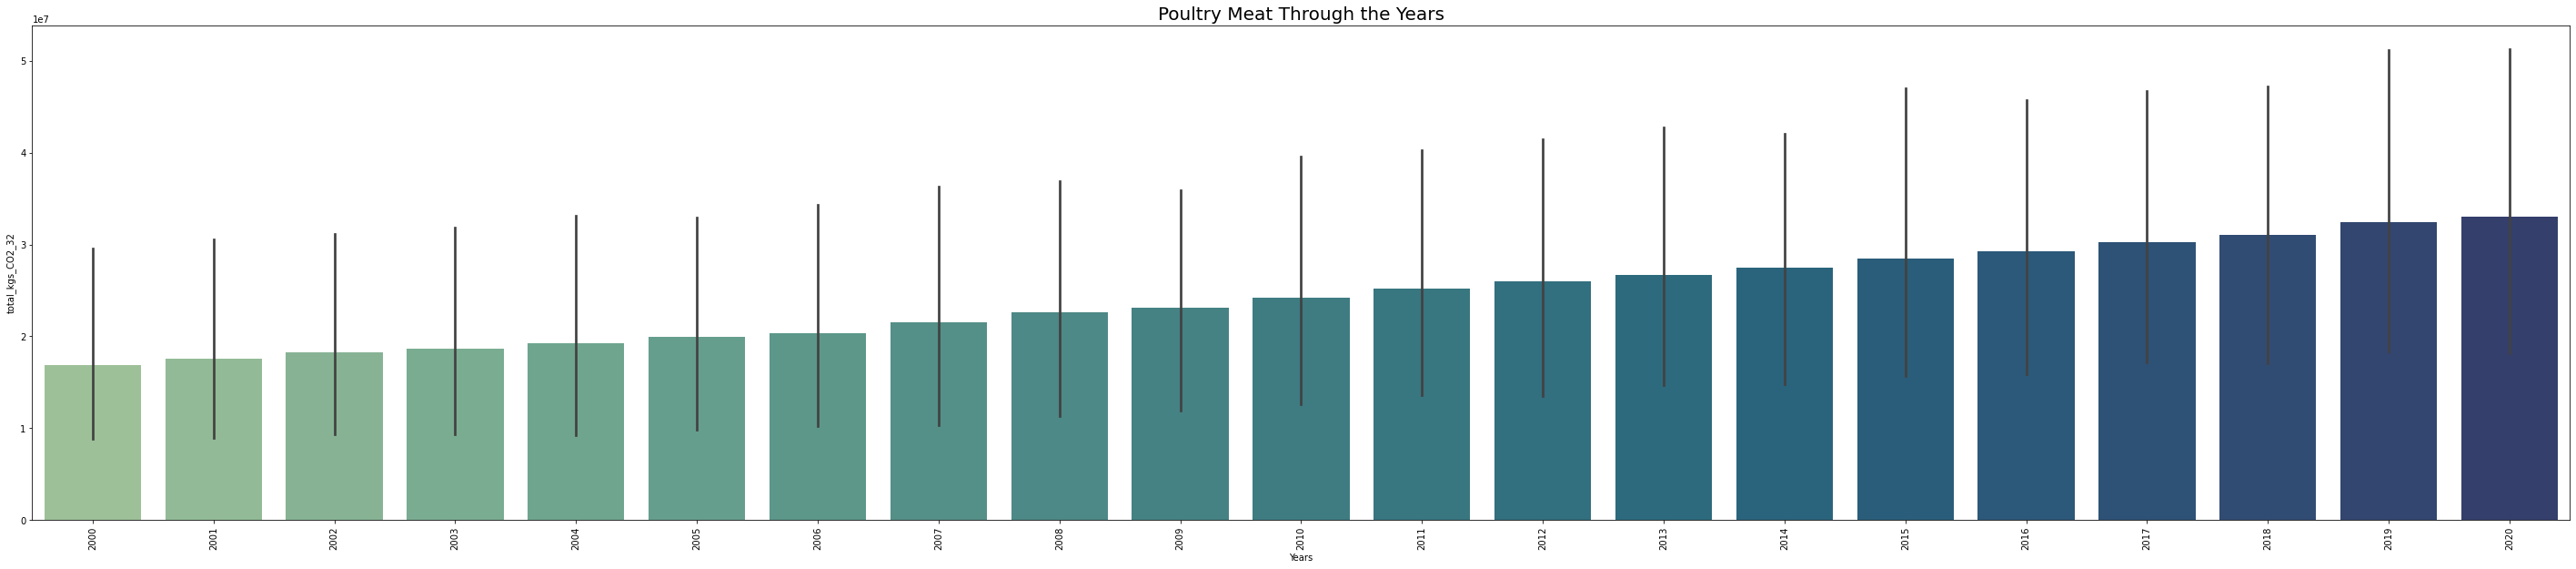

In [158]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = poultry['year_pc'], y = poultry['total_kgs_CO2_32'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_32', fontsize = 10)
ax.set_title(label = 'Poultry Meat Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(poultry, dimensions=["year_pc", "total_kgs_CO2_32", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Rapeseed Oil


In [160]:
rapeseed_oil= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_33', 'food_product_categories_33', 'production_tonnes_33', 'total_kgs_CO_33']]
rapeseed_oil.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_33 food_product_categories_33  production_tonnes_33  \
0                33               Rapeseed Oil                   0.0   
1                33               Rapeseed Oil                   0.0   
2                33               Rapeseed Oil                   0.0   
3                33               Rapeseed Oil                   0.0   
4                33               Rapeseed Oil                   0.0   

   total_kgs_CO_33  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [231]:
rapeseed_oil.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_33  production_tonnes_33  total_kgs_CO_33  
count            4201.0          4.201000e+03     4.201000e+03  
mean               33.0          4.661183e+05     8.942863e+06  
std                 0.0          2.059577e+06     3.951008e+07  
min                33.0          0.000000e+00     0.000000e+00  
25%                33.0          0.000000e+00     0.000000e+00  
50%                33.0          0.000000e+00     0.000000e+00  
75%                33.0          6.480326e+04     1.243575e+06  
max                33.0          2.545373e+07     4.889143e+08

In [232]:
rapeseed_oil_total = rapeseed_oil['total_kgs_CO_33'].sum()

print (rapeseed_oil_total)

37568966230.8618


In [233]:
rapeseed_oil[["area", "year_pc", "total_kgs_CO_33" ]]

area  year_pc  total_kgs_CO_33
0        Afghanistan     2000              0.0
1        Afghanistan     2001              0.0
2        Afghanistan     2002              0.0
3        Afghanistan     2003              0.0
4        Afghanistan     2004              0.0
...              ...      ...              ...
4196  Sudan (former)     2007              0.0
4197  Sudan (former)     2008              0.0
4198  Sudan (former)     2009              0.0
4199  Sudan (former)     2010              0.0
4200  Sudan (former)     2011              0.0

[4201 rows x 3 columns]

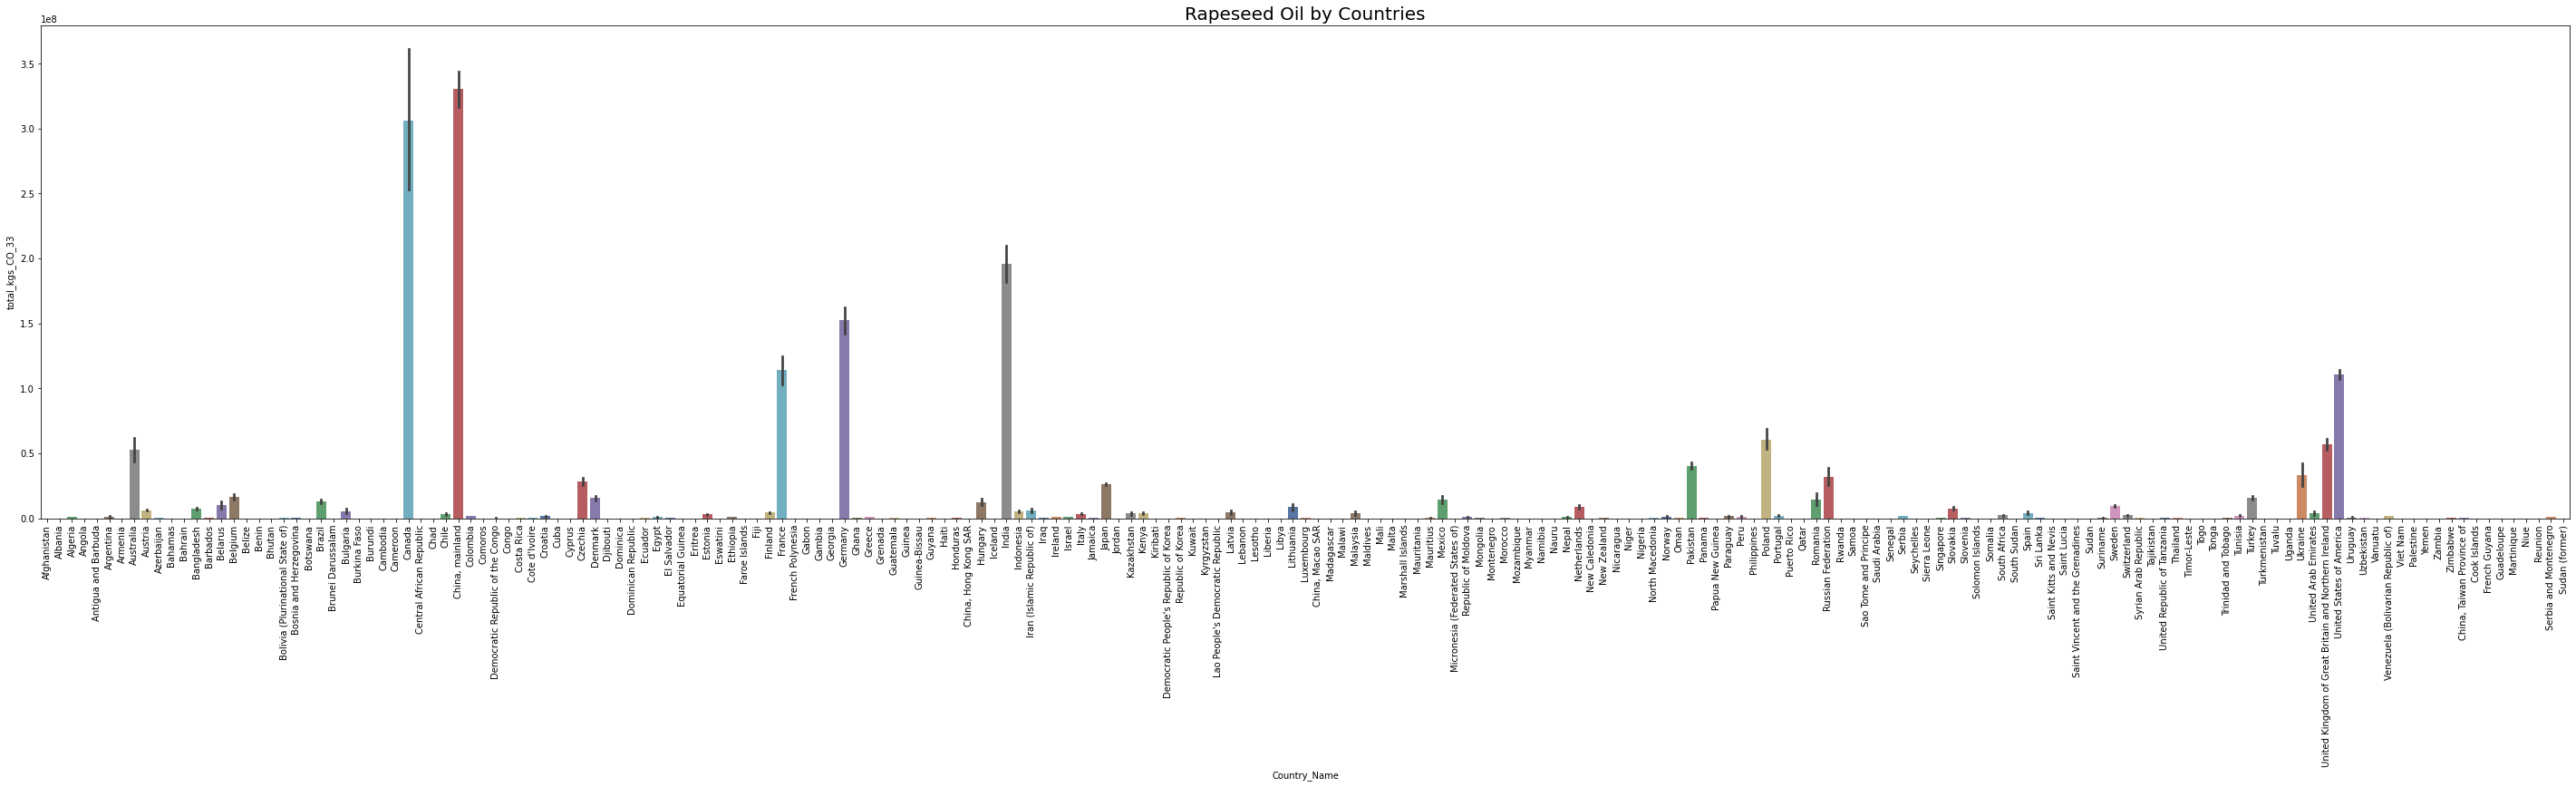

In [161]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = rapeseed_oil['area'], y = rapeseed_oil['total_kgs_CO_33'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO_33', fontsize = 10)
ax.set_title(label = 'Rapeseed Oil by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

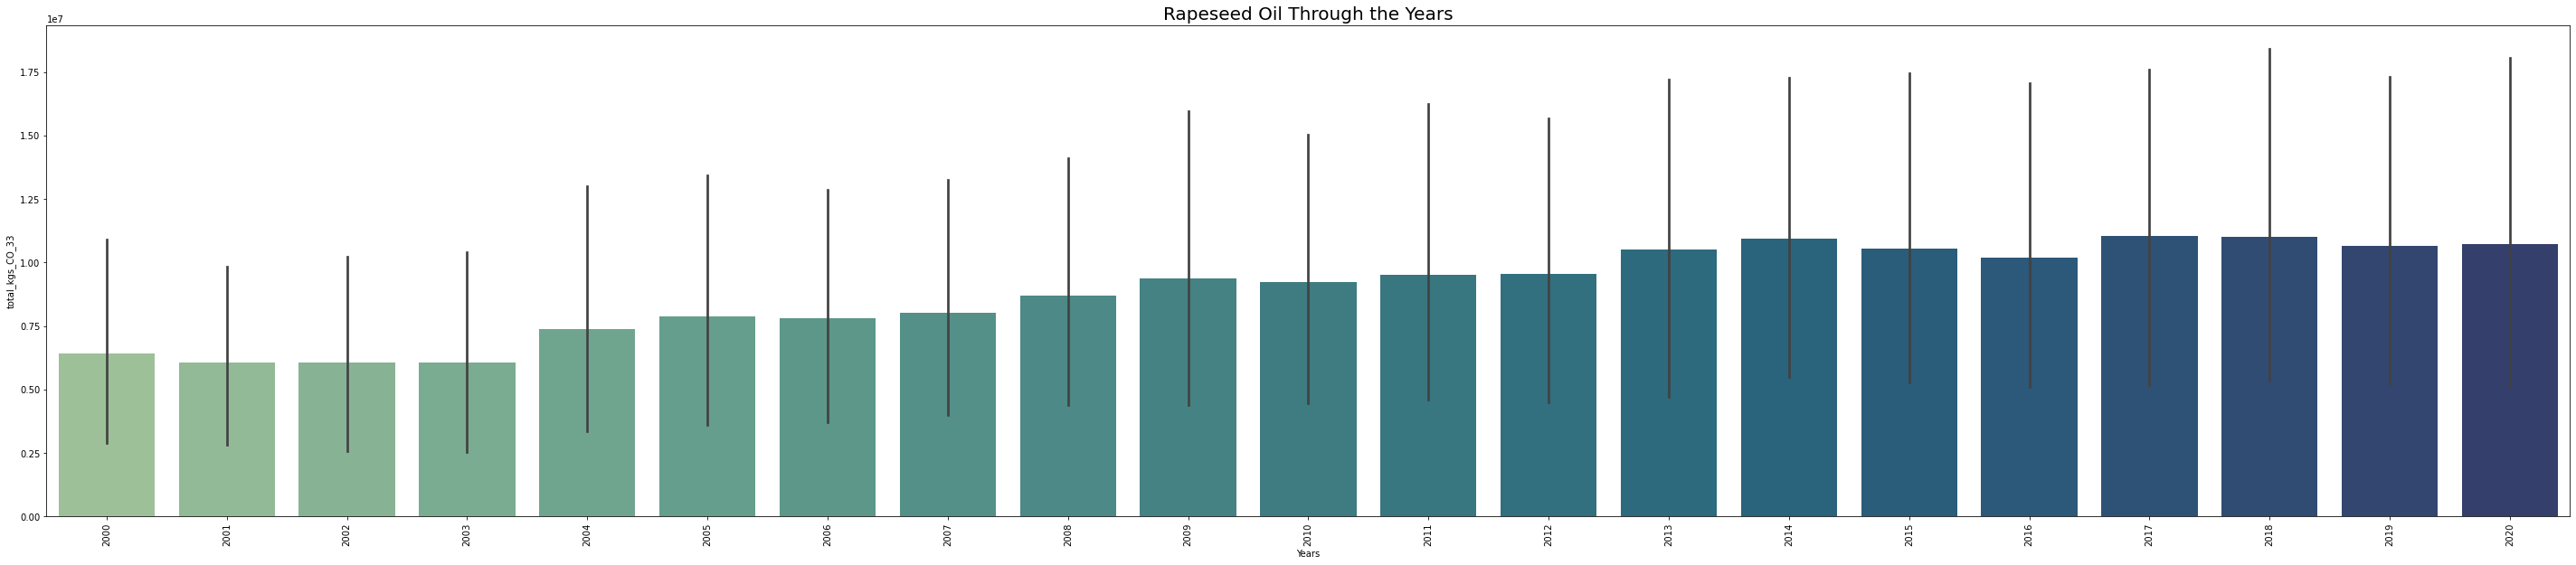

In [162]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = rapeseed_oil['year_pc'], y = rapeseed_oil['total_kgs_CO_33'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO_33', fontsize = 10)
ax.set_title(label = 'Rapeseed Oil Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(rapeseed_oil, dimensions=["year_pc", "total_kgs_CO_33", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Rice


In [164]:
rice= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_34', 'food_product_categories_34', 'production_tonnes_34', 'total_kgs_CO2_34']]
rice.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_34 food_product_categories_34  production_tonnes_34  \
0                34                       Rice              260000.0   
1                34                       Rice              242000.0   
2                34                       Rice              388000.0   
3                34                       Rice              434000.0   
4                34                       Rice              463000.0   

   total_kgs_CO2_34  
0         9118200.0  
1         8486940.0  
2        13607160.0  
3        15220380.0  
4        16237410.0

In [238]:
rice.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_34  production_tonnes_34  total_kgs_CO2_34  
count            4201.0          4.201000e+03      4.201000e+03  
mean               34.0          3.421255e+06      1.199371e+08  
std                 0.0          1.849959e+07      6.483535e+08  
min                34.0          0.000000e+00      0.000000e+00  
25%                34.0          0.000000e+00      0.000000e+00  
50%                34.0          8.308000e+03      2.913616e+05  
75%                34.0          3.161800e+05      1.108843e+07  
max                34.0          2.130000e+08      7.458544e+09

In [239]:
rice_total = rice['total_kgs_CO2_34'].sum()

print (rice_total)

503855699293.96893


In [240]:
rice[["area", "year_pc", "total_kgs_CO2_34" ]]

area  year_pc  total_kgs_CO2_34
0        Afghanistan     2000         9118200.0
1        Afghanistan     2001         8486940.0
2        Afghanistan     2002        13607160.0
3        Afghanistan     2003        15220380.0
4        Afghanistan     2004        16237410.0
...              ...      ...               ...
4196  Sudan (former)     2007          806610.0
4197  Sudan (former)     2008         1052100.0
4198  Sudan (former)     2009          789075.0
4199  Sudan (former)     2010          818884.5
4200  Sudan (former)     2011          876750.0

[4201 rows x 3 columns]

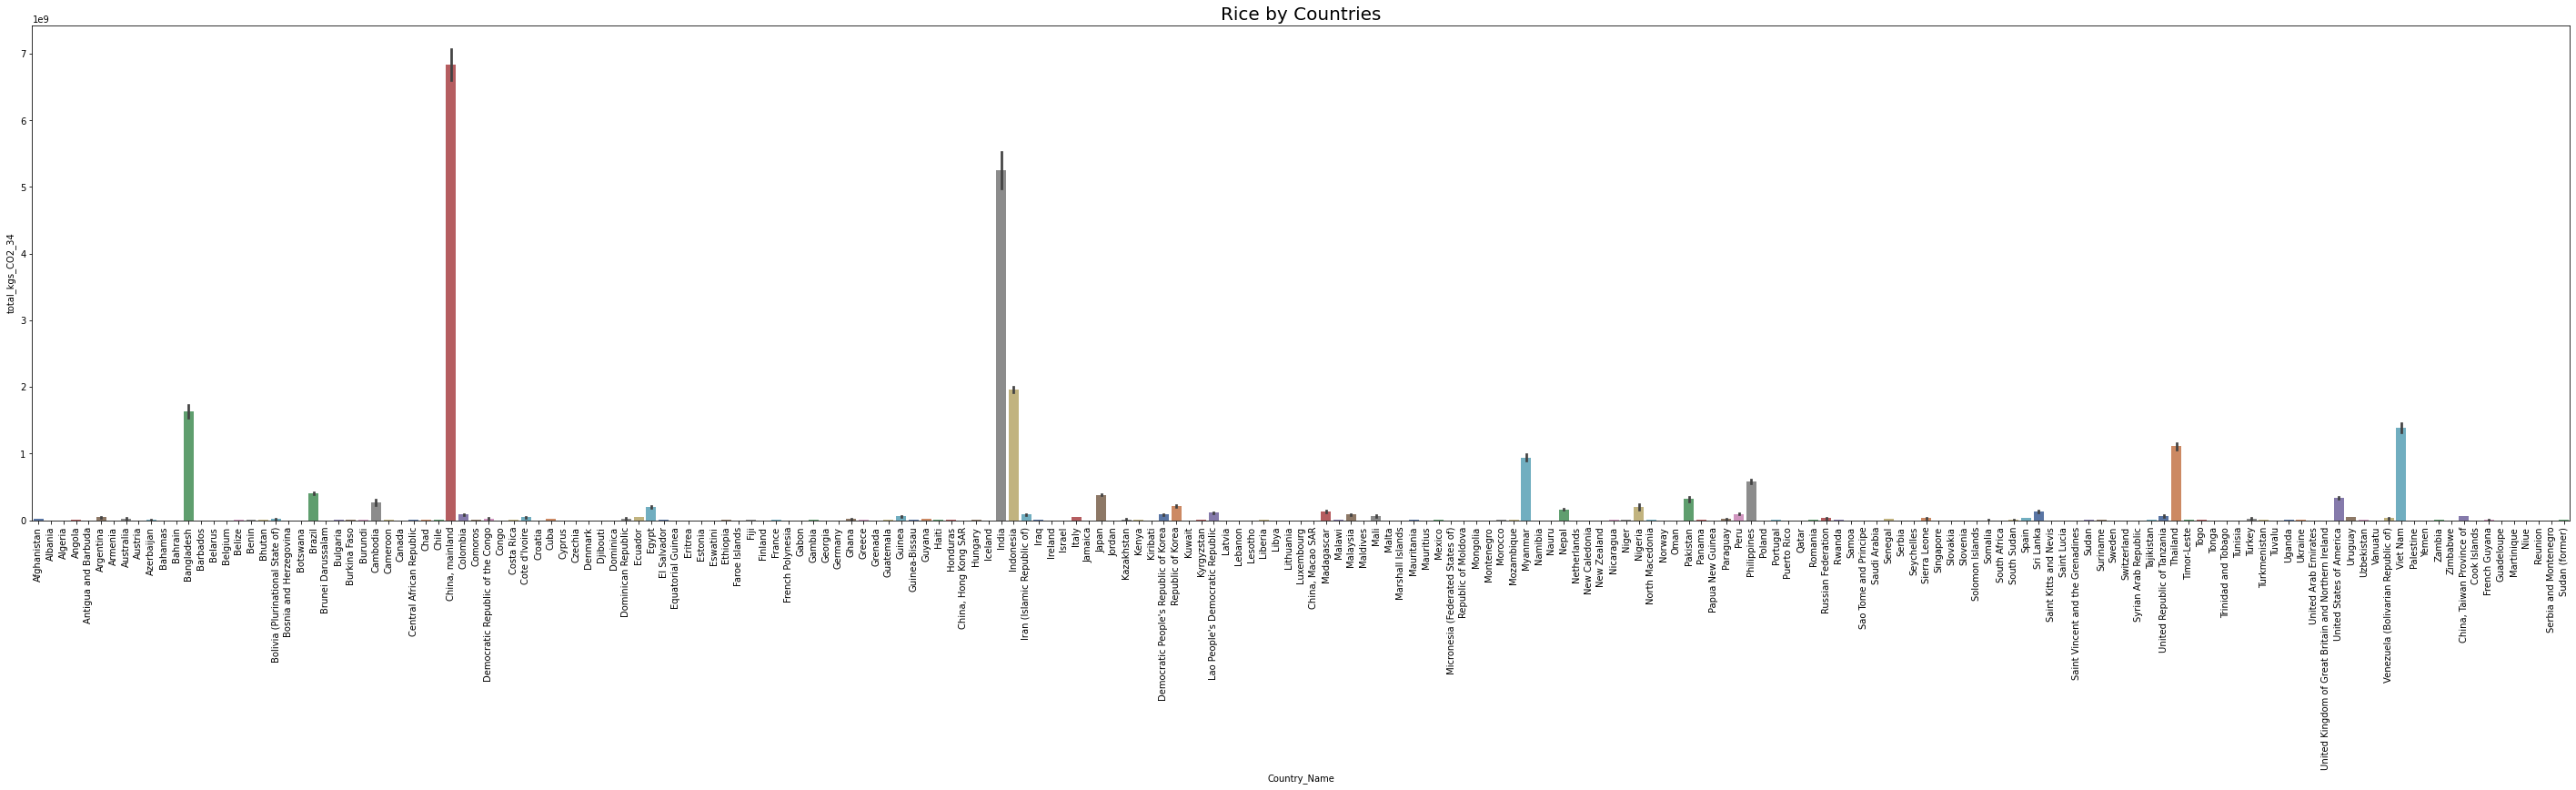

In [165]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = rice['area'], y = rice['total_kgs_CO2_34'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_34', fontsize = 10)
ax.set_title(label = 'Rice by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

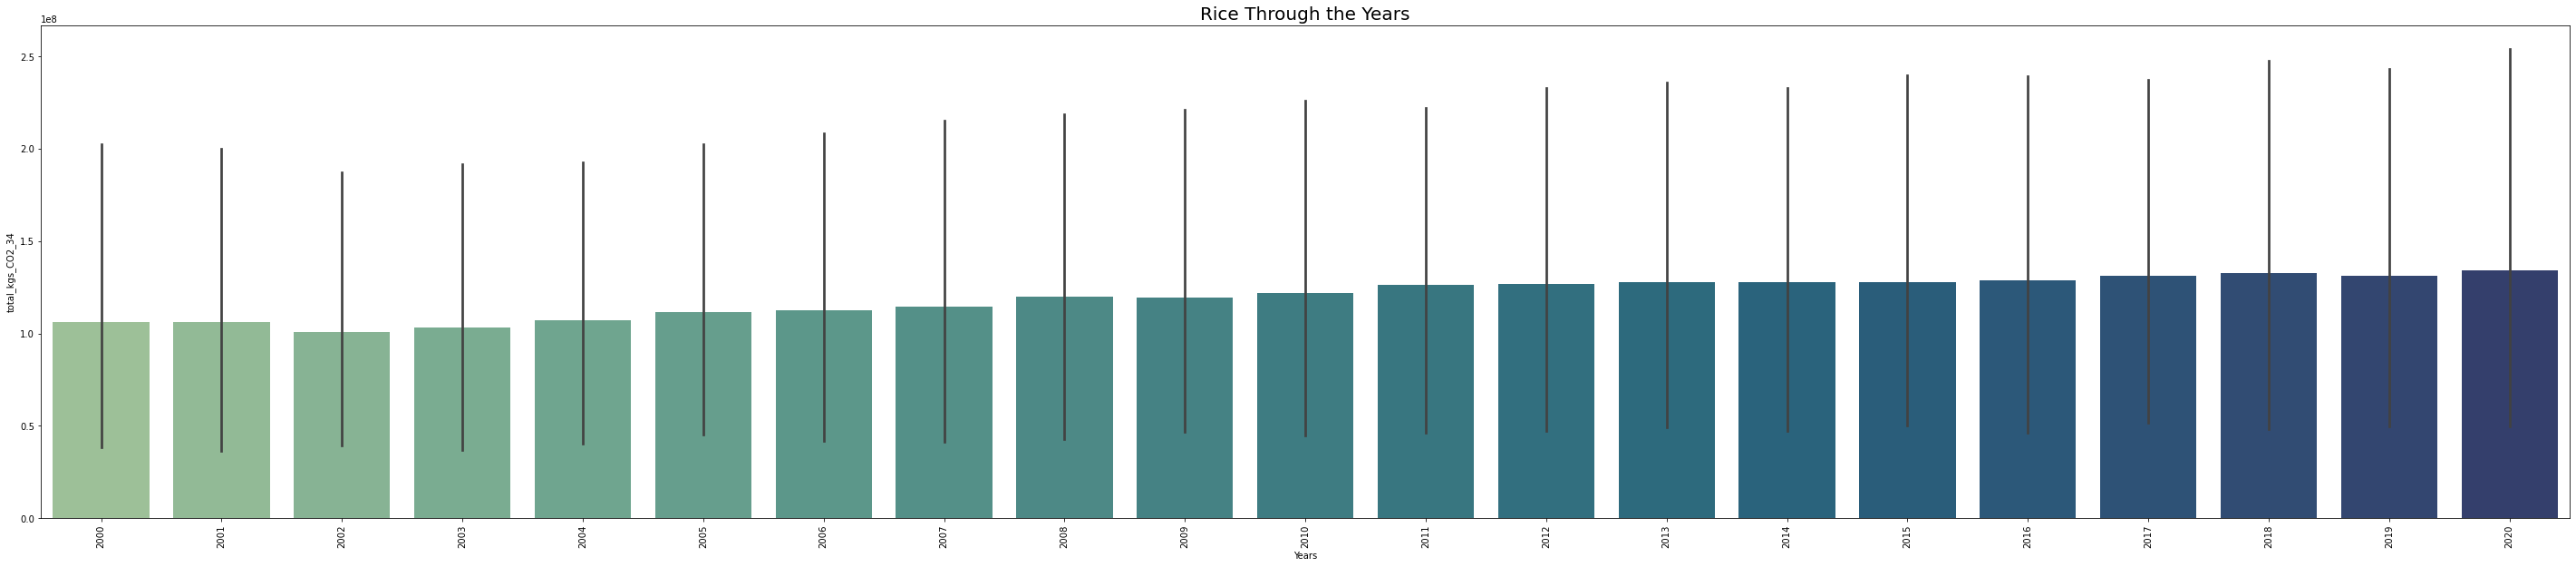

In [166]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = rice['year_pc'], y = rice['total_kgs_CO2_34'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_34', fontsize = 10)
ax.set_title(label = 'Rice Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(rice, dimensions=["year_pc", "total_kgs_CO2_34", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Root Vegetables


In [168]:
root_veg= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_35', 'food_product_categories_35', 'production_tonnes_35', 'total_kgs_CO2_35']]
root_veg.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_35 food_product_categories_35  production_tonnes_35  \
0                35            Root Vegetables                   0.0   
1                35            Root Vegetables                   0.0   
2                35            Root Vegetables                   0.0   
3                35            Root Vegetables                   0.0   
4                35            Root Vegetables                   0.0   

   total_kgs_CO2_35  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [245]:
root_veg.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_35  production_tonnes_35  total_kgs_CO2_35  
count            4201.0          4.201000e+03      4.201000e+03  
mean               35.0          1.078973e+06      1.736590e+06  
std                 0.0          7.339825e+06      1.180780e+07  
min                35.0          0.000000e+00      0.000000e+00  
25%                35.0          8.272360e+03      1.331850e+04  
50%                35.0          6.831001e+04      1.099791e+05  
75%                35.0          4.260380e+05      6.859212e+05  
max                35.0          1.253098e+08      2.017246e+08

In [246]:
root_veg_total = root_veg['total_kgs_CO2_35'].sum()

print (root_veg_total)

7295413902.4751005


In [247]:
root_veg[["area", "year_pc", "total_kgs_CO2_35" ]]

area  year_pc  total_kgs_CO2_35
0        Afghanistan     2000              0.00
1        Afghanistan     2001              0.00
2        Afghanistan     2002              0.00
3        Afghanistan     2003              0.00
4        Afghanistan     2004              0.00
...              ...      ...               ...
4196  Sudan (former)     2007         461266.61
4197  Sudan (former)     2008         491143.38
4198  Sudan (former)     2009         599398.17
4199  Sudan (former)     2010         615986.00
4200  Sudan (former)     2011         616876.33

[4201 rows x 3 columns]

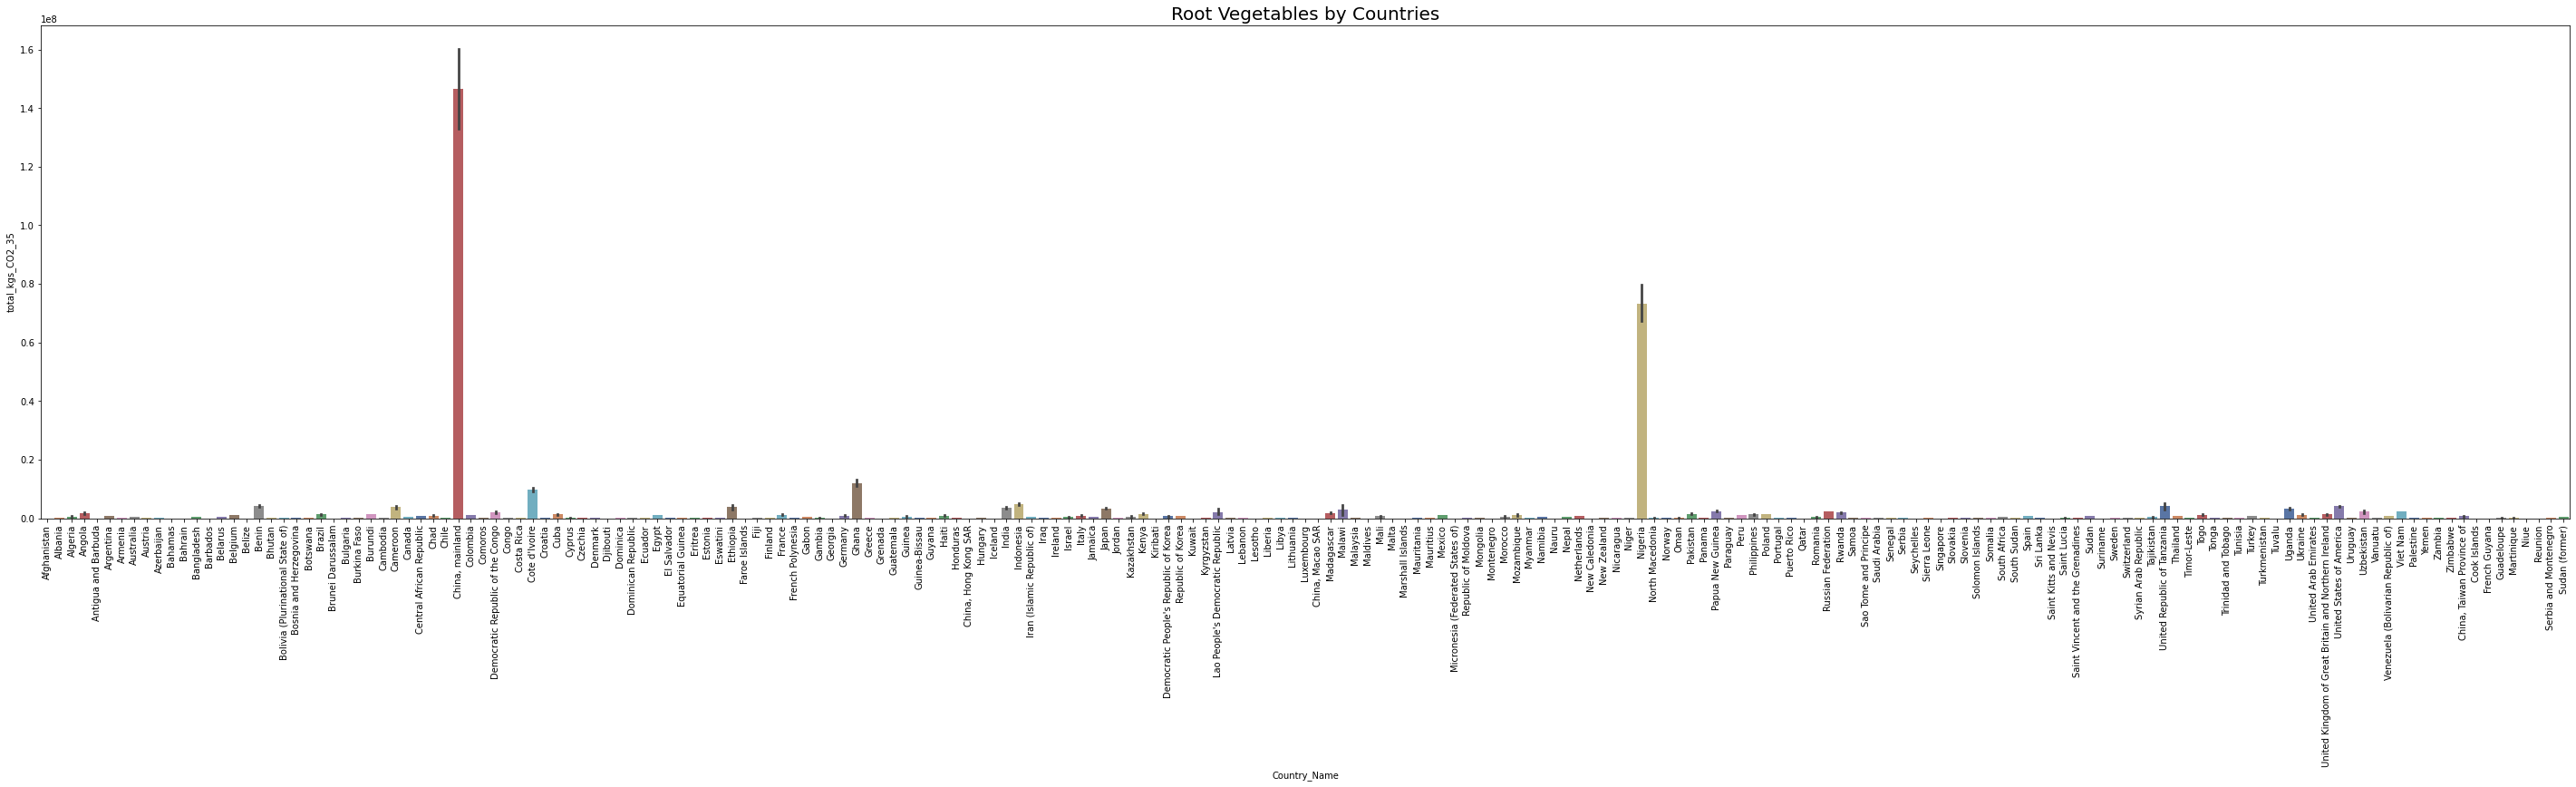

In [169]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = root_veg['area'], y = root_veg['total_kgs_CO2_35'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_35', fontsize = 10)
ax.set_title(label = 'Root Vegetables by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

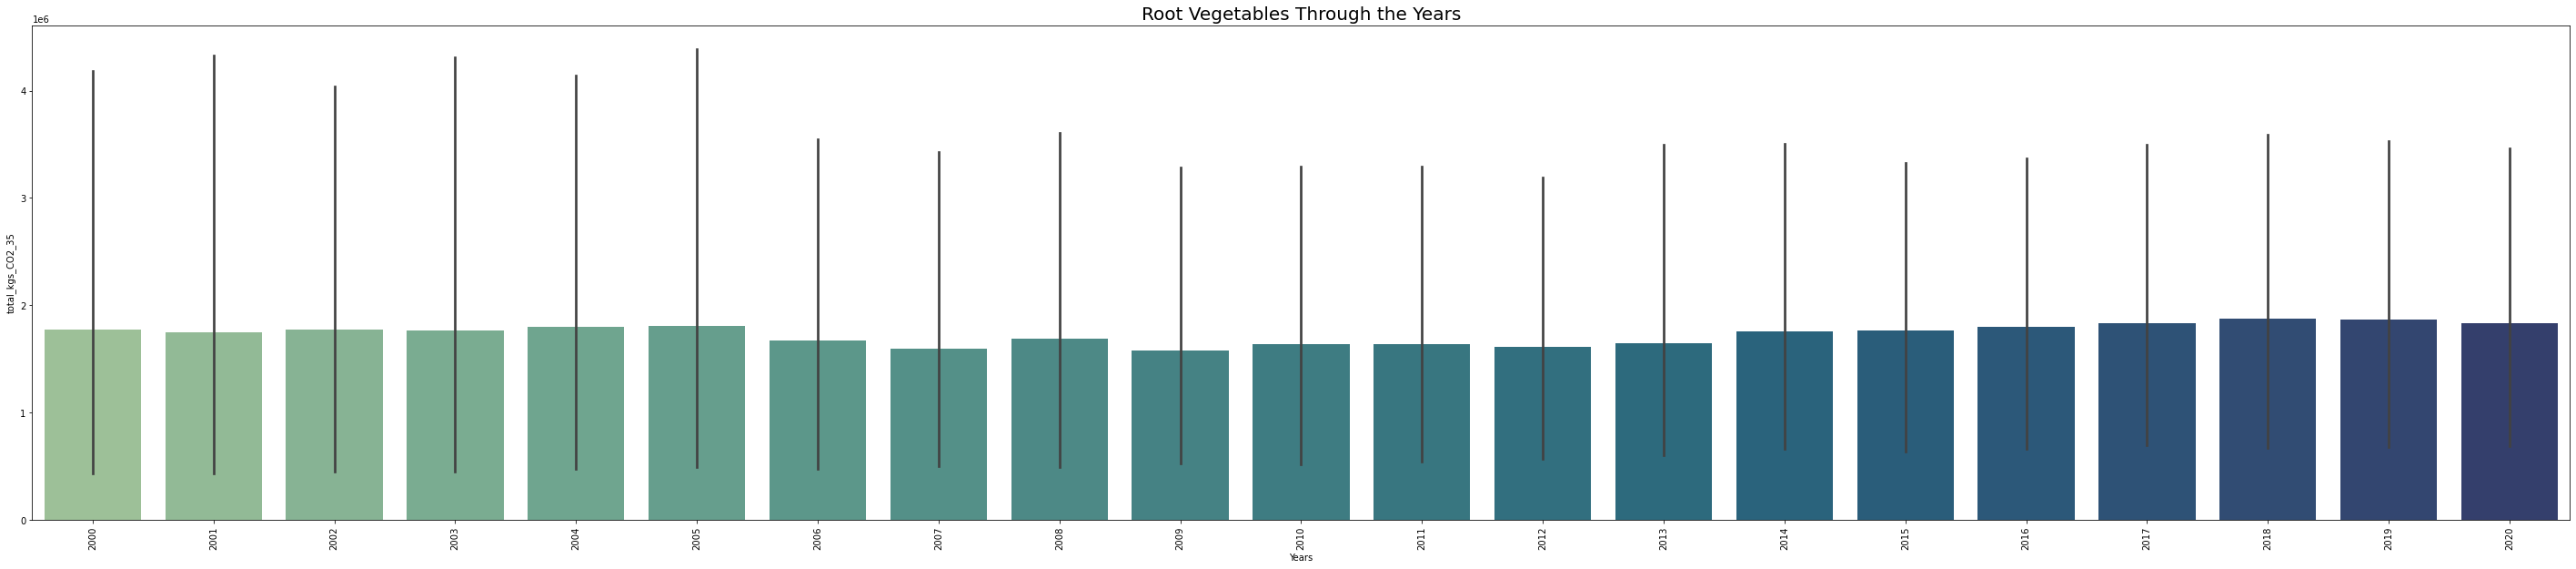

In [170]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = root_veg['year_pc'], y = root_veg['total_kgs_CO2_35'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_35', fontsize = 10)
ax.set_title(label = 'Root Vegetables Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(root_veg, dimensions=["year_pc", "total_kgs_CO2_35", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Soybean Oil

In [172]:
soybean_oil= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_37', 'food_product_categories_37', 'production_tonnes_37', 'total_kgs_CO2_37']]
soybean_oil.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_37 food_product_categories_37  production_tonnes_37  \
0                37                Soybean Oil                   0.0   
1                37                Soybean Oil                   0.0   
2                37                Soybean Oil                   0.0   
3                37                Soybean Oil                   0.0   
4                37                Soybean Oil                   0.0   

   total_kgs_CO2_37  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [252]:
soybean_oil.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_37  production_tonnes_37  total_kgs_CO2_37  
count            4201.0          4.201000e+03      4.201000e+03  
mean               37.0          2.075778e+05      2.426323e+06  
std                 0.0          1.188899e+06      1.389573e+07  
min                37.0          0.000000e+00      0.000000e+00  
25%                37.0          0.000000e+00      0.000000e+00  
50%                37.0          0.000000e+00      0.000000e+00  
75%                37.0          1.420000e+04      1.659980e+05  
max                37.0          1.640000e+07      1.911596e+08

In [253]:
soybean_oil_total = soybean_oil['total_kgs_CO2_37'].sum()

print (soybean_oil_total)

10192982839.2953


In [254]:
soybean_oil[["area", "year_pc", "total_kgs_CO2_37" ]]

area  year_pc  total_kgs_CO2_37
0        Afghanistan     2000               0.0
1        Afghanistan     2001               0.0
2        Afghanistan     2002               0.0
3        Afghanistan     2003               0.0
4        Afghanistan     2004               0.0
...              ...      ...               ...
4196  Sudan (former)     2007               0.0
4197  Sudan (former)     2008               0.0
4198  Sudan (former)     2009               0.0
4199  Sudan (former)     2010               0.0
4200  Sudan (former)     2011               0.0

[4201 rows x 3 columns]

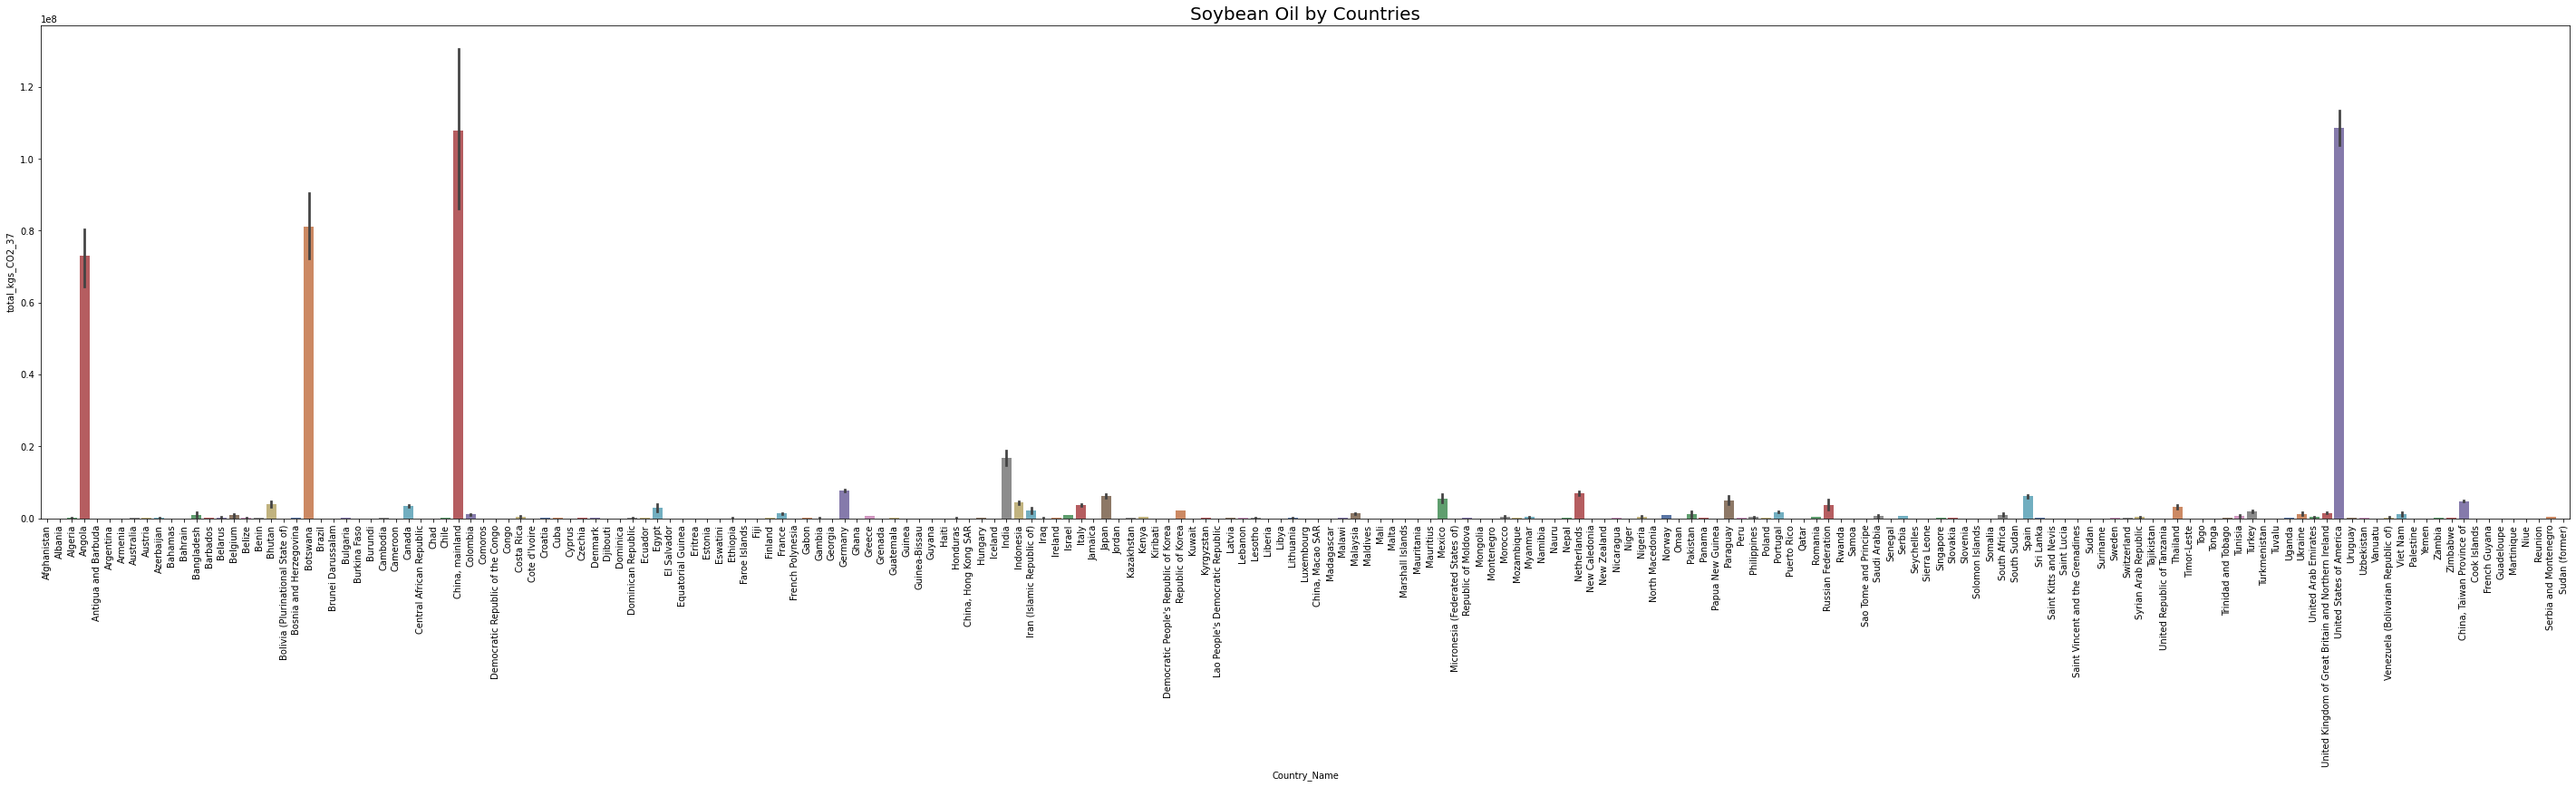

In [173]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = soybean_oil['area'], y = soybean_oil['total_kgs_CO2_37'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_37', fontsize = 10)
ax.set_title(label = 'Soybean Oil by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

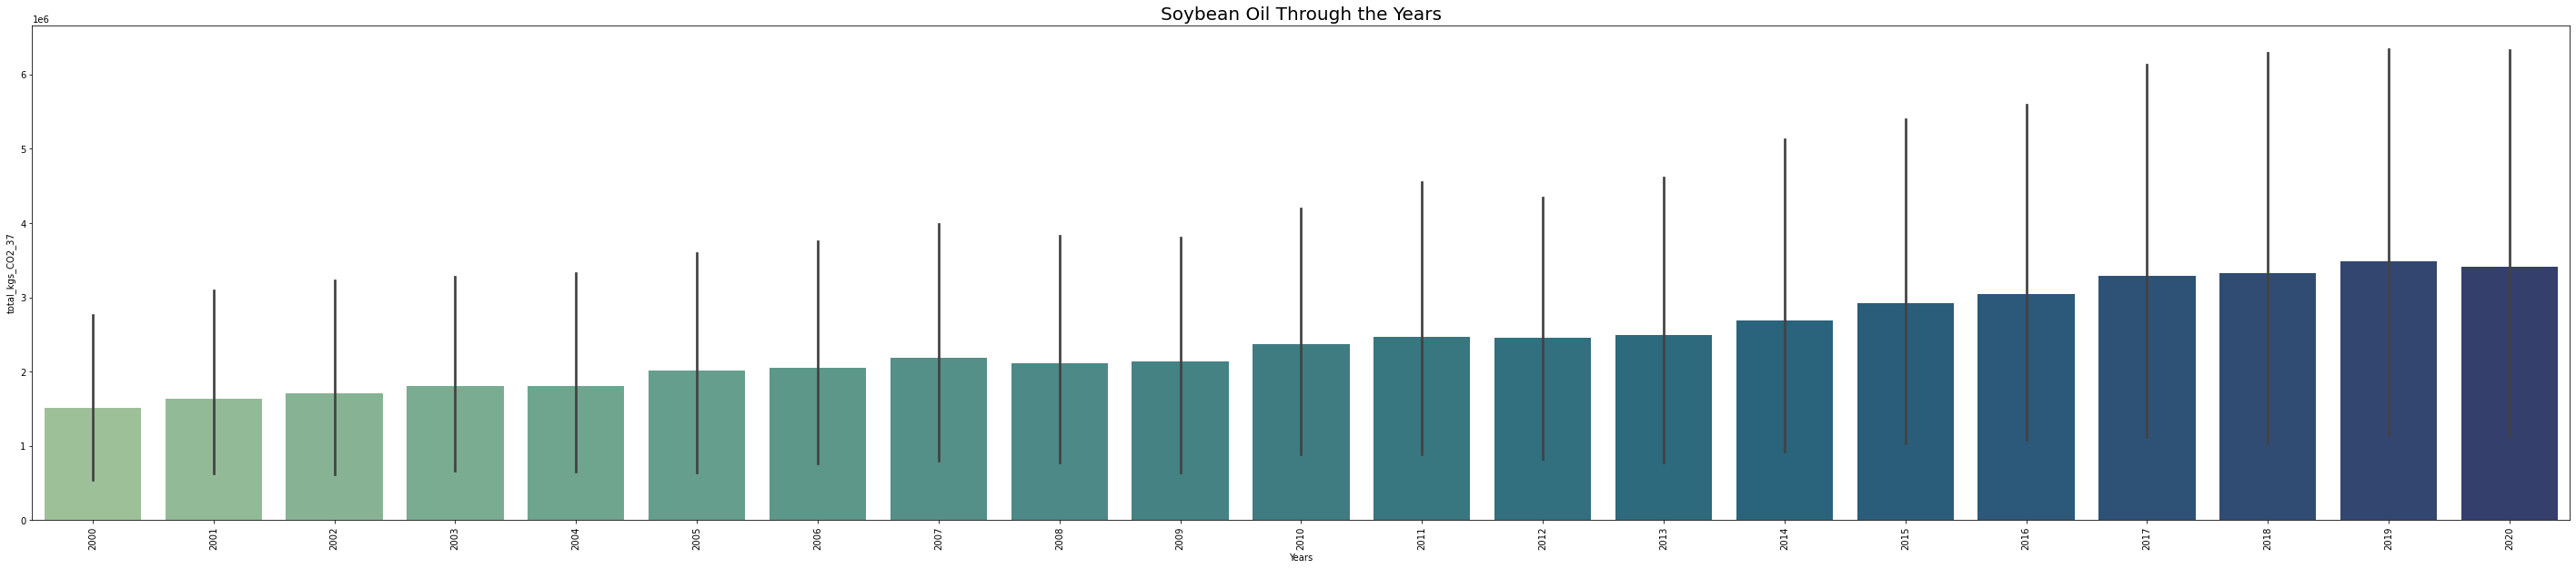

In [174]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = soybean_oil['year_pc'], y = soybean_oil['total_kgs_CO2_37'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_37', fontsize = 10)
ax.set_title(label = 'Soybean Oil Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(soybean_oil, dimensions=["year_pc", "total_kgs_CO2_37", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Sunflower Oil


In [176]:
sunflower_oil= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_39', 'food_product_categories_39', 'production_tonnes_39', 'total_kgs_CO2_39']]
sunflower_oil.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_39 food_product_categories_39  production_tonnes_39  \
0                39              Sunflower Oil              18583.19   
1                39              Sunflower Oil              17803.71   
2                39              Sunflower Oil              16732.99   
3                39              Sunflower Oil              17732.03   
4                39              Sunflower Oil              18646.32   

   total_kgs_CO2_39  
0       941424.4054  
1       901935.9486  
2       847693.2734  
3       898304.6398  
4       944622.5712

In [259]:
sunflower_oil.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_39  production_tonnes_39  total_kgs_CO2_39  
count       4201.000000          4.201000e+03      4.201000e+03  
mean          18.994049          2.508862e+05      1.270900e+07  
std           19.495756          1.307486e+06      6.622350e+07  
min            0.000000          0.000000e+00      0.000000e+00  
25%            0.000000          0.000000e+00      0.000000e+00  
50%            0.000000          0.000000e+00      0.000000e+00  
75%           39.000000          1.703400e+04      8.629424e+05  
max           39.000000          2.114000e+07      1.068436e+09

In [260]:
sunflower_oil_total = sunflower_oil['total_kgs_CO2_39'].sum()

print (sunflower_oil_total)

53390494933.4358


In [261]:
sunflower_oil[["area", "year_pc", "total_kgs_CO2_39" ]]

area  year_pc  total_kgs_CO2_39
0        Afghanistan     2000      9.414244e+05
1        Afghanistan     2001      9.019359e+05
2        Afghanistan     2002      8.476933e+05
3        Afghanistan     2003      8.983046e+05
4        Afghanistan     2004      9.446226e+05
...              ...      ...               ...
4196  Sudan (former)     2007      4.796954e+06
4197  Sudan (former)     2008      6.555455e+06
4198  Sudan (former)     2009      1.629107e+07
4199  Sudan (former)     2010      3.020498e+06
4200  Sudan (former)     2011      8.156671e+06

[4201 rows x 3 columns]

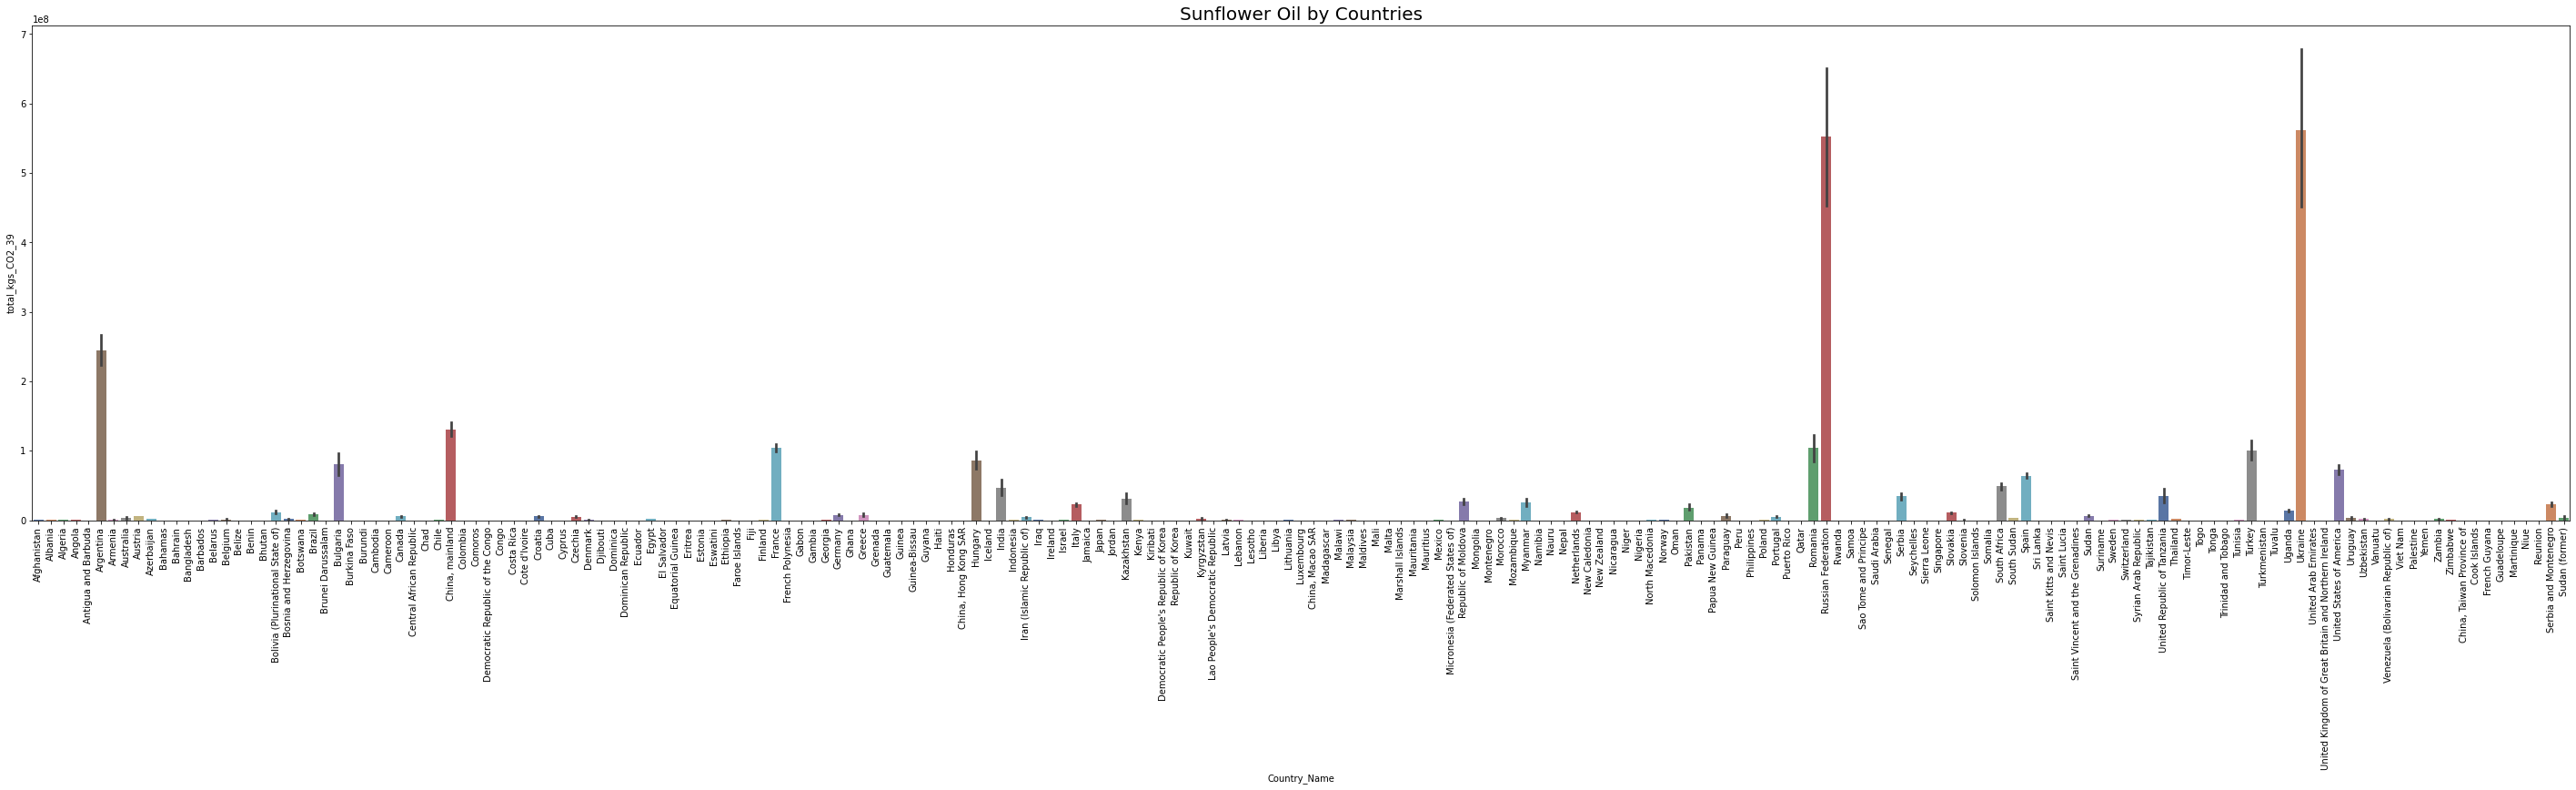

In [177]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = sunflower_oil['area'], y = sunflower_oil['total_kgs_CO2_39'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_39', fontsize = 10)
ax.set_title(label = 'Sunflower Oil by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

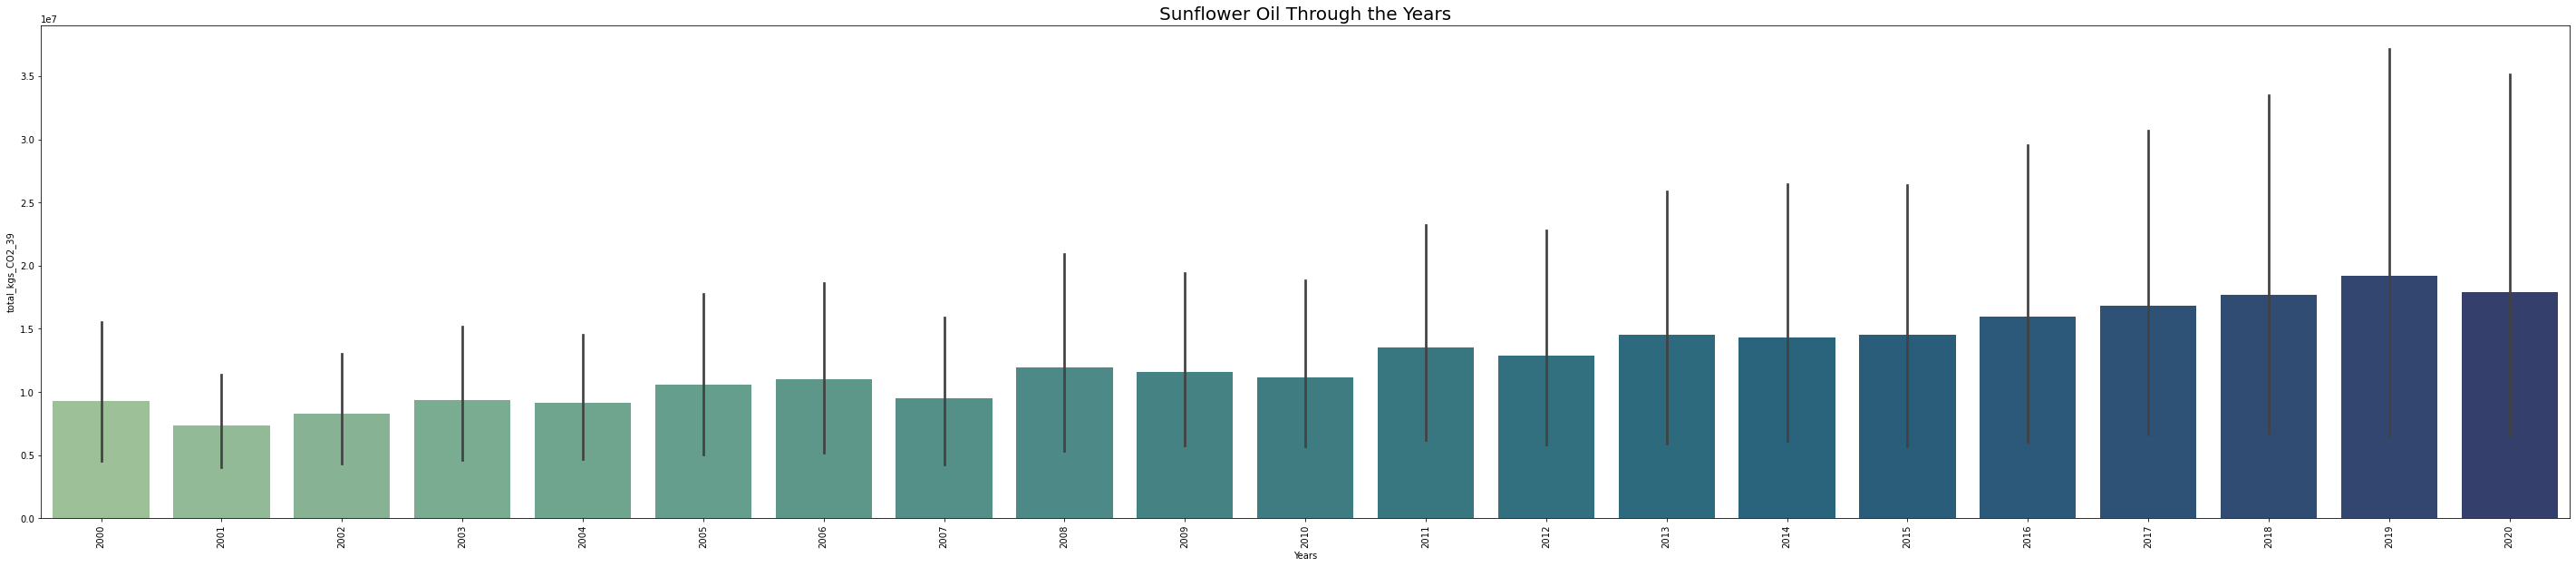

In [178]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = sunflower_oil['year_pc'], y = sunflower_oil['total_kgs_CO2_39'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_39', fontsize = 10)
ax.set_title(label = 'Sunflower Oil Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(sunflower_oil, dimensions=["year_pc", "total_kgs_CO2_39", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Tofu


In [180]:
tofu= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_40', 'food_product_categories_40', 'production_tonnes_40', 'total_kgs_CO2_40']]
tofu.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_40 food_product_categories_40  production_tonnes_40  \
0                40                       Tofu                   0.0   
1                40                       Tofu                   0.0   
2                40                       Tofu                   0.0   
3                40                       Tofu                   0.0   
4                40                       Tofu                   0.0   

   total_kgs_CO2_40  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [266]:
tofu.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_40  production_tonnes_40  total_kgs_CO2_40  
count            4201.0          4.201000e+03      4.201000e+03  
mean               40.0          1.293552e+06      7.966060e+06  
std                 0.0          9.185184e+06      5.655650e+07  
min                40.0          0.000000e+00      0.000000e+00  
25%                40.0          0.000000e+00      0.000000e+00  
50%                40.0          0.000000e+00      0.000000e+00  
75%                40.0          1.633600e+04      1.006298e+05  
max                40.0          1.220000e+08      7.502739e+08

In [267]:
tofu_total = tofu['total_kgs_CO2_40'].sum()

print (tofu_total)

33465418984.872597


In [268]:
tofu[["area", "year_pc", "total_kgs_CO2_40" ]]

area  year_pc  total_kgs_CO2_40
0        Afghanistan     2000               0.0
1        Afghanistan     2001               0.0
2        Afghanistan     2002               0.0
3        Afghanistan     2003               0.0
4        Afghanistan     2004               0.0
...              ...      ...               ...
4196  Sudan (former)     2007               0.0
4197  Sudan (former)     2008               0.0
4198  Sudan (former)     2009               0.0
4199  Sudan (former)     2010               0.0
4200  Sudan (former)     2011               0.0

[4201 rows x 3 columns]

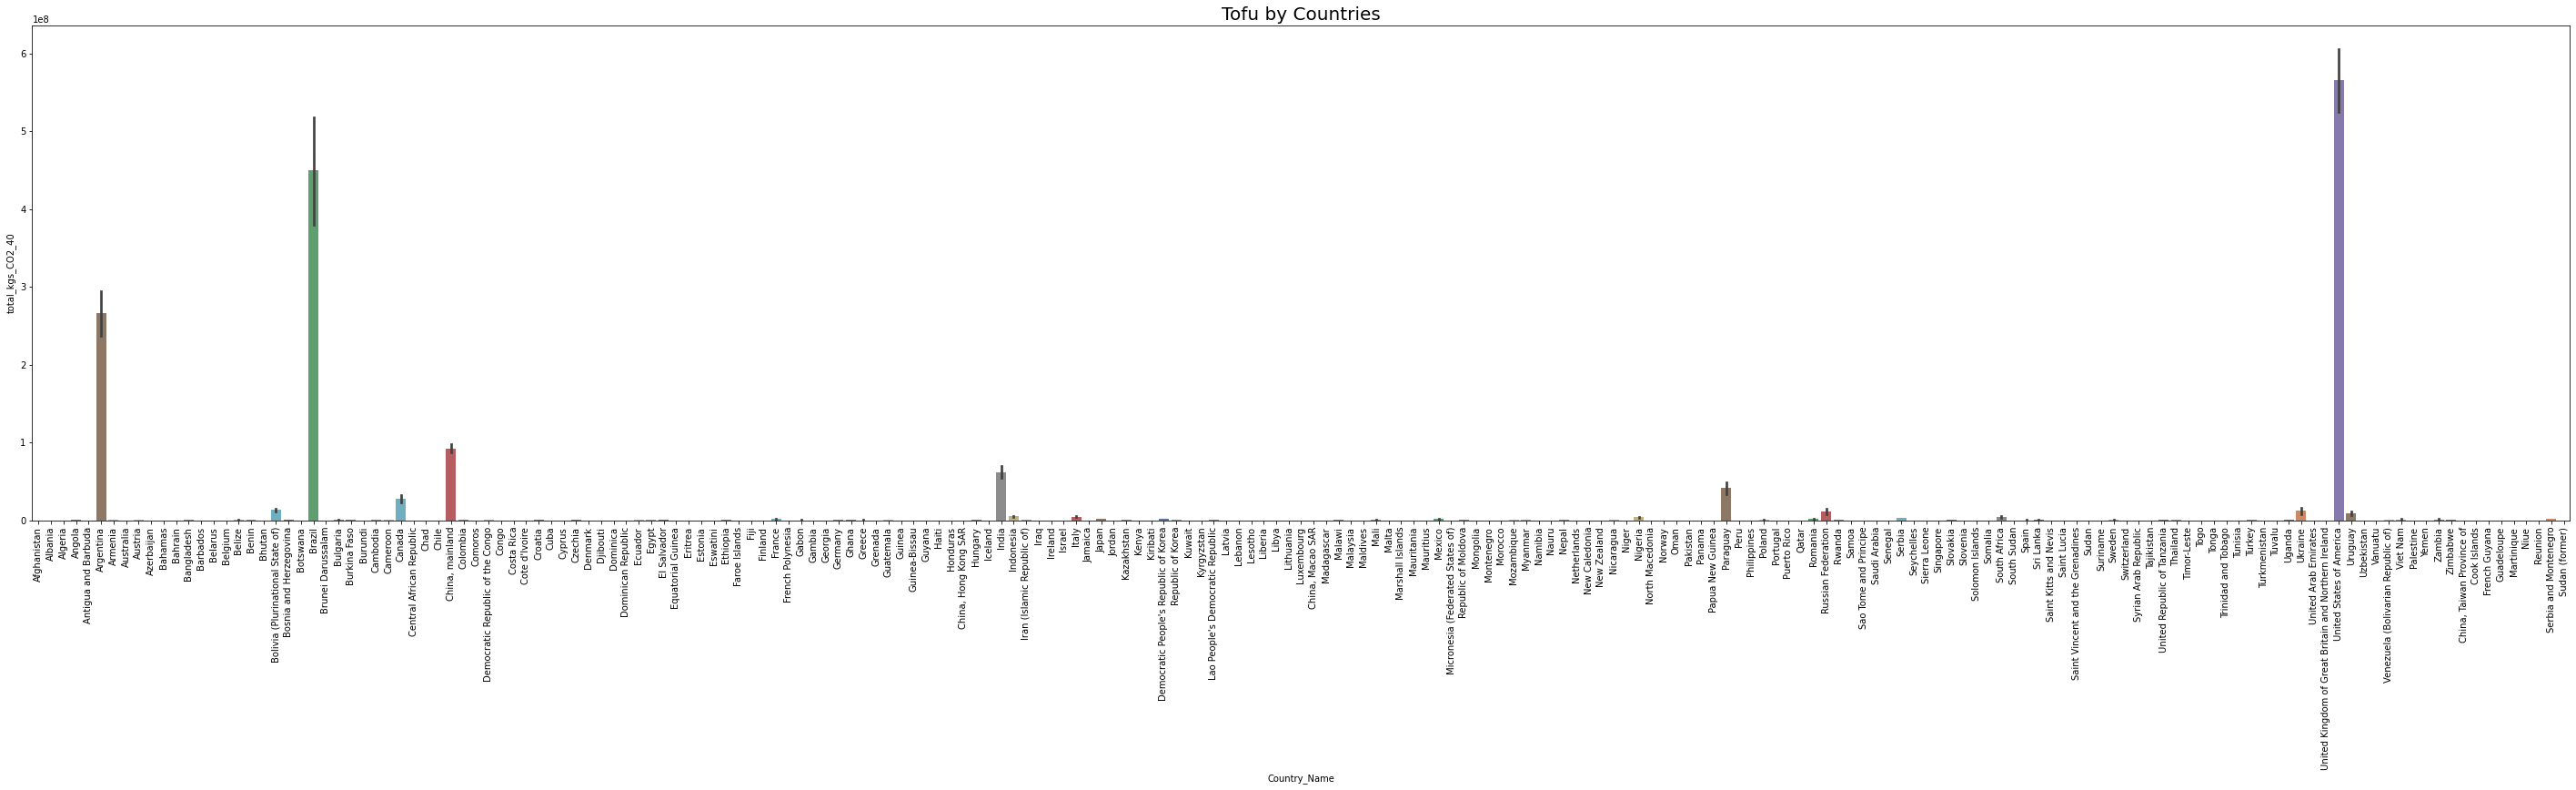

In [181]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = tofu['area'], y = tofu['total_kgs_CO2_40'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_40', fontsize = 10)
ax.set_title(label = 'Tofu by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

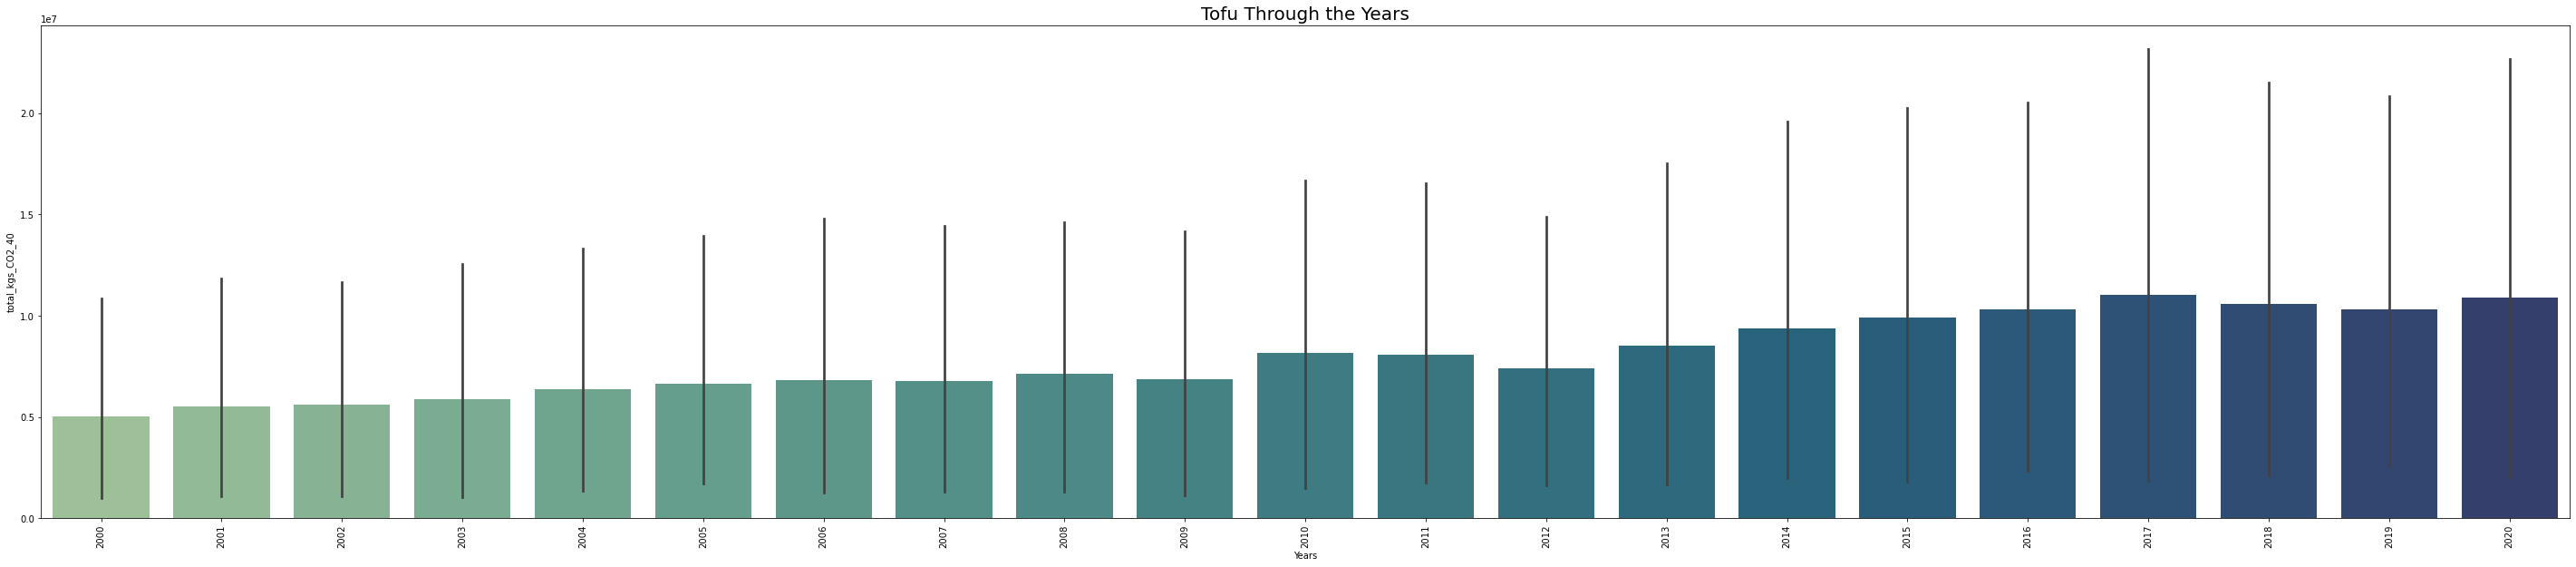

In [182]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = tofu['year_pc'], y = tofu['total_kgs_CO2_40'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_40', fontsize = 10)
ax.set_title(label = 'Tofu Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(tofu, dimensions=["year_pc", "total_kgs_CO2_40", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Tomatoes


In [184]:
tomatoes= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_41', 'food_product_categories_41', 'production_tonnes_41', 'total_kgs_CO2_41']]
tomatoes.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_41 food_product_categories_41  production_tonnes_41  \
0                41                   Tomatoes                   0.0   
1                41                   Tomatoes                   0.0   
2                41                   Tomatoes                   0.0   
3                41                   Tomatoes                   0.0   
4                41                   Tomatoes                   0.0   

   total_kgs_CO2_41  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [273]:
tomatoes.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_41  production_tonnes_41  total_kgs_CO2_41  
count            4201.0          4.201000e+03      4.201000e+03  
mean               41.0          7.548400e+05      5.667773e+06  
std                 0.0          3.689352e+06      2.770128e+07  
min                41.0          0.000000e+00      0.000000e+00  
25%                41.0          5.247600e+02      3.940948e+03  
50%                41.0          3.500000e+04      2.628500e+05  
75%                41.0          2.775000e+05      2.084025e+06  
max                41.0          6.470000e+07      4.862039e+08

In [274]:
tomatoes_total = tomatoes['total_kgs_CO2_41'].sum()

print (tomatoes_total)

23810313440.407898


In [275]:
tomatoes[["area", "year_pc", "total_kgs_CO2_41" ]]

area  year_pc  total_kgs_CO2_41
0        Afghanistan     2000               0.0
1        Afghanistan     2001               0.0
2        Afghanistan     2002               0.0
3        Afghanistan     2003               0.0
4        Afghanistan     2004               0.0
...              ...      ...               ...
4196  Sudan (former)     2007         4821420.0
4197  Sudan (former)     2008         3402030.0
4198  Sudan (former)     2009         3604800.0
4199  Sudan (former)     2010         3785040.0
4200  Sudan (former)     2011         3974292.0

[4201 rows x 3 columns]

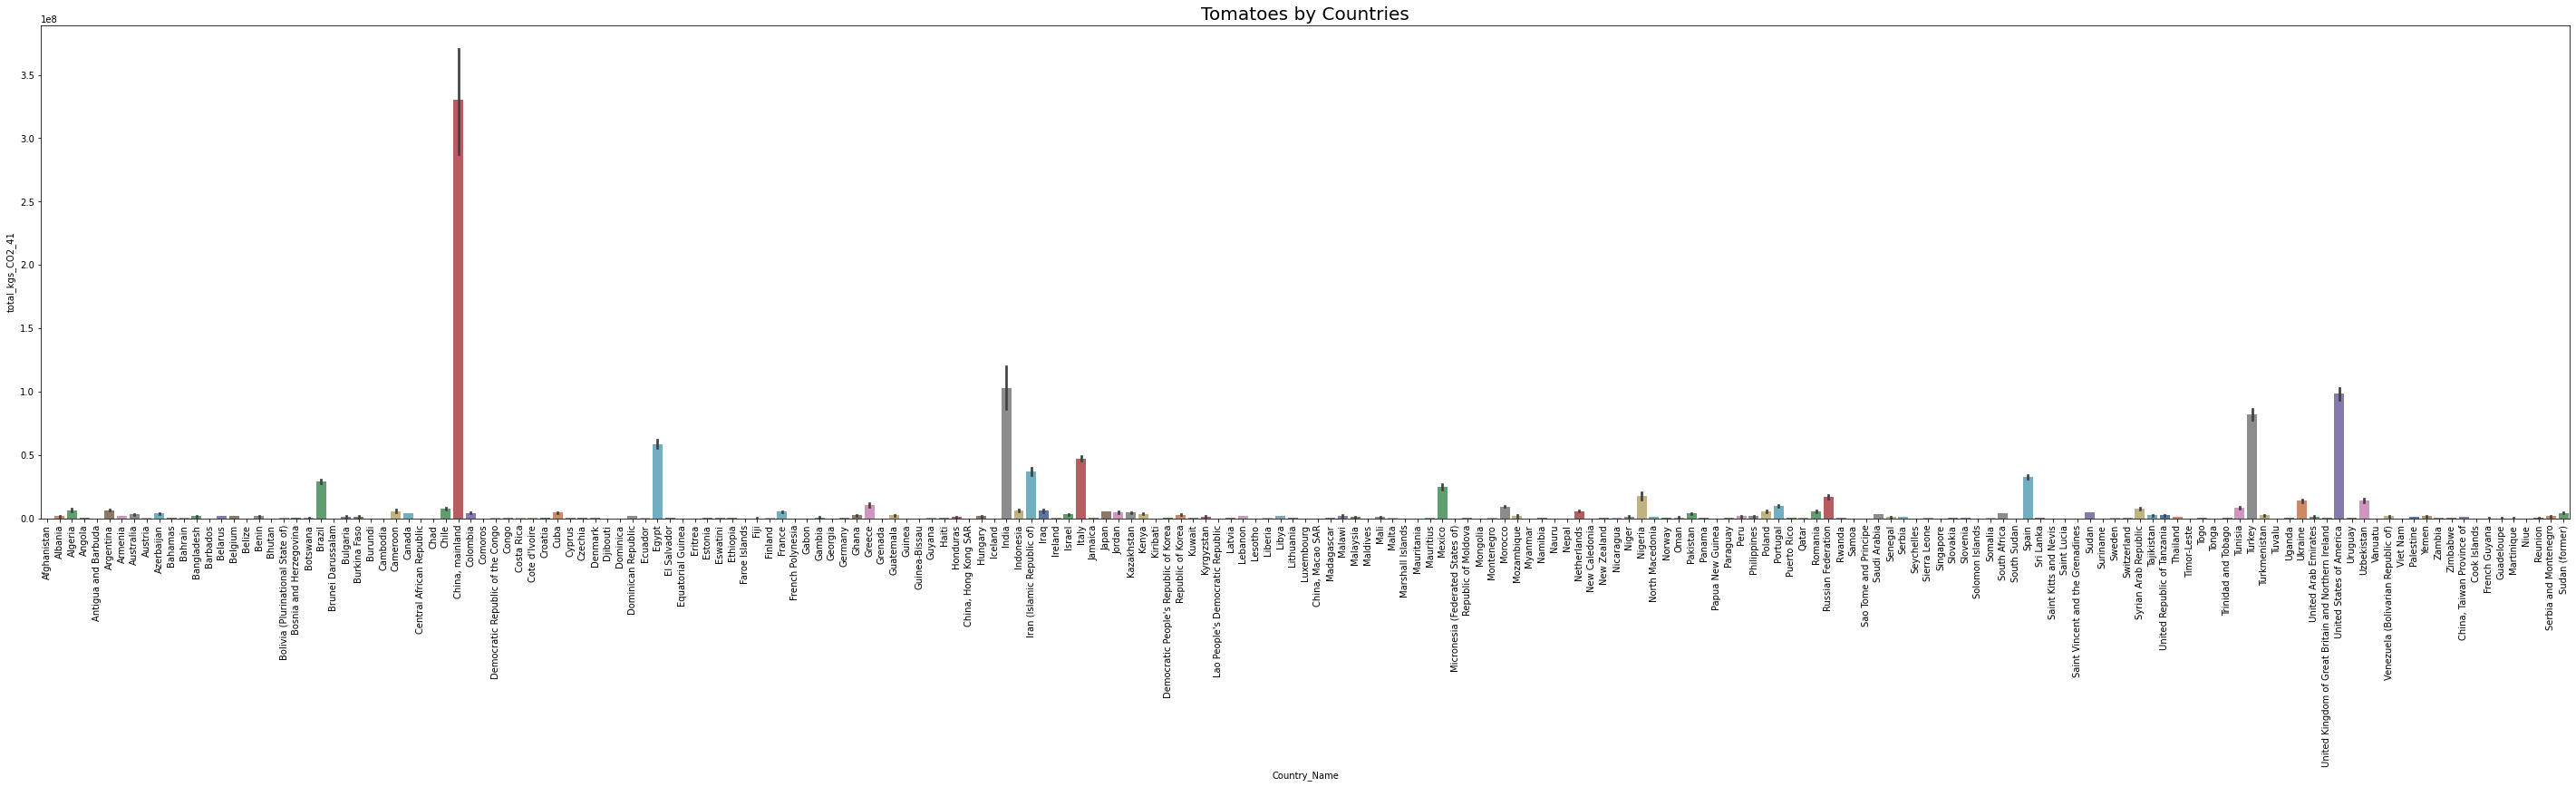

In [185]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = tomatoes['area'], y = tomatoes['total_kgs_CO2_41'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_41', fontsize = 10)
ax.set_title(label = 'Tomatoes by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

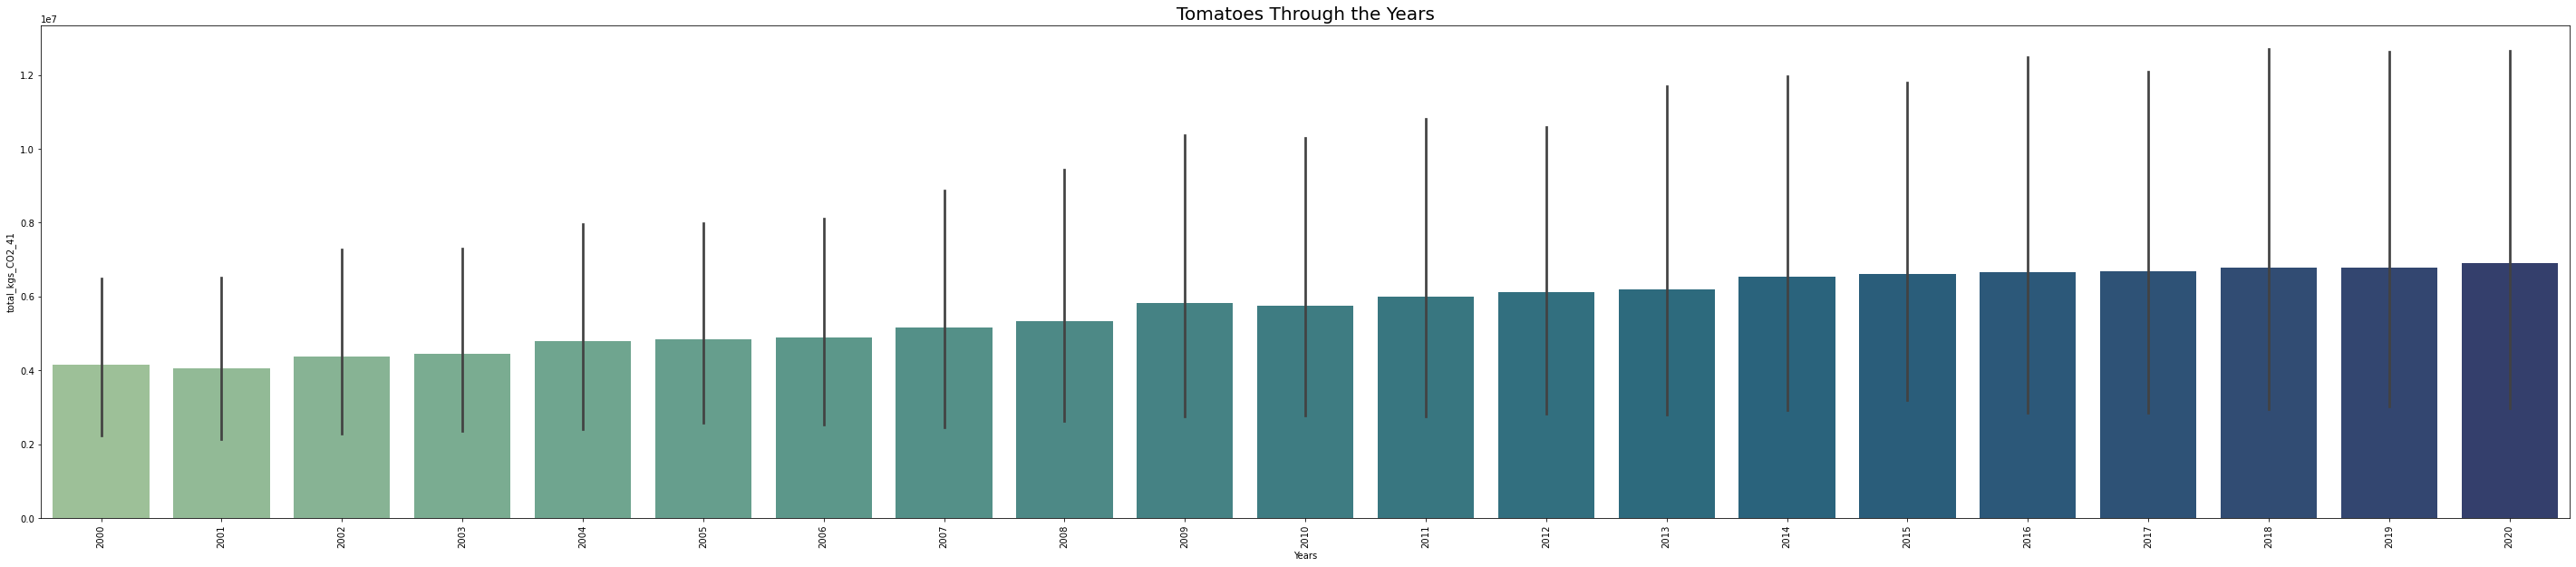

In [186]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = tomatoes['year_pc'], y = tomatoes['total_kgs_CO2_41'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_41', fontsize = 10)
ax.set_title(label = 'Tomatoes Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(tomatoes, dimensions=["year_pc", "total_kgs_CO2_41", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Wheat & Rye (Bread)


In [46]:
wheat_rye= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_22', 'food_product_categories_22', 'production_tonnes_22', 'total_kgs_CO2_22']]
wheat_rye.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_22 food_product_categories_22  production_tonnes_22  \
0                22                    Oatmeal                   0.0   
1                22                    Oatmeal                   0.0   
2                22                    Oatmeal                   0.0   
3                22                    Oatmeal                   0.0   
4                22                    Oatmeal                   0.0   

   total_kgs_CO2_22  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [280]:
wheat_rye.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_22  production_tonnes_22  total_kgs_CO2_22  
count            4201.0          4.201000e+03      4.201000e+03  
mean               22.0          1.203760e+05      1.351760e+06  
std                 0.0          4.914610e+05      5.518772e+06  
min                22.0          0.000000e+00      0.000000e+00  
25%                22.0          0.000000e+00      0.000000e+00  
50%                22.0          0.000000e+00      0.000000e+00  
75%                22.0          8.905000e+03      1.000031e+05  
max                22.0          7.720000e+06      8.668117e+07

In [281]:
wheat_rye_total = wheat_rye['total_kgs_CO2_22'].sum()

print (wheat_rye_total)

5678743099.041699


In [282]:
wheat_rye[["area", "year_pc", "total_kgs_CO2_22" ]]

area  year_pc  total_kgs_CO2_22
0        Afghanistan     2000               0.0
1        Afghanistan     2001               0.0
2        Afghanistan     2002               0.0
3        Afghanistan     2003               0.0
4        Afghanistan     2004               0.0
...              ...      ...               ...
4196  Sudan (former)     2007               0.0
4197  Sudan (former)     2008               0.0
4198  Sudan (former)     2009               0.0
4199  Sudan (former)     2010               0.0
4200  Sudan (former)     2011               0.0

[4201 rows x 3 columns]

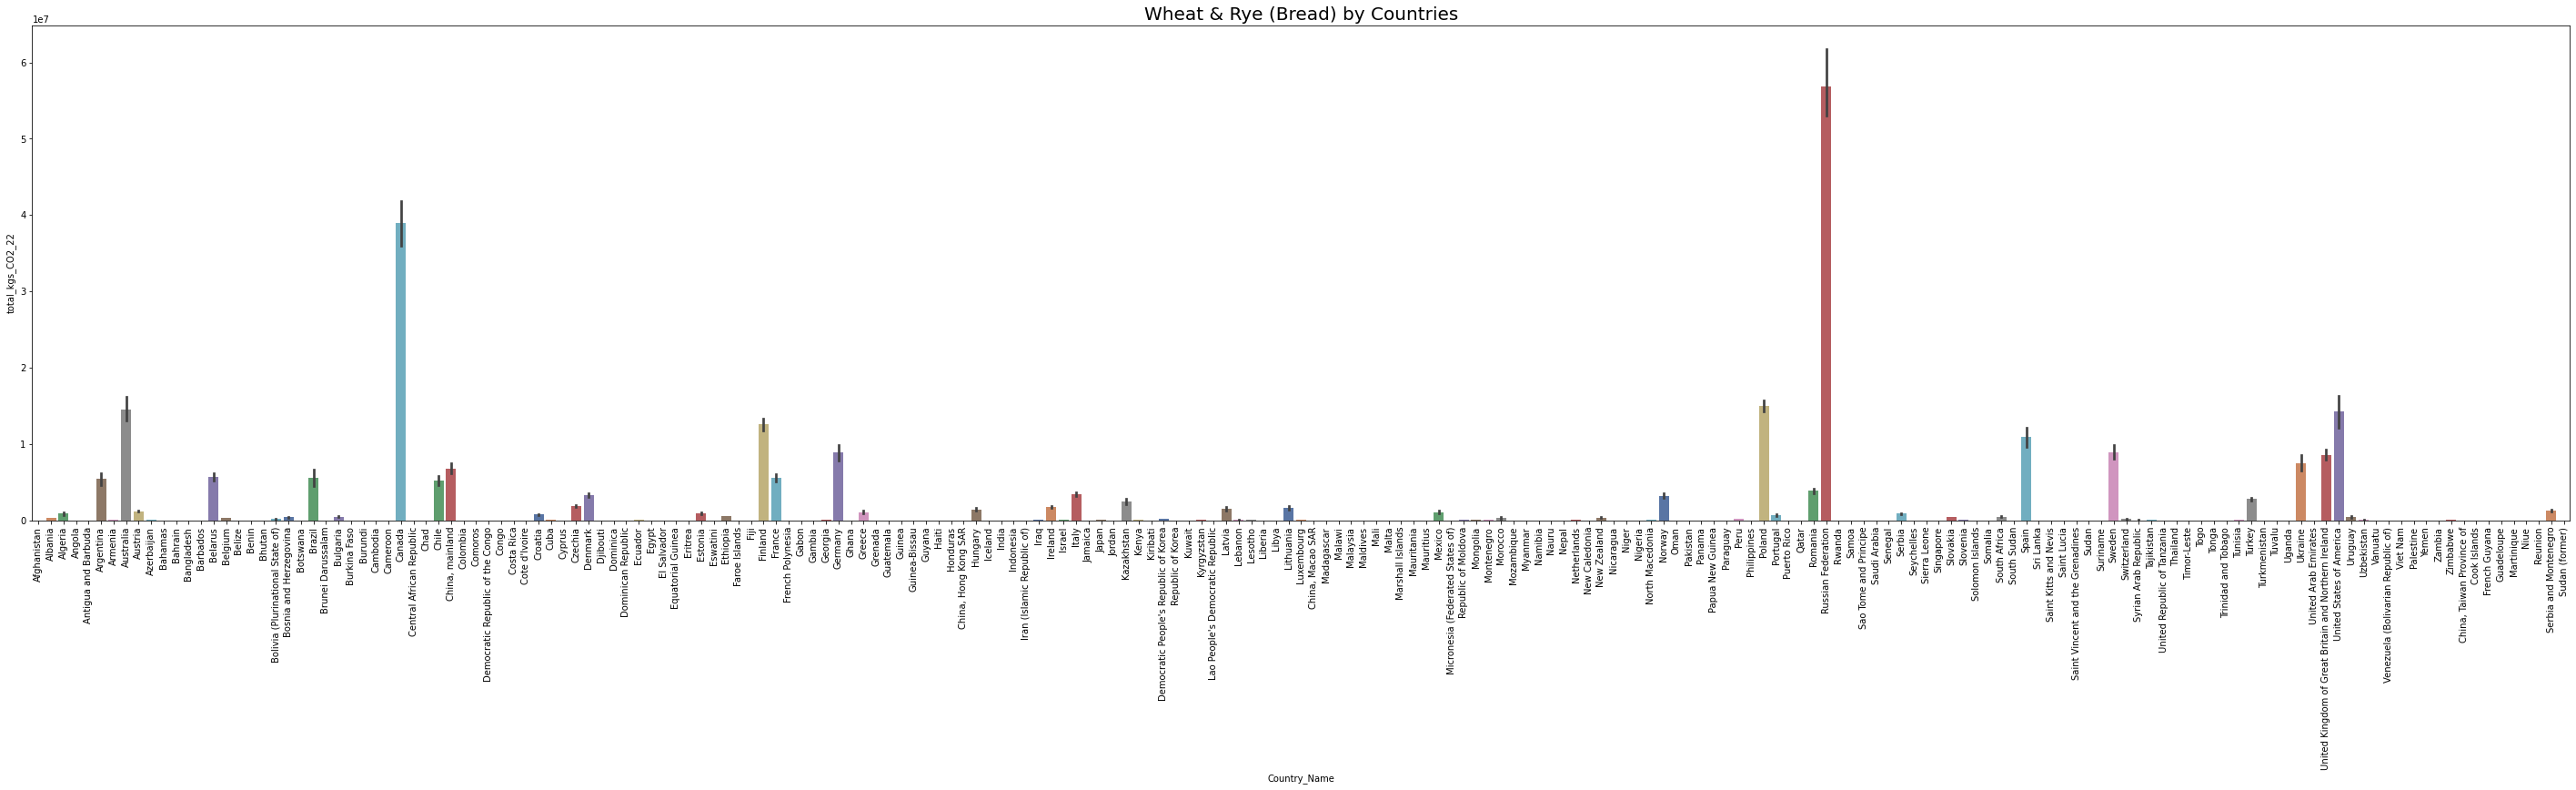

In [48]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = wheat_rye['area'], y = wheat_rye['total_kgs_CO2_22'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_22', fontsize = 10)
ax.set_title(label = 'Wheat & Rye (Bread) by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

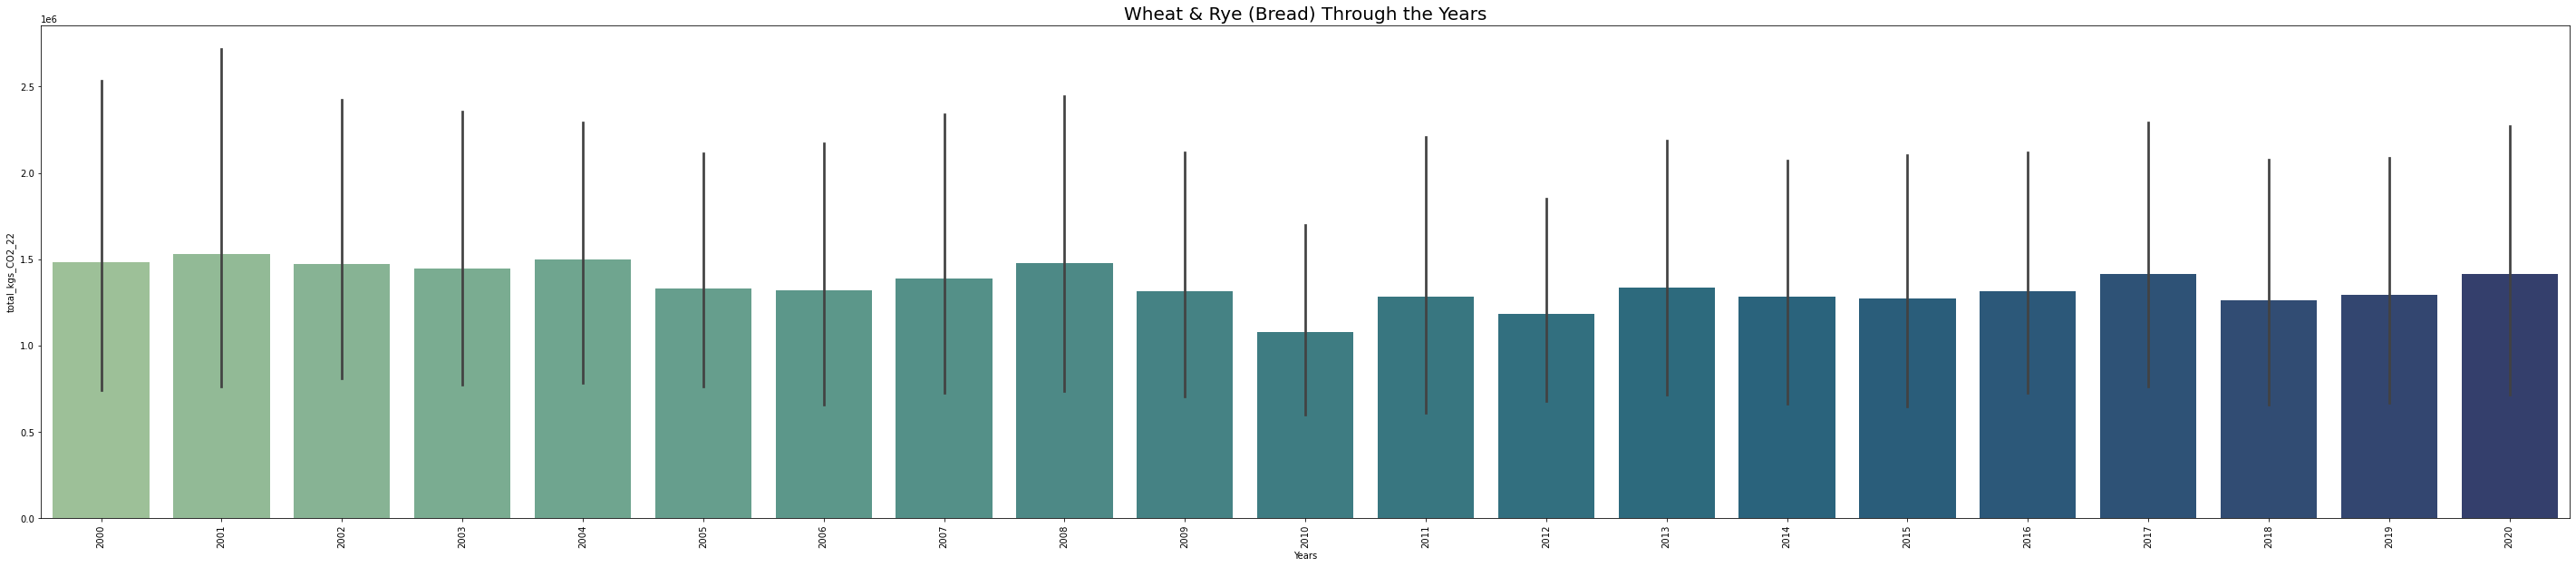

In [49]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = wheat_rye['year_pc'], y = wheat_rye['total_kgs_CO2_22'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_22', fontsize = 10)
ax.set_title(label = 'Wheat & Rye (Bread) Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(wheat_rye, dimensions=["year_pc", "total_kgs_CO2_22", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

## Wine


In [43]:
wine= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_43', 'food_product_categories_43', 'production_tonnes_43', 'total_kgs_CO2_43']]
wine.head()

country_code         area  year_pc  CO2_emissions_tonnes  Population  \
0             0  Afghanistan     2000            71679740.0    19542982   
1             0  Afghanistan     2001            72477702.0    19688632   
2             0  Afghanistan     2002            73529311.0    21000256   
3             0  Afghanistan     2003            74715262.0    22645130   
4             0  Afghanistan     2004            75604429.0    23553551   

   category_code_43 food_product_categories_43  production_tonnes_43  \
0                43                       Wine                   0.0   
1                43                       Wine                   0.0   
2                43                       Wine                   0.0   
3                43                       Wine                   0.0   
4                43                       Wine                   0.0   

   total_kgs_CO2_43  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [287]:
wine.describe()

country_code      year_pc  CO2_emissions_tonnes    Population  \
count   4201.000000  4201.000000          4.201000e+03  4.201000e+03   
mean     118.259224  2010.028089          6.577117e+09  3.475671e+07   
std       84.811585     6.052246          2.995630e+10  1.320146e+08   
min        0.000000  2000.000000          8.793600e+04  1.609000e+03   
25%       59.000000  2005.000000          4.181178e+07  1.450694e+06   
50%      115.000000  2010.000000          3.180864e+08  7.071600e+06   
75%      169.000000  2015.000000          2.459405e+09  2.359447e+07   
max      901.000000  2020.000000          4.170000e+11  1.396387e+09   

       category_code_43  production_tonnes_43  total_kgs_CO2_43  
count            4201.0          4.201000e+03      4.201000e+03  
mean               43.0          1.375853e+05      6.287209e+05  
std                 0.0          6.034109e+05      2.757478e+06  
min                43.0          0.000000e+00      0.000000e+00  
25%                43.0          0.000000e+00      0.000000e+00  
50%                43.0          0.000000e+00      0.000000e+00  
75%                43.0          7.499000e+03      3.427043e+04  
max                43.0          5.910000e+06      2.701187e+07

In [288]:
wine_total = wine['total_kgs_CO2_43'].sum()

print (wine_total)

2641256537.4747


In [289]:
wine[["area", "year_pc", "total_kgs_CO2_43" ]]

area  year_pc  total_kgs_CO2_43
0        Afghanistan     2000               0.0
1        Afghanistan     2001               0.0
2        Afghanistan     2002               0.0
3        Afghanistan     2003               0.0
4        Afghanistan     2004               0.0
...              ...      ...               ...
4196  Sudan (former)     2007               0.0
4197  Sudan (former)     2008               0.0
4198  Sudan (former)     2009               0.0
4199  Sudan (former)     2010               0.0
4200  Sudan (former)     2011               0.0

[4201 rows x 3 columns]

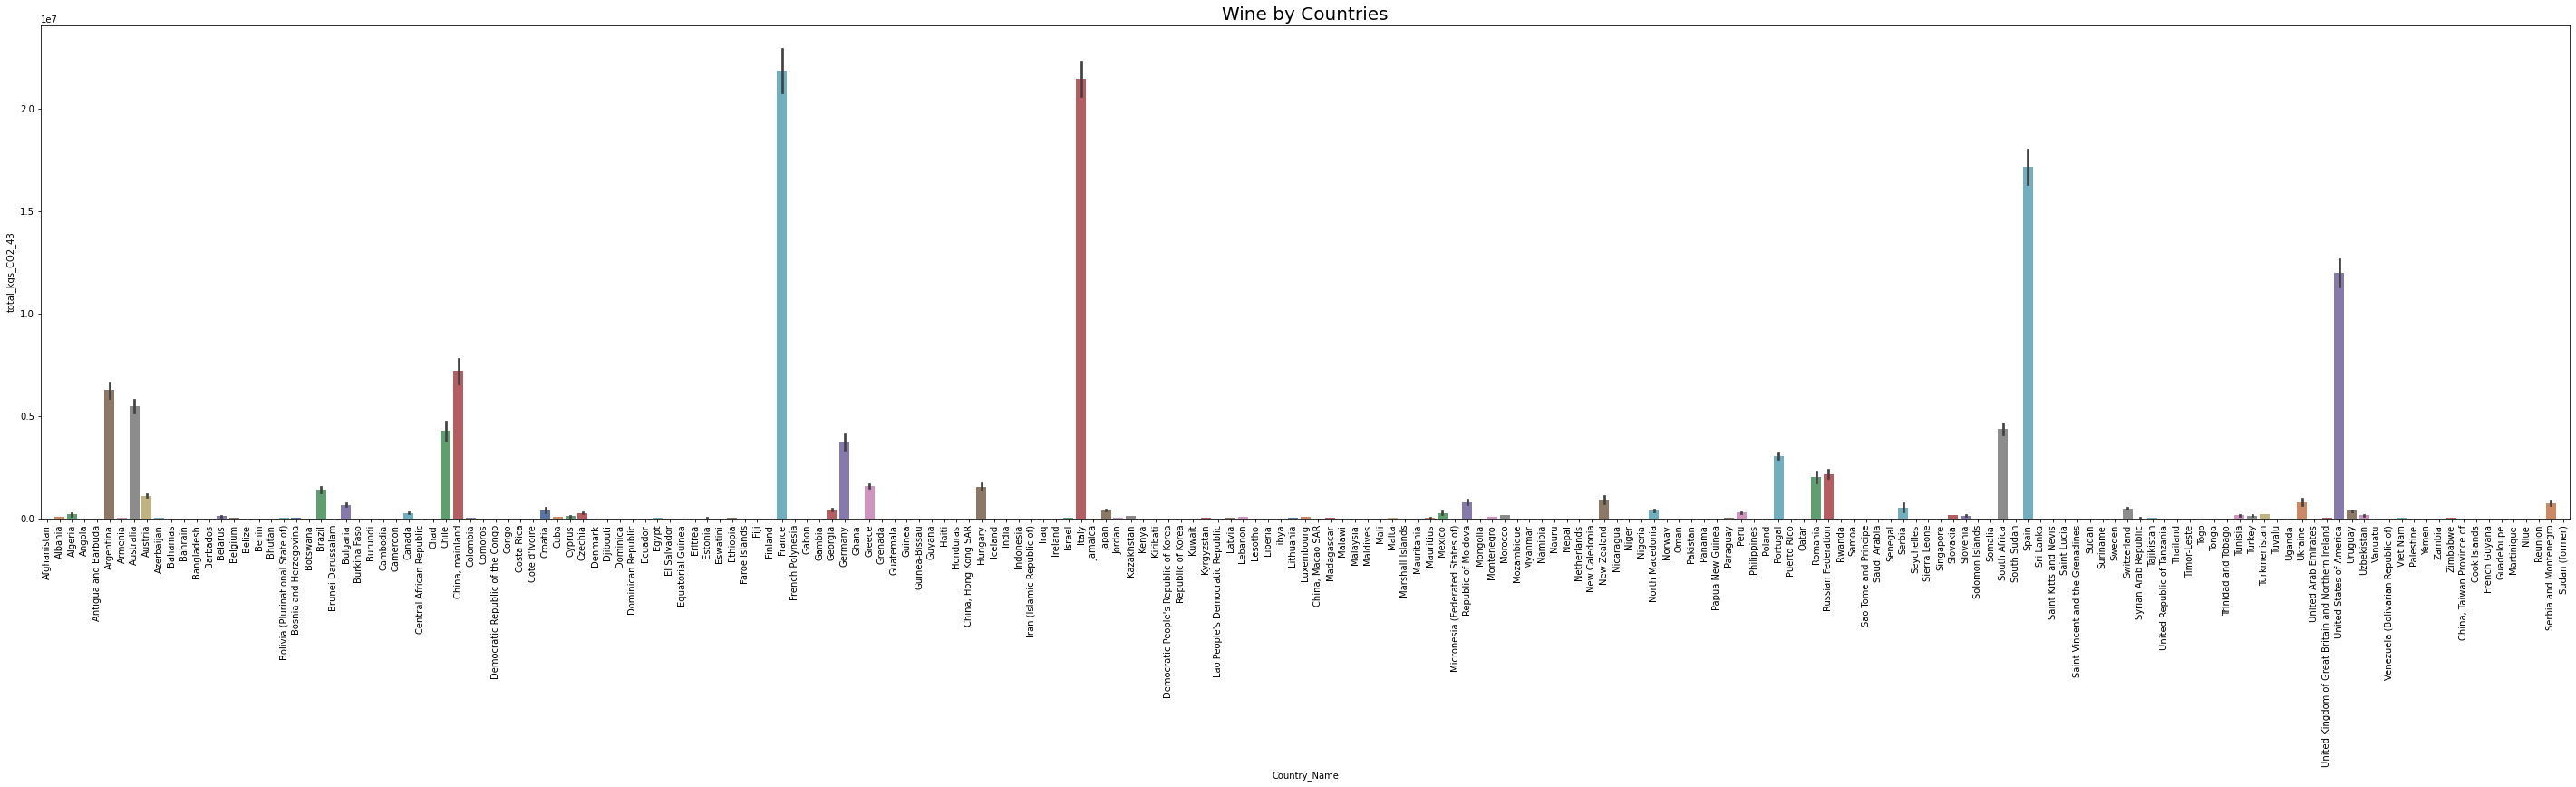

In [44]:

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = wine['area'], y = wine['total_kgs_CO2_43'], palette = 'deep')
ax.set_xlabel(xlabel = 'Country_Name', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_43', fontsize = 10)
ax.set_title(label = 'Wine by Countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

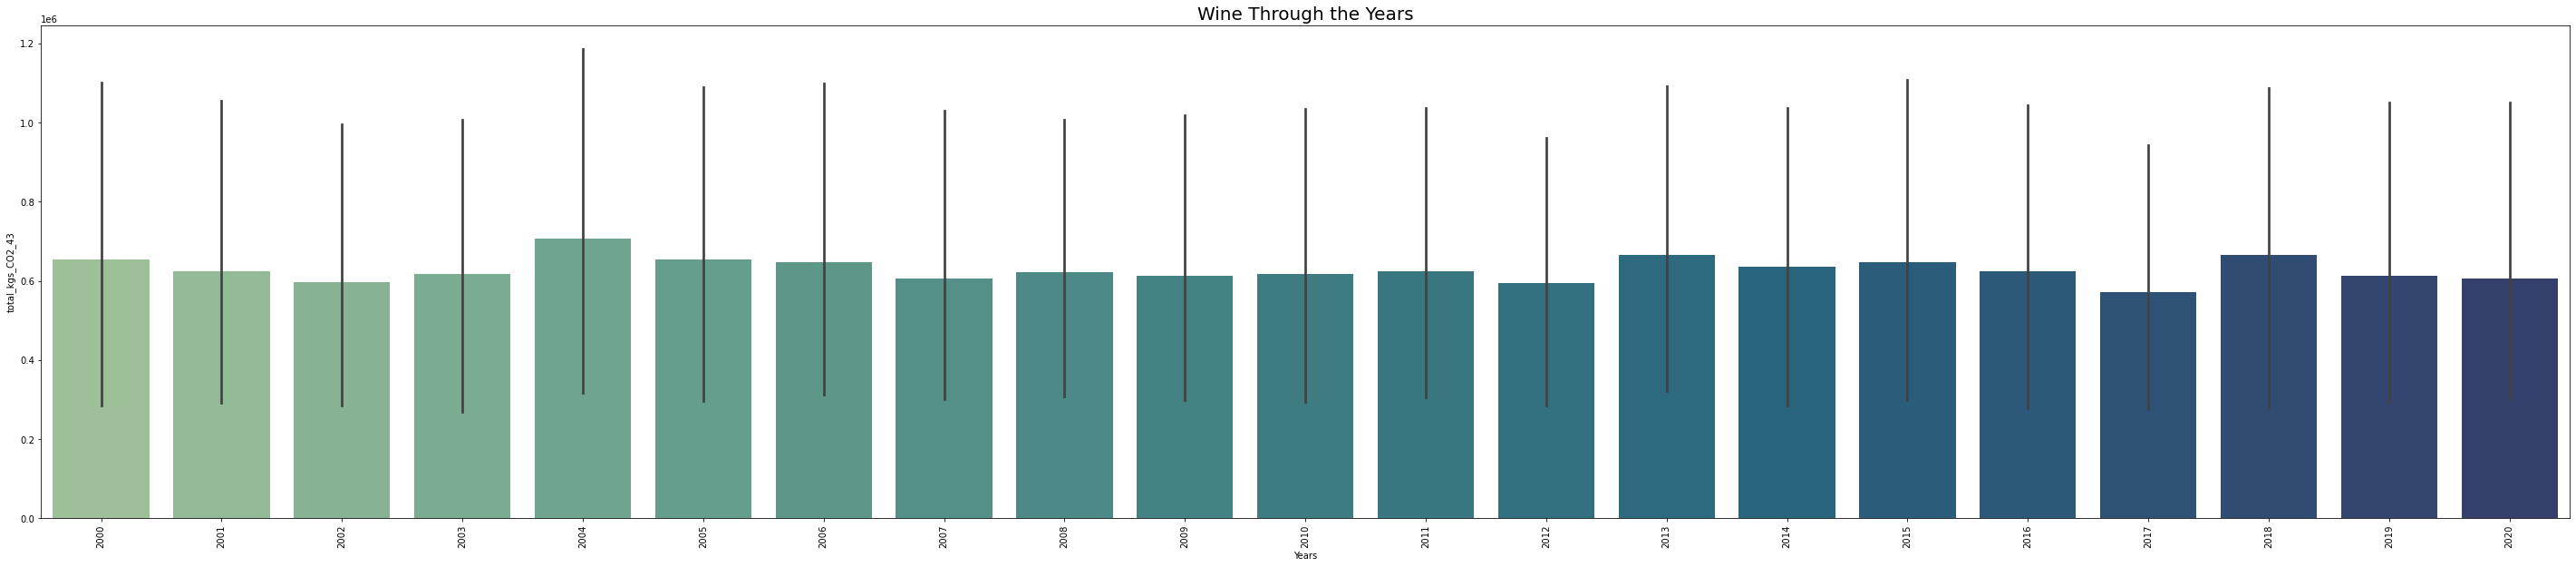

In [45]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = wine['year_pc'], y = wine['total_kgs_CO2_43'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_43', fontsize = 10)
ax.set_title(label = 'Wine Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

fig = px.scatter_matrix(wine, dimensions=["year_pc", "total_kgs_CO2_43", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()